
# Introduction #

Machine Learning: Deep Learning Final Project
Computer Vision - Categorizing Pictures of Flowers

This project will utilize a Kaggle competition data set to analyze pictures of flowers and attempt to categorize them using computer vision and neural network techniques. Through exploratory data analysis we will get a sense of what the images in the data set look like, and what the expected categorizations might look like proportionally (based on the ground-truth labeling). The creation of effective data pipelines will be a focus of data preprocessing to decrease the amount of time model training will take, and we will also batch the data ahead of creating a model. This model will utilize a custom learning rate function, and other hyperparameter tuning can be utilized to ensure convergence to a minimal loss per epoch.

The motivation from the project comes from my having a little bit of trouble moving through the steps of Week 3’s competition assignment for this course. I wanted to learn more about image data preprocessing and initialization and tuning of computer vision models.

In [1]:
import math, re, os
import numpy as np
import tensorflow as tf

print("Tensorflow version " + tf.__version__)

D0608 17:21:26.640397548      77 config.cc:196]                        gRPC EXPERIMENT call_status_override_on_cancellation   OFF (default:OFF)
D0608 17:21:26.640422144      77 config.cc:196]                        gRPC EXPERIMENT call_v3                                OFF (default:OFF)
D0608 17:21:26.640425879      77 config.cc:196]                        gRPC EXPERIMENT canary_client_privacy                  ON  (default:ON)
D0608 17:21:26.640428464      77 config.cc:196]                        gRPC EXPERIMENT capture_base_context                   ON  (default:ON)
D0608 17:21:26.640430852      77 config.cc:196]                        gRPC EXPERIMENT client_idleness                        ON  (default:ON)
D0608 17:21:26.640433298      77 config.cc:196]                        gRPC EXPERIMENT client_privacy                         ON  (default:ON)
D0608 17:21:26.640435666      77 config.cc:196]                        gRPC EXPERIMENT dapper_request_wire_size               OFF (default:O

Tensorflow version 2.16.1


In [2]:
# Detect hardware, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection. No parameters necessary if TPU_NAME environment variable is set. On Kaggle this is always the case.
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() # default distribution strategy in Tensorflow. Works on CPU and single GPU.

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: local


I0000 00:00:1717867299.377199      77 service.cc:145] XLA service 0x5a8c778e34b0 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1717867299.377258      77 service.cc:153]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1717867299.377262      77 service.cc:153]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1717867299.377265      77 service.cc:153]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1717867299.377268      77 service.cc:153]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1717867299.377270      77 service.cc:153]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1717867299.377273      77 service.cc:153]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1717867299.377276      77 service.cc:153]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1717867299.377278      77 service.cc:153]   StreamExecutor device (7): TPU, 2a886c8


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


REPLICAS:  8


The code above sets up our environment and checks for the TPU accelerator.

# Data #

This data is provided as a part of the Petals to the Metal competition on Kaggle.

The data is sourced from five different public datasets, and contains pictures for 104 different classifications of flowers. Some flower classes are narrower than others, and some categorizations are subsets of other categorizations.

The data consisted of 7382 unique images. Each row has a unique ID that represents a distinct image file.

We will be training our Keras image classifier on a Tensor Processing Unit (TPU). When used with TPUs, datasets need to be stored in a Google Cloud Storage Bucket. The code below displays the path to the data that we will utilize.

In [3]:
from kaggle_datasets import KaggleDatasets

GCS_DS_PATH = KaggleDatasets().get_gcs_path('tpu-getting-started')
print(GCS_DS_PATH) # what do gcs paths look like?

/kaggle/input/tpu-getting-started


get_gcs_path is not required on TPU VMs which can directly use Kaggle datasets, using path: /kaggle/input/tpu-getting-started


When used with TPUs, datasets need to be stored in a [Google Cloud Storage bucket](https://cloud.google.com/storage/). The above will retrieve the GCS path for this competition's dataset.

# Setting Up Data Pipelines, Data Processing, Exploratory Data Analysis #

In working through training the Week 3 Assignment CNN Model, I noticed that training time per epoch was extremely long. Creating a streamlined data pipeline can improve training time and cost, so prior to data exploration we can set up a useful data pipeline using the tensorflow.data module.

**Load Data**

First, we need to do some data preprocessing. When used with TPUs, datasets are made into TFRecords. This is a format convenient for distributing data to each of the TPUs cores.

The newly processed datasets are tf.data.Dataset objects, like a stream of data records. The training and validation sets are streams of (image, label) pairs.

In [4]:

IMAGE_SIZE = [512, 512]
GCS_PATH = GCS_DS_PATH + '/tfrecords-jpeg-512x512'
AUTO = tf.data.experimental.AUTOTUNE

TRAINING_FILENAMES = tf.io.gfile.glob(GCS_PATH + '/train/*.tfrec')
VALIDATION_FILENAMES = tf.io.gfile.glob(GCS_PATH + '/val/*.tfrec')
TEST_FILENAMES = tf.io.gfile.glob(GCS_PATH + '/test/*.tfrec') 

CLASSES = ['pink primrose',    'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',     'wild geranium',     'tiger lily',           'moon orchid',              'bird of paradise', 'monkshood',        'globe thistle',         # 00 - 09
           'snapdragon',       "colt's foot",               'king protea',      'spear thistle', 'yellow iris',       'globe-flower',         'purple coneflower',        'peruvian lily',    'balloon flower',   'giant white arum lily', # 10 - 19
           'fire lily',        'pincushion flower',         'fritillary',       'red ginger',    'grape hyacinth',    'corn poppy',           'prince of wales feathers', 'stemless gentian', 'artichoke',        'sweet william',         # 20 - 29
           'carnation',        'garden phlox',              'love in the mist', 'cosmos',        'alpine sea holly',  'ruby-lipped cattleya', 'cape flower',              'great masterwort', 'siam tulip',       'lenten rose',           # 30 - 39
           'barberton daisy',  'daffodil',                  'sword lily',       'poinsettia',    'bolero deep blue',  'wallflower',           'marigold',                 'buttercup',        'daisy',            'common dandelion',      # 40 - 49
           'petunia',          'wild pansy',                'primula',          'sunflower',     'lilac hibiscus',    'bishop of llandaff',   'gaura',                    'geranium',         'orange dahlia',    'pink-yellow dahlia',    # 50 - 59
           'cautleya spicata', 'japanese anemone',          'black-eyed susan', 'silverbush',    'californian poppy', 'osteospermum',         'spring crocus',            'iris',             'windflower',       'tree poppy',            # 60 - 69
           'gazania',          'azalea',                    'water lily',       'rose',          'thorn apple',       'morning glory',        'passion flower',           'lotus',            'toad lily',        'anthurium',             # 70 - 79
           'frangipani',       'clematis',                  'hibiscus',         'columbine',     'desert-rose',       'tree mallow',          'magnolia',                 'cyclamen ',        'watercress',       'canna lily',            # 80 - 89
           'hippeastrum ',     'bee balm',                  'pink quill',       'foxglove',      'bougainvillea',     'camellia',             'mallow',                   'mexican petunia',  'bromelia',         'blanket flower',        # 90 - 99
           'trumpet creeper',  'blackberry lily',           'common tulip',     'wild rose']                                                                                                                                               # 100 - 102


def decode_image(image_data):
    image = tf.image.decode_jpeg(image_data, channels=3)
    image = tf.cast(image, tf.float32) / 255.0  # convert image to floats in [0, 1] range
    image = tf.reshape(image, [*IMAGE_SIZE, 3]) # explicit size needed for TPU
    return image

def read_labeled_tfrecord(example):
    LABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "class": tf.io.FixedLenFeature([], tf.int64),  # shape [] means single element
    }
    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    label = tf.cast(example['class'], tf.int32)
    return image, label # returns a dataset of (image, label) pairs

def read_unlabeled_tfrecord(example):
    UNLABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "id": tf.io.FixedLenFeature([], tf.string),  # shape [] means single element
        # class is missing, this competitions's challenge is to predict flower classes for the test dataset
    }
    example = tf.io.parse_single_example(example, UNLABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    idnum = example['id']
    return image, idnum # returns a dataset of image(s)

def load_dataset(filenames, labeled=True, ordered=False):
    # Read from TFRecords. For optimal performance, reading from multiple files at once and
    # disregarding data order. Order does not matter since we will be shuffling the data anyway.

    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False # disable order, increase speed

    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO) # automatically interleaves reads from multiple files
    dataset = dataset.with_options(ignore_order) # uses data as soon as it streams in, rather than in its original order
    dataset = dataset.map(read_labeled_tfrecord if labeled else read_unlabeled_tfrecord, num_parallel_calls=AUTO)
    # returns a dataset of (image, label) pairs if labeled=True or (image, id) pairs if labeled=False
    return dataset

**Create Data Pipelines**

We'll use the `tf.data` API to define an efficient data pipeline for each dataset.

In [5]:

def data_augment(image, label):
    # Thanks to the dataset.prefetch(AUTO)
    # statement in the next function (below), this happens essentially
    # for free on TPU. Data pipeline code is executed on the "CPU"
    # part of the TPU while the TPU itself is computing gradients.
    image = tf.image.random_flip_left_right(image)
    #image = tf.image.random_saturation(image, 0, 2)
    return image, label   

def get_training_dataset():
    dataset = load_dataset(TRAINING_FILENAMES, labeled=True)
    dataset = dataset.map(data_augment, num_parallel_calls=AUTO)
    dataset = dataset.repeat() # the training dataset must repeat for several epochs
    dataset = dataset.shuffle(2048)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO) # prefetch next batch while training (autotune prefetch buffer size)
    return dataset

def get_validation_dataset(ordered=False):
    dataset = load_dataset(VALIDATION_FILENAMES, labeled=True, ordered=ordered)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.cache()
    dataset = dataset.prefetch(AUTO)
    return dataset

def get_test_dataset(ordered=False):
    dataset = load_dataset(TEST_FILENAMES, labeled=False, ordered=ordered)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO)
    return dataset

def count_data_items(filenames):
    # the number of data items is written in the name of the .tfrec
    # files, i.e. flowers00-230.tfrec = 230 data items
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)

NUM_TRAINING_IMAGES = count_data_items(TRAINING_FILENAMES)
NUM_VALIDATION_IMAGES = count_data_items(VALIDATION_FILENAMES)
NUM_TEST_IMAGES = count_data_items(TEST_FILENAMES)
print('Dataset: {} training images, {} validation images, {} unlabeled test images'.format(NUM_TRAINING_IMAGES, NUM_VALIDATION_IMAGES, NUM_TEST_IMAGES))


Dataset: 12753 training images, 3712 validation images, 7382 unlabeled test images


**Taking a look at the shape of the datasets**

We will want to make sure that the batch sizes are correct for the number of TPUs that are working, and notice that the datasets are in (image, label) pairs.

In [6]:
# Define the batch size. This will be 16 with TPU off and 128 (=16*8) with TPU on
BATCH_SIZE = 16 * strategy.num_replicas_in_sync

ds_train = get_training_dataset()
ds_valid = get_validation_dataset()
ds_test = get_test_dataset()

print("Training:", ds_train)
print ("Validation:", ds_valid)
print("Test:", ds_test)

Training: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Validation: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Test: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>


In [7]:
np.set_printoptions(threshold=15, linewidth=80)

print("Training data shapes:")
for image, label in ds_train.take(3):
    print(image.numpy().shape, label.numpy().shape)
print("Training data label examples:", label.numpy())

Training data shapes:


(128, 512, 512, 3) (128,)


(128, 512, 512, 3) (128,)


(128, 512, 512, 3) (128,)


Training data label examples: [ 25 102  82 ...  94  21  53]


In [8]:
print("Test data shapes:")
for image, idnum in ds_test.take(3):
    print(image.numpy().shape, idnum.numpy().shape)
print("Test data IDs:", idnum.numpy().astype('U')) # U=unicode string

Test data shapes:


(128, 512, 512, 3) (128,)


(128, 512, 512, 3) (128,)


(128, 512, 512, 3) (128,)
Test data IDs: ['e5f6dbca4' '8257df18f' '89c87633a' ... '50a645c94' 'eb4dbb060' '2b782bb3f']


**Exploratory Data Analysis**

Let's look at some of the images in the dataset. First we will define some helper functions to easily visualize the image, label pairs.

In [9]:

from matplotlib import pyplot as plt

def batch_to_numpy_images_and_labels(data):
    images, labels = data
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
    if numpy_labels.dtype == object: # binary string in this case,
                                     # these are image ID strings
        numpy_labels = [None for _ in enumerate(numpy_images)]
    # If no labels, only image IDs, return None for labels (this is
    # the case for test data)
    return numpy_images, numpy_labels

def title_from_label_and_target(label, correct_label):
    if correct_label is None:
        return CLASSES[label], True
    correct = (label == correct_label)
    return "{} [{}{}{}]".format(CLASSES[label], 'OK' if correct else 'NO', u"\u2192" if not correct else '',
                                CLASSES[correct_label] if not correct else ''), correct

def display_one_flower(image, title, subplot, red=False, titlesize=16):
    plt.subplot(*subplot)
    plt.axis('off')
    plt.imshow(image)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize) if not red else int(titlesize/1.2), color='red' if red else 'black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)
    
def display_batch_of_images(databatch, predictions=None):
    """This will work with:
    display_batch_of_images(images)
    display_batch_of_images(images, predictions)
    display_batch_of_images((images, labels))
    display_batch_of_images((images, labels), predictions)
    """
    # data
    images, labels = batch_to_numpy_images_and_labels(databatch)
    if labels is None:
        labels = [None for _ in enumerate(images)]
        
    # auto-squaring: this will drop data that does not fit into square
    # or square-ish rectangle
    rows = int(math.sqrt(len(images)))
    cols = len(images)//rows
        
    # size and spacing
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols,1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))
    
    # display
    for i, (image, label) in enumerate(zip(images[:rows*cols], labels[:rows*cols])):
        title = '' if label is None else CLASSES[label]
        correct = True
        if predictions is not None:
            title, correct = title_from_label_and_target(predictions[i], label)
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols)*40+3 # magic formula tested to work from 1x1 to 10x10 images
        subplot = display_one_flower(image, title, subplot, not correct, titlesize=dynamic_titlesize)
    
    #layout
    plt.tight_layout()
    if label is None and predictions is None:
        plt.subplots_adjust(wspace=0, hspace=0)
    else:
        plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()


def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

In [10]:
ds_iter = iter(ds_train.unbatch().batch(20))

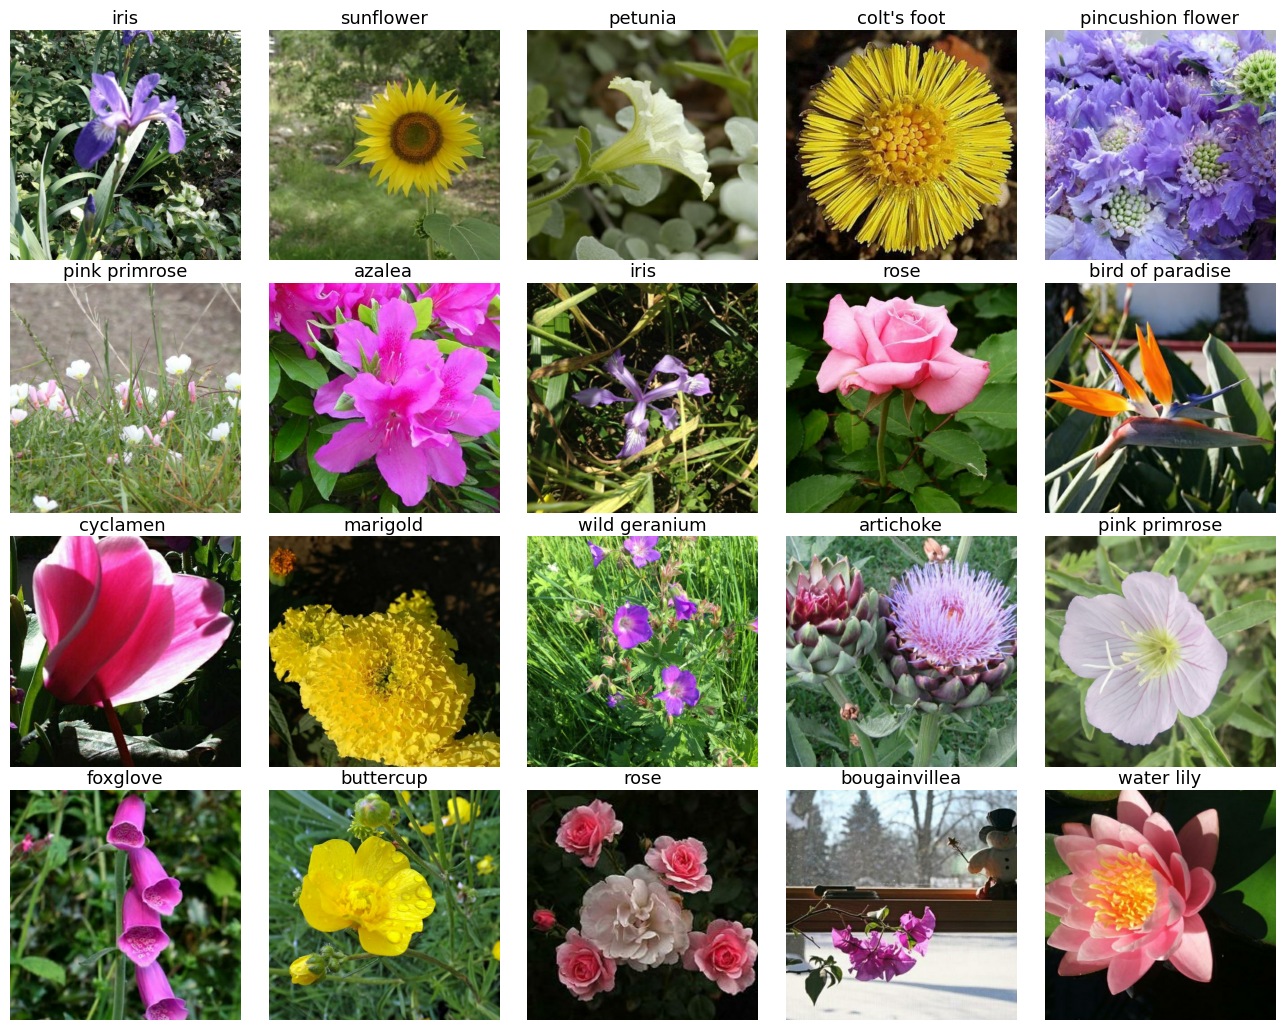

In [11]:
one_batch = next(ds_iter)
display_batch_of_images(one_batch)

# First Round of Modeling #

**Build the Model**

In our first model, we will utilize transfer learning, where we reuse part of a pretrained model to get a jump on training. In this case, we will use VGG16, which is a base model which is pretrained on ImageNet.

We need to define our model within a strategy.scope() context in order to utilize the data pipeline that we built earlier.

In [12]:
EPOCHS = 12

with strategy.scope():
    pretrained_model = tf.keras.applications.VGG16(
        weights='imagenet',
        include_top=False ,
        input_shape=[*IMAGE_SIZE, 3]
    )
    pretrained_model.trainable = False
    
    model = tf.keras.Sequential([
        # To a base pretrained on ImageNet to extract features from images...
        pretrained_model,
        # ... attach a new head to act as a classifier.
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(len(CLASSES), activation='softmax')
    ])

       0/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step

 4202496/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

16687104/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

29351936/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

43573248/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

58015744/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


We will also pre-define the metrics that we will be looking at later for model evaluation. In this case, we will use the sparce_categorical version of the loss metric, since we have a classification task with more than two labels

In [13]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy'],
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

The last step for building the model will be designing a learning rate, which we have increasing until 5 epochs, and then exponentially decaying thereafter.

Learning rate schedule: 1e-05 to 5e-05 to 2.05e-05


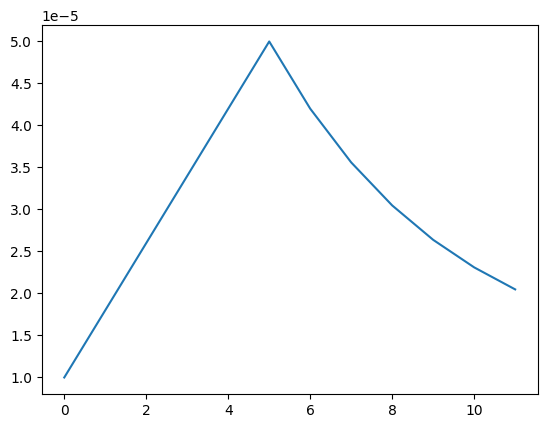

In [14]:

# Learning Rate Schedule for Fine Tuning #
def exponential_lr(epoch,
                   start_lr = 0.00001, min_lr = 0.00001, max_lr = 0.00005,
                   rampup_epochs = 5, sustain_epochs = 0,
                   exp_decay = 0.8):

    def lr(epoch, start_lr, min_lr, max_lr, rampup_epochs, sustain_epochs, exp_decay):
        # linear increase from start to rampup_epochs
        if epoch < rampup_epochs:
            lr = ((max_lr - start_lr) /
                  rampup_epochs * epoch + start_lr)
        # constant max_lr during sustain_epochs
        elif epoch < rampup_epochs + sustain_epochs:
            lr = max_lr
        # exponential decay towards min_lr
        else:
            lr = ((max_lr - min_lr) *
                  exp_decay**(epoch - rampup_epochs - sustain_epochs) +
                  min_lr)
        return lr
    return lr(epoch,
              start_lr,
              min_lr,
              max_lr,
              rampup_epochs,
              sustain_epochs,
              exp_decay)

lr_callback = tf.keras.callbacks.LearningRateScheduler(exponential_lr, verbose=True)

rng = [i for i in range(EPOCHS)]
y = [exponential_lr(x) for x in rng]
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))

**Model Training**

As an interesting point in model training, we can see the effect of using our data pipeline. In this output, see the time/step when we are fully implementing the TPU data pipeline that we constructed.

Below we will restate the definition for the model so that everything is under one call of strategy.scope()

In [15]:
## use scope
with strategy.scope():
    ## set model
    pretrained_model = tf.keras.applications.VGG16(
        weights='imagenet',
        include_top=False ,
        input_shape=[*IMAGE_SIZE, 3]
    )
    pretrained_model.trainable = False

    model = tf.keras.Sequential([
        # To a base pretrained on ImageNet to extract features from images...
        pretrained_model,
        # ... attach a new head to act as a classifier.
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(len(CLASSES), activation='softmax')
    ])

    ## compile model
    model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
    )

    STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE

    ## train model
    history = model.fit(
        ds_train,
        validation_data=ds_valid,
        epochs=EPOCHS,
        steps_per_epoch=STEPS_PER_EPOCH,
        callbacks=[lr_callback]
    )

I0000 00:00:1717867316.723239      77 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.


Epoch 1/12


2024-06-08 17:22:00.254325: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.


I0000 00:00:1717867322.906365     889 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(5014087334aea608:0:0), session_name()


 1/99 ━━━━━━━━━━━━━━━━━━━━ 21:22 13s/step - loss: 4.7383 - sparse_categorical_accuracy: 0.0156

I0000 00:00:1717867330.152998     889 tpu_compile_op_common.cc:245] Compilation of 5014087334aea608:0:0 with session name  took 7.246587601s and succeeded
I0000 00:00:1717867330.157793     889 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(5014087334aea608:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_2851115271921536310", property.function_library_fingerprint = 7424686920167730590, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "16,512,512,3,;16,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1717867330.157837     889 tpu_compilation_cache_interface.cc:541] After adding entry for key 50

 2/99 ━━━━━━━━━━━━━━━━━━━━ 48s 502ms/step - loss: 4.7258 - sparse_categorical_accuracy: 0.0195

 3/99 ━━━━━━━━━━━━━━━━━━━━ 48s 505ms/step - loss: 4.7237 - sparse_categorical_accuracy: 0.0191

 4/99 ━━━━━━━━━━━━━━━━━━━━ 46s 487ms/step - loss: 4.7184 - sparse_categorical_accuracy: 0.0182

 5/99 ━━━━━━━━━━━━━━━━━━━━ 44s 475ms/step - loss: 4.7137 - sparse_categorical_accuracy: 0.0174

 6/99 ━━━━━━━━━━━━━━━━━━━━ 44s 476ms/step - loss: 4.7109 - sparse_categorical_accuracy: 0.0164

 7/99 ━━━━━━━━━━━━━━━━━━━━ 44s 480ms/step - loss: 4.7065 - sparse_categorical_accuracy: 0.0163

 8/99 ━━━━━━━━━━━━━━━━━━━━ 44s 484ms/step - loss: 4.7023 - sparse_categorical_accuracy: 0.0162

 9/99 ━━━━━━━━━━━━━━━━━━━━ 44s 490ms/step - loss: 4.6971 - sparse_categorical_accuracy: 0.0168

10/99 ━━━━━━━━━━━━━━━━━━━━ 43s 484ms/step - loss: 4.6915 - sparse_categorical_accuracy: 0.0170

11/99 ━━━━━━━━━━━━━━━━━━━━ 42s 487ms/step - loss: 4.6854 - sparse_categorical_accuracy: 0.0174

12/99 ━━━━━━━━━━━━━━━━━━━━ 42s 484ms/step - loss: 4.6793 - sparse_categorical_accuracy: 0.0179

13/99 ━━━━━━━━━━━━━━━━━━━━ 41s 479ms/step - loss: 4.6728 - sparse_categorical_accuracy: 0.0184

14/99 ━━━━━━━━━━━━━━━━━━━━ 40s 479ms/step - loss: 4.6669 - sparse_categorical_accuracy: 0.0187

15/99 ━━━━━━━━━━━━━━━━━━━━ 40s 480ms/step - loss: 4.6610 - sparse_categorical_accuracy: 0.0190

16/99 ━━━━━━━━━━━━━━━━━━━━ 40s 483ms/step - loss: 4.6551 - sparse_categorical_accuracy: 0.0194

17/99 ━━━━━━━━━━━━━━━━━━━━ 39s 485ms/step - loss: 4.6496 - sparse_categorical_accuracy: 0.0198

18/99 ━━━━━━━━━━━━━━━━━━━━ 39s 488ms/step - loss: 4.6446 - sparse_categorical_accuracy: 0.0202

19/99 ━━━━━━━━━━━━━━━━━━━━ 38s 486ms/step - loss: 4.6399 - sparse_categorical_accuracy: 0.0207

20/99 ━━━━━━━━━━━━━━━━━━━━ 38s 488ms/step - loss: 4.6351 - sparse_categorical_accuracy: 0.0212

21/99 ━━━━━━━━━━━━━━━━━━━━ 38s 488ms/step - loss: 4.6304 - sparse_categorical_accuracy: 0.0217

22/99 ━━━━━━━━━━━━━━━━━━━━ 37s 486ms/step - loss: 4.6258 - sparse_categorical_accuracy: 0.0223

23/99 ━━━━━━━━━━━━━━━━━━━━ 37s 487ms/step - loss: 4.6211 - sparse_categorical_accuracy: 0.0228

24/99 ━━━━━━━━━━━━━━━━━━━━ 36s 485ms/step - loss: 4.6164 - sparse_categorical_accuracy: 0.0233

25/99 ━━━━━━━━━━━━━━━━━━━━ 35s 486ms/step - loss: 4.6119 - sparse_categorical_accuracy: 0.0238

26/99 ━━━━━━━━━━━━━━━━━━━━ 35s 484ms/step - loss: 4.6075 - sparse_categorical_accuracy: 0.0242

27/99 ━━━━━━━━━━━━━━━━━━━━ 34s 484ms/step - loss: 4.6033 - sparse_categorical_accuracy: 0.0247

28/99 ━━━━━━━━━━━━━━━━━━━━ 34s 484ms/step - loss: 4.5991 - sparse_categorical_accuracy: 0.0252

29/99 ━━━━━━━━━━━━━━━━━━━━ 33s 482ms/step - loss: 4.5952 - sparse_categorical_accuracy: 0.0258

30/99 ━━━━━━━━━━━━━━━━━━━━ 33s 481ms/step - loss: 4.5913 - sparse_categorical_accuracy: 0.0263

31/99 ━━━━━━━━━━━━━━━━━━━━ 32s 479ms/step - loss: 4.5876 - sparse_categorical_accuracy: 0.0269

32/99 ━━━━━━━━━━━━━━━━━━━━ 32s 480ms/step - loss: 4.5839 - sparse_categorical_accuracy: 0.0274

33/99 ━━━━━━━━━━━━━━━━━━━━ 31s 481ms/step - loss: 4.5803 - sparse_categorical_accuracy: 0.0280

34/99 ━━━━━━━━━━━━━━━━━━━━ 31s 482ms/step - loss: 4.5766 - sparse_categorical_accuracy: 0.0286

35/99 ━━━━━━━━━━━━━━━━━━━━ 30s 482ms/step - loss: 4.5729 - sparse_categorical_accuracy: 0.0292

36/99 ━━━━━━━━━━━━━━━━━━━━ 30s 482ms/step - loss: 4.5693 - sparse_categorical_accuracy: 0.0297

37/99 ━━━━━━━━━━━━━━━━━━━━ 29s 480ms/step - loss: 4.5656 - sparse_categorical_accuracy: 0.0302

38/99 ━━━━━━━━━━━━━━━━━━━━ 29s 481ms/step - loss: 4.5620 - sparse_categorical_accuracy: 0.0308

39/99 ━━━━━━━━━━━━━━━━━━━━ 28s 480ms/step - loss: 4.5584 - sparse_categorical_accuracy: 0.0313

40/99 ━━━━━━━━━━━━━━━━━━━━ 28s 479ms/step - loss: 4.5549 - sparse_categorical_accuracy: 0.0318

41/99 ━━━━━━━━━━━━━━━━━━━━ 27s 478ms/step - loss: 4.5514 - sparse_categorical_accuracy: 0.0323

42/99 ━━━━━━━━━━━━━━━━━━━━ 27s 479ms/step - loss: 4.5479 - sparse_categorical_accuracy: 0.0328

43/99 ━━━━━━━━━━━━━━━━━━━━ 26s 480ms/step - loss: 4.5444 - sparse_categorical_accuracy: 0.0332

44/99 ━━━━━━━━━━━━━━━━━━━━ 26s 479ms/step - loss: 4.5410 - sparse_categorical_accuracy: 0.0337

45/99 ━━━━━━━━━━━━━━━━━━━━ 25s 479ms/step - loss: 4.5377 - sparse_categorical_accuracy: 0.0341

46/99 ━━━━━━━━━━━━━━━━━━━━ 25s 479ms/step - loss: 4.5344 - sparse_categorical_accuracy: 0.0346

47/99 ━━━━━━━━━━━━━━━━━━━━ 24s 478ms/step - loss: 4.5311 - sparse_categorical_accuracy: 0.0350

48/99 ━━━━━━━━━━━━━━━━━━━━ 24s 477ms/step - loss: 4.5279 - sparse_categorical_accuracy: 0.0353

49/99 ━━━━━━━━━━━━━━━━━━━━ 23s 477ms/step - loss: 4.5248 - sparse_categorical_accuracy: 0.0357

50/99 ━━━━━━━━━━━━━━━━━━━━ 23s 476ms/step - loss: 4.5218 - sparse_categorical_accuracy: 0.0361

51/99 ━━━━━━━━━━━━━━━━━━━━ 22s 476ms/step - loss: 4.5189 - sparse_categorical_accuracy: 0.0365

52/99 ━━━━━━━━━━━━━━━━━━━━ 22s 475ms/step - loss: 4.5160 - sparse_categorical_accuracy: 0.0368

53/99 ━━━━━━━━━━━━━━━━━━━━ 21s 475ms/step - loss: 4.5131 - sparse_categorical_accuracy: 0.0372

54/99 ━━━━━━━━━━━━━━━━━━━━ 21s 474ms/step - loss: 4.5103 - sparse_categorical_accuracy: 0.0376

55/99 ━━━━━━━━━━━━━━━━━━━━ 20s 475ms/step - loss: 4.5075 - sparse_categorical_accuracy: 0.0379

56/99 ━━━━━━━━━━━━━━━━━━━━ 20s 476ms/step - loss: 4.5046 - sparse_categorical_accuracy: 0.0383

57/99 ━━━━━━━━━━━━━━━━━━━━ 20s 477ms/step - loss: 4.5019 - sparse_categorical_accuracy: 0.0386

58/99 ━━━━━━━━━━━━━━━━━━━━ 19s 477ms/step - loss: 4.4992 - sparse_categorical_accuracy: 0.0390

59/99 ━━━━━━━━━━━━━━━━━━━━ 19s 477ms/step - loss: 4.4965 - sparse_categorical_accuracy: 0.0393

60/99 ━━━━━━━━━━━━━━━━━━━━ 18s 476ms/step - loss: 4.4938 - sparse_categorical_accuracy: 0.0396

61/99 ━━━━━━━━━━━━━━━━━━━━ 18s 476ms/step - loss: 4.4911 - sparse_categorical_accuracy: 0.0399

62/99 ━━━━━━━━━━━━━━━━━━━━ 17s 476ms/step - loss: 4.4885 - sparse_categorical_accuracy: 0.0402

63/99 ━━━━━━━━━━━━━━━━━━━━ 17s 475ms/step - loss: 4.4859 - sparse_categorical_accuracy: 0.0405

64/99 ━━━━━━━━━━━━━━━━━━━━ 16s 475ms/step - loss: 4.4833 - sparse_categorical_accuracy: 0.0408

65/99 ━━━━━━━━━━━━━━━━━━━━ 16s 475ms/step - loss: 4.4808 - sparse_categorical_accuracy: 0.0411

66/99 ━━━━━━━━━━━━━━━━━━━━ 15s 475ms/step - loss: 4.4783 - sparse_categorical_accuracy: 0.0414

67/99 ━━━━━━━━━━━━━━━━━━━━ 15s 475ms/step - loss: 4.4759 - sparse_categorical_accuracy: 0.0417

68/99 ━━━━━━━━━━━━━━━━━━━━ 14s 475ms/step - loss: 4.4735 - sparse_categorical_accuracy: 0.0420

69/99 ━━━━━━━━━━━━━━━━━━━━ 14s 475ms/step - loss: 4.4711 - sparse_categorical_accuracy: 0.0422

70/99 ━━━━━━━━━━━━━━━━━━━━ 13s 475ms/step - loss: 4.4687 - sparse_categorical_accuracy: 0.0425

71/99 ━━━━━━━━━━━━━━━━━━━━ 13s 474ms/step - loss: 4.4664 - sparse_categorical_accuracy: 0.0428

72/99 ━━━━━━━━━━━━━━━━━━━━ 12s 474ms/step - loss: 4.4641 - sparse_categorical_accuracy: 0.0430

73/99 ━━━━━━━━━━━━━━━━━━━━ 12s 473ms/step - loss: 4.4619 - sparse_categorical_accuracy: 0.0433

74/99 ━━━━━━━━━━━━━━━━━━━━ 11s 473ms/step - loss: 4.4597 - sparse_categorical_accuracy: 0.0436

75/99 ━━━━━━━━━━━━━━━━━━━━ 11s 472ms/step - loss: 4.4575 - sparse_categorical_accuracy: 0.0438

76/99 ━━━━━━━━━━━━━━━━━━━━ 10s 473ms/step - loss: 4.4553 - sparse_categorical_accuracy: 0.0441

77/99 ━━━━━━━━━━━━━━━━━━━━ 10s 473ms/step - loss: 4.4532 - sparse_categorical_accuracy: 0.0444

78/99 ━━━━━━━━━━━━━━━━━━━━ 9s 472ms/step - loss: 4.4512 - sparse_categorical_accuracy: 0.0446 

79/99 ━━━━━━━━━━━━━━━━━━━━ 9s 473ms/step - loss: 4.4491 - sparse_categorical_accuracy: 0.0449

80/99 ━━━━━━━━━━━━━━━━━━━━ 8s 473ms/step - loss: 4.4471 - sparse_categorical_accuracy: 0.0451

81/99 ━━━━━━━━━━━━━━━━━━━━ 8s 473ms/step - loss: 4.4451 - sparse_categorical_accuracy: 0.0454

82/99 ━━━━━━━━━━━━━━━━━━━━ 8s 474ms/step - loss: 4.4431 - sparse_categorical_accuracy: 0.0456

83/99 ━━━━━━━━━━━━━━━━━━━━ 7s 474ms/step - loss: 4.4411 - sparse_categorical_accuracy: 0.0459

84/99 ━━━━━━━━━━━━━━━━━━━━ 7s 474ms/step - loss: 4.4392 - sparse_categorical_accuracy: 0.0461

85/99 ━━━━━━━━━━━━━━━━━━━━ 6s 475ms/step - loss: 4.4373 - sparse_categorical_accuracy: 0.0464

86/99 ━━━━━━━━━━━━━━━━━━━━ 6s 474ms/step - loss: 4.4354 - sparse_categorical_accuracy: 0.0466

87/99 ━━━━━━━━━━━━━━━━━━━━ 5s 474ms/step - loss: 4.4335 - sparse_categorical_accuracy: 0.0468

88/99 ━━━━━━━━━━━━━━━━━━━━ 5s 473ms/step - loss: 4.4316 - sparse_categorical_accuracy: 0.0471

89/99 ━━━━━━━━━━━━━━━━━━━━ 4s 474ms/step - loss: 4.4297 - sparse_categorical_accuracy: 0.0473

90/99 ━━━━━━━━━━━━━━━━━━━━ 4s 474ms/step - loss: 4.4278 - sparse_categorical_accuracy: 0.0476

91/99 ━━━━━━━━━━━━━━━━━━━━ 3s 473ms/step - loss: 4.4260 - sparse_categorical_accuracy: 0.0478

92/99 ━━━━━━━━━━━━━━━━━━━━ 3s 473ms/step - loss: 4.4242 - sparse_categorical_accuracy: 0.0480

93/99 ━━━━━━━━━━━━━━━━━━━━ 2s 473ms/step - loss: 4.4224 - sparse_categorical_accuracy: 0.0482

94/99 ━━━━━━━━━━━━━━━━━━━━ 2s 473ms/step - loss: 4.4206 - sparse_categorical_accuracy: 0.0485

95/99 ━━━━━━━━━━━━━━━━━━━━ 1s 473ms/step - loss: 4.4188 - sparse_categorical_accuracy: 0.0487

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 472ms/step - loss: 4.4171 - sparse_categorical_accuracy: 0.0489

97/99 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - loss: 4.4154 - sparse_categorical_accuracy: 0.0491

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - loss: 4.4137 - sparse_categorical_accuracy: 0.0493

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - loss: 4.4120 - sparse_categorical_accuracy: 0.0496

I0000 00:00:1717867378.665511     822 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(b3c35c6493d29f9f:0:0), session_name()


I0000 00:00:1717867385.056558     822 tpu_compile_op_common.cc:245] Compilation of b3c35c6493d29f9f:0:0 with session name  took 6.390993979s and succeeded
I0000 00:00:1717867385.059790     822 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(b3c35c6493d29f9f:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_10388656982472404188", property.function_library_fingerprint = 11328912854917533192, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "16,512,512,3,;16,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1717867385.059816     822 tpu_compilation_cache_interface.cc:541] After adding entry for key 

99/99 ━━━━━━━━━━━━━━━━━━━━ 79s 672ms/step - loss: 4.4101 - sparse_categorical_accuracy: 0.0498 - val_loss: 4.0858 - val_sparse_categorical_accuracy: 0.0797 - learning_rate: 0.0010



Epoch 2: LearningRateScheduler setting learning rate to 0.0008100000379979611.


Epoch 2/12


/usr/local/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


 1/99 ━━━━━━━━━━━━━━━━━━━━ 41s 423ms/step - loss: 4.0571 - sparse_categorical_accuracy: 0.0625

 2/99 ━━━━━━━━━━━━━━━━━━━━ 42s 435ms/step - loss: 4.0528 - sparse_categorical_accuracy: 0.0625

 3/99 ━━━━━━━━━━━━━━━━━━━━ 41s 435ms/step - loss: 4.0563 - sparse_categorical_accuracy: 0.0625

 4/99 ━━━━━━━━━━━━━━━━━━━━ 41s 433ms/step - loss: 4.0538 - sparse_categorical_accuracy: 0.0645

 5/99 ━━━━━━━━━━━━━━━━━━━━ 42s 447ms/step - loss: 4.0562 - sparse_categorical_accuracy: 0.0659

 6/99 ━━━━━━━━━━━━━━━━━━━━ 41s 443ms/step - loss: 4.0556 - sparse_categorical_accuracy: 0.0675

 7/99 ━━━━━━━━━━━━━━━━━━━━ 41s 452ms/step - loss: 4.0590 - sparse_categorical_accuracy: 0.0687

 8/99 ━━━━━━━━━━━━━━━━━━━━ 41s 454ms/step - loss: 4.0602 - sparse_categorical_accuracy: 0.0699

 9/99 ━━━━━━━━━━━━━━━━━━━━ 40s 452ms/step - loss: 4.0610 - sparse_categorical_accuracy: 0.0711

10/99 ━━━━━━━━━━━━━━━━━━━━ 40s 450ms/step - loss: 4.0594 - sparse_categorical_accuracy: 0.0728

11/99 ━━━━━━━━━━━━━━━━━━━━ 39s 448ms/step - loss: 4.0582 - sparse_categorical_accuracy: 0.0741

12/99 ━━━━━━━━━━━━━━━━━━━━ 38s 446ms/step - loss: 4.0576 - sparse_categorical_accuracy: 0.0752

13/99 ━━━━━━━━━━━━━━━━━━━━ 38s 444ms/step - loss: 4.0570 - sparse_categorical_accuracy: 0.0762

14/99 ━━━━━━━━━━━━━━━━━━━━ 37s 443ms/step - loss: 4.0572 - sparse_categorical_accuracy: 0.0770

15/99 ━━━━━━━━━━━━━━━━━━━━ 37s 445ms/step - loss: 4.0568 - sparse_categorical_accuracy: 0.0781

16/99 ━━━━━━━━━━━━━━━━━━━━ 36s 444ms/step - loss: 4.0566 - sparse_categorical_accuracy: 0.0791

17/99 ━━━━━━━━━━━━━━━━━━━━ 36s 443ms/step - loss: 4.0563 - sparse_categorical_accuracy: 0.0800

18/99 ━━━━━━━━━━━━━━━━━━━━ 36s 446ms/step - loss: 4.0562 - sparse_categorical_accuracy: 0.0808

19/99 ━━━━━━━━━━━━━━━━━━━━ 35s 447ms/step - loss: 4.0564 - sparse_categorical_accuracy: 0.0815

20/99 ━━━━━━━━━━━━━━━━━━━━ 35s 451ms/step - loss: 4.0564 - sparse_categorical_accuracy: 0.0821

21/99 ━━━━━━━━━━━━━━━━━━━━ 35s 450ms/step - loss: 4.0568 - sparse_categorical_accuracy: 0.0826

22/99 ━━━━━━━━━━━━━━━━━━━━ 34s 450ms/step - loss: 4.0570 - sparse_categorical_accuracy: 0.0830

23/99 ━━━━━━━━━━━━━━━━━━━━ 34s 450ms/step - loss: 4.0573 - sparse_categorical_accuracy: 0.0833

24/99 ━━━━━━━━━━━━━━━━━━━━ 33s 451ms/step - loss: 4.0574 - sparse_categorical_accuracy: 0.0837

25/99 ━━━━━━━━━━━━━━━━━━━━ 33s 455ms/step - loss: 4.0574 - sparse_categorical_accuracy: 0.0841

26/99 ━━━━━━━━━━━━━━━━━━━━ 33s 454ms/step - loss: 4.0573 - sparse_categorical_accuracy: 0.0844

27/99 ━━━━━━━━━━━━━━━━━━━━ 32s 455ms/step - loss: 4.0572 - sparse_categorical_accuracy: 0.0848

28/99 ━━━━━━━━━━━━━━━━━━━━ 32s 455ms/step - loss: 4.0573 - sparse_categorical_accuracy: 0.0851

29/99 ━━━━━━━━━━━━━━━━━━━━ 31s 453ms/step - loss: 4.0573 - sparse_categorical_accuracy: 0.0854

30/99 ━━━━━━━━━━━━━━━━━━━━ 31s 452ms/step - loss: 4.0572 - sparse_categorical_accuracy: 0.0857

31/99 ━━━━━━━━━━━━━━━━━━━━ 30s 452ms/step - loss: 4.0571 - sparse_categorical_accuracy: 0.0861

32/99 ━━━━━━━━━━━━━━━━━━━━ 30s 452ms/step - loss: 4.0570 - sparse_categorical_accuracy: 0.0864

33/99 ━━━━━━━━━━━━━━━━━━━━ 29s 454ms/step - loss: 4.0569 - sparse_categorical_accuracy: 0.0868

34/99 ━━━━━━━━━━━━━━━━━━━━ 29s 453ms/step - loss: 4.0568 - sparse_categorical_accuracy: 0.0871

35/99 ━━━━━━━━━━━━━━━━━━━━ 28s 452ms/step - loss: 4.0566 - sparse_categorical_accuracy: 0.0874

36/99 ━━━━━━━━━━━━━━━━━━━━ 28s 452ms/step - loss: 4.0563 - sparse_categorical_accuracy: 0.0877

37/99 ━━━━━━━━━━━━━━━━━━━━ 28s 454ms/step - loss: 4.0559 - sparse_categorical_accuracy: 0.0881

38/99 ━━━━━━━━━━━━━━━━━━━━ 27s 454ms/step - loss: 4.0556 - sparse_categorical_accuracy: 0.0885

39/99 ━━━━━━━━━━━━━━━━━━━━ 27s 454ms/step - loss: 4.0552 - sparse_categorical_accuracy: 0.0888

40/99 ━━━━━━━━━━━━━━━━━━━━ 26s 454ms/step - loss: 4.0549 - sparse_categorical_accuracy: 0.0892

41/99 ━━━━━━━━━━━━━━━━━━━━ 26s 454ms/step - loss: 4.0546 - sparse_categorical_accuracy: 0.0896

42/99 ━━━━━━━━━━━━━━━━━━━━ 25s 455ms/step - loss: 4.0544 - sparse_categorical_accuracy: 0.0899

43/99 ━━━━━━━━━━━━━━━━━━━━ 25s 457ms/step - loss: 4.0540 - sparse_categorical_accuracy: 0.0903

44/99 ━━━━━━━━━━━━━━━━━━━━ 25s 456ms/step - loss: 4.0536 - sparse_categorical_accuracy: 0.0907

45/99 ━━━━━━━━━━━━━━━━━━━━ 24s 456ms/step - loss: 4.0532 - sparse_categorical_accuracy: 0.0910

46/99 ━━━━━━━━━━━━━━━━━━━━ 24s 456ms/step - loss: 4.0529 - sparse_categorical_accuracy: 0.0914

47/99 ━━━━━━━━━━━━━━━━━━━━ 23s 455ms/step - loss: 4.0526 - sparse_categorical_accuracy: 0.0917

48/99 ━━━━━━━━━━━━━━━━━━━━ 23s 455ms/step - loss: 4.0523 - sparse_categorical_accuracy: 0.0919

49/99 ━━━━━━━━━━━━━━━━━━━━ 22s 455ms/step - loss: 4.0521 - sparse_categorical_accuracy: 0.0921

50/99 ━━━━━━━━━━━━━━━━━━━━ 22s 456ms/step - loss: 4.0519 - sparse_categorical_accuracy: 0.0924

51/99 ━━━━━━━━━━━━━━━━━━━━ 21s 457ms/step - loss: 4.0516 - sparse_categorical_accuracy: 0.0926

52/99 ━━━━━━━━━━━━━━━━━━━━ 21s 456ms/step - loss: 4.0514 - sparse_categorical_accuracy: 0.0928

53/99 ━━━━━━━━━━━━━━━━━━━━ 21s 457ms/step - loss: 4.0512 - sparse_categorical_accuracy: 0.0930

54/99 ━━━━━━━━━━━━━━━━━━━━ 20s 457ms/step - loss: 4.0510 - sparse_categorical_accuracy: 0.0932

55/99 ━━━━━━━━━━━━━━━━━━━━ 20s 456ms/step - loss: 4.0508 - sparse_categorical_accuracy: 0.0934

56/99 ━━━━━━━━━━━━━━━━━━━━ 19s 456ms/step - loss: 4.0506 - sparse_categorical_accuracy: 0.0936

57/99 ━━━━━━━━━━━━━━━━━━━━ 19s 458ms/step - loss: 4.0504 - sparse_categorical_accuracy: 0.0938

58/99 ━━━━━━━━━━━━━━━━━━━━ 18s 459ms/step - loss: 4.0501 - sparse_categorical_accuracy: 0.0940

59/99 ━━━━━━━━━━━━━━━━━━━━ 18s 458ms/step - loss: 4.0498 - sparse_categorical_accuracy: 0.0942

60/99 ━━━━━━━━━━━━━━━━━━━━ 17s 458ms/step - loss: 4.0496 - sparse_categorical_accuracy: 0.0944

61/99 ━━━━━━━━━━━━━━━━━━━━ 17s 458ms/step - loss: 4.0494 - sparse_categorical_accuracy: 0.0946

62/99 ━━━━━━━━━━━━━━━━━━━━ 16s 458ms/step - loss: 4.0491 - sparse_categorical_accuracy: 0.0948

63/99 ━━━━━━━━━━━━━━━━━━━━ 16s 458ms/step - loss: 4.0489 - sparse_categorical_accuracy: 0.0949

64/99 ━━━━━━━━━━━━━━━━━━━━ 16s 459ms/step - loss: 4.0486 - sparse_categorical_accuracy: 0.0951

65/99 ━━━━━━━━━━━━━━━━━━━━ 15s 458ms/step - loss: 4.0484 - sparse_categorical_accuracy: 0.0953

66/99 ━━━━━━━━━━━━━━━━━━━━ 15s 458ms/step - loss: 4.0481 - sparse_categorical_accuracy: 0.0955

67/99 ━━━━━━━━━━━━━━━━━━━━ 14s 458ms/step - loss: 4.0479 - sparse_categorical_accuracy: 0.0957

68/99 ━━━━━━━━━━━━━━━━━━━━ 14s 458ms/step - loss: 4.0477 - sparse_categorical_accuracy: 0.0958

69/99 ━━━━━━━━━━━━━━━━━━━━ 13s 459ms/step - loss: 4.0474 - sparse_categorical_accuracy: 0.0960

70/99 ━━━━━━━━━━━━━━━━━━━━ 13s 460ms/step - loss: 4.0472 - sparse_categorical_accuracy: 0.0962

71/99 ━━━━━━━━━━━━━━━━━━━━ 12s 461ms/step - loss: 4.0469 - sparse_categorical_accuracy: 0.0964

72/99 ━━━━━━━━━━━━━━━━━━━━ 12s 461ms/step - loss: 4.0467 - sparse_categorical_accuracy: 0.0965

73/99 ━━━━━━━━━━━━━━━━━━━━ 11s 461ms/step - loss: 4.0464 - sparse_categorical_accuracy: 0.0967

74/99 ━━━━━━━━━━━━━━━━━━━━ 11s 461ms/step - loss: 4.0461 - sparse_categorical_accuracy: 0.0968

75/99 ━━━━━━━━━━━━━━━━━━━━ 11s 462ms/step - loss: 4.0459 - sparse_categorical_accuracy: 0.0970

76/99 ━━━━━━━━━━━━━━━━━━━━ 10s 462ms/step - loss: 4.0456 - sparse_categorical_accuracy: 0.0972

77/99 ━━━━━━━━━━━━━━━━━━━━ 10s 461ms/step - loss: 4.0453 - sparse_categorical_accuracy: 0.0973

78/99 ━━━━━━━━━━━━━━━━━━━━ 9s 461ms/step - loss: 4.0450 - sparse_categorical_accuracy: 0.0975 

79/99 ━━━━━━━━━━━━━━━━━━━━ 9s 462ms/step - loss: 4.0448 - sparse_categorical_accuracy: 0.0977

80/99 ━━━━━━━━━━━━━━━━━━━━ 8s 462ms/step - loss: 4.0445 - sparse_categorical_accuracy: 0.0978

81/99 ━━━━━━━━━━━━━━━━━━━━ 8s 462ms/step - loss: 4.0443 - sparse_categorical_accuracy: 0.0980

82/99 ━━━━━━━━━━━━━━━━━━━━ 7s 463ms/step - loss: 4.0440 - sparse_categorical_accuracy: 0.0981

83/99 ━━━━━━━━━━━━━━━━━━━━ 7s 464ms/step - loss: 4.0437 - sparse_categorical_accuracy: 0.0983

84/99 ━━━━━━━━━━━━━━━━━━━━ 6s 465ms/step - loss: 4.0434 - sparse_categorical_accuracy: 0.0985

85/99 ━━━━━━━━━━━━━━━━━━━━ 6s 466ms/step - loss: 4.0431 - sparse_categorical_accuracy: 0.0986

86/99 ━━━━━━━━━━━━━━━━━━━━ 6s 465ms/step - loss: 4.0428 - sparse_categorical_accuracy: 0.0988

87/99 ━━━━━━━━━━━━━━━━━━━━ 5s 465ms/step - loss: 4.0425 - sparse_categorical_accuracy: 0.0989

88/99 ━━━━━━━━━━━━━━━━━━━━ 5s 465ms/step - loss: 4.0422 - sparse_categorical_accuracy: 0.0991

89/99 ━━━━━━━━━━━━━━━━━━━━ 4s 464ms/step - loss: 4.0419 - sparse_categorical_accuracy: 0.0993

90/99 ━━━━━━━━━━━━━━━━━━━━ 4s 465ms/step - loss: 4.0415 - sparse_categorical_accuracy: 0.0994

91/99 ━━━━━━━━━━━━━━━━━━━━ 3s 465ms/step - loss: 4.0412 - sparse_categorical_accuracy: 0.0996

92/99 ━━━━━━━━━━━━━━━━━━━━ 3s 466ms/step - loss: 4.0409 - sparse_categorical_accuracy: 0.0997

93/99 ━━━━━━━━━━━━━━━━━━━━ 2s 466ms/step - loss: 4.0405 - sparse_categorical_accuracy: 0.0999

94/99 ━━━━━━━━━━━━━━━━━━━━ 2s 466ms/step - loss: 4.0402 - sparse_categorical_accuracy: 0.1000

95/99 ━━━━━━━━━━━━━━━━━━━━ 1s 467ms/step - loss: 4.0399 - sparse_categorical_accuracy: 0.1002

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 468ms/step - loss: 4.0396 - sparse_categorical_accuracy: 0.1003

97/99 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - loss: 4.0392 - sparse_categorical_accuracy: 0.1005

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - loss: 4.0389 - sparse_categorical_accuracy: 0.1006

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - loss: 4.0386 - sparse_categorical_accuracy: 0.1008

99/99 ━━━━━━━━━━━━━━━━━━━━ 58s 590ms/step - loss: 4.0380 - sparse_categorical_accuracy: 0.1010 - val_loss: 3.9704 - val_sparse_categorical_accuracy: 0.1336 - learning_rate: 8.1000e-04



Epoch 3: LearningRateScheduler setting learning rate to 0.0005060000335611404.


Epoch 3/12


 1/99 ━━━━━━━━━━━━━━━━━━━━ 49s 510ms/step - loss: 3.9020 - sparse_categorical_accuracy: 0.1094

 2/99 ━━━━━━━━━━━━━━━━━━━━ 42s 434ms/step - loss: 3.9391 - sparse_categorical_accuracy: 0.1094

 3/99 ━━━━━━━━━━━━━━━━━━━━ 43s 452ms/step - loss: 3.9517 - sparse_categorical_accuracy: 0.1181

 4/99 ━━━━━━━━━━━━━━━━━━━━ 44s 470ms/step - loss: 3.9530 - sparse_categorical_accuracy: 0.1222

 5/99 ━━━━━━━━━━━━━━━━━━━━ 43s 460ms/step - loss: 3.9602 - sparse_categorical_accuracy: 0.1243

 6/99 ━━━━━━━━━━━━━━━━━━━━ 42s 453ms/step - loss: 3.9635 - sparse_categorical_accuracy: 0.1266

 7/99 ━━━━━━━━━━━━━━━━━━━━ 41s 454ms/step - loss: 3.9643 - sparse_categorical_accuracy: 0.1283

 8/99 ━━━━━━━━━━━━━━━━━━━━ 41s 453ms/step - loss: 3.9627 - sparse_categorical_accuracy: 0.1298

 9/99 ━━━━━━━━━━━━━━━━━━━━ 40s 452ms/step - loss: 3.9623 - sparse_categorical_accuracy: 0.1303

10/99 ━━━━━━━━━━━━━━━━━━━━ 40s 451ms/step - loss: 3.9610 - sparse_categorical_accuracy: 0.1304

11/99 ━━━━━━━━━━━━━━━━━━━━ 39s 449ms/step - loss: 3.9588 - sparse_categorical_accuracy: 0.1307

12/99 ━━━━━━━━━━━━━━━━━━━━ 38s 447ms/step - loss: 3.9580 - sparse_categorical_accuracy: 0.1310

13/99 ━━━━━━━━━━━━━━━━━━━━ 38s 447ms/step - loss: 3.9572 - sparse_categorical_accuracy: 0.1312

14/99 ━━━━━━━━━━━━━━━━━━━━ 38s 452ms/step - loss: 3.9557 - sparse_categorical_accuracy: 0.1313

15/99 ━━━━━━━━━━━━━━━━━━━━ 38s 456ms/step - loss: 3.9549 - sparse_categorical_accuracy: 0.1313

16/99 ━━━━━━━━━━━━━━━━━━━━ 37s 456ms/step - loss: 3.9542 - sparse_categorical_accuracy: 0.1312

17/99 ━━━━━━━━━━━━━━━━━━━━ 37s 459ms/step - loss: 3.9536 - sparse_categorical_accuracy: 0.1311

18/99 ━━━━━━━━━━━━━━━━━━━━ 37s 463ms/step - loss: 3.9535 - sparse_categorical_accuracy: 0.1310

19/99 ━━━━━━━━━━━━━━━━━━━━ 36s 462ms/step - loss: 3.9535 - sparse_categorical_accuracy: 0.1309

20/99 ━━━━━━━━━━━━━━━━━━━━ 36s 464ms/step - loss: 3.9532 - sparse_categorical_accuracy: 0.1308

21/99 ━━━━━━━━━━━━━━━━━━━━ 36s 464ms/step - loss: 3.9529 - sparse_categorical_accuracy: 0.1309

22/99 ━━━━━━━━━━━━━━━━━━━━ 35s 463ms/step - loss: 3.9521 - sparse_categorical_accuracy: 0.1311

23/99 ━━━━━━━━━━━━━━━━━━━━ 35s 461ms/step - loss: 3.9513 - sparse_categorical_accuracy: 0.1313

24/99 ━━━━━━━━━━━━━━━━━━━━ 34s 460ms/step - loss: 3.9510 - sparse_categorical_accuracy: 0.1315

25/99 ━━━━━━━━━━━━━━━━━━━━ 34s 460ms/step - loss: 3.9507 - sparse_categorical_accuracy: 0.1317

26/99 ━━━━━━━━━━━━━━━━━━━━ 33s 458ms/step - loss: 3.9504 - sparse_categorical_accuracy: 0.1318

27/99 ━━━━━━━━━━━━━━━━━━━━ 32s 458ms/step - loss: 3.9502 - sparse_categorical_accuracy: 0.1319

28/99 ━━━━━━━━━━━━━━━━━━━━ 32s 457ms/step - loss: 3.9502 - sparse_categorical_accuracy: 0.1320

29/99 ━━━━━━━━━━━━━━━━━━━━ 32s 458ms/step - loss: 3.9502 - sparse_categorical_accuracy: 0.1321

30/99 ━━━━━━━━━━━━━━━━━━━━ 31s 457ms/step - loss: 3.9501 - sparse_categorical_accuracy: 0.1322

31/99 ━━━━━━━━━━━━━━━━━━━━ 31s 457ms/step - loss: 3.9502 - sparse_categorical_accuracy: 0.1323

32/99 ━━━━━━━━━━━━━━━━━━━━ 30s 457ms/step - loss: 3.9501 - sparse_categorical_accuracy: 0.1325

33/99 ━━━━━━━━━━━━━━━━━━━━ 30s 459ms/step - loss: 3.9500 - sparse_categorical_accuracy: 0.1326

34/99 ━━━━━━━━━━━━━━━━━━━━ 29s 461ms/step - loss: 3.9497 - sparse_categorical_accuracy: 0.1328

35/99 ━━━━━━━━━━━━━━━━━━━━ 29s 460ms/step - loss: 3.9494 - sparse_categorical_accuracy: 0.1330

36/99 ━━━━━━━━━━━━━━━━━━━━ 28s 460ms/step - loss: 3.9490 - sparse_categorical_accuracy: 0.1333

37/99 ━━━━━━━━━━━━━━━━━━━━ 28s 459ms/step - loss: 3.9486 - sparse_categorical_accuracy: 0.1335

38/99 ━━━━━━━━━━━━━━━━━━━━ 27s 459ms/step - loss: 3.9481 - sparse_categorical_accuracy: 0.1337

39/99 ━━━━━━━━━━━━━━━━━━━━ 27s 458ms/step - loss: 3.9477 - sparse_categorical_accuracy: 0.1339

40/99 ━━━━━━━━━━━━━━━━━━━━ 27s 458ms/step - loss: 3.9471 - sparse_categorical_accuracy: 0.1341

41/99 ━━━━━━━━━━━━━━━━━━━━ 26s 457ms/step - loss: 3.9466 - sparse_categorical_accuracy: 0.1342

42/99 ━━━━━━━━━━━━━━━━━━━━ 26s 457ms/step - loss: 3.9460 - sparse_categorical_accuracy: 0.1345

43/99 ━━━━━━━━━━━━━━━━━━━━ 25s 458ms/step - loss: 3.9455 - sparse_categorical_accuracy: 0.1346

44/99 ━━━━━━━━━━━━━━━━━━━━ 25s 458ms/step - loss: 3.9450 - sparse_categorical_accuracy: 0.1348

45/99 ━━━━━━━━━━━━━━━━━━━━ 24s 457ms/step - loss: 3.9445 - sparse_categorical_accuracy: 0.1350

46/99 ━━━━━━━━━━━━━━━━━━━━ 24s 459ms/step - loss: 3.9441 - sparse_categorical_accuracy: 0.1352

47/99 ━━━━━━━━━━━━━━━━━━━━ 23s 459ms/step - loss: 3.9437 - sparse_categorical_accuracy: 0.1354

48/99 ━━━━━━━━━━━━━━━━━━━━ 23s 459ms/step - loss: 3.9433 - sparse_categorical_accuracy: 0.1355

49/99 ━━━━━━━━━━━━━━━━━━━━ 22s 458ms/step - loss: 3.9430 - sparse_categorical_accuracy: 0.1356

50/99 ━━━━━━━━━━━━━━━━━━━━ 22s 458ms/step - loss: 3.9427 - sparse_categorical_accuracy: 0.1358

51/99 ━━━━━━━━━━━━━━━━━━━━ 21s 458ms/step - loss: 3.9425 - sparse_categorical_accuracy: 0.1359

52/99 ━━━━━━━━━━━━━━━━━━━━ 21s 457ms/step - loss: 3.9423 - sparse_categorical_accuracy: 0.1360

53/99 ━━━━━━━━━━━━━━━━━━━━ 21s 457ms/step - loss: 3.9421 - sparse_categorical_accuracy: 0.1361

54/99 ━━━━━━━━━━━━━━━━━━━━ 20s 456ms/step - loss: 3.9419 - sparse_categorical_accuracy: 0.1361

55/99 ━━━━━━━━━━━━━━━━━━━━ 20s 457ms/step - loss: 3.9417 - sparse_categorical_accuracy: 0.1362

56/99 ━━━━━━━━━━━━━━━━━━━━ 19s 457ms/step - loss: 3.9415 - sparse_categorical_accuracy: 0.1363

57/99 ━━━━━━━━━━━━━━━━━━━━ 19s 457ms/step - loss: 3.9412 - sparse_categorical_accuracy: 0.1364

58/99 ━━━━━━━━━━━━━━━━━━━━ 18s 456ms/step - loss: 3.9409 - sparse_categorical_accuracy: 0.1365

59/99 ━━━━━━━━━━━━━━━━━━━━ 18s 456ms/step - loss: 3.9406 - sparse_categorical_accuracy: 0.1366

60/99 ━━━━━━━━━━━━━━━━━━━━ 17s 457ms/step - loss: 3.9403 - sparse_categorical_accuracy: 0.1367

61/99 ━━━━━━━━━━━━━━━━━━━━ 17s 458ms/step - loss: 3.9400 - sparse_categorical_accuracy: 0.1368

62/99 ━━━━━━━━━━━━━━━━━━━━ 16s 459ms/step - loss: 3.9397 - sparse_categorical_accuracy: 0.1369

63/99 ━━━━━━━━━━━━━━━━━━━━ 16s 461ms/step - loss: 3.9393 - sparse_categorical_accuracy: 0.1370

64/99 ━━━━━━━━━━━━━━━━━━━━ 16s 462ms/step - loss: 3.9391 - sparse_categorical_accuracy: 0.1371

65/99 ━━━━━━━━━━━━━━━━━━━━ 15s 461ms/step - loss: 3.9388 - sparse_categorical_accuracy: 0.1372

66/99 ━━━━━━━━━━━━━━━━━━━━ 15s 461ms/step - loss: 3.9386 - sparse_categorical_accuracy: 0.1373

67/99 ━━━━━━━━━━━━━━━━━━━━ 14s 461ms/step - loss: 3.9383 - sparse_categorical_accuracy: 0.1374

68/99 ━━━━━━━━━━━━━━━━━━━━ 14s 461ms/step - loss: 3.9381 - sparse_categorical_accuracy: 0.1375

69/99 ━━━━━━━━━━━━━━━━━━━━ 13s 462ms/step - loss: 3.9379 - sparse_categorical_accuracy: 0.1376

70/99 ━━━━━━━━━━━━━━━━━━━━ 13s 462ms/step - loss: 3.9376 - sparse_categorical_accuracy: 0.1377

71/99 ━━━━━━━━━━━━━━━━━━━━ 12s 462ms/step - loss: 3.9374 - sparse_categorical_accuracy: 0.1377

72/99 ━━━━━━━━━━━━━━━━━━━━ 12s 463ms/step - loss: 3.9371 - sparse_categorical_accuracy: 0.1378

73/99 ━━━━━━━━━━━━━━━━━━━━ 12s 464ms/step - loss: 3.9369 - sparse_categorical_accuracy: 0.1379

74/99 ━━━━━━━━━━━━━━━━━━━━ 11s 464ms/step - loss: 3.9366 - sparse_categorical_accuracy: 0.1380

75/99 ━━━━━━━━━━━━━━━━━━━━ 11s 464ms/step - loss: 3.9363 - sparse_categorical_accuracy: 0.1381

76/99 ━━━━━━━━━━━━━━━━━━━━ 10s 465ms/step - loss: 3.9360 - sparse_categorical_accuracy: 0.1382

77/99 ━━━━━━━━━━━━━━━━━━━━ 10s 465ms/step - loss: 3.9357 - sparse_categorical_accuracy: 0.1383

78/99 ━━━━━━━━━━━━━━━━━━━━ 9s 465ms/step - loss: 3.9354 - sparse_categorical_accuracy: 0.1384 

79/99 ━━━━━━━━━━━━━━━━━━━━ 9s 465ms/step - loss: 3.9351 - sparse_categorical_accuracy: 0.1385

80/99 ━━━━━━━━━━━━━━━━━━━━ 8s 465ms/step - loss: 3.9348 - sparse_categorical_accuracy: 0.1386

81/99 ━━━━━━━━━━━━━━━━━━━━ 8s 465ms/step - loss: 3.9345 - sparse_categorical_accuracy: 0.1387

82/99 ━━━━━━━━━━━━━━━━━━━━ 7s 466ms/step - loss: 3.9342 - sparse_categorical_accuracy: 0.1388

83/99 ━━━━━━━━━━━━━━━━━━━━ 7s 465ms/step - loss: 3.9339 - sparse_categorical_accuracy: 0.1389

84/99 ━━━━━━━━━━━━━━━━━━━━ 6s 466ms/step - loss: 3.9336 - sparse_categorical_accuracy: 0.1390

85/99 ━━━━━━━━━━━━━━━━━━━━ 6s 466ms/step - loss: 3.9333 - sparse_categorical_accuracy: 0.1391

86/99 ━━━━━━━━━━━━━━━━━━━━ 6s 466ms/step - loss: 3.9331 - sparse_categorical_accuracy: 0.1392

87/99 ━━━━━━━━━━━━━━━━━━━━ 5s 467ms/step - loss: 3.9328 - sparse_categorical_accuracy: 0.1392

88/99 ━━━━━━━━━━━━━━━━━━━━ 5s 467ms/step - loss: 3.9326 - sparse_categorical_accuracy: 0.1393

89/99 ━━━━━━━━━━━━━━━━━━━━ 4s 467ms/step - loss: 3.9324 - sparse_categorical_accuracy: 0.1394

90/99 ━━━━━━━━━━━━━━━━━━━━ 4s 467ms/step - loss: 3.9321 - sparse_categorical_accuracy: 0.1395

91/99 ━━━━━━━━━━━━━━━━━━━━ 3s 467ms/step - loss: 3.9319 - sparse_categorical_accuracy: 0.1396

92/99 ━━━━━━━━━━━━━━━━━━━━ 3s 467ms/step - loss: 3.9317 - sparse_categorical_accuracy: 0.1396

93/99 ━━━━━━━━━━━━━━━━━━━━ 2s 467ms/step - loss: 3.9314 - sparse_categorical_accuracy: 0.1397

94/99 ━━━━━━━━━━━━━━━━━━━━ 2s 467ms/step - loss: 3.9312 - sparse_categorical_accuracy: 0.1397

95/99 ━━━━━━━━━━━━━━━━━━━━ 1s 467ms/step - loss: 3.9309 - sparse_categorical_accuracy: 0.1398

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 467ms/step - loss: 3.9307 - sparse_categorical_accuracy: 0.1399

97/99 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - loss: 3.9304 - sparse_categorical_accuracy: 0.1399

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - loss: 3.9302 - sparse_categorical_accuracy: 0.1400

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - loss: 3.9300 - sparse_categorical_accuracy: 0.1400

99/99 ━━━━━━━━━━━━━━━━━━━━ 58s 590ms/step - loss: 3.9295 - sparse_categorical_accuracy: 0.1402 - val_loss: 3.9112 - val_sparse_categorical_accuracy: 0.1573 - learning_rate: 5.0600e-04



Epoch 4: LearningRateScheduler setting learning rate to 0.00023240000449121004.


Epoch 4/12


 1/99 ━━━━━━━━━━━━━━━━━━━━ 52s 535ms/step - loss: 3.9502 - sparse_categorical_accuracy: 0.1406

 2/99 ━━━━━━━━━━━━━━━━━━━━ 42s 442ms/step - loss: 3.9036 - sparse_categorical_accuracy: 0.1484

 3/99 ━━━━━━━━━━━━━━━━━━━━ 42s 442ms/step - loss: 3.8977 - sparse_categorical_accuracy: 0.1528

 4/99 ━━━━━━━━━━━━━━━━━━━━ 42s 444ms/step - loss: 3.9066 - sparse_categorical_accuracy: 0.1532

 5/99 ━━━━━━━━━━━━━━━━━━━━ 41s 444ms/step - loss: 3.9150 - sparse_categorical_accuracy: 0.1538

 6/99 ━━━━━━━━━━━━━━━━━━━━ 41s 445ms/step - loss: 3.9172 - sparse_categorical_accuracy: 0.1546

 7/99 ━━━━━━━━━━━━━━━━━━━━ 40s 445ms/step - loss: 3.9188 - sparse_categorical_accuracy: 0.1545

 8/99 ━━━━━━━━━━━━━━━━━━━━ 40s 445ms/step - loss: 3.9193 - sparse_categorical_accuracy: 0.1545

 9/99 ━━━━━━━━━━━━━━━━━━━━ 40s 445ms/step - loss: 3.9187 - sparse_categorical_accuracy: 0.1544

10/99 ━━━━━━━━━━━━━━━━━━━━ 40s 455ms/step - loss: 3.9179 - sparse_categorical_accuracy: 0.1543

11/99 ━━━━━━━━━━━━━━━━━━━━ 40s 455ms/step - loss: 3.9167 - sparse_categorical_accuracy: 0.1542

12/99 ━━━━━━━━━━━━━━━━━━━━ 39s 455ms/step - loss: 3.9146 - sparse_categorical_accuracy: 0.1542

13/99 ━━━━━━━━━━━━━━━━━━━━ 39s 455ms/step - loss: 3.9139 - sparse_categorical_accuracy: 0.1537

14/99 ━━━━━━━━━━━━━━━━━━━━ 38s 453ms/step - loss: 3.9128 - sparse_categorical_accuracy: 0.1533

15/99 ━━━━━━━━━━━━━━━━━━━━ 37s 452ms/step - loss: 3.9116 - sparse_categorical_accuracy: 0.1531

16/99 ━━━━━━━━━━━━━━━━━━━━ 37s 451ms/step - loss: 3.9109 - sparse_categorical_accuracy: 0.1526

17/99 ━━━━━━━━━━━━━━━━━━━━ 36s 450ms/step - loss: 3.9101 - sparse_categorical_accuracy: 0.1522

18/99 ━━━━━━━━━━━━━━━━━━━━ 36s 450ms/step - loss: 3.9091 - sparse_categorical_accuracy: 0.1520

19/99 ━━━━━━━━━━━━━━━━━━━━ 35s 448ms/step - loss: 3.9086 - sparse_categorical_accuracy: 0.1516

20/99 ━━━━━━━━━━━━━━━━━━━━ 35s 447ms/step - loss: 3.9078 - sparse_categorical_accuracy: 0.1513

21/99 ━━━━━━━━━━━━━━━━━━━━ 35s 451ms/step - loss: 3.9070 - sparse_categorical_accuracy: 0.1509

22/99 ━━━━━━━━━━━━━━━━━━━━ 34s 452ms/step - loss: 3.9062 - sparse_categorical_accuracy: 0.1507

23/99 ━━━━━━━━━━━━━━━━━━━━ 34s 452ms/step - loss: 3.9057 - sparse_categorical_accuracy: 0.1505

24/99 ━━━━━━━━━━━━━━━━━━━━ 34s 455ms/step - loss: 3.9053 - sparse_categorical_accuracy: 0.1503

25/99 ━━━━━━━━━━━━━━━━━━━━ 33s 455ms/step - loss: 3.9048 - sparse_categorical_accuracy: 0.1501

26/99 ━━━━━━━━━━━━━━━━━━━━ 33s 458ms/step - loss: 3.9046 - sparse_categorical_accuracy: 0.1500

27/99 ━━━━━━━━━━━━━━━━━━━━ 33s 458ms/step - loss: 3.9043 - sparse_categorical_accuracy: 0.1498

28/99 ━━━━━━━━━━━━━━━━━━━━ 32s 461ms/step - loss: 3.9039 - sparse_categorical_accuracy: 0.1498

29/99 ━━━━━━━━━━━━━━━━━━━━ 32s 463ms/step - loss: 3.9035 - sparse_categorical_accuracy: 0.1497

30/99 ━━━━━━━━━━━━━━━━━━━━ 32s 464ms/step - loss: 3.9029 - sparse_categorical_accuracy: 0.1496

31/99 ━━━━━━━━━━━━━━━━━━━━ 31s 463ms/step - loss: 3.9023 - sparse_categorical_accuracy: 0.1496

32/99 ━━━━━━━━━━━━━━━━━━━━ 30s 462ms/step - loss: 3.9017 - sparse_categorical_accuracy: 0.1495

33/99 ━━━━━━━━━━━━━━━━━━━━ 30s 464ms/step - loss: 3.9013 - sparse_categorical_accuracy: 0.1495

34/99 ━━━━━━━━━━━━━━━━━━━━ 30s 463ms/step - loss: 3.9007 - sparse_categorical_accuracy: 0.1494

35/99 ━━━━━━━━━━━━━━━━━━━━ 29s 462ms/step - loss: 3.9002 - sparse_categorical_accuracy: 0.1494

36/99 ━━━━━━━━━━━━━━━━━━━━ 29s 464ms/step - loss: 3.8997 - sparse_categorical_accuracy: 0.1493

37/99 ━━━━━━━━━━━━━━━━━━━━ 28s 463ms/step - loss: 3.8991 - sparse_categorical_accuracy: 0.1493

38/99 ━━━━━━━━━━━━━━━━━━━━ 28s 465ms/step - loss: 3.8985 - sparse_categorical_accuracy: 0.1493

39/99 ━━━━━━━━━━━━━━━━━━━━ 27s 465ms/step - loss: 3.8978 - sparse_categorical_accuracy: 0.1494

40/99 ━━━━━━━━━━━━━━━━━━━━ 27s 466ms/step - loss: 3.8973 - sparse_categorical_accuracy: 0.1494

41/99 ━━━━━━━━━━━━━━━━━━━━ 26s 465ms/step - loss: 3.8968 - sparse_categorical_accuracy: 0.1494

42/99 ━━━━━━━━━━━━━━━━━━━━ 26s 467ms/step - loss: 3.8963 - sparse_categorical_accuracy: 0.1494

43/99 ━━━━━━━━━━━━━━━━━━━━ 26s 468ms/step - loss: 3.8959 - sparse_categorical_accuracy: 0.1494

44/99 ━━━━━━━━━━━━━━━━━━━━ 25s 467ms/step - loss: 3.8955 - sparse_categorical_accuracy: 0.1494

45/99 ━━━━━━━━━━━━━━━━━━━━ 25s 466ms/step - loss: 3.8951 - sparse_categorical_accuracy: 0.1494

46/99 ━━━━━━━━━━━━━━━━━━━━ 24s 466ms/step - loss: 3.8948 - sparse_categorical_accuracy: 0.1495

47/99 ━━━━━━━━━━━━━━━━━━━━ 24s 465ms/step - loss: 3.8944 - sparse_categorical_accuracy: 0.1495

48/99 ━━━━━━━━━━━━━━━━━━━━ 23s 465ms/step - loss: 3.8940 - sparse_categorical_accuracy: 0.1495

49/99 ━━━━━━━━━━━━━━━━━━━━ 23s 464ms/step - loss: 3.8936 - sparse_categorical_accuracy: 0.1496

50/99 ━━━━━━━━━━━━━━━━━━━━ 22s 464ms/step - loss: 3.8932 - sparse_categorical_accuracy: 0.1496

51/99 ━━━━━━━━━━━━━━━━━━━━ 22s 464ms/step - loss: 3.8928 - sparse_categorical_accuracy: 0.1497

52/99 ━━━━━━━━━━━━━━━━━━━━ 21s 465ms/step - loss: 3.8924 - sparse_categorical_accuracy: 0.1497

53/99 ━━━━━━━━━━━━━━━━━━━━ 21s 466ms/step - loss: 3.8921 - sparse_categorical_accuracy: 0.1497

54/99 ━━━━━━━━━━━━━━━━━━━━ 20s 466ms/step - loss: 3.8917 - sparse_categorical_accuracy: 0.1498

55/99 ━━━━━━━━━━━━━━━━━━━━ 20s 467ms/step - loss: 3.8914 - sparse_categorical_accuracy: 0.1498

56/99 ━━━━━━━━━━━━━━━━━━━━ 20s 467ms/step - loss: 3.8911 - sparse_categorical_accuracy: 0.1498

57/99 ━━━━━━━━━━━━━━━━━━━━ 19s 468ms/step - loss: 3.8907 - sparse_categorical_accuracy: 0.1499

58/99 ━━━━━━━━━━━━━━━━━━━━ 19s 469ms/step - loss: 3.8904 - sparse_categorical_accuracy: 0.1499

59/99 ━━━━━━━━━━━━━━━━━━━━ 18s 470ms/step - loss: 3.8901 - sparse_categorical_accuracy: 0.1499

60/99 ━━━━━━━━━━━━━━━━━━━━ 18s 469ms/step - loss: 3.8897 - sparse_categorical_accuracy: 0.1500

61/99 ━━━━━━━━━━━━━━━━━━━━ 17s 470ms/step - loss: 3.8894 - sparse_categorical_accuracy: 0.1500

62/99 ━━━━━━━━━━━━━━━━━━━━ 17s 471ms/step - loss: 3.8890 - sparse_categorical_accuracy: 0.1501

63/99 ━━━━━━━━━━━━━━━━━━━━ 16s 472ms/step - loss: 3.8886 - sparse_categorical_accuracy: 0.1501

64/99 ━━━━━━━━━━━━━━━━━━━━ 16s 471ms/step - loss: 3.8883 - sparse_categorical_accuracy: 0.1501

65/99 ━━━━━━━━━━━━━━━━━━━━ 16s 472ms/step - loss: 3.8879 - sparse_categorical_accuracy: 0.1502

66/99 ━━━━━━━━━━━━━━━━━━━━ 15s 472ms/step - loss: 3.8876 - sparse_categorical_accuracy: 0.1502

67/99 ━━━━━━━━━━━━━━━━━━━━ 15s 471ms/step - loss: 3.8873 - sparse_categorical_accuracy: 0.1502

68/99 ━━━━━━━━━━━━━━━━━━━━ 14s 471ms/step - loss: 3.8870 - sparse_categorical_accuracy: 0.1502

69/99 ━━━━━━━━━━━━━━━━━━━━ 14s 471ms/step - loss: 3.8867 - sparse_categorical_accuracy: 0.1502

70/99 ━━━━━━━━━━━━━━━━━━━━ 13s 471ms/step - loss: 3.8864 - sparse_categorical_accuracy: 0.1503

71/99 ━━━━━━━━━━━━━━━━━━━━ 13s 471ms/step - loss: 3.8861 - sparse_categorical_accuracy: 0.1503

72/99 ━━━━━━━━━━━━━━━━━━━━ 12s 470ms/step - loss: 3.8858 - sparse_categorical_accuracy: 0.1503

73/99 ━━━━━━━━━━━━━━━━━━━━ 12s 470ms/step - loss: 3.8856 - sparse_categorical_accuracy: 0.1503

74/99 ━━━━━━━━━━━━━━━━━━━━ 11s 471ms/step - loss: 3.8853 - sparse_categorical_accuracy: 0.1503

75/99 ━━━━━━━━━━━━━━━━━━━━ 11s 472ms/step - loss: 3.8850 - sparse_categorical_accuracy: 0.1504

76/99 ━━━━━━━━━━━━━━━━━━━━ 10s 472ms/step - loss: 3.8847 - sparse_categorical_accuracy: 0.1504

77/99 ━━━━━━━━━━━━━━━━━━━━ 10s 471ms/step - loss: 3.8845 - sparse_categorical_accuracy: 0.1504

78/99 ━━━━━━━━━━━━━━━━━━━━ 9s 471ms/step - loss: 3.8842 - sparse_categorical_accuracy: 0.1505 

79/99 ━━━━━━━━━━━━━━━━━━━━ 9s 471ms/step - loss: 3.8840 - sparse_categorical_accuracy: 0.1505

80/99 ━━━━━━━━━━━━━━━━━━━━ 8s 470ms/step - loss: 3.8837 - sparse_categorical_accuracy: 0.1505

81/99 ━━━━━━━━━━━━━━━━━━━━ 8s 470ms/step - loss: 3.8835 - sparse_categorical_accuracy: 0.1506

82/99 ━━━━━━━━━━━━━━━━━━━━ 7s 470ms/step - loss: 3.8832 - sparse_categorical_accuracy: 0.1506

83/99 ━━━━━━━━━━━━━━━━━━━━ 7s 470ms/step - loss: 3.8830 - sparse_categorical_accuracy: 0.1507

84/99 ━━━━━━━━━━━━━━━━━━━━ 7s 469ms/step - loss: 3.8827 - sparse_categorical_accuracy: 0.1507

85/99 ━━━━━━━━━━━━━━━━━━━━ 6s 470ms/step - loss: 3.8824 - sparse_categorical_accuracy: 0.1507

86/99 ━━━━━━━━━━━━━━━━━━━━ 6s 470ms/step - loss: 3.8821 - sparse_categorical_accuracy: 0.1508

87/99 ━━━━━━━━━━━━━━━━━━━━ 5s 470ms/step - loss: 3.8818 - sparse_categorical_accuracy: 0.1508

88/99 ━━━━━━━━━━━━━━━━━━━━ 5s 469ms/step - loss: 3.8816 - sparse_categorical_accuracy: 0.1509

89/99 ━━━━━━━━━━━━━━━━━━━━ 4s 470ms/step - loss: 3.8813 - sparse_categorical_accuracy: 0.1509

90/99 ━━━━━━━━━━━━━━━━━━━━ 4s 470ms/step - loss: 3.8810 - sparse_categorical_accuracy: 0.1510

91/99 ━━━━━━━━━━━━━━━━━━━━ 3s 470ms/step - loss: 3.8808 - sparse_categorical_accuracy: 0.1510

92/99 ━━━━━━━━━━━━━━━━━━━━ 3s 470ms/step - loss: 3.8805 - sparse_categorical_accuracy: 0.1511

93/99 ━━━━━━━━━━━━━━━━━━━━ 2s 471ms/step - loss: 3.8802 - sparse_categorical_accuracy: 0.1511

94/99 ━━━━━━━━━━━━━━━━━━━━ 2s 471ms/step - loss: 3.8799 - sparse_categorical_accuracy: 0.1512

95/99 ━━━━━━━━━━━━━━━━━━━━ 1s 471ms/step - loss: 3.8796 - sparse_categorical_accuracy: 0.1512

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 471ms/step - loss: 3.8794 - sparse_categorical_accuracy: 0.1513

97/99 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - loss: 3.8791 - sparse_categorical_accuracy: 0.1513

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - loss: 3.8789 - sparse_categorical_accuracy: 0.1514

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - loss: 3.8786 - sparse_categorical_accuracy: 0.1514

99/99 ━━━━━━━━━━━━━━━━━━━━ 59s 594ms/step - loss: 3.8784 - sparse_categorical_accuracy: 0.1515 - val_loss: 3.8801 - val_sparse_categorical_accuracy: 0.1595 - learning_rate: 2.3240e-04



Epoch 5: LearningRateScheduler setting learning rate to 8.648000176530332e-05.


Epoch 5/12


 1/99 ━━━━━━━━━━━━━━━━━━━━ 42s 437ms/step - loss: 3.8578 - sparse_categorical_accuracy: 0.1562

 2/99 ━━━━━━━━━━━━━━━━━━━━ 44s 454ms/step - loss: 3.8967 - sparse_categorical_accuracy: 0.1465

 3/99 ━━━━━━━━━━━━━━━━━━━━ 47s 496ms/step - loss: 3.9136 - sparse_categorical_accuracy: 0.1402

 4/99 ━━━━━━━━━━━━━━━━━━━━ 47s 500ms/step - loss: 3.9217 - sparse_categorical_accuracy: 0.1403

 5/99 ━━━━━━━━━━━━━━━━━━━━ 47s 500ms/step - loss: 3.9210 - sparse_categorical_accuracy: 0.1419

 6/99 ━━━━━━━━━━━━━━━━━━━━ 45s 487ms/step - loss: 3.9200 - sparse_categorical_accuracy: 0.1421

 7/99 ━━━━━━━━━━━━━━━━━━━━ 44s 481ms/step - loss: 3.9164 - sparse_categorical_accuracy: 0.1437

 8/99 ━━━━━━━━━━━━━━━━━━━━ 43s 479ms/step - loss: 3.9127 - sparse_categorical_accuracy: 0.1450

 9/99 ━━━━━━━━━━━━━━━━━━━━ 42s 476ms/step - loss: 3.9075 - sparse_categorical_accuracy: 0.1467

10/99 ━━━━━━━━━━━━━━━━━━━━ 42s 480ms/step - loss: 3.9043 - sparse_categorical_accuracy: 0.1478

11/99 ━━━━━━━━━━━━━━━━━━━━ 41s 475ms/step - loss: 3.9006 - sparse_categorical_accuracy: 0.1489

12/99 ━━━━━━━━━━━━━━━━━━━━ 41s 472ms/step - loss: 3.8983 - sparse_categorical_accuracy: 0.1500

13/99 ━━━━━━━━━━━━━━━━━━━━ 41s 477ms/step - loss: 3.8955 - sparse_categorical_accuracy: 0.1507

14/99 ━━━━━━━━━━━━━━━━━━━━ 40s 476ms/step - loss: 3.8930 - sparse_categorical_accuracy: 0.1515

15/99 ━━━━━━━━━━━━━━━━━━━━ 39s 472ms/step - loss: 3.8902 - sparse_categorical_accuracy: 0.1524

16/99 ━━━━━━━━━━━━━━━━━━━━ 39s 475ms/step - loss: 3.8881 - sparse_categorical_accuracy: 0.1531

17/99 ━━━━━━━━━━━━━━━━━━━━ 39s 476ms/step - loss: 3.8860 - sparse_categorical_accuracy: 0.1536

18/99 ━━━━━━━━━━━━━━━━━━━━ 38s 477ms/step - loss: 3.8841 - sparse_categorical_accuracy: 0.1543

19/99 ━━━━━━━━━━━━━━━━━━━━ 38s 479ms/step - loss: 3.8822 - sparse_categorical_accuracy: 0.1548

20/99 ━━━━━━━━━━━━━━━━━━━━ 38s 481ms/step - loss: 3.8805 - sparse_categorical_accuracy: 0.1553

21/99 ━━━━━━━━━━━━━━━━━━━━ 37s 479ms/step - loss: 3.8788 - sparse_categorical_accuracy: 0.1558

22/99 ━━━━━━━━━━━━━━━━━━━━ 36s 477ms/step - loss: 3.8769 - sparse_categorical_accuracy: 0.1563

23/99 ━━━━━━━━━━━━━━━━━━━━ 36s 475ms/step - loss: 3.8752 - sparse_categorical_accuracy: 0.1568

24/99 ━━━━━━━━━━━━━━━━━━━━ 35s 475ms/step - loss: 3.8737 - sparse_categorical_accuracy: 0.1573

25/99 ━━━━━━━━━━━━━━━━━━━━ 34s 473ms/step - loss: 3.8723 - sparse_categorical_accuracy: 0.1576

26/99 ━━━━━━━━━━━━━━━━━━━━ 34s 475ms/step - loss: 3.8710 - sparse_categorical_accuracy: 0.1580

27/99 ━━━━━━━━━━━━━━━━━━━━ 34s 473ms/step - loss: 3.8698 - sparse_categorical_accuracy: 0.1583

28/99 ━━━━━━━━━━━━━━━━━━━━ 33s 475ms/step - loss: 3.8688 - sparse_categorical_accuracy: 0.1585

29/99 ━━━━━━━━━━━━━━━━━━━━ 33s 476ms/step - loss: 3.8677 - sparse_categorical_accuracy: 0.1587

30/99 ━━━━━━━━━━━━━━━━━━━━ 32s 476ms/step - loss: 3.8667 - sparse_categorical_accuracy: 0.1588

31/99 ━━━━━━━━━━━━━━━━━━━━ 32s 474ms/step - loss: 3.8656 - sparse_categorical_accuracy: 0.1590

32/99 ━━━━━━━━━━━━━━━━━━━━ 31s 473ms/step - loss: 3.8645 - sparse_categorical_accuracy: 0.1592

33/99 ━━━━━━━━━━━━━━━━━━━━ 31s 473ms/step - loss: 3.8635 - sparse_categorical_accuracy: 0.1593

34/99 ━━━━━━━━━━━━━━━━━━━━ 30s 472ms/step - loss: 3.8626 - sparse_categorical_accuracy: 0.1594

35/99 ━━━━━━━━━━━━━━━━━━━━ 30s 474ms/step - loss: 3.8618 - sparse_categorical_accuracy: 0.1596

36/99 ━━━━━━━━━━━━━━━━━━━━ 29s 475ms/step - loss: 3.8610 - sparse_categorical_accuracy: 0.1596

37/99 ━━━━━━━━━━━━━━━━━━━━ 29s 476ms/step - loss: 3.8601 - sparse_categorical_accuracy: 0.1597

38/99 ━━━━━━━━━━━━━━━━━━━━ 28s 475ms/step - loss: 3.8592 - sparse_categorical_accuracy: 0.1598

39/99 ━━━━━━━━━━━━━━━━━━━━ 28s 475ms/step - loss: 3.8584 - sparse_categorical_accuracy: 0.1599

40/99 ━━━━━━━━━━━━━━━━━━━━ 28s 475ms/step - loss: 3.8575 - sparse_categorical_accuracy: 0.1599

41/99 ━━━━━━━━━━━━━━━━━━━━ 27s 476ms/step - loss: 3.8568 - sparse_categorical_accuracy: 0.1599

42/99 ━━━━━━━━━━━━━━━━━━━━ 27s 474ms/step - loss: 3.8563 - sparse_categorical_accuracy: 0.1599

43/99 ━━━━━━━━━━━━━━━━━━━━ 26s 473ms/step - loss: 3.8557 - sparse_categorical_accuracy: 0.1599

44/99 ━━━━━━━━━━━━━━━━━━━━ 26s 473ms/step - loss: 3.8551 - sparse_categorical_accuracy: 0.1600

45/99 ━━━━━━━━━━━━━━━━━━━━ 25s 472ms/step - loss: 3.8546 - sparse_categorical_accuracy: 0.1600

46/99 ━━━━━━━━━━━━━━━━━━━━ 25s 474ms/step - loss: 3.8541 - sparse_categorical_accuracy: 0.1601

47/99 ━━━━━━━━━━━━━━━━━━━━ 24s 473ms/step - loss: 3.8536 - sparse_categorical_accuracy: 0.1601

48/99 ━━━━━━━━━━━━━━━━━━━━ 24s 472ms/step - loss: 3.8531 - sparse_categorical_accuracy: 0.1601

49/99 ━━━━━━━━━━━━━━━━━━━━ 23s 471ms/step - loss: 3.8527 - sparse_categorical_accuracy: 0.1602

50/99 ━━━━━━━━━━━━━━━━━━━━ 23s 472ms/step - loss: 3.8522 - sparse_categorical_accuracy: 0.1602

51/99 ━━━━━━━━━━━━━━━━━━━━ 22s 473ms/step - loss: 3.8519 - sparse_categorical_accuracy: 0.1602

52/99 ━━━━━━━━━━━━━━━━━━━━ 22s 474ms/step - loss: 3.8515 - sparse_categorical_accuracy: 0.1602

53/99 ━━━━━━━━━━━━━━━━━━━━ 21s 473ms/step - loss: 3.8511 - sparse_categorical_accuracy: 0.1602

54/99 ━━━━━━━━━━━━━━━━━━━━ 21s 475ms/step - loss: 3.8508 - sparse_categorical_accuracy: 0.1603

55/99 ━━━━━━━━━━━━━━━━━━━━ 20s 474ms/step - loss: 3.8505 - sparse_categorical_accuracy: 0.1603

56/99 ━━━━━━━━━━━━━━━━━━━━ 20s 473ms/step - loss: 3.8501 - sparse_categorical_accuracy: 0.1603

57/99 ━━━━━━━━━━━━━━━━━━━━ 19s 475ms/step - loss: 3.8498 - sparse_categorical_accuracy: 0.1603

58/99 ━━━━━━━━━━━━━━━━━━━━ 19s 474ms/step - loss: 3.8494 - sparse_categorical_accuracy: 0.1603

59/99 ━━━━━━━━━━━━━━━━━━━━ 18s 473ms/step - loss: 3.8491 - sparse_categorical_accuracy: 0.1604

60/99 ━━━━━━━━━━━━━━━━━━━━ 18s 474ms/step - loss: 3.8487 - sparse_categorical_accuracy: 0.1604

61/99 ━━━━━━━━━━━━━━━━━━━━ 18s 475ms/step - loss: 3.8484 - sparse_categorical_accuracy: 0.1605

62/99 ━━━━━━━━━━━━━━━━━━━━ 17s 476ms/step - loss: 3.8480 - sparse_categorical_accuracy: 0.1605

63/99 ━━━━━━━━━━━━━━━━━━━━ 17s 476ms/step - loss: 3.8477 - sparse_categorical_accuracy: 0.1606

64/99 ━━━━━━━━━━━━━━━━━━━━ 16s 477ms/step - loss: 3.8473 - sparse_categorical_accuracy: 0.1606

65/99 ━━━━━━━━━━━━━━━━━━━━ 16s 476ms/step - loss: 3.8469 - sparse_categorical_accuracy: 0.1607

66/99 ━━━━━━━━━━━━━━━━━━━━ 15s 476ms/step - loss: 3.8466 - sparse_categorical_accuracy: 0.1608

67/99 ━━━━━━━━━━━━━━━━━━━━ 15s 476ms/step - loss: 3.8463 - sparse_categorical_accuracy: 0.1608

68/99 ━━━━━━━━━━━━━━━━━━━━ 14s 476ms/step - loss: 3.8459 - sparse_categorical_accuracy: 0.1609

69/99 ━━━━━━━━━━━━━━━━━━━━ 14s 476ms/step - loss: 3.8456 - sparse_categorical_accuracy: 0.1609

70/99 ━━━━━━━━━━━━━━━━━━━━ 13s 476ms/step - loss: 3.8453 - sparse_categorical_accuracy: 0.1610

71/99 ━━━━━━━━━━━━━━━━━━━━ 13s 476ms/step - loss: 3.8450 - sparse_categorical_accuracy: 0.1611

72/99 ━━━━━━━━━━━━━━━━━━━━ 12s 477ms/step - loss: 3.8447 - sparse_categorical_accuracy: 0.1611

73/99 ━━━━━━━━━━━━━━━━━━━━ 12s 476ms/step - loss: 3.8445 - sparse_categorical_accuracy: 0.1612

74/99 ━━━━━━━━━━━━━━━━━━━━ 11s 476ms/step - loss: 3.8443 - sparse_categorical_accuracy: 0.1612

75/99 ━━━━━━━━━━━━━━━━━━━━ 11s 476ms/step - loss: 3.8440 - sparse_categorical_accuracy: 0.1613

76/99 ━━━━━━━━━━━━━━━━━━━━ 10s 477ms/step - loss: 3.8438 - sparse_categorical_accuracy: 0.1613

77/99 ━━━━━━━━━━━━━━━━━━━━ 10s 476ms/step - loss: 3.8436 - sparse_categorical_accuracy: 0.1614

78/99 ━━━━━━━━━━━━━━━━━━━━ 9s 476ms/step - loss: 3.8434 - sparse_categorical_accuracy: 0.1614 

79/99 ━━━━━━━━━━━━━━━━━━━━ 9s 475ms/step - loss: 3.8432 - sparse_categorical_accuracy: 0.1614

80/99 ━━━━━━━━━━━━━━━━━━━━ 9s 475ms/step - loss: 3.8430 - sparse_categorical_accuracy: 0.1614

81/99 ━━━━━━━━━━━━━━━━━━━━ 8s 476ms/step - loss: 3.8429 - sparse_categorical_accuracy: 0.1614

82/99 ━━━━━━━━━━━━━━━━━━━━ 8s 475ms/step - loss: 3.8427 - sparse_categorical_accuracy: 0.1614

83/99 ━━━━━━━━━━━━━━━━━━━━ 7s 475ms/step - loss: 3.8426 - sparse_categorical_accuracy: 0.1615

84/99 ━━━━━━━━━━━━━━━━━━━━ 7s 475ms/step - loss: 3.8425 - sparse_categorical_accuracy: 0.1615

85/99 ━━━━━━━━━━━━━━━━━━━━ 6s 476ms/step - loss: 3.8423 - sparse_categorical_accuracy: 0.1615

86/99 ━━━━━━━━━━━━━━━━━━━━ 6s 475ms/step - loss: 3.8422 - sparse_categorical_accuracy: 0.1615

87/99 ━━━━━━━━━━━━━━━━━━━━ 5s 476ms/step - loss: 3.8421 - sparse_categorical_accuracy: 0.1615

88/99 ━━━━━━━━━━━━━━━━━━━━ 5s 476ms/step - loss: 3.8420 - sparse_categorical_accuracy: 0.1615

89/99 ━━━━━━━━━━━━━━━━━━━━ 4s 477ms/step - loss: 3.8418 - sparse_categorical_accuracy: 0.1615

90/99 ━━━━━━━━━━━━━━━━━━━━ 4s 476ms/step - loss: 3.8417 - sparse_categorical_accuracy: 0.1615

91/99 ━━━━━━━━━━━━━━━━━━━━ 3s 476ms/step - loss: 3.8416 - sparse_categorical_accuracy: 0.1615

92/99 ━━━━━━━━━━━━━━━━━━━━ 3s 477ms/step - loss: 3.8414 - sparse_categorical_accuracy: 0.1615

93/99 ━━━━━━━━━━━━━━━━━━━━ 2s 476ms/step - loss: 3.8413 - sparse_categorical_accuracy: 0.1615

94/99 ━━━━━━━━━━━━━━━━━━━━ 2s 477ms/step - loss: 3.8412 - sparse_categorical_accuracy: 0.1615

95/99 ━━━━━━━━━━━━━━━━━━━━ 1s 476ms/step - loss: 3.8411 - sparse_categorical_accuracy: 0.1615

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 476ms/step - loss: 3.8410 - sparse_categorical_accuracy: 0.1615

97/99 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - loss: 3.8409 - sparse_categorical_accuracy: 0.1615

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - loss: 3.8408 - sparse_categorical_accuracy: 0.1615

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - loss: 3.8407 - sparse_categorical_accuracy: 0.1615

99/99 ━━━━━━━━━━━━━━━━━━━━ 59s 598ms/step - loss: 3.8405 - sparse_categorical_accuracy: 0.1616 - val_loss: 3.8687 - val_sparse_categorical_accuracy: 0.1487 - learning_rate: 8.6480e-05



Epoch 6: LearningRateScheduler setting learning rate to 5e-05.


Epoch 6/12


 1/99 ━━━━━━━━━━━━━━━━━━━━ 52s 533ms/step - loss: 3.9124 - sparse_categorical_accuracy: 0.1719

 2/99 ━━━━━━━━━━━━━━━━━━━━ 45s 469ms/step - loss: 3.9062 - sparse_categorical_accuracy: 0.1660

 3/99 ━━━━━━━━━━━━━━━━━━━━ 44s 459ms/step - loss: 3.9036 - sparse_categorical_accuracy: 0.1610

 4/99 ━━━━━━━━━━━━━━━━━━━━ 45s 477ms/step - loss: 3.8957 - sparse_categorical_accuracy: 0.1618

 5/99 ━━━━━━━━━━━━━━━━━━━━ 45s 485ms/step - loss: 3.8888 - sparse_categorical_accuracy: 0.1629

 6/99 ━━━━━━━━━━━━━━━━━━━━ 45s 490ms/step - loss: 3.8848 - sparse_categorical_accuracy: 0.1626

 7/99 ━━━━━━━━━━━━━━━━━━━━ 44s 485ms/step - loss: 3.8841 - sparse_categorical_accuracy: 0.1620

 8/99 ━━━━━━━━━━━━━━━━━━━━ 43s 481ms/step - loss: 3.8851 - sparse_categorical_accuracy: 0.1611

 9/99 ━━━━━━━━━━━━━━━━━━━━ 42s 475ms/step - loss: 3.8845 - sparse_categorical_accuracy: 0.1601

10/99 ━━━━━━━━━━━━━━━━━━━━ 42s 473ms/step - loss: 3.8829 - sparse_categorical_accuracy: 0.1594

11/99 ━━━━━━━━━━━━━━━━━━━━ 41s 471ms/step - loss: 3.8803 - sparse_categorical_accuracy: 0.1588

12/99 ━━━━━━━━━━━━━━━━━━━━ 40s 470ms/step - loss: 3.8789 - sparse_categorical_accuracy: 0.1580

13/99 ━━━━━━━━━━━━━━━━━━━━ 40s 467ms/step - loss: 3.8766 - sparse_categorical_accuracy: 0.1577

14/99 ━━━━━━━━━━━━━━━━━━━━ 39s 467ms/step - loss: 3.8737 - sparse_categorical_accuracy: 0.1575

15/99 ━━━━━━━━━━━━━━━━━━━━ 39s 467ms/step - loss: 3.8710 - sparse_categorical_accuracy: 0.1575

16/99 ━━━━━━━━━━━━━━━━━━━━ 39s 473ms/step - loss: 3.8687 - sparse_categorical_accuracy: 0.1574

17/99 ━━━━━━━━━━━━━━━━━━━━ 38s 471ms/step - loss: 3.8664 - sparse_categorical_accuracy: 0.1574

18/99 ━━━━━━━━━━━━━━━━━━━━ 38s 474ms/step - loss: 3.8642 - sparse_categorical_accuracy: 0.1575

19/99 ━━━━━━━━━━━━━━━━━━━━ 38s 476ms/step - loss: 3.8621 - sparse_categorical_accuracy: 0.1575

20/99 ━━━━━━━━━━━━━━━━━━━━ 37s 474ms/step - loss: 3.8602 - sparse_categorical_accuracy: 0.1574

21/99 ━━━━━━━━━━━━━━━━━━━━ 36s 473ms/step - loss: 3.8582 - sparse_categorical_accuracy: 0.1575

22/99 ━━━━━━━━━━━━━━━━━━━━ 36s 472ms/step - loss: 3.8565 - sparse_categorical_accuracy: 0.1576

23/99 ━━━━━━━━━━━━━━━━━━━━ 35s 470ms/step - loss: 3.8550 - sparse_categorical_accuracy: 0.1577

24/99 ━━━━━━━━━━━━━━━━━━━━ 35s 468ms/step - loss: 3.8536 - sparse_categorical_accuracy: 0.1579

25/99 ━━━━━━━━━━━━━━━━━━━━ 34s 468ms/step - loss: 3.8522 - sparse_categorical_accuracy: 0.1581

26/99 ━━━━━━━━━━━━━━━━━━━━ 34s 467ms/step - loss: 3.8512 - sparse_categorical_accuracy: 0.1582

27/99 ━━━━━━━━━━━━━━━━━━━━ 33s 469ms/step - loss: 3.8502 - sparse_categorical_accuracy: 0.1584

28/99 ━━━━━━━━━━━━━━━━━━━━ 33s 471ms/step - loss: 3.8494 - sparse_categorical_accuracy: 0.1585

29/99 ━━━━━━━━━━━━━━━━━━━━ 33s 473ms/step - loss: 3.8485 - sparse_categorical_accuracy: 0.1586

30/99 ━━━━━━━━━━━━━━━━━━━━ 32s 473ms/step - loss: 3.8476 - sparse_categorical_accuracy: 0.1587

31/99 ━━━━━━━━━━━━━━━━━━━━ 32s 471ms/step - loss: 3.8467 - sparse_categorical_accuracy: 0.1588

32/99 ━━━━━━━━━━━━━━━━━━━━ 31s 470ms/step - loss: 3.8459 - sparse_categorical_accuracy: 0.1590

33/99 ━━━━━━━━━━━━━━━━━━━━ 31s 472ms/step - loss: 3.8451 - sparse_categorical_accuracy: 0.1591

34/99 ━━━━━━━━━━━━━━━━━━━━ 30s 473ms/step - loss: 3.8444 - sparse_categorical_accuracy: 0.1593

35/99 ━━━━━━━━━━━━━━━━━━━━ 30s 472ms/step - loss: 3.8437 - sparse_categorical_accuracy: 0.1594

36/99 ━━━━━━━━━━━━━━━━━━━━ 29s 472ms/step - loss: 3.8430 - sparse_categorical_accuracy: 0.1596

37/99 ━━━━━━━━━━━━━━━━━━━━ 29s 473ms/step - loss: 3.8423 - sparse_categorical_accuracy: 0.1597

38/99 ━━━━━━━━━━━━━━━━━━━━ 28s 474ms/step - loss: 3.8416 - sparse_categorical_accuracy: 0.1599

39/99 ━━━━━━━━━━━━━━━━━━━━ 28s 473ms/step - loss: 3.8411 - sparse_categorical_accuracy: 0.1600

40/99 ━━━━━━━━━━━━━━━━━━━━ 27s 474ms/step - loss: 3.8405 - sparse_categorical_accuracy: 0.1601

41/99 ━━━━━━━━━━━━━━━━━━━━ 27s 476ms/step - loss: 3.8401 - sparse_categorical_accuracy: 0.1601

42/99 ━━━━━━━━━━━━━━━━━━━━ 27s 477ms/step - loss: 3.8394 - sparse_categorical_accuracy: 0.1601

43/99 ━━━━━━━━━━━━━━━━━━━━ 26s 477ms/step - loss: 3.8388 - sparse_categorical_accuracy: 0.1602

44/99 ━━━━━━━━━━━━━━━━━━━━ 26s 476ms/step - loss: 3.8383 - sparse_categorical_accuracy: 0.1603

45/99 ━━━━━━━━━━━━━━━━━━━━ 25s 476ms/step - loss: 3.8378 - sparse_categorical_accuracy: 0.1603

46/99 ━━━━━━━━━━━━━━━━━━━━ 25s 475ms/step - loss: 3.8373 - sparse_categorical_accuracy: 0.1604

47/99 ━━━━━━━━━━━━━━━━━━━━ 24s 475ms/step - loss: 3.8369 - sparse_categorical_accuracy: 0.1605

48/99 ━━━━━━━━━━━━━━━━━━━━ 24s 475ms/step - loss: 3.8364 - sparse_categorical_accuracy: 0.1605

49/99 ━━━━━━━━━━━━━━━━━━━━ 23s 474ms/step - loss: 3.8360 - sparse_categorical_accuracy: 0.1606

50/99 ━━━━━━━━━━━━━━━━━━━━ 23s 473ms/step - loss: 3.8356 - sparse_categorical_accuracy: 0.1607

51/99 ━━━━━━━━━━━━━━━━━━━━ 22s 473ms/step - loss: 3.8353 - sparse_categorical_accuracy: 0.1608

52/99 ━━━━━━━━━━━━━━━━━━━━ 22s 474ms/step - loss: 3.8349 - sparse_categorical_accuracy: 0.1608

53/99 ━━━━━━━━━━━━━━━━━━━━ 21s 475ms/step - loss: 3.8345 - sparse_categorical_accuracy: 0.1609

54/99 ━━━━━━━━━━━━━━━━━━━━ 21s 476ms/step - loss: 3.8342 - sparse_categorical_accuracy: 0.1610

55/99 ━━━━━━━━━━━━━━━━━━━━ 20s 476ms/step - loss: 3.8338 - sparse_categorical_accuracy: 0.1610

56/99 ━━━━━━━━━━━━━━━━━━━━ 20s 476ms/step - loss: 3.8335 - sparse_categorical_accuracy: 0.1610

57/99 ━━━━━━━━━━━━━━━━━━━━ 19s 475ms/step - loss: 3.8332 - sparse_categorical_accuracy: 0.1611

58/99 ━━━━━━━━━━━━━━━━━━━━ 19s 475ms/step - loss: 3.8330 - sparse_categorical_accuracy: 0.1611

59/99 ━━━━━━━━━━━━━━━━━━━━ 18s 474ms/step - loss: 3.8327 - sparse_categorical_accuracy: 0.1611

60/99 ━━━━━━━━━━━━━━━━━━━━ 18s 474ms/step - loss: 3.8325 - sparse_categorical_accuracy: 0.1611

61/99 ━━━━━━━━━━━━━━━━━━━━ 17s 473ms/step - loss: 3.8323 - sparse_categorical_accuracy: 0.1612

62/99 ━━━━━━━━━━━━━━━━━━━━ 17s 474ms/step - loss: 3.8322 - sparse_categorical_accuracy: 0.1612

63/99 ━━━━━━━━━━━━━━━━━━━━ 17s 475ms/step - loss: 3.8320 - sparse_categorical_accuracy: 0.1612

64/99 ━━━━━━━━━━━━━━━━━━━━ 16s 476ms/step - loss: 3.8318 - sparse_categorical_accuracy: 0.1612

65/99 ━━━━━━━━━━━━━━━━━━━━ 16s 475ms/step - loss: 3.8317 - sparse_categorical_accuracy: 0.1612

66/99 ━━━━━━━━━━━━━━━━━━━━ 15s 475ms/step - loss: 3.8315 - sparse_categorical_accuracy: 0.1613

67/99 ━━━━━━━━━━━━━━━━━━━━ 15s 475ms/step - loss: 3.8313 - sparse_categorical_accuracy: 0.1613

68/99 ━━━━━━━━━━━━━━━━━━━━ 14s 476ms/step - loss: 3.8311 - sparse_categorical_accuracy: 0.1613

69/99 ━━━━━━━━━━━━━━━━━━━━ 14s 477ms/step - loss: 3.8309 - sparse_categorical_accuracy: 0.1614

70/99 ━━━━━━━━━━━━━━━━━━━━ 13s 477ms/step - loss: 3.8307 - sparse_categorical_accuracy: 0.1614

71/99 ━━━━━━━━━━━━━━━━━━━━ 13s 476ms/step - loss: 3.8304 - sparse_categorical_accuracy: 0.1615

72/99 ━━━━━━━━━━━━━━━━━━━━ 12s 476ms/step - loss: 3.8302 - sparse_categorical_accuracy: 0.1615

73/99 ━━━━━━━━━━━━━━━━━━━━ 12s 475ms/step - loss: 3.8299 - sparse_categorical_accuracy: 0.1616

74/99 ━━━━━━━━━━━━━━━━━━━━ 11s 475ms/step - loss: 3.8296 - sparse_categorical_accuracy: 0.1617

75/99 ━━━━━━━━━━━━━━━━━━━━ 11s 475ms/step - loss: 3.8294 - sparse_categorical_accuracy: 0.1617

76/99 ━━━━━━━━━━━━━━━━━━━━ 10s 474ms/step - loss: 3.8291 - sparse_categorical_accuracy: 0.1618

77/99 ━━━━━━━━━━━━━━━━━━━━ 10s 475ms/step - loss: 3.8289 - sparse_categorical_accuracy: 0.1618

78/99 ━━━━━━━━━━━━━━━━━━━━ 9s 476ms/step - loss: 3.8286 - sparse_categorical_accuracy: 0.1619 

79/99 ━━━━━━━━━━━━━━━━━━━━ 9s 476ms/step - loss: 3.8284 - sparse_categorical_accuracy: 0.1619

80/99 ━━━━━━━━━━━━━━━━━━━━ 9s 477ms/step - loss: 3.8282 - sparse_categorical_accuracy: 0.1620

81/99 ━━━━━━━━━━━━━━━━━━━━ 8s 476ms/step - loss: 3.8280 - sparse_categorical_accuracy: 0.1620

82/99 ━━━━━━━━━━━━━━━━━━━━ 8s 476ms/step - loss: 3.8278 - sparse_categorical_accuracy: 0.1621

83/99 ━━━━━━━━━━━━━━━━━━━━ 7s 476ms/step - loss: 3.8276 - sparse_categorical_accuracy: 0.1621

84/99 ━━━━━━━━━━━━━━━━━━━━ 7s 476ms/step - loss: 3.8274 - sparse_categorical_accuracy: 0.1622

85/99 ━━━━━━━━━━━━━━━━━━━━ 6s 476ms/step - loss: 3.8272 - sparse_categorical_accuracy: 0.1622

86/99 ━━━━━━━━━━━━━━━━━━━━ 6s 476ms/step - loss: 3.8269 - sparse_categorical_accuracy: 0.1623

87/99 ━━━━━━━━━━━━━━━━━━━━ 5s 476ms/step - loss: 3.8267 - sparse_categorical_accuracy: 0.1623

88/99 ━━━━━━━━━━━━━━━━━━━━ 5s 476ms/step - loss: 3.8265 - sparse_categorical_accuracy: 0.1624

89/99 ━━━━━━━━━━━━━━━━━━━━ 4s 477ms/step - loss: 3.8263 - sparse_categorical_accuracy: 0.1624

90/99 ━━━━━━━━━━━━━━━━━━━━ 4s 477ms/step - loss: 3.8261 - sparse_categorical_accuracy: 0.1625

91/99 ━━━━━━━━━━━━━━━━━━━━ 3s 477ms/step - loss: 3.8259 - sparse_categorical_accuracy: 0.1625

92/99 ━━━━━━━━━━━━━━━━━━━━ 3s 477ms/step - loss: 3.8257 - sparse_categorical_accuracy: 0.1626

93/99 ━━━━━━━━━━━━━━━━━━━━ 2s 477ms/step - loss: 3.8255 - sparse_categorical_accuracy: 0.1626

94/99 ━━━━━━━━━━━━━━━━━━━━ 2s 477ms/step - loss: 3.8253 - sparse_categorical_accuracy: 0.1627

95/99 ━━━━━━━━━━━━━━━━━━━━ 1s 477ms/step - loss: 3.8252 - sparse_categorical_accuracy: 0.1627

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 477ms/step - loss: 3.8250 - sparse_categorical_accuracy: 0.1627

97/99 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - loss: 3.8249 - sparse_categorical_accuracy: 0.1627

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - loss: 3.8248 - sparse_categorical_accuracy: 0.1628

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - loss: 3.8247 - sparse_categorical_accuracy: 0.1628

99/99 ━━━━━━━━━━━━━━━━━━━━ 59s 599ms/step - loss: 3.8247 - sparse_categorical_accuracy: 0.1627 - val_loss: 3.8604 - val_sparse_categorical_accuracy: 0.1552 - learning_rate: 5.0000e-05



Epoch 7: LearningRateScheduler setting learning rate to 4.2000000000000004e-05.


Epoch 7/12


 1/99 ━━━━━━━━━━━━━━━━━━━━ 43s 439ms/step - loss: 3.9241 - sparse_categorical_accuracy: 0.1250

 2/99 ━━━━━━━━━━━━━━━━━━━━ 42s 439ms/step - loss: 3.9225 - sparse_categorical_accuracy: 0.1230

 3/99 ━━━━━━━━━━━━━━━━━━━━ 42s 438ms/step - loss: 3.9078 - sparse_categorical_accuracy: 0.1324

 4/99 ━━━━━━━━━━━━━━━━━━━━ 41s 438ms/step - loss: 3.8999 - sparse_categorical_accuracy: 0.1388

 5/99 ━━━━━━━━━━━━━━━━━━━━ 41s 444ms/step - loss: 3.8928 - sparse_categorical_accuracy: 0.1420

 6/99 ━━━━━━━━━━━━━━━━━━━━ 42s 452ms/step - loss: 3.8872 - sparse_categorical_accuracy: 0.1455

 7/99 ━━━━━━━━━━━━━━━━━━━━ 42s 462ms/step - loss: 3.8858 - sparse_categorical_accuracy: 0.1470

 8/99 ━━━━━━━━━━━━━━━━━━━━ 42s 470ms/step - loss: 3.8850 - sparse_categorical_accuracy: 0.1472

 9/99 ━━━━━━━━━━━━━━━━━━━━ 42s 476ms/step - loss: 3.8830 - sparse_categorical_accuracy: 0.1470

10/99 ━━━━━━━━━━━━━━━━━━━━ 42s 480ms/step - loss: 3.8815 - sparse_categorical_accuracy: 0.1469

11/99 ━━━━━━━━━━━━━━━━━━━━ 42s 483ms/step - loss: 3.8806 - sparse_categorical_accuracy: 0.1471

12/99 ━━━━━━━━━━━━━━━━━━━━ 42s 487ms/step - loss: 3.8808 - sparse_categorical_accuracy: 0.1471

13/99 ━━━━━━━━━━━━━━━━━━━━ 41s 486ms/step - loss: 3.8808 - sparse_categorical_accuracy: 0.1470

14/99 ━━━━━━━━━━━━━━━━━━━━ 41s 487ms/step - loss: 3.8805 - sparse_categorical_accuracy: 0.1469

15/99 ━━━━━━━━━━━━━━━━━━━━ 40s 484ms/step - loss: 3.8795 - sparse_categorical_accuracy: 0.1470

16/99 ━━━━━━━━━━━━━━━━━━━━ 39s 482ms/step - loss: 3.8781 - sparse_categorical_accuracy: 0.1472

17/99 ━━━━━━━━━━━━━━━━━━━━ 39s 484ms/step - loss: 3.8765 - sparse_categorical_accuracy: 0.1475

18/99 ━━━━━━━━━━━━━━━━━━━━ 39s 482ms/step - loss: 3.8750 - sparse_categorical_accuracy: 0.1478

19/99 ━━━━━━━━━━━━━━━━━━━━ 38s 484ms/step - loss: 3.8733 - sparse_categorical_accuracy: 0.1481

20/99 ━━━━━━━━━━━━━━━━━━━━ 38s 482ms/step - loss: 3.8719 - sparse_categorical_accuracy: 0.1483

21/99 ━━━━━━━━━━━━━━━━━━━━ 37s 480ms/step - loss: 3.8708 - sparse_categorical_accuracy: 0.1485

22/99 ━━━━━━━━━━━━━━━━━━━━ 36s 478ms/step - loss: 3.8697 - sparse_categorical_accuracy: 0.1487

23/99 ━━━━━━━━━━━━━━━━━━━━ 36s 476ms/step - loss: 3.8685 - sparse_categorical_accuracy: 0.1488

24/99 ━━━━━━━━━━━━━━━━━━━━ 35s 479ms/step - loss: 3.8675 - sparse_categorical_accuracy: 0.1488

25/99 ━━━━━━━━━━━━━━━━━━━━ 35s 478ms/step - loss: 3.8666 - sparse_categorical_accuracy: 0.1488

26/99 ━━━━━━━━━━━━━━━━━━━━ 34s 477ms/step - loss: 3.8658 - sparse_categorical_accuracy: 0.1488

27/99 ━━━━━━━━━━━━━━━━━━━━ 34s 477ms/step - loss: 3.8651 - sparse_categorical_accuracy: 0.1489

28/99 ━━━━━━━━━━━━━━━━━━━━ 33s 474ms/step - loss: 3.8643 - sparse_categorical_accuracy: 0.1489

29/99 ━━━━━━━━━━━━━━━━━━━━ 33s 473ms/step - loss: 3.8634 - sparse_categorical_accuracy: 0.1490

30/99 ━━━━━━━━━━━━━━━━━━━━ 32s 472ms/step - loss: 3.8627 - sparse_categorical_accuracy: 0.1490

31/99 ━━━━━━━━━━━━━━━━━━━━ 32s 471ms/step - loss: 3.8618 - sparse_categorical_accuracy: 0.1491

32/99 ━━━━━━━━━━━━━━━━━━━━ 31s 472ms/step - loss: 3.8611 - sparse_categorical_accuracy: 0.1491

33/99 ━━━━━━━━━━━━━━━━━━━━ 31s 471ms/step - loss: 3.8603 - sparse_categorical_accuracy: 0.1492

34/99 ━━━━━━━━━━━━━━━━━━━━ 30s 470ms/step - loss: 3.8595 - sparse_categorical_accuracy: 0.1493

35/99 ━━━━━━━━━━━━━━━━━━━━ 30s 471ms/step - loss: 3.8587 - sparse_categorical_accuracy: 0.1495

36/99 ━━━━━━━━━━━━━━━━━━━━ 29s 470ms/step - loss: 3.8579 - sparse_categorical_accuracy: 0.1497

37/99 ━━━━━━━━━━━━━━━━━━━━ 29s 469ms/step - loss: 3.8570 - sparse_categorical_accuracy: 0.1499

38/99 ━━━━━━━━━━━━━━━━━━━━ 28s 468ms/step - loss: 3.8562 - sparse_categorical_accuracy: 0.1501

39/99 ━━━━━━━━━━━━━━━━━━━━ 28s 470ms/step - loss: 3.8554 - sparse_categorical_accuracy: 0.1503

40/99 ━━━━━━━━━━━━━━━━━━━━ 27s 471ms/step - loss: 3.8547 - sparse_categorical_accuracy: 0.1505

41/99 ━━━━━━━━━━━━━━━━━━━━ 27s 470ms/step - loss: 3.8540 - sparse_categorical_accuracy: 0.1506

42/99 ━━━━━━━━━━━━━━━━━━━━ 26s 471ms/step - loss: 3.8534 - sparse_categorical_accuracy: 0.1508

43/99 ━━━━━━━━━━━━━━━━━━━━ 26s 471ms/step - loss: 3.8527 - sparse_categorical_accuracy: 0.1510

44/99 ━━━━━━━━━━━━━━━━━━━━ 25s 470ms/step - loss: 3.8522 - sparse_categorical_accuracy: 0.1511

45/99 ━━━━━━━━━━━━━━━━━━━━ 25s 472ms/step - loss: 3.8516 - sparse_categorical_accuracy: 0.1513

46/99 ━━━━━━━━━━━━━━━━━━━━ 25s 473ms/step - loss: 3.8510 - sparse_categorical_accuracy: 0.1514

47/99 ━━━━━━━━━━━━━━━━━━━━ 24s 472ms/step - loss: 3.8505 - sparse_categorical_accuracy: 0.1516

48/99 ━━━━━━━━━━━━━━━━━━━━ 24s 471ms/step - loss: 3.8499 - sparse_categorical_accuracy: 0.1518

49/99 ━━━━━━━━━━━━━━━━━━━━ 23s 471ms/step - loss: 3.8494 - sparse_categorical_accuracy: 0.1519

50/99 ━━━━━━━━━━━━━━━━━━━━ 23s 471ms/step - loss: 3.8490 - sparse_categorical_accuracy: 0.1520

51/99 ━━━━━━━━━━━━━━━━━━━━ 22s 470ms/step - loss: 3.8485 - sparse_categorical_accuracy: 0.1522

52/99 ━━━━━━━━━━━━━━━━━━━━ 22s 469ms/step - loss: 3.8481 - sparse_categorical_accuracy: 0.1523

53/99 ━━━━━━━━━━━━━━━━━━━━ 21s 469ms/step - loss: 3.8476 - sparse_categorical_accuracy: 0.1524

54/99 ━━━━━━━━━━━━━━━━━━━━ 21s 469ms/step - loss: 3.8472 - sparse_categorical_accuracy: 0.1525

55/99 ━━━━━━━━━━━━━━━━━━━━ 20s 468ms/step - loss: 3.8467 - sparse_categorical_accuracy: 0.1526

56/99 ━━━━━━━━━━━━━━━━━━━━ 20s 468ms/step - loss: 3.8463 - sparse_categorical_accuracy: 0.1527

57/99 ━━━━━━━━━━━━━━━━━━━━ 19s 470ms/step - loss: 3.8458 - sparse_categorical_accuracy: 0.1528

58/99 ━━━━━━━━━━━━━━━━━━━━ 19s 470ms/step - loss: 3.8454 - sparse_categorical_accuracy: 0.1529

59/99 ━━━━━━━━━━━━━━━━━━━━ 18s 469ms/step - loss: 3.8450 - sparse_categorical_accuracy: 0.1530

60/99 ━━━━━━━━━━━━━━━━━━━━ 18s 470ms/step - loss: 3.8446 - sparse_categorical_accuracy: 0.1531

61/99 ━━━━━━━━━━━━━━━━━━━━ 17s 470ms/step - loss: 3.8443 - sparse_categorical_accuracy: 0.1532

62/99 ━━━━━━━━━━━━━━━━━━━━ 17s 469ms/step - loss: 3.8440 - sparse_categorical_accuracy: 0.1533

63/99 ━━━━━━━━━━━━━━━━━━━━ 16s 469ms/step - loss: 3.8437 - sparse_categorical_accuracy: 0.1534

64/99 ━━━━━━━━━━━━━━━━━━━━ 16s 470ms/step - loss: 3.8434 - sparse_categorical_accuracy: 0.1535

65/99 ━━━━━━━━━━━━━━━━━━━━ 15s 469ms/step - loss: 3.8431 - sparse_categorical_accuracy: 0.1536

66/99 ━━━━━━━━━━━━━━━━━━━━ 15s 469ms/step - loss: 3.8429 - sparse_categorical_accuracy: 0.1537

67/99 ━━━━━━━━━━━━━━━━━━━━ 15s 470ms/step - loss: 3.8426 - sparse_categorical_accuracy: 0.1538

68/99 ━━━━━━━━━━━━━━━━━━━━ 14s 471ms/step - loss: 3.8424 - sparse_categorical_accuracy: 0.1539

69/99 ━━━━━━━━━━━━━━━━━━━━ 14s 471ms/step - loss: 3.8421 - sparse_categorical_accuracy: 0.1539

70/99 ━━━━━━━━━━━━━━━━━━━━ 13s 470ms/step - loss: 3.8419 - sparse_categorical_accuracy: 0.1540

71/99 ━━━━━━━━━━━━━━━━━━━━ 13s 471ms/step - loss: 3.8417 - sparse_categorical_accuracy: 0.1541

72/99 ━━━━━━━━━━━━━━━━━━━━ 12s 472ms/step - loss: 3.8414 - sparse_categorical_accuracy: 0.1543

73/99 ━━━━━━━━━━━━━━━━━━━━ 12s 471ms/step - loss: 3.8412 - sparse_categorical_accuracy: 0.1544

74/99 ━━━━━━━━━━━━━━━━━━━━ 11s 471ms/step - loss: 3.8409 - sparse_categorical_accuracy: 0.1545

75/99 ━━━━━━━━━━━━━━━━━━━━ 11s 471ms/step - loss: 3.8407 - sparse_categorical_accuracy: 0.1546

76/99 ━━━━━━━━━━━━━━━━━━━━ 10s 471ms/step - loss: 3.8404 - sparse_categorical_accuracy: 0.1547

77/99 ━━━━━━━━━━━━━━━━━━━━ 10s 471ms/step - loss: 3.8402 - sparse_categorical_accuracy: 0.1548

78/99 ━━━━━━━━━━━━━━━━━━━━ 9s 470ms/step - loss: 3.8399 - sparse_categorical_accuracy: 0.1549 

79/99 ━━━━━━━━━━━━━━━━━━━━ 9s 471ms/step - loss: 3.8397 - sparse_categorical_accuracy: 0.1550

80/99 ━━━━━━━━━━━━━━━━━━━━ 8s 471ms/step - loss: 3.8394 - sparse_categorical_accuracy: 0.1551

81/99 ━━━━━━━━━━━━━━━━━━━━ 8s 471ms/step - loss: 3.8391 - sparse_categorical_accuracy: 0.1552

82/99 ━━━━━━━━━━━━━━━━━━━━ 8s 471ms/step - loss: 3.8388 - sparse_categorical_accuracy: 0.1553

83/99 ━━━━━━━━━━━━━━━━━━━━ 7s 471ms/step - loss: 3.8386 - sparse_categorical_accuracy: 0.1553

84/99 ━━━━━━━━━━━━━━━━━━━━ 7s 471ms/step - loss: 3.8384 - sparse_categorical_accuracy: 0.1554

85/99 ━━━━━━━━━━━━━━━━━━━━ 6s 471ms/step - loss: 3.8381 - sparse_categorical_accuracy: 0.1555

86/99 ━━━━━━━━━━━━━━━━━━━━ 6s 471ms/step - loss: 3.8379 - sparse_categorical_accuracy: 0.1556

87/99 ━━━━━━━━━━━━━━━━━━━━ 5s 471ms/step - loss: 3.8377 - sparse_categorical_accuracy: 0.1556

88/99 ━━━━━━━━━━━━━━━━━━━━ 5s 472ms/step - loss: 3.8375 - sparse_categorical_accuracy: 0.1557

89/99 ━━━━━━━━━━━━━━━━━━━━ 4s 473ms/step - loss: 3.8373 - sparse_categorical_accuracy: 0.1558

90/99 ━━━━━━━━━━━━━━━━━━━━ 4s 473ms/step - loss: 3.8371 - sparse_categorical_accuracy: 0.1559

91/99 ━━━━━━━━━━━━━━━━━━━━ 3s 473ms/step - loss: 3.8369 - sparse_categorical_accuracy: 0.1559

92/99 ━━━━━━━━━━━━━━━━━━━━ 3s 473ms/step - loss: 3.8367 - sparse_categorical_accuracy: 0.1560

93/99 ━━━━━━━━━━━━━━━━━━━━ 2s 472ms/step - loss: 3.8365 - sparse_categorical_accuracy: 0.1561

94/99 ━━━━━━━━━━━━━━━━━━━━ 2s 472ms/step - loss: 3.8363 - sparse_categorical_accuracy: 0.1562

95/99 ━━━━━━━━━━━━━━━━━━━━ 1s 473ms/step - loss: 3.8361 - sparse_categorical_accuracy: 0.1562

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 472ms/step - loss: 3.8359 - sparse_categorical_accuracy: 0.1563

97/99 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - loss: 3.8357 - sparse_categorical_accuracy: 0.1564

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - loss: 3.8355 - sparse_categorical_accuracy: 0.1564

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - loss: 3.8353 - sparse_categorical_accuracy: 0.1565

99/99 ━━━━━━━━━━━━━━━━━━━━ 59s 597ms/step - loss: 3.8354 - sparse_categorical_accuracy: 0.1564 - val_loss: 3.8548 - val_sparse_categorical_accuracy: 0.1552 - learning_rate: 4.2000e-05



Epoch 8: LearningRateScheduler setting learning rate to 3.5600000000000005e-05.


Epoch 8/12


 1/99 ━━━━━━━━━━━━━━━━━━━━ 43s 448ms/step - loss: 3.9650 - sparse_categorical_accuracy: 0.1250

 2/99 ━━━━━━━━━━━━━━━━━━━━ 45s 469ms/step - loss: 3.8921 - sparse_categorical_accuracy: 0.1387

 3/99 ━━━━━━━━━━━━━━━━━━━━ 47s 493ms/step - loss: 3.8588 - sparse_categorical_accuracy: 0.1463

 4/99 ━━━━━━━━━━━━━━━━━━━━ 47s 496ms/step - loss: 3.8503 - sparse_categorical_accuracy: 0.1512

 5/99 ━━━━━━━━━━━━━━━━━━━━ 45s 480ms/step - loss: 3.8520 - sparse_categorical_accuracy: 0.1532

 6/99 ━━━━━━━━━━━━━━━━━━━━ 45s 491ms/step - loss: 3.8515 - sparse_categorical_accuracy: 0.1545

 7/99 ━━━━━━━━━━━━━━━━━━━━ 44s 485ms/step - loss: 3.8483 - sparse_categorical_accuracy: 0.1553

 8/99 ━━━━━━━━━━━━━━━━━━━━ 43s 479ms/step - loss: 3.8470 - sparse_categorical_accuracy: 0.1557

 9/99 ━━━━━━━━━━━━━━━━━━━━ 42s 475ms/step - loss: 3.8450 - sparse_categorical_accuracy: 0.1560

10/99 ━━━━━━━━━━━━━━━━━━━━ 41s 472ms/step - loss: 3.8444 - sparse_categorical_accuracy: 0.1562

11/99 ━━━━━━━━━━━━━━━━━━━━ 41s 468ms/step - loss: 3.8450 - sparse_categorical_accuracy: 0.1563

12/99 ━━━━━━━━━━━━━━━━━━━━ 41s 473ms/step - loss: 3.8453 - sparse_categorical_accuracy: 0.1561

13/99 ━━━━━━━━━━━━━━━━━━━━ 40s 476ms/step - loss: 3.8453 - sparse_categorical_accuracy: 0.1561

14/99 ━━━━━━━━━━━━━━━━━━━━ 40s 474ms/step - loss: 3.8445 - sparse_categorical_accuracy: 0.1563

15/99 ━━━━━━━━━━━━━━━━━━━━ 39s 472ms/step - loss: 3.8437 - sparse_categorical_accuracy: 0.1564

16/99 ━━━━━━━━━━━━━━━━━━━━ 39s 478ms/step - loss: 3.8427 - sparse_categorical_accuracy: 0.1566

17/99 ━━━━━━━━━━━━━━━━━━━━ 39s 476ms/step - loss: 3.8413 - sparse_categorical_accuracy: 0.1569

18/99 ━━━━━━━━━━━━━━━━━━━━ 38s 475ms/step - loss: 3.8400 - sparse_categorical_accuracy: 0.1572

19/99 ━━━━━━━━━━━━━━━━━━━━ 38s 479ms/step - loss: 3.8389 - sparse_categorical_accuracy: 0.1574

20/99 ━━━━━━━━━━━━━━━━━━━━ 37s 478ms/step - loss: 3.8376 - sparse_categorical_accuracy: 0.1577

21/99 ━━━━━━━━━━━━━━━━━━━━ 37s 475ms/step - loss: 3.8367 - sparse_categorical_accuracy: 0.1580

22/99 ━━━━━━━━━━━━━━━━━━━━ 36s 477ms/step - loss: 3.8359 - sparse_categorical_accuracy: 0.1581

23/99 ━━━━━━━━━━━━━━━━━━━━ 36s 479ms/step - loss: 3.8350 - sparse_categorical_accuracy: 0.1582

24/99 ━━━━━━━━━━━━━━━━━━━━ 36s 480ms/step - loss: 3.8344 - sparse_categorical_accuracy: 0.1581

25/99 ━━━━━━━━━━━━━━━━━━━━ 35s 478ms/step - loss: 3.8338 - sparse_categorical_accuracy: 0.1581

26/99 ━━━━━━━━━━━━━━━━━━━━ 35s 480ms/step - loss: 3.8335 - sparse_categorical_accuracy: 0.1580

27/99 ━━━━━━━━━━━━━━━━━━━━ 34s 481ms/step - loss: 3.8335 - sparse_categorical_accuracy: 0.1578

28/99 ━━━━━━━━━━━━━━━━━━━━ 34s 479ms/step - loss: 3.8330 - sparse_categorical_accuracy: 0.1577

29/99 ━━━━━━━━━━━━━━━━━━━━ 33s 480ms/step - loss: 3.8325 - sparse_categorical_accuracy: 0.1577

30/99 ━━━━━━━━━━━━━━━━━━━━ 33s 480ms/step - loss: 3.8320 - sparse_categorical_accuracy: 0.1577

31/99 ━━━━━━━━━━━━━━━━━━━━ 32s 479ms/step - loss: 3.8315 - sparse_categorical_accuracy: 0.1578

32/99 ━━━━━━━━━━━━━━━━━━━━ 32s 478ms/step - loss: 3.8309 - sparse_categorical_accuracy: 0.1579

33/99 ━━━━━━━━━━━━━━━━━━━━ 31s 477ms/step - loss: 3.8302 - sparse_categorical_accuracy: 0.1580

34/99 ━━━━━━━━━━━━━━━━━━━━ 31s 478ms/step - loss: 3.8296 - sparse_categorical_accuracy: 0.1581

35/99 ━━━━━━━━━━━━━━━━━━━━ 30s 479ms/step - loss: 3.8289 - sparse_categorical_accuracy: 0.1581

36/99 ━━━━━━━━━━━━━━━━━━━━ 30s 480ms/step - loss: 3.8283 - sparse_categorical_accuracy: 0.1582

37/99 ━━━━━━━━━━━━━━━━━━━━ 29s 479ms/step - loss: 3.8276 - sparse_categorical_accuracy: 0.1583

38/99 ━━━━━━━━━━━━━━━━━━━━ 29s 477ms/step - loss: 3.8269 - sparse_categorical_accuracy: 0.1583

39/99 ━━━━━━━━━━━━━━━━━━━━ 28s 477ms/step - loss: 3.8263 - sparse_categorical_accuracy: 0.1584

40/99 ━━━━━━━━━━━━━━━━━━━━ 28s 477ms/step - loss: 3.8259 - sparse_categorical_accuracy: 0.1585

41/99 ━━━━━━━━━━━━━━━━━━━━ 27s 477ms/step - loss: 3.8254 - sparse_categorical_accuracy: 0.1585

42/99 ━━━━━━━━━━━━━━━━━━━━ 27s 476ms/step - loss: 3.8249 - sparse_categorical_accuracy: 0.1586

43/99 ━━━━━━━━━━━━━━━━━━━━ 26s 475ms/step - loss: 3.8245 - sparse_categorical_accuracy: 0.1587

44/99 ━━━━━━━━━━━━━━━━━━━━ 26s 475ms/step - loss: 3.8242 - sparse_categorical_accuracy: 0.1588

45/99 ━━━━━━━━━━━━━━━━━━━━ 25s 476ms/step - loss: 3.8239 - sparse_categorical_accuracy: 0.1589

46/99 ━━━━━━━━━━━━━━━━━━━━ 25s 478ms/step - loss: 3.8236 - sparse_categorical_accuracy: 0.1589

47/99 ━━━━━━━━━━━━━━━━━━━━ 24s 478ms/step - loss: 3.8233 - sparse_categorical_accuracy: 0.1590

48/99 ━━━━━━━━━━━━━━━━━━━━ 24s 479ms/step - loss: 3.8230 - sparse_categorical_accuracy: 0.1591

49/99 ━━━━━━━━━━━━━━━━━━━━ 23s 478ms/step - loss: 3.8226 - sparse_categorical_accuracy: 0.1592

50/99 ━━━━━━━━━━━━━━━━━━━━ 23s 479ms/step - loss: 3.8223 - sparse_categorical_accuracy: 0.1593

51/99 ━━━━━━━━━━━━━━━━━━━━ 22s 478ms/step - loss: 3.8221 - sparse_categorical_accuracy: 0.1593

52/99 ━━━━━━━━━━━━━━━━━━━━ 22s 477ms/step - loss: 3.8218 - sparse_categorical_accuracy: 0.1594

53/99 ━━━━━━━━━━━━━━━━━━━━ 21s 478ms/step - loss: 3.8215 - sparse_categorical_accuracy: 0.1595

54/99 ━━━━━━━━━━━━━━━━━━━━ 21s 477ms/step - loss: 3.8212 - sparse_categorical_accuracy: 0.1596

55/99 ━━━━━━━━━━━━━━━━━━━━ 20s 477ms/step - loss: 3.8209 - sparse_categorical_accuracy: 0.1597

56/99 ━━━━━━━━━━━━━━━━━━━━ 20s 478ms/step - loss: 3.8207 - sparse_categorical_accuracy: 0.1598

57/99 ━━━━━━━━━━━━━━━━━━━━ 20s 479ms/step - loss: 3.8204 - sparse_categorical_accuracy: 0.1600

58/99 ━━━━━━━━━━━━━━━━━━━━ 19s 480ms/step - loss: 3.8201 - sparse_categorical_accuracy: 0.1601

59/99 ━━━━━━━━━━━━━━━━━━━━ 19s 481ms/step - loss: 3.8199 - sparse_categorical_accuracy: 0.1601

60/99 ━━━━━━━━━━━━━━━━━━━━ 18s 481ms/step - loss: 3.8196 - sparse_categorical_accuracy: 0.1602

61/99 ━━━━━━━━━━━━━━━━━━━━ 18s 481ms/step - loss: 3.8194 - sparse_categorical_accuracy: 0.1603

62/99 ━━━━━━━━━━━━━━━━━━━━ 17s 480ms/step - loss: 3.8193 - sparse_categorical_accuracy: 0.1604

63/99 ━━━━━━━━━━━━━━━━━━━━ 17s 479ms/step - loss: 3.8191 - sparse_categorical_accuracy: 0.1605

64/99 ━━━━━━━━━━━━━━━━━━━━ 16s 480ms/step - loss: 3.8188 - sparse_categorical_accuracy: 0.1606

65/99 ━━━━━━━━━━━━━━━━━━━━ 16s 479ms/step - loss: 3.8186 - sparse_categorical_accuracy: 0.1606

66/99 ━━━━━━━━━━━━━━━━━━━━ 15s 480ms/step - loss: 3.8185 - sparse_categorical_accuracy: 0.1607

67/99 ━━━━━━━━━━━━━━━━━━━━ 15s 479ms/step - loss: 3.8183 - sparse_categorical_accuracy: 0.1608

68/99 ━━━━━━━━━━━━━━━━━━━━ 14s 479ms/step - loss: 3.8181 - sparse_categorical_accuracy: 0.1609

69/99 ━━━━━━━━━━━━━━━━━━━━ 14s 480ms/step - loss: 3.8179 - sparse_categorical_accuracy: 0.1609

70/99 ━━━━━━━━━━━━━━━━━━━━ 13s 479ms/step - loss: 3.8177 - sparse_categorical_accuracy: 0.1610

71/99 ━━━━━━━━━━━━━━━━━━━━ 13s 479ms/step - loss: 3.8174 - sparse_categorical_accuracy: 0.1611

72/99 ━━━━━━━━━━━━━━━━━━━━ 12s 478ms/step - loss: 3.8172 - sparse_categorical_accuracy: 0.1612

73/99 ━━━━━━━━━━━━━━━━━━━━ 12s 478ms/step - loss: 3.8170 - sparse_categorical_accuracy: 0.1613

74/99 ━━━━━━━━━━━━━━━━━━━━ 11s 478ms/step - loss: 3.8168 - sparse_categorical_accuracy: 0.1614

75/99 ━━━━━━━━━━━━━━━━━━━━ 11s 478ms/step - loss: 3.8166 - sparse_categorical_accuracy: 0.1615

76/99 ━━━━━━━━━━━━━━━━━━━━ 11s 478ms/step - loss: 3.8164 - sparse_categorical_accuracy: 0.1616

77/99 ━━━━━━━━━━━━━━━━━━━━ 10s 478ms/step - loss: 3.8162 - sparse_categorical_accuracy: 0.1617

78/99 ━━━━━━━━━━━━━━━━━━━━ 10s 478ms/step - loss: 3.8160 - sparse_categorical_accuracy: 0.1617

79/99 ━━━━━━━━━━━━━━━━━━━━ 9s 477ms/step - loss: 3.8158 - sparse_categorical_accuracy: 0.1618 

80/99 ━━━━━━━━━━━━━━━━━━━━ 9s 478ms/step - loss: 3.8156 - sparse_categorical_accuracy: 0.1619

81/99 ━━━━━━━━━━━━━━━━━━━━ 8s 478ms/step - loss: 3.8155 - sparse_categorical_accuracy: 0.1620

82/99 ━━━━━━━━━━━━━━━━━━━━ 8s 477ms/step - loss: 3.8152 - sparse_categorical_accuracy: 0.1621

83/99 ━━━━━━━━━━━━━━━━━━━━ 7s 478ms/step - loss: 3.8150 - sparse_categorical_accuracy: 0.1622

84/99 ━━━━━━━━━━━━━━━━━━━━ 7s 478ms/step - loss: 3.8149 - sparse_categorical_accuracy: 0.1622

85/99 ━━━━━━━━━━━━━━━━━━━━ 6s 478ms/step - loss: 3.8147 - sparse_categorical_accuracy: 0.1623

86/99 ━━━━━━━━━━━━━━━━━━━━ 6s 479ms/step - loss: 3.8145 - sparse_categorical_accuracy: 0.1624

87/99 ━━━━━━━━━━━━━━━━━━━━ 5s 478ms/step - loss: 3.8143 - sparse_categorical_accuracy: 0.1625

88/99 ━━━━━━━━━━━━━━━━━━━━ 5s 478ms/step - loss: 3.8141 - sparse_categorical_accuracy: 0.1625

89/99 ━━━━━━━━━━━━━━━━━━━━ 4s 479ms/step - loss: 3.8139 - sparse_categorical_accuracy: 0.1626

90/99 ━━━━━━━━━━━━━━━━━━━━ 4s 479ms/step - loss: 3.8138 - sparse_categorical_accuracy: 0.1626

91/99 ━━━━━━━━━━━━━━━━━━━━ 3s 479ms/step - loss: 3.8136 - sparse_categorical_accuracy: 0.1627

92/99 ━━━━━━━━━━━━━━━━━━━━ 3s 479ms/step - loss: 3.8135 - sparse_categorical_accuracy: 0.1628

93/99 ━━━━━━━━━━━━━━━━━━━━ 2s 479ms/step - loss: 3.8133 - sparse_categorical_accuracy: 0.1628

94/99 ━━━━━━━━━━━━━━━━━━━━ 2s 480ms/step - loss: 3.8132 - sparse_categorical_accuracy: 0.1629

95/99 ━━━━━━━━━━━━━━━━━━━━ 1s 479ms/step - loss: 3.8131 - sparse_categorical_accuracy: 0.1629

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 479ms/step - loss: 3.8129 - sparse_categorical_accuracy: 0.1630

97/99 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - loss: 3.8128 - sparse_categorical_accuracy: 0.1630

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - loss: 3.8127 - sparse_categorical_accuracy: 0.1631

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - loss: 3.8126 - sparse_categorical_accuracy: 0.1631

99/99 ━━━━━━━━━━━━━━━━━━━━ 59s 602ms/step - loss: 3.8129 - sparse_categorical_accuracy: 0.1631 - val_loss: 3.8516 - val_sparse_categorical_accuracy: 0.1530 - learning_rate: 3.5600e-05



Epoch 9: LearningRateScheduler setting learning rate to 3.0480000000000006e-05.


Epoch 9/12


 1/99 ━━━━━━━━━━━━━━━━━━━━ 45s 463ms/step - loss: 3.7609 - sparse_categorical_accuracy: 0.1953

 2/99 ━━━━━━━━━━━━━━━━━━━━ 42s 435ms/step - loss: 3.7784 - sparse_categorical_accuracy: 0.1953

 3/99 ━━━━━━━━━━━━━━━━━━━━ 45s 476ms/step - loss: 3.7845 - sparse_categorical_accuracy: 0.1927

 4/99 ━━━━━━━━━━━━━━━━━━━━ 44s 467ms/step - loss: 3.7924 - sparse_categorical_accuracy: 0.1904

 5/99 ━━━━━━━━━━━━━━━━━━━━ 43s 463ms/step - loss: 3.8026 - sparse_categorical_accuracy: 0.1870

 6/99 ━━━━━━━━━━━━━━━━━━━━ 42s 461ms/step - loss: 3.8114 - sparse_categorical_accuracy: 0.1845

 7/99 ━━━━━━━━━━━━━━━━━━━━ 43s 474ms/step - loss: 3.8191 - sparse_categorical_accuracy: 0.1821

 8/99 ━━━━━━━━━━━━━━━━━━━━ 43s 473ms/step - loss: 3.8267 - sparse_categorical_accuracy: 0.1793

 9/99 ━━━━━━━━━━━━━━━━━━━━ 43s 481ms/step - loss: 3.8320 - sparse_categorical_accuracy: 0.1768

10/99 ━━━━━━━━━━━━━━━━━━━━ 43s 486ms/step - loss: 3.8349 - sparse_categorical_accuracy: 0.1746

11/99 ━━━━━━━━━━━━━━━━━━━━ 42s 482ms/step - loss: 3.8366 - sparse_categorical_accuracy: 0.1729

12/99 ━━━━━━━━━━━━━━━━━━━━ 41s 478ms/step - loss: 3.8382 - sparse_categorical_accuracy: 0.1714

13/99 ━━━━━━━━━━━━━━━━━━━━ 40s 476ms/step - loss: 3.8390 - sparse_categorical_accuracy: 0.1700

14/99 ━━━━━━━━━━━━━━━━━━━━ 40s 474ms/step - loss: 3.8399 - sparse_categorical_accuracy: 0.1688

15/99 ━━━━━━━━━━━━━━━━━━━━ 39s 476ms/step - loss: 3.8408 - sparse_categorical_accuracy: 0.1677

16/99 ━━━━━━━━━━━━━━━━━━━━ 39s 473ms/step - loss: 3.8419 - sparse_categorical_accuracy: 0.1667

17/99 ━━━━━━━━━━━━━━━━━━━━ 38s 471ms/step - loss: 3.8431 - sparse_categorical_accuracy: 0.1657

18/99 ━━━━━━━━━━━━━━━━━━━━ 38s 471ms/step - loss: 3.8441 - sparse_categorical_accuracy: 0.1649

19/99 ━━━━━━━━━━━━━━━━━━━━ 37s 469ms/step - loss: 3.8450 - sparse_categorical_accuracy: 0.1643

20/99 ━━━━━━━━━━━━━━━━━━━━ 37s 473ms/step - loss: 3.8458 - sparse_categorical_accuracy: 0.1636

21/99 ━━━━━━━━━━━━━━━━━━━━ 37s 476ms/step - loss: 3.8463 - sparse_categorical_accuracy: 0.1631

22/99 ━━━━━━━━━━━━━━━━━━━━ 36s 475ms/step - loss: 3.8465 - sparse_categorical_accuracy: 0.1627

23/99 ━━━━━━━━━━━━━━━━━━━━ 36s 477ms/step - loss: 3.8466 - sparse_categorical_accuracy: 0.1624

24/99 ━━━━━━━━━━━━━━━━━━━━ 35s 475ms/step - loss: 3.8464 - sparse_categorical_accuracy: 0.1622

25/99 ━━━━━━━━━━━━━━━━━━━━ 35s 473ms/step - loss: 3.8460 - sparse_categorical_accuracy: 0.1620

26/99 ━━━━━━━━━━━━━━━━━━━━ 34s 471ms/step - loss: 3.8456 - sparse_categorical_accuracy: 0.1618

27/99 ━━━━━━━━━━━━━━━━━━━━ 33s 470ms/step - loss: 3.8450 - sparse_categorical_accuracy: 0.1616

28/99 ━━━━━━━━━━━━━━━━━━━━ 33s 472ms/step - loss: 3.8444 - sparse_categorical_accuracy: 0.1615

29/99 ━━━━━━━━━━━━━━━━━━━━ 33s 474ms/step - loss: 3.8439 - sparse_categorical_accuracy: 0.1613

30/99 ━━━━━━━━━━━━━━━━━━━━ 32s 477ms/step - loss: 3.8434 - sparse_categorical_accuracy: 0.1612

31/99 ━━━━━━━━━━━━━━━━━━━━ 32s 476ms/step - loss: 3.8430 - sparse_categorical_accuracy: 0.1610

32/99 ━━━━━━━━━━━━━━━━━━━━ 31s 476ms/step - loss: 3.8425 - sparse_categorical_accuracy: 0.1609

33/99 ━━━━━━━━━━━━━━━━━━━━ 31s 477ms/step - loss: 3.8420 - sparse_categorical_accuracy: 0.1609

34/99 ━━━━━━━━━━━━━━━━━━━━ 31s 479ms/step - loss: 3.8415 - sparse_categorical_accuracy: 0.1608

35/99 ━━━━━━━━━━━━━━━━━━━━ 30s 480ms/step - loss: 3.8410 - sparse_categorical_accuracy: 0.1608

36/99 ━━━━━━━━━━━━━━━━━━━━ 30s 479ms/step - loss: 3.8405 - sparse_categorical_accuracy: 0.1608

37/99 ━━━━━━━━━━━━━━━━━━━━ 29s 478ms/step - loss: 3.8400 - sparse_categorical_accuracy: 0.1608

38/99 ━━━━━━━━━━━━━━━━━━━━ 29s 479ms/step - loss: 3.8395 - sparse_categorical_accuracy: 0.1608

39/99 ━━━━━━━━━━━━━━━━━━━━ 28s 480ms/step - loss: 3.8390 - sparse_categorical_accuracy: 0.1608

40/99 ━━━━━━━━━━━━━━━━━━━━ 28s 481ms/step - loss: 3.8385 - sparse_categorical_accuracy: 0.1607

41/99 ━━━━━━━━━━━━━━━━━━━━ 27s 480ms/step - loss: 3.8379 - sparse_categorical_accuracy: 0.1607

42/99 ━━━━━━━━━━━━━━━━━━━━ 27s 479ms/step - loss: 3.8374 - sparse_categorical_accuracy: 0.1607

43/99 ━━━━━━━━━━━━━━━━━━━━ 26s 481ms/step - loss: 3.8369 - sparse_categorical_accuracy: 0.1606

44/99 ━━━━━━━━━━━━━━━━━━━━ 26s 482ms/step - loss: 3.8365 - sparse_categorical_accuracy: 0.1606

45/99 ━━━━━━━━━━━━━━━━━━━━ 25s 481ms/step - loss: 3.8359 - sparse_categorical_accuracy: 0.1606

46/99 ━━━━━━━━━━━━━━━━━━━━ 25s 480ms/step - loss: 3.8354 - sparse_categorical_accuracy: 0.1606

47/99 ━━━━━━━━━━━━━━━━━━━━ 24s 479ms/step - loss: 3.8349 - sparse_categorical_accuracy: 0.1607

48/99 ━━━━━━━━━━━━━━━━━━━━ 24s 480ms/step - loss: 3.8343 - sparse_categorical_accuracy: 0.1607

49/99 ━━━━━━━━━━━━━━━━━━━━ 23s 480ms/step - loss: 3.8338 - sparse_categorical_accuracy: 0.1607

50/99 ━━━━━━━━━━━━━━━━━━━━ 23s 479ms/step - loss: 3.8334 - sparse_categorical_accuracy: 0.1608

51/99 ━━━━━━━━━━━━━━━━━━━━ 22s 478ms/step - loss: 3.8330 - sparse_categorical_accuracy: 0.1608

52/99 ━━━━━━━━━━━━━━━━━━━━ 22s 477ms/step - loss: 3.8326 - sparse_categorical_accuracy: 0.1608

53/99 ━━━━━━━━━━━━━━━━━━━━ 21s 477ms/step - loss: 3.8323 - sparse_categorical_accuracy: 0.1609

54/99 ━━━━━━━━━━━━━━━━━━━━ 21s 478ms/step - loss: 3.8321 - sparse_categorical_accuracy: 0.1608

55/99 ━━━━━━━━━━━━━━━━━━━━ 21s 478ms/step - loss: 3.8318 - sparse_categorical_accuracy: 0.1608

56/99 ━━━━━━━━━━━━━━━━━━━━ 20s 478ms/step - loss: 3.8315 - sparse_categorical_accuracy: 0.1608

57/99 ━━━━━━━━━━━━━━━━━━━━ 20s 477ms/step - loss: 3.8312 - sparse_categorical_accuracy: 0.1609

58/99 ━━━━━━━━━━━━━━━━━━━━ 19s 477ms/step - loss: 3.8308 - sparse_categorical_accuracy: 0.1609

59/99 ━━━━━━━━━━━━━━━━━━━━ 19s 478ms/step - loss: 3.8304 - sparse_categorical_accuracy: 0.1610

60/99 ━━━━━━━━━━━━━━━━━━━━ 18s 478ms/step - loss: 3.8301 - sparse_categorical_accuracy: 0.1610

61/99 ━━━━━━━━━━━━━━━━━━━━ 18s 479ms/step - loss: 3.8297 - sparse_categorical_accuracy: 0.1610

62/99 ━━━━━━━━━━━━━━━━━━━━ 17s 480ms/step - loss: 3.8293 - sparse_categorical_accuracy: 0.1610

63/99 ━━━━━━━━━━━━━━━━━━━━ 17s 479ms/step - loss: 3.8289 - sparse_categorical_accuracy: 0.1611

64/99 ━━━━━━━━━━━━━━━━━━━━ 16s 479ms/step - loss: 3.8286 - sparse_categorical_accuracy: 0.1611

65/99 ━━━━━━━━━━━━━━━━━━━━ 16s 480ms/step - loss: 3.8282 - sparse_categorical_accuracy: 0.1612

66/99 ━━━━━━━━━━━━━━━━━━━━ 15s 479ms/step - loss: 3.8279 - sparse_categorical_accuracy: 0.1612

67/99 ━━━━━━━━━━━━━━━━━━━━ 15s 479ms/step - loss: 3.8275 - sparse_categorical_accuracy: 0.1613

68/99 ━━━━━━━━━━━━━━━━━━━━ 14s 478ms/step - loss: 3.8272 - sparse_categorical_accuracy: 0.1614

69/99 ━━━━━━━━━━━━━━━━━━━━ 14s 479ms/step - loss: 3.8268 - sparse_categorical_accuracy: 0.1614

70/99 ━━━━━━━━━━━━━━━━━━━━ 13s 478ms/step - loss: 3.8265 - sparse_categorical_accuracy: 0.1615

71/99 ━━━━━━━━━━━━━━━━━━━━ 13s 478ms/step - loss: 3.8261 - sparse_categorical_accuracy: 0.1616

72/99 ━━━━━━━━━━━━━━━━━━━━ 12s 478ms/step - loss: 3.8258 - sparse_categorical_accuracy: 0.1616

73/99 ━━━━━━━━━━━━━━━━━━━━ 12s 478ms/step - loss: 3.8255 - sparse_categorical_accuracy: 0.1617

74/99 ━━━━━━━━━━━━━━━━━━━━ 11s 477ms/step - loss: 3.8251 - sparse_categorical_accuracy: 0.1618

75/99 ━━━━━━━━━━━━━━━━━━━━ 11s 477ms/step - loss: 3.8248 - sparse_categorical_accuracy: 0.1619

76/99 ━━━━━━━━━━━━━━━━━━━━ 10s 476ms/step - loss: 3.8245 - sparse_categorical_accuracy: 0.1620

77/99 ━━━━━━━━━━━━━━━━━━━━ 10s 476ms/step - loss: 3.8242 - sparse_categorical_accuracy: 0.1620

78/99 ━━━━━━━━━━━━━━━━━━━━ 9s 475ms/step - loss: 3.8239 - sparse_categorical_accuracy: 0.1621 

79/99 ━━━━━━━━━━━━━━━━━━━━ 9s 475ms/step - loss: 3.8237 - sparse_categorical_accuracy: 0.1622

80/99 ━━━━━━━━━━━━━━━━━━━━ 9s 475ms/step - loss: 3.8234 - sparse_categorical_accuracy: 0.1622

81/99 ━━━━━━━━━━━━━━━━━━━━ 8s 476ms/step - loss: 3.8232 - sparse_categorical_accuracy: 0.1623

82/99 ━━━━━━━━━━━━━━━━━━━━ 8s 477ms/step - loss: 3.8229 - sparse_categorical_accuracy: 0.1623

83/99 ━━━━━━━━━━━━━━━━━━━━ 7s 477ms/step - loss: 3.8227 - sparse_categorical_accuracy: 0.1624

84/99 ━━━━━━━━━━━━━━━━━━━━ 7s 477ms/step - loss: 3.8225 - sparse_categorical_accuracy: 0.1624

85/99 ━━━━━━━━━━━━━━━━━━━━ 6s 477ms/step - loss: 3.8223 - sparse_categorical_accuracy: 0.1625

86/99 ━━━━━━━━━━━━━━━━━━━━ 6s 476ms/step - loss: 3.8221 - sparse_categorical_accuracy: 0.1625

87/99 ━━━━━━━━━━━━━━━━━━━━ 5s 476ms/step - loss: 3.8219 - sparse_categorical_accuracy: 0.1626

88/99 ━━━━━━━━━━━━━━━━━━━━ 5s 476ms/step - loss: 3.8217 - sparse_categorical_accuracy: 0.1626

89/99 ━━━━━━━━━━━━━━━━━━━━ 4s 476ms/step - loss: 3.8215 - sparse_categorical_accuracy: 0.1627

90/99 ━━━━━━━━━━━━━━━━━━━━ 4s 476ms/step - loss: 3.8213 - sparse_categorical_accuracy: 0.1627

91/99 ━━━━━━━━━━━━━━━━━━━━ 3s 475ms/step - loss: 3.8211 - sparse_categorical_accuracy: 0.1628

92/99 ━━━━━━━━━━━━━━━━━━━━ 3s 475ms/step - loss: 3.8209 - sparse_categorical_accuracy: 0.1628

93/99 ━━━━━━━━━━━━━━━━━━━━ 2s 475ms/step - loss: 3.8207 - sparse_categorical_accuracy: 0.1629

94/99 ━━━━━━━━━━━━━━━━━━━━ 2s 474ms/step - loss: 3.8205 - sparse_categorical_accuracy: 0.1629

95/99 ━━━━━━━━━━━━━━━━━━━━ 1s 474ms/step - loss: 3.8203 - sparse_categorical_accuracy: 0.1630

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 474ms/step - loss: 3.8201 - sparse_categorical_accuracy: 0.1630

97/99 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - loss: 3.8199 - sparse_categorical_accuracy: 0.1630

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - loss: 3.8198 - sparse_categorical_accuracy: 0.1631

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - loss: 3.8196 - sparse_categorical_accuracy: 0.1631

99/99 ━━━━━━━━━━━━━━━━━━━━ 59s 597ms/step - loss: 3.8194 - sparse_categorical_accuracy: 0.1631 - val_loss: 3.8480 - val_sparse_categorical_accuracy: 0.1552 - learning_rate: 3.0480e-05



Epoch 10: LearningRateScheduler setting learning rate to 2.6384000000000004e-05.


Epoch 10/12


 1/99 ━━━━━━━━━━━━━━━━━━━━ 43s 446ms/step - loss: 3.8321 - sparse_categorical_accuracy: 0.1562

 2/99 ━━━━━━━━━━━━━━━━━━━━ 51s 532ms/step - loss: 3.8517 - sparse_categorical_accuracy: 0.1523

 3/99 ━━━━━━━━━━━━━━━━━━━━ 47s 490ms/step - loss: 3.8559 - sparse_categorical_accuracy: 0.1502

 4/99 ━━━━━━━━━━━━━━━━━━━━ 48s 509ms/step - loss: 3.8463 - sparse_categorical_accuracy: 0.1527

 5/99 ━━━━━━━━━━━━━━━━━━━━ 46s 492ms/step - loss: 3.8402 - sparse_categorical_accuracy: 0.1553

 6/99 ━━━━━━━━━━━━━━━━━━━━ 44s 482ms/step - loss: 3.8365 - sparse_categorical_accuracy: 0.1574

 7/99 ━━━━━━━━━━━━━━━━━━━━ 45s 490ms/step - loss: 3.8329 - sparse_categorical_accuracy: 0.1588

 8/99 ━━━━━━━━━━━━━━━━━━━━ 43s 483ms/step - loss: 3.8308 - sparse_categorical_accuracy: 0.1598

 9/99 ━━━━━━━━━━━━━━━━━━━━ 43s 480ms/step - loss: 3.8297 - sparse_categorical_accuracy: 0.1612

10/99 ━━━━━━━━━━━━━━━━━━━━ 43s 484ms/step - loss: 3.8289 - sparse_categorical_accuracy: 0.1619

11/99 ━━━━━━━━━━━━━━━━━━━━ 42s 486ms/step - loss: 3.8270 - sparse_categorical_accuracy: 0.1630

12/99 ━━━━━━━━━━━━━━━━━━━━ 41s 482ms/step - loss: 3.8253 - sparse_categorical_accuracy: 0.1640

13/99 ━━━━━━━━━━━━━━━━━━━━ 41s 478ms/step - loss: 3.8238 - sparse_categorical_accuracy: 0.1647

14/99 ━━━━━━━━━━━━━━━━━━━━ 40s 476ms/step - loss: 3.8227 - sparse_categorical_accuracy: 0.1652

15/99 ━━━━━━━━━━━━━━━━━━━━ 39s 473ms/step - loss: 3.8226 - sparse_categorical_accuracy: 0.1654

16/99 ━━━━━━━━━━━━━━━━━━━━ 39s 471ms/step - loss: 3.8227 - sparse_categorical_accuracy: 0.1654

17/99 ━━━━━━━━━━━━━━━━━━━━ 38s 475ms/step - loss: 3.8233 - sparse_categorical_accuracy: 0.1654

18/99 ━━━━━━━━━━━━━━━━━━━━ 38s 478ms/step - loss: 3.8233 - sparse_categorical_accuracy: 0.1655

19/99 ━━━━━━━━━━━━━━━━━━━━ 38s 476ms/step - loss: 3.8233 - sparse_categorical_accuracy: 0.1657

20/99 ━━━━━━━━━━━━━━━━━━━━ 37s 479ms/step - loss: 3.8232 - sparse_categorical_accuracy: 0.1658

21/99 ━━━━━━━━━━━━━━━━━━━━ 37s 482ms/step - loss: 3.8229 - sparse_categorical_accuracy: 0.1659

22/99 ━━━━━━━━━━━━━━━━━━━━ 37s 484ms/step - loss: 3.8226 - sparse_categorical_accuracy: 0.1660

23/99 ━━━━━━━━━━━━━━━━━━━━ 36s 481ms/step - loss: 3.8222 - sparse_categorical_accuracy: 0.1661

24/99 ━━━━━━━━━━━━━━━━━━━━ 36s 482ms/step - loss: 3.8220 - sparse_categorical_accuracy: 0.1660

25/99 ━━━━━━━━━━━━━━━━━━━━ 35s 480ms/step - loss: 3.8222 - sparse_categorical_accuracy: 0.1658

26/99 ━━━━━━━━━━━━━━━━━━━━ 34s 479ms/step - loss: 3.8223 - sparse_categorical_accuracy: 0.1657

27/99 ━━━━━━━━━━━━━━━━━━━━ 34s 478ms/step - loss: 3.8223 - sparse_categorical_accuracy: 0.1657

28/99 ━━━━━━━━━━━━━━━━━━━━ 33s 477ms/step - loss: 3.8224 - sparse_categorical_accuracy: 0.1657

29/99 ━━━━━━━━━━━━━━━━━━━━ 33s 475ms/step - loss: 3.8226 - sparse_categorical_accuracy: 0.1657

30/99 ━━━━━━━━━━━━━━━━━━━━ 32s 476ms/step - loss: 3.8226 - sparse_categorical_accuracy: 0.1657

31/99 ━━━━━━━━━━━━━━━━━━━━ 32s 474ms/step - loss: 3.8226 - sparse_categorical_accuracy: 0.1657

32/99 ━━━━━━━━━━━━━━━━━━━━ 31s 474ms/step - loss: 3.8226 - sparse_categorical_accuracy: 0.1657

33/99 ━━━━━━━━━━━━━━━━━━━━ 31s 476ms/step - loss: 3.8225 - sparse_categorical_accuracy: 0.1657

34/99 ━━━━━━━━━━━━━━━━━━━━ 30s 475ms/step - loss: 3.8222 - sparse_categorical_accuracy: 0.1658

35/99 ━━━━━━━━━━━━━━━━━━━━ 30s 474ms/step - loss: 3.8218 - sparse_categorical_accuracy: 0.1659

36/99 ━━━━━━━━━━━━━━━━━━━━ 29s 472ms/step - loss: 3.8215 - sparse_categorical_accuracy: 0.1660

37/99 ━━━━━━━━━━━━━━━━━━━━ 29s 471ms/step - loss: 3.8212 - sparse_categorical_accuracy: 0.1660

38/99 ━━━━━━━━━━━━━━━━━━━━ 28s 470ms/step - loss: 3.8208 - sparse_categorical_accuracy: 0.1661

39/99 ━━━━━━━━━━━━━━━━━━━━ 28s 472ms/step - loss: 3.8204 - sparse_categorical_accuracy: 0.1662

40/99 ━━━━━━━━━━━━━━━━━━━━ 27s 471ms/step - loss: 3.8199 - sparse_categorical_accuracy: 0.1663

41/99 ━━━━━━━━━━━━━━━━━━━━ 27s 470ms/step - loss: 3.8195 - sparse_categorical_accuracy: 0.1664

42/99 ━━━━━━━━━━━━━━━━━━━━ 26s 472ms/step - loss: 3.8192 - sparse_categorical_accuracy: 0.1664

43/99 ━━━━━━━━━━━━━━━━━━━━ 26s 470ms/step - loss: 3.8188 - sparse_categorical_accuracy: 0.1665

44/99 ━━━━━━━━━━━━━━━━━━━━ 25s 472ms/step - loss: 3.8185 - sparse_categorical_accuracy: 0.1665

45/99 ━━━━━━━━━━━━━━━━━━━━ 25s 471ms/step - loss: 3.8183 - sparse_categorical_accuracy: 0.1665

46/99 ━━━━━━━━━━━━━━━━━━━━ 24s 471ms/step - loss: 3.8181 - sparse_categorical_accuracy: 0.1665

47/99 ━━━━━━━━━━━━━━━━━━━━ 24s 471ms/step - loss: 3.8179 - sparse_categorical_accuracy: 0.1665

48/99 ━━━━━━━━━━━━━━━━━━━━ 24s 472ms/step - loss: 3.8177 - sparse_categorical_accuracy: 0.1666

49/99 ━━━━━━━━━━━━━━━━━━━━ 23s 471ms/step - loss: 3.8175 - sparse_categorical_accuracy: 0.1666

50/99 ━━━━━━━━━━━━━━━━━━━━ 23s 471ms/step - loss: 3.8172 - sparse_categorical_accuracy: 0.1666

51/99 ━━━━━━━━━━━━━━━━━━━━ 22s 470ms/step - loss: 3.8170 - sparse_categorical_accuracy: 0.1666

52/99 ━━━━━━━━━━━━━━━━━━━━ 22s 471ms/step - loss: 3.8167 - sparse_categorical_accuracy: 0.1667

53/99 ━━━━━━━━━━━━━━━━━━━━ 21s 473ms/step - loss: 3.8165 - sparse_categorical_accuracy: 0.1667

54/99 ━━━━━━━━━━━━━━━━━━━━ 21s 472ms/step - loss: 3.8163 - sparse_categorical_accuracy: 0.1668

55/99 ━━━━━━━━━━━━━━━━━━━━ 20s 472ms/step - loss: 3.8161 - sparse_categorical_accuracy: 0.1668

56/99 ━━━━━━━━━━━━━━━━━━━━ 20s 474ms/step - loss: 3.8160 - sparse_categorical_accuracy: 0.1668

57/99 ━━━━━━━━━━━━━━━━━━━━ 19s 473ms/step - loss: 3.8158 - sparse_categorical_accuracy: 0.1668

58/99 ━━━━━━━━━━━━━━━━━━━━ 19s 473ms/step - loss: 3.8157 - sparse_categorical_accuracy: 0.1668

59/99 ━━━━━━━━━━━━━━━━━━━━ 18s 474ms/step - loss: 3.8156 - sparse_categorical_accuracy: 0.1668

60/99 ━━━━━━━━━━━━━━━━━━━━ 18s 475ms/step - loss: 3.8155 - sparse_categorical_accuracy: 0.1668

61/99 ━━━━━━━━━━━━━━━━━━━━ 18s 475ms/step - loss: 3.8153 - sparse_categorical_accuracy: 0.1668

62/99 ━━━━━━━━━━━━━━━━━━━━ 17s 476ms/step - loss: 3.8151 - sparse_categorical_accuracy: 0.1668

63/99 ━━━━━━━━━━━━━━━━━━━━ 17s 476ms/step - loss: 3.8150 - sparse_categorical_accuracy: 0.1668

64/99 ━━━━━━━━━━━━━━━━━━━━ 16s 477ms/step - loss: 3.8148 - sparse_categorical_accuracy: 0.1668

65/99 ━━━━━━━━━━━━━━━━━━━━ 16s 476ms/step - loss: 3.8147 - sparse_categorical_accuracy: 0.1668

66/99 ━━━━━━━━━━━━━━━━━━━━ 15s 476ms/step - loss: 3.8145 - sparse_categorical_accuracy: 0.1668

67/99 ━━━━━━━━━━━━━━━━━━━━ 15s 476ms/step - loss: 3.8143 - sparse_categorical_accuracy: 0.1667

68/99 ━━━━━━━━━━━━━━━━━━━━ 14s 475ms/step - loss: 3.8141 - sparse_categorical_accuracy: 0.1667

69/99 ━━━━━━━━━━━━━━━━━━━━ 14s 476ms/step - loss: 3.8140 - sparse_categorical_accuracy: 0.1668

70/99 ━━━━━━━━━━━━━━━━━━━━ 13s 477ms/step - loss: 3.8138 - sparse_categorical_accuracy: 0.1668

71/99 ━━━━━━━━━━━━━━━━━━━━ 13s 478ms/step - loss: 3.8136 - sparse_categorical_accuracy: 0.1668

72/99 ━━━━━━━━━━━━━━━━━━━━ 12s 478ms/step - loss: 3.8134 - sparse_categorical_accuracy: 0.1668

73/99 ━━━━━━━━━━━━━━━━━━━━ 12s 479ms/step - loss: 3.8133 - sparse_categorical_accuracy: 0.1668

74/99 ━━━━━━━━━━━━━━━━━━━━ 11s 478ms/step - loss: 3.8131 - sparse_categorical_accuracy: 0.1668

75/99 ━━━━━━━━━━━━━━━━━━━━ 11s 478ms/step - loss: 3.8129 - sparse_categorical_accuracy: 0.1668

76/99 ━━━━━━━━━━━━━━━━━━━━ 10s 477ms/step - loss: 3.8128 - sparse_categorical_accuracy: 0.1668

77/99 ━━━━━━━━━━━━━━━━━━━━ 10s 477ms/step - loss: 3.8126 - sparse_categorical_accuracy: 0.1668

78/99 ━━━━━━━━━━━━━━━━━━━━ 10s 476ms/step - loss: 3.8124 - sparse_categorical_accuracy: 0.1669

79/99 ━━━━━━━━━━━━━━━━━━━━ 9s 476ms/step - loss: 3.8122 - sparse_categorical_accuracy: 0.1669 

80/99 ━━━━━━━━━━━━━━━━━━━━ 9s 476ms/step - loss: 3.8120 - sparse_categorical_accuracy: 0.1669

81/99 ━━━━━━━━━━━━━━━━━━━━ 8s 476ms/step - loss: 3.8118 - sparse_categorical_accuracy: 0.1669

82/99 ━━━━━━━━━━━━━━━━━━━━ 8s 476ms/step - loss: 3.8116 - sparse_categorical_accuracy: 0.1670

83/99 ━━━━━━━━━━━━━━━━━━━━ 7s 476ms/step - loss: 3.8115 - sparse_categorical_accuracy: 0.1670

84/99 ━━━━━━━━━━━━━━━━━━━━ 7s 476ms/step - loss: 3.8113 - sparse_categorical_accuracy: 0.1670

85/99 ━━━━━━━━━━━━━━━━━━━━ 6s 477ms/step - loss: 3.8111 - sparse_categorical_accuracy: 0.1670

86/99 ━━━━━━━━━━━━━━━━━━━━ 6s 477ms/step - loss: 3.8110 - sparse_categorical_accuracy: 0.1670

87/99 ━━━━━━━━━━━━━━━━━━━━ 5s 477ms/step - loss: 3.8109 - sparse_categorical_accuracy: 0.1671

88/99 ━━━━━━━━━━━━━━━━━━━━ 5s 477ms/step - loss: 3.8107 - sparse_categorical_accuracy: 0.1671

89/99 ━━━━━━━━━━━━━━━━━━━━ 4s 477ms/step - loss: 3.8106 - sparse_categorical_accuracy: 0.1671

90/99 ━━━━━━━━━━━━━━━━━━━━ 4s 476ms/step - loss: 3.8104 - sparse_categorical_accuracy: 0.1671

91/99 ━━━━━━━━━━━━━━━━━━━━ 3s 477ms/step - loss: 3.8102 - sparse_categorical_accuracy: 0.1672

92/99 ━━━━━━━━━━━━━━━━━━━━ 3s 478ms/step - loss: 3.8101 - sparse_categorical_accuracy: 0.1672

93/99 ━━━━━━━━━━━━━━━━━━━━ 2s 477ms/step - loss: 3.8099 - sparse_categorical_accuracy: 0.1672

94/99 ━━━━━━━━━━━━━━━━━━━━ 2s 477ms/step - loss: 3.8097 - sparse_categorical_accuracy: 0.1672

95/99 ━━━━━━━━━━━━━━━━━━━━ 1s 477ms/step - loss: 3.8096 - sparse_categorical_accuracy: 0.1673

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 476ms/step - loss: 3.8094 - sparse_categorical_accuracy: 0.1673

97/99 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - loss: 3.8093 - sparse_categorical_accuracy: 0.1673

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - loss: 3.8092 - sparse_categorical_accuracy: 0.1673

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - loss: 3.8090 - sparse_categorical_accuracy: 0.1674

99/99 ━━━━━━━━━━━━━━━━━━━━ 59s 599ms/step - loss: 3.8088 - sparse_categorical_accuracy: 0.1674 - val_loss: 3.8449 - val_sparse_categorical_accuracy: 0.1552 - learning_rate: 2.6384e-05



Epoch 11: LearningRateScheduler setting learning rate to 2.3107200000000005e-05.


Epoch 11/12


 1/99 ━━━━━━━━━━━━━━━━━━━━ 43s 442ms/step - loss: 3.8414 - sparse_categorical_accuracy: 0.1406

 2/99 ━━━━━━━━━━━━━━━━━━━━ 43s 449ms/step - loss: 3.8222 - sparse_categorical_accuracy: 0.1426

 3/99 ━━━━━━━━━━━━━━━━━━━━ 43s 458ms/step - loss: 3.8169 - sparse_categorical_accuracy: 0.1497

 4/99 ━━━━━━━━━━━━━━━━━━━━ 43s 456ms/step - loss: 3.8103 - sparse_categorical_accuracy: 0.1548

 5/99 ━━━━━━━━━━━━━━━━━━━━ 42s 453ms/step - loss: 3.8109 - sparse_categorical_accuracy: 0.1566

 6/99 ━━━━━━━━━━━━━━━━━━━━ 41s 450ms/step - loss: 3.8126 - sparse_categorical_accuracy: 0.1587

 7/99 ━━━━━━━━━━━━━━━━━━━━ 41s 448ms/step - loss: 3.8159 - sparse_categorical_accuracy: 0.1593

 8/99 ━━━━━━━━━━━━━━━━━━━━ 40s 446ms/step - loss: 3.8171 - sparse_categorical_accuracy: 0.1597

 9/99 ━━━━━━━━━━━━━━━━━━━━ 40s 448ms/step - loss: 3.8194 - sparse_categorical_accuracy: 0.1603

10/99 ━━━━━━━━━━━━━━━━━━━━ 40s 452ms/step - loss: 3.8219 - sparse_categorical_accuracy: 0.1606

11/99 ━━━━━━━━━━━━━━━━━━━━ 39s 453ms/step - loss: 3.8245 - sparse_categorical_accuracy: 0.1607

12/99 ━━━━━━━━━━━━━━━━━━━━ 39s 452ms/step - loss: 3.8263 - sparse_categorical_accuracy: 0.1608

13/99 ━━━━━━━━━━━━━━━━━━━━ 39s 457ms/step - loss: 3.8280 - sparse_categorical_accuracy: 0.1609

14/99 ━━━━━━━━━━━━━━━━━━━━ 38s 456ms/step - loss: 3.8294 - sparse_categorical_accuracy: 0.1609

15/99 ━━━━━━━━━━━━━━━━━━━━ 38s 457ms/step - loss: 3.8307 - sparse_categorical_accuracy: 0.1612

16/99 ━━━━━━━━━━━━━━━━━━━━ 37s 456ms/step - loss: 3.8309 - sparse_categorical_accuracy: 0.1614

17/99 ━━━━━━━━━━━━━━━━━━━━ 37s 457ms/step - loss: 3.8306 - sparse_categorical_accuracy: 0.1615

18/99 ━━━━━━━━━━━━━━━━━━━━ 37s 461ms/step - loss: 3.8304 - sparse_categorical_accuracy: 0.1616

19/99 ━━━━━━━━━━━━━━━━━━━━ 36s 460ms/step - loss: 3.8297 - sparse_categorical_accuracy: 0.1618

20/99 ━━━━━━━━━━━━━━━━━━━━ 36s 459ms/step - loss: 3.8287 - sparse_categorical_accuracy: 0.1620

21/99 ━━━━━━━━━━━━━━━━━━━━ 35s 458ms/step - loss: 3.8282 - sparse_categorical_accuracy: 0.1621

22/99 ━━━━━━━━━━━━━━━━━━━━ 35s 458ms/step - loss: 3.8278 - sparse_categorical_accuracy: 0.1623

23/99 ━━━━━━━━━━━━━━━━━━━━ 34s 460ms/step - loss: 3.8272 - sparse_categorical_accuracy: 0.1625

24/99 ━━━━━━━━━━━━━━━━━━━━ 34s 463ms/step - loss: 3.8267 - sparse_categorical_accuracy: 0.1625

25/99 ━━━━━━━━━━━━━━━━━━━━ 34s 462ms/step - loss: 3.8260 - sparse_categorical_accuracy: 0.1627

26/99 ━━━━━━━━━━━━━━━━━━━━ 33s 464ms/step - loss: 3.8252 - sparse_categorical_accuracy: 0.1629

27/99 ━━━━━━━━━━━━━━━━━━━━ 33s 463ms/step - loss: 3.8244 - sparse_categorical_accuracy: 0.1631

28/99 ━━━━━━━━━━━━━━━━━━━━ 32s 462ms/step - loss: 3.8238 - sparse_categorical_accuracy: 0.1633

29/99 ━━━━━━━━━━━━━━━━━━━━ 32s 461ms/step - loss: 3.8232 - sparse_categorical_accuracy: 0.1635

30/99 ━━━━━━━━━━━━━━━━━━━━ 31s 461ms/step - loss: 3.8226 - sparse_categorical_accuracy: 0.1636

31/99 ━━━━━━━━━━━━━━━━━━━━ 31s 460ms/step - loss: 3.8219 - sparse_categorical_accuracy: 0.1637

32/99 ━━━━━━━━━━━━━━━━━━━━ 30s 462ms/step - loss: 3.8213 - sparse_categorical_accuracy: 0.1638

33/99 ━━━━━━━━━━━━━━━━━━━━ 30s 462ms/step - loss: 3.8207 - sparse_categorical_accuracy: 0.1639

34/99 ━━━━━━━━━━━━━━━━━━━━ 30s 462ms/step - loss: 3.8203 - sparse_categorical_accuracy: 0.1640

35/99 ━━━━━━━━━━━━━━━━━━━━ 29s 465ms/step - loss: 3.8198 - sparse_categorical_accuracy: 0.1640

36/99 ━━━━━━━━━━━━━━━━━━━━ 29s 465ms/step - loss: 3.8193 - sparse_categorical_accuracy: 0.1640

37/99 ━━━━━━━━━━━━━━━━━━━━ 28s 464ms/step - loss: 3.8189 - sparse_categorical_accuracy: 0.1640

38/99 ━━━━━━━━━━━━━━━━━━━━ 28s 464ms/step - loss: 3.8185 - sparse_categorical_accuracy: 0.1641

39/99 ━━━━━━━━━━━━━━━━━━━━ 27s 466ms/step - loss: 3.8181 - sparse_categorical_accuracy: 0.1641

40/99 ━━━━━━━━━━━━━━━━━━━━ 27s 467ms/step - loss: 3.8177 - sparse_categorical_accuracy: 0.1641

41/99 ━━━━━━━━━━━━━━━━━━━━ 27s 466ms/step - loss: 3.8173 - sparse_categorical_accuracy: 0.1642

42/99 ━━━━━━━━━━━━━━━━━━━━ 26s 465ms/step - loss: 3.8170 - sparse_categorical_accuracy: 0.1642

43/99 ━━━━━━━━━━━━━━━━━━━━ 26s 465ms/step - loss: 3.8168 - sparse_categorical_accuracy: 0.1643

44/99 ━━━━━━━━━━━━━━━━━━━━ 25s 464ms/step - loss: 3.8165 - sparse_categorical_accuracy: 0.1643

45/99 ━━━━━━━━━━━━━━━━━━━━ 25s 465ms/step - loss: 3.8162 - sparse_categorical_accuracy: 0.1644

46/99 ━━━━━━━━━━━━━━━━━━━━ 24s 464ms/step - loss: 3.8158 - sparse_categorical_accuracy: 0.1644

47/99 ━━━━━━━━━━━━━━━━━━━━ 24s 464ms/step - loss: 3.8155 - sparse_categorical_accuracy: 0.1645

48/99 ━━━━━━━━━━━━━━━━━━━━ 23s 466ms/step - loss: 3.8153 - sparse_categorical_accuracy: 0.1645

49/99 ━━━━━━━━━━━━━━━━━━━━ 23s 465ms/step - loss: 3.8150 - sparse_categorical_accuracy: 0.1645

50/99 ━━━━━━━━━━━━━━━━━━━━ 22s 466ms/step - loss: 3.8148 - sparse_categorical_accuracy: 0.1645

51/99 ━━━━━━━━━━━━━━━━━━━━ 22s 466ms/step - loss: 3.8146 - sparse_categorical_accuracy: 0.1645

52/99 ━━━━━━━━━━━━━━━━━━━━ 21s 466ms/step - loss: 3.8144 - sparse_categorical_accuracy: 0.1644

53/99 ━━━━━━━━━━━━━━━━━━━━ 21s 466ms/step - loss: 3.8142 - sparse_categorical_accuracy: 0.1644

54/99 ━━━━━━━━━━━━━━━━━━━━ 20s 465ms/step - loss: 3.8140 - sparse_categorical_accuracy: 0.1644

55/99 ━━━━━━━━━━━━━━━━━━━━ 20s 465ms/step - loss: 3.8138 - sparse_categorical_accuracy: 0.1643

56/99 ━━━━━━━━━━━━━━━━━━━━ 19s 465ms/step - loss: 3.8136 - sparse_categorical_accuracy: 0.1643

57/99 ━━━━━━━━━━━━━━━━━━━━ 19s 464ms/step - loss: 3.8135 - sparse_categorical_accuracy: 0.1643

58/99 ━━━━━━━━━━━━━━━━━━━━ 19s 465ms/step - loss: 3.8133 - sparse_categorical_accuracy: 0.1644

59/99 ━━━━━━━━━━━━━━━━━━━━ 18s 465ms/step - loss: 3.8130 - sparse_categorical_accuracy: 0.1644

60/99 ━━━━━━━━━━━━━━━━━━━━ 18s 465ms/step - loss: 3.8128 - sparse_categorical_accuracy: 0.1644

61/99 ━━━━━━━━━━━━━━━━━━━━ 17s 467ms/step - loss: 3.8126 - sparse_categorical_accuracy: 0.1644

62/99 ━━━━━━━━━━━━━━━━━━━━ 17s 468ms/step - loss: 3.8123 - sparse_categorical_accuracy: 0.1645

63/99 ━━━━━━━━━━━━━━━━━━━━ 16s 467ms/step - loss: 3.8121 - sparse_categorical_accuracy: 0.1645

64/99 ━━━━━━━━━━━━━━━━━━━━ 16s 467ms/step - loss: 3.8119 - sparse_categorical_accuracy: 0.1645

65/99 ━━━━━━━━━━━━━━━━━━━━ 15s 466ms/step - loss: 3.8117 - sparse_categorical_accuracy: 0.1646

66/99 ━━━━━━━━━━━━━━━━━━━━ 15s 468ms/step - loss: 3.8115 - sparse_categorical_accuracy: 0.1646

67/99 ━━━━━━━━━━━━━━━━━━━━ 14s 468ms/step - loss: 3.8113 - sparse_categorical_accuracy: 0.1646

68/99 ━━━━━━━━━━━━━━━━━━━━ 14s 469ms/step - loss: 3.8110 - sparse_categorical_accuracy: 0.1646

69/99 ━━━━━━━━━━━━━━━━━━━━ 14s 468ms/step - loss: 3.8108 - sparse_categorical_accuracy: 0.1647

70/99 ━━━━━━━━━━━━━━━━━━━━ 13s 469ms/step - loss: 3.8106 - sparse_categorical_accuracy: 0.1647

71/99 ━━━━━━━━━━━━━━━━━━━━ 13s 469ms/step - loss: 3.8105 - sparse_categorical_accuracy: 0.1647

72/99 ━━━━━━━━━━━━━━━━━━━━ 12s 468ms/step - loss: 3.8103 - sparse_categorical_accuracy: 0.1647

73/99 ━━━━━━━━━━━━━━━━━━━━ 12s 469ms/step - loss: 3.8102 - sparse_categorical_accuracy: 0.1647

74/99 ━━━━━━━━━━━━━━━━━━━━ 11s 469ms/step - loss: 3.8101 - sparse_categorical_accuracy: 0.1647

75/99 ━━━━━━━━━━━━━━━━━━━━ 11s 469ms/step - loss: 3.8099 - sparse_categorical_accuracy: 0.1647

76/99 ━━━━━━━━━━━━━━━━━━━━ 10s 469ms/step - loss: 3.8098 - sparse_categorical_accuracy: 0.1647

77/99 ━━━━━━━━━━━━━━━━━━━━ 10s 469ms/step - loss: 3.8097 - sparse_categorical_accuracy: 0.1647

78/99 ━━━━━━━━━━━━━━━━━━━━ 9s 469ms/step - loss: 3.8096 - sparse_categorical_accuracy: 0.1647 

79/99 ━━━━━━━━━━━━━━━━━━━━ 9s 469ms/step - loss: 3.8095 - sparse_categorical_accuracy: 0.1648

80/99 ━━━━━━━━━━━━━━━━━━━━ 8s 470ms/step - loss: 3.8093 - sparse_categorical_accuracy: 0.1648

81/99 ━━━━━━━━━━━━━━━━━━━━ 8s 470ms/step - loss: 3.8092 - sparse_categorical_accuracy: 0.1648

82/99 ━━━━━━━━━━━━━━━━━━━━ 8s 471ms/step - loss: 3.8090 - sparse_categorical_accuracy: 0.1649

83/99 ━━━━━━━━━━━━━━━━━━━━ 7s 470ms/step - loss: 3.8089 - sparse_categorical_accuracy: 0.1649

84/99 ━━━━━━━━━━━━━━━━━━━━ 7s 471ms/step - loss: 3.8087 - sparse_categorical_accuracy: 0.1649

85/99 ━━━━━━━━━━━━━━━━━━━━ 6s 471ms/step - loss: 3.8086 - sparse_categorical_accuracy: 0.1649

86/99 ━━━━━━━━━━━━━━━━━━━━ 6s 471ms/step - loss: 3.8085 - sparse_categorical_accuracy: 0.1650

87/99 ━━━━━━━━━━━━━━━━━━━━ 5s 472ms/step - loss: 3.8084 - sparse_categorical_accuracy: 0.1650

88/99 ━━━━━━━━━━━━━━━━━━━━ 5s 472ms/step - loss: 3.8083 - sparse_categorical_accuracy: 0.1650

89/99 ━━━━━━━━━━━━━━━━━━━━ 4s 472ms/step - loss: 3.8082 - sparse_categorical_accuracy: 0.1650

90/99 ━━━━━━━━━━━━━━━━━━━━ 4s 472ms/step - loss: 3.8081 - sparse_categorical_accuracy: 0.1651

91/99 ━━━━━━━━━━━━━━━━━━━━ 3s 471ms/step - loss: 3.8080 - sparse_categorical_accuracy: 0.1651

92/99 ━━━━━━━━━━━━━━━━━━━━ 3s 471ms/step - loss: 3.8079 - sparse_categorical_accuracy: 0.1651

93/99 ━━━━━━━━━━━━━━━━━━━━ 2s 471ms/step - loss: 3.8078 - sparse_categorical_accuracy: 0.1651

94/99 ━━━━━━━━━━━━━━━━━━━━ 2s 471ms/step - loss: 3.8077 - sparse_categorical_accuracy: 0.1651

95/99 ━━━━━━━━━━━━━━━━━━━━ 1s 471ms/step - loss: 3.8077 - sparse_categorical_accuracy: 0.1652

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 471ms/step - loss: 3.8075 - sparse_categorical_accuracy: 0.1652

97/99 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - loss: 3.8074 - sparse_categorical_accuracy: 0.1652

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - loss: 3.8073 - sparse_categorical_accuracy: 0.1652

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - loss: 3.8072 - sparse_categorical_accuracy: 0.1652

99/99 ━━━━━━━━━━━━━━━━━━━━ 59s 595ms/step - loss: 3.8070 - sparse_categorical_accuracy: 0.1652 - val_loss: 3.8424 - val_sparse_categorical_accuracy: 0.1573 - learning_rate: 2.3107e-05



Epoch 12: LearningRateScheduler setting learning rate to 2.0485760000000004e-05.


Epoch 12/12


 1/99 ━━━━━━━━━━━━━━━━━━━━ 50s 511ms/step - loss: 3.8860 - sparse_categorical_accuracy: 0.1250

 2/99 ━━━━━━━━━━━━━━━━━━━━ 43s 452ms/step - loss: 3.8472 - sparse_categorical_accuracy: 0.1328

 3/99 ━━━━━━━━━━━━━━━━━━━━ 42s 447ms/step - loss: 3.8308 - sparse_categorical_accuracy: 0.1467

 4/99 ━━━━━━━━━━━━━━━━━━━━ 42s 443ms/step - loss: 3.8328 - sparse_categorical_accuracy: 0.1501

 5/99 ━━━━━━━━━━━━━━━━━━━━ 43s 460ms/step - loss: 3.8358 - sparse_categorical_accuracy: 0.1516

 6/99 ━━━━━━━━━━━━━━━━━━━━ 42s 453ms/step - loss: 3.8382 - sparse_categorical_accuracy: 0.1517

 7/99 ━━━━━━━━━━━━━━━━━━━━ 41s 450ms/step - loss: 3.8407 - sparse_categorical_accuracy: 0.1521

 8/99 ━━━━━━━━━━━━━━━━━━━━ 40s 448ms/step - loss: 3.8421 - sparse_categorical_accuracy: 0.1531

 9/99 ━━━━━━━━━━━━━━━━━━━━ 41s 461ms/step - loss: 3.8407 - sparse_categorical_accuracy: 0.1545

10/99 ━━━━━━━━━━━━━━━━━━━━ 40s 458ms/step - loss: 3.8389 - sparse_categorical_accuracy: 0.1558

11/99 ━━━━━━━━━━━━━━━━━━━━ 41s 467ms/step - loss: 3.8382 - sparse_categorical_accuracy: 0.1563

12/99 ━━━━━━━━━━━━━━━━━━━━ 41s 473ms/step - loss: 3.8381 - sparse_categorical_accuracy: 0.1569

13/99 ━━━━━━━━━━━━━━━━━━━━ 40s 471ms/step - loss: 3.8381 - sparse_categorical_accuracy: 0.1575

14/99 ━━━━━━━━━━━━━━━━━━━━ 40s 475ms/step - loss: 3.8378 - sparse_categorical_accuracy: 0.1579

15/99 ━━━━━━━━━━━━━━━━━━━━ 39s 472ms/step - loss: 3.8377 - sparse_categorical_accuracy: 0.1580

16/99 ━━━━━━━━━━━━━━━━━━━━ 39s 474ms/step - loss: 3.8378 - sparse_categorical_accuracy: 0.1580

17/99 ━━━━━━━━━━━━━━━━━━━━ 38s 471ms/step - loss: 3.8377 - sparse_categorical_accuracy: 0.1579

18/99 ━━━━━━━━━━━━━━━━━━━━ 38s 470ms/step - loss: 3.8377 - sparse_categorical_accuracy: 0.1579

19/99 ━━━━━━━━━━━━━━━━━━━━ 37s 469ms/step - loss: 3.8377 - sparse_categorical_accuracy: 0.1580

20/99 ━━━━━━━━━━━━━━━━━━━━ 37s 473ms/step - loss: 3.8378 - sparse_categorical_accuracy: 0.1580

21/99 ━━━━━━━━━━━━━━━━━━━━ 36s 471ms/step - loss: 3.8377 - sparse_categorical_accuracy: 0.1582

22/99 ━━━━━━━━━━━━━━━━━━━━ 36s 474ms/step - loss: 3.8375 - sparse_categorical_accuracy: 0.1583

23/99 ━━━━━━━━━━━━━━━━━━━━ 35s 473ms/step - loss: 3.8371 - sparse_categorical_accuracy: 0.1586

24/99 ━━━━━━━━━━━━━━━━━━━━ 35s 472ms/step - loss: 3.8367 - sparse_categorical_accuracy: 0.1588

25/99 ━━━━━━━━━━━━━━━━━━━━ 35s 474ms/step - loss: 3.8360 - sparse_categorical_accuracy: 0.1591

26/99 ━━━━━━━━━━━━━━━━━━━━ 34s 476ms/step - loss: 3.8352 - sparse_categorical_accuracy: 0.1594

27/99 ━━━━━━━━━━━━━━━━━━━━ 34s 479ms/step - loss: 3.8344 - sparse_categorical_accuracy: 0.1596

28/99 ━━━━━━━━━━━━━━━━━━━━ 33s 477ms/step - loss: 3.8337 - sparse_categorical_accuracy: 0.1598

29/99 ━━━━━━━━━━━━━━━━━━━━ 33s 476ms/step - loss: 3.8333 - sparse_categorical_accuracy: 0.1600

30/99 ━━━━━━━━━━━━━━━━━━━━ 32s 474ms/step - loss: 3.8329 - sparse_categorical_accuracy: 0.1602

31/99 ━━━━━━━━━━━━━━━━━━━━ 32s 473ms/step - loss: 3.8324 - sparse_categorical_accuracy: 0.1603

32/99 ━━━━━━━━━━━━━━━━━━━━ 31s 473ms/step - loss: 3.8321 - sparse_categorical_accuracy: 0.1603

33/99 ━━━━━━━━━━━━━━━━━━━━ 31s 474ms/step - loss: 3.8318 - sparse_categorical_accuracy: 0.1604

34/99 ━━━━━━━━━━━━━━━━━━━━ 30s 473ms/step - loss: 3.8316 - sparse_categorical_accuracy: 0.1604

35/99 ━━━━━━━━━━━━━━━━━━━━ 30s 474ms/step - loss: 3.8315 - sparse_categorical_accuracy: 0.1604

36/99 ━━━━━━━━━━━━━━━━━━━━ 29s 473ms/step - loss: 3.8313 - sparse_categorical_accuracy: 0.1604

37/99 ━━━━━━━━━━━━━━━━━━━━ 29s 476ms/step - loss: 3.8311 - sparse_categorical_accuracy: 0.1604

38/99 ━━━━━━━━━━━━━━━━━━━━ 28s 474ms/step - loss: 3.8308 - sparse_categorical_accuracy: 0.1604

39/99 ━━━━━━━━━━━━━━━━━━━━ 28s 474ms/step - loss: 3.8305 - sparse_categorical_accuracy: 0.1604

40/99 ━━━━━━━━━━━━━━━━━━━━ 27s 473ms/step - loss: 3.8303 - sparse_categorical_accuracy: 0.1604

41/99 ━━━━━━━━━━━━━━━━━━━━ 27s 472ms/step - loss: 3.8301 - sparse_categorical_accuracy: 0.1604

42/99 ━━━━━━━━━━━━━━━━━━━━ 26s 473ms/step - loss: 3.8298 - sparse_categorical_accuracy: 0.1604

43/99 ━━━━━━━━━━━━━━━━━━━━ 26s 472ms/step - loss: 3.8295 - sparse_categorical_accuracy: 0.1604

44/99 ━━━━━━━━━━━━━━━━━━━━ 25s 472ms/step - loss: 3.8292 - sparse_categorical_accuracy: 0.1604

45/99 ━━━━━━━━━━━━━━━━━━━━ 25s 473ms/step - loss: 3.8288 - sparse_categorical_accuracy: 0.1605

46/99 ━━━━━━━━━━━━━━━━━━━━ 25s 473ms/step - loss: 3.8285 - sparse_categorical_accuracy: 0.1605

47/99 ━━━━━━━━━━━━━━━━━━━━ 24s 472ms/step - loss: 3.8281 - sparse_categorical_accuracy: 0.1606

48/99 ━━━━━━━━━━━━━━━━━━━━ 24s 472ms/step - loss: 3.8277 - sparse_categorical_accuracy: 0.1606

49/99 ━━━━━━━━━━━━━━━━━━━━ 23s 473ms/step - loss: 3.8273 - sparse_categorical_accuracy: 0.1607

50/99 ━━━━━━━━━━━━━━━━━━━━ 23s 474ms/step - loss: 3.8270 - sparse_categorical_accuracy: 0.1608

51/99 ━━━━━━━━━━━━━━━━━━━━ 22s 473ms/step - loss: 3.8266 - sparse_categorical_accuracy: 0.1608

52/99 ━━━━━━━━━━━━━━━━━━━━ 22s 474ms/step - loss: 3.8262 - sparse_categorical_accuracy: 0.1609

53/99 ━━━━━━━━━━━━━━━━━━━━ 21s 475ms/step - loss: 3.8259 - sparse_categorical_accuracy: 0.1609

54/99 ━━━━━━━━━━━━━━━━━━━━ 21s 474ms/step - loss: 3.8255 - sparse_categorical_accuracy: 0.1610

55/99 ━━━━━━━━━━━━━━━━━━━━ 20s 474ms/step - loss: 3.8250 - sparse_categorical_accuracy: 0.1611

56/99 ━━━━━━━━━━━━━━━━━━━━ 20s 473ms/step - loss: 3.8246 - sparse_categorical_accuracy: 0.1612

57/99 ━━━━━━━━━━━━━━━━━━━━ 19s 473ms/step - loss: 3.8242 - sparse_categorical_accuracy: 0.1612

58/99 ━━━━━━━━━━━━━━━━━━━━ 19s 472ms/step - loss: 3.8239 - sparse_categorical_accuracy: 0.1613

59/99 ━━━━━━━━━━━━━━━━━━━━ 18s 472ms/step - loss: 3.8235 - sparse_categorical_accuracy: 0.1614

60/99 ━━━━━━━━━━━━━━━━━━━━ 18s 473ms/step - loss: 3.8231 - sparse_categorical_accuracy: 0.1615

61/99 ━━━━━━━━━━━━━━━━━━━━ 17s 473ms/step - loss: 3.8228 - sparse_categorical_accuracy: 0.1615

62/99 ━━━━━━━━━━━━━━━━━━━━ 17s 474ms/step - loss: 3.8224 - sparse_categorical_accuracy: 0.1616

63/99 ━━━━━━━━━━━━━━━━━━━━ 17s 474ms/step - loss: 3.8221 - sparse_categorical_accuracy: 0.1617

64/99 ━━━━━━━━━━━━━━━━━━━━ 16s 474ms/step - loss: 3.8218 - sparse_categorical_accuracy: 0.1618

65/99 ━━━━━━━━━━━━━━━━━━━━ 16s 474ms/step - loss: 3.8215 - sparse_categorical_accuracy: 0.1619

66/99 ━━━━━━━━━━━━━━━━━━━━ 15s 475ms/step - loss: 3.8212 - sparse_categorical_accuracy: 0.1619

67/99 ━━━━━━━━━━━━━━━━━━━━ 15s 474ms/step - loss: 3.8210 - sparse_categorical_accuracy: 0.1620

68/99 ━━━━━━━━━━━━━━━━━━━━ 14s 476ms/step - loss: 3.8207 - sparse_categorical_accuracy: 0.1621

69/99 ━━━━━━━━━━━━━━━━━━━━ 14s 475ms/step - loss: 3.8204 - sparse_categorical_accuracy: 0.1621

70/99 ━━━━━━━━━━━━━━━━━━━━ 13s 475ms/step - loss: 3.8201 - sparse_categorical_accuracy: 0.1622

71/99 ━━━━━━━━━━━━━━━━━━━━ 13s 476ms/step - loss: 3.8199 - sparse_categorical_accuracy: 0.1622

72/99 ━━━━━━━━━━━━━━━━━━━━ 12s 475ms/step - loss: 3.8196 - sparse_categorical_accuracy: 0.1623

73/99 ━━━━━━━━━━━━━━━━━━━━ 12s 474ms/step - loss: 3.8193 - sparse_categorical_accuracy: 0.1624

74/99 ━━━━━━━━━━━━━━━━━━━━ 11s 474ms/step - loss: 3.8190 - sparse_categorical_accuracy: 0.1624

75/99 ━━━━━━━━━━━━━━━━━━━━ 11s 474ms/step - loss: 3.8188 - sparse_categorical_accuracy: 0.1625

76/99 ━━━━━━━━━━━━━━━━━━━━ 10s 473ms/step - loss: 3.8185 - sparse_categorical_accuracy: 0.1626

77/99 ━━━━━━━━━━━━━━━━━━━━ 10s 473ms/step - loss: 3.8182 - sparse_categorical_accuracy: 0.1627

78/99 ━━━━━━━━━━━━━━━━━━━━ 9s 473ms/step - loss: 3.8179 - sparse_categorical_accuracy: 0.1628 

79/99 ━━━━━━━━━━━━━━━━━━━━ 9s 474ms/step - loss: 3.8176 - sparse_categorical_accuracy: 0.1628

80/99 ━━━━━━━━━━━━━━━━━━━━ 8s 473ms/step - loss: 3.8173 - sparse_categorical_accuracy: 0.1629

81/99 ━━━━━━━━━━━━━━━━━━━━ 8s 473ms/step - loss: 3.8170 - sparse_categorical_accuracy: 0.1630

82/99 ━━━━━━━━━━━━━━━━━━━━ 8s 473ms/step - loss: 3.8167 - sparse_categorical_accuracy: 0.1631

83/99 ━━━━━━━━━━━━━━━━━━━━ 7s 473ms/step - loss: 3.8164 - sparse_categorical_accuracy: 0.1632

84/99 ━━━━━━━━━━━━━━━━━━━━ 7s 473ms/step - loss: 3.8161 - sparse_categorical_accuracy: 0.1633

85/99 ━━━━━━━━━━━━━━━━━━━━ 6s 473ms/step - loss: 3.8158 - sparse_categorical_accuracy: 0.1634

86/99 ━━━━━━━━━━━━━━━━━━━━ 6s 473ms/step - loss: 3.8156 - sparse_categorical_accuracy: 0.1634

87/99 ━━━━━━━━━━━━━━━━━━━━ 5s 473ms/step - loss: 3.8153 - sparse_categorical_accuracy: 0.1635

88/99 ━━━━━━━━━━━━━━━━━━━━ 5s 474ms/step - loss: 3.8151 - sparse_categorical_accuracy: 0.1636

89/99 ━━━━━━━━━━━━━━━━━━━━ 4s 473ms/step - loss: 3.8149 - sparse_categorical_accuracy: 0.1636

90/99 ━━━━━━━━━━━━━━━━━━━━ 4s 473ms/step - loss: 3.8146 - sparse_categorical_accuracy: 0.1637

91/99 ━━━━━━━━━━━━━━━━━━━━ 3s 473ms/step - loss: 3.8144 - sparse_categorical_accuracy: 0.1638

92/99 ━━━━━━━━━━━━━━━━━━━━ 3s 473ms/step - loss: 3.8142 - sparse_categorical_accuracy: 0.1638

93/99 ━━━━━━━━━━━━━━━━━━━━ 2s 472ms/step - loss: 3.8140 - sparse_categorical_accuracy: 0.1639

94/99 ━━━━━━━━━━━━━━━━━━━━ 2s 472ms/step - loss: 3.8138 - sparse_categorical_accuracy: 0.1639

95/99 ━━━━━━━━━━━━━━━━━━━━ 1s 472ms/step - loss: 3.8137 - sparse_categorical_accuracy: 0.1640

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 473ms/step - loss: 3.8134 - sparse_categorical_accuracy: 0.1641

97/99 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - loss: 3.8132 - sparse_categorical_accuracy: 0.1641

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - loss: 3.8130 - sparse_categorical_accuracy: 0.1642

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - loss: 3.8129 - sparse_categorical_accuracy: 0.1642

99/99 ━━━━━━━━━━━━━━━━━━━━ 59s 599ms/step - loss: 3.8128 - sparse_categorical_accuracy: 0.1642 - val_loss: 3.8398 - val_sparse_categorical_accuracy: 0.1616 - learning_rate: 2.0486e-05


**Evaluation**

To evaluate this initial model, we want to look at loss and accuracy per epoch.

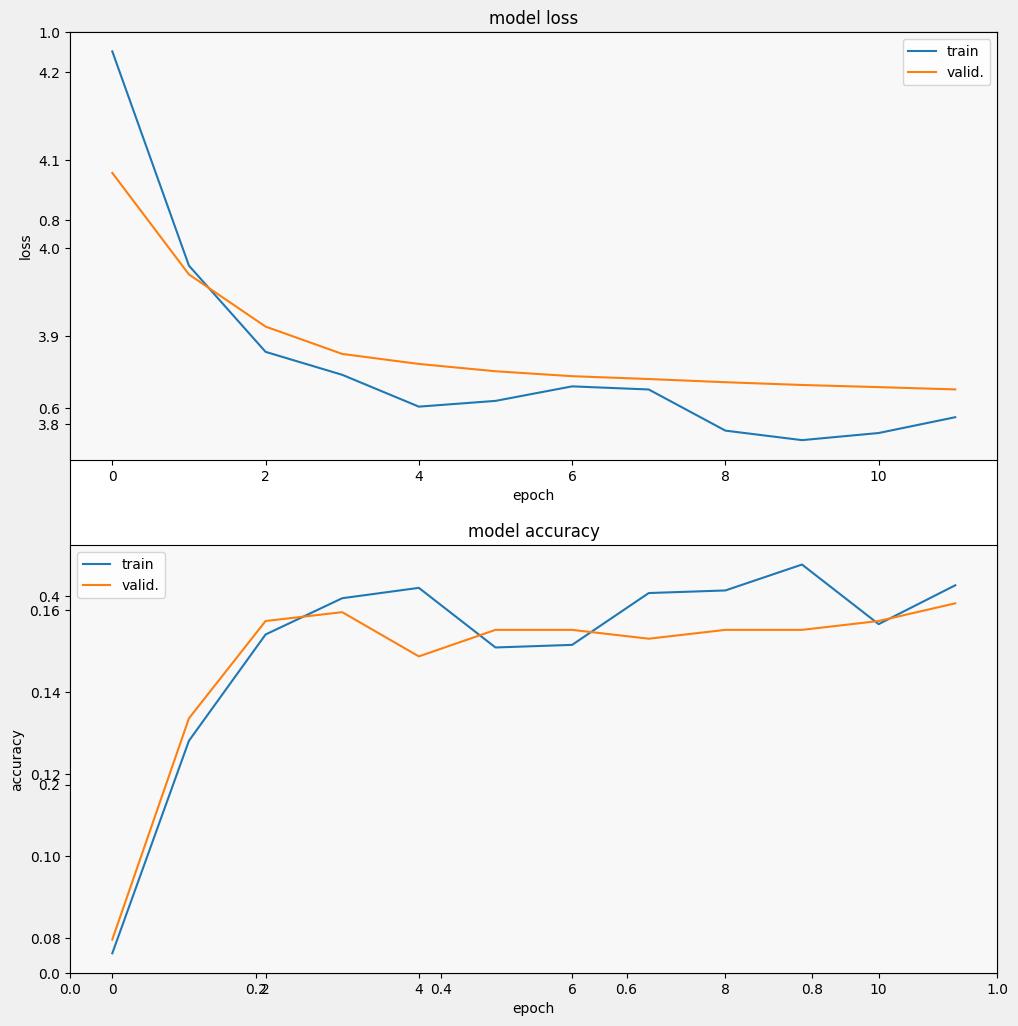

In [16]:
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'loss',
    211,
)
display_training_curves(
    history.history['sparse_categorical_accuracy'],
    history.history['val_sparse_categorical_accuracy'],
    'accuracy',
    212,
)

We like to see the decreasing loss per epoch, this tells us that our model is decreasing. But looking at the model’s accuracy over time, we notice that the validation set accuracy begins to diverge from the training set accuracy in the later epochs, which might make us think that this model is overfitted. To work on this issue we might try a new type of model and work with the hyperparameters to get better results.

# Second Round of Modeling, Hyperparameter Tuning

**Building and Training the Model**

For our second model, we might want to try a different pretrained model. Here, we’ll use Xception, which is a model that is included with Keras.

We want to change a couple of the hyperparameters as well to hopefully see more accuracy in the validation training set. We can change the activation function in the model to ReLU, which should lend itself to faster convergence and add more generalization into the model to hopefully avoid overfitting.

We will continue using Adam as the optimizer and utilizing the custom learning rate function.


In [17]:
## use scope
with strategy.scope():
    ## set model
    pretrained_model2 = tf.keras.applications.Xception(
        weights='imagenet',
        include_top=False ,
        input_shape=[*IMAGE_SIZE, 3]
    )
    pretrained_model.trainable = False

    model2 = tf.keras.Sequential([
        # To a base pretrained on ImageNet to extract features from images...
        pretrained_model2,
        # ... attach a new head to act as a classifier.
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(len(CLASSES), activation='softmax')
    ])

    ## compile model
    model2.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
    )

    STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE

    ## train model
    history2 = model2.fit(
        ds_train,
        validation_data=ds_valid,
        epochs=EPOCHS,
        steps_per_epoch=STEPS_PER_EPOCH,
        callbacks=[lr_callback]
    )

       0/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step

 4202496/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

11427840/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

23764992/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

36118528/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

48578560/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

60702720/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

72884224/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.


Epoch 1/12


2024-06-08 17:35:07.234662: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.


I0000 00:00:1717868111.065236     831 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(ebafc495ed171eda:0:0), session_name()


I0000 00:00:1717868131.211067     831 tpu_compile_op_common.cc:245] Compilation of ebafc495ed171eda:0:0 with session name  took 20.14577777s and succeeded
I0000 00:00:1717868131.283340     831 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(ebafc495ed171eda:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_11112439493571075262", property.function_library_fingerprint = 6080912238269902368, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "16,512,512,3,;16,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1717868131.283391     831 tpu_compilation_cache_interface.cc:541] After adding entry for key e

 1/99 ━━━━━━━━━━━━━━━━━━━━ 2:08:24 79s/step - loss: 4.6887 - sparse_categorical_accuracy: 0.0078

 2/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 641ms/step - loss: 4.6658 - sparse_categorical_accuracy: 0.0195 

 3/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 650ms/step - loss: 4.6426 - sparse_categorical_accuracy: 0.0286

 4/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 655ms/step - loss: 4.6265 - sparse_categorical_accuracy: 0.0347

 5/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 660ms/step - loss: 4.6092 - sparse_categorical_accuracy: 0.0402

 6/99 ━━━━━━━━━━━━━━━━━━━━ 1:01 657ms/step - loss: 4.5929 - sparse_categorical_accuracy: 0.0448

 7/99 ━━━━━━━━━━━━━━━━━━━━ 1:00 656ms/step - loss: 4.5781 - sparse_categorical_accuracy: 0.0491

 8/99 ━━━━━━━━━━━━━━━━━━━━ 59s 652ms/step - loss: 4.5630 - sparse_categorical_accuracy: 0.0526 

 9/99 ━━━━━━━━━━━━━━━━━━━━ 58s 651ms/step - loss: 4.5502 - sparse_categorical_accuracy: 0.0559

10/99 ━━━━━━━━━━━━━━━━━━━━ 58s 654ms/step - loss: 4.5368 - sparse_categorical_accuracy: 0.0598

11/99 ━━━━━━━━━━━━━━━━━━━━ 57s 651ms/step - loss: 4.5226 - sparse_categorical_accuracy: 0.0634

12/99 ━━━━━━━━━━━━━━━━━━━━ 56s 652ms/step - loss: 4.5089 - sparse_categorical_accuracy: 0.0670

13/99 ━━━━━━━━━━━━━━━━━━━━ 55s 650ms/step - loss: 4.4964 - sparse_categorical_accuracy: 0.0702

14/99 ━━━━━━━━━━━━━━━━━━━━ 55s 648ms/step - loss: 4.4843 - sparse_categorical_accuracy: 0.0732

15/99 ━━━━━━━━━━━━━━━━━━━━ 54s 648ms/step - loss: 4.4725 - sparse_categorical_accuracy: 0.0762

16/99 ━━━━━━━━━━━━━━━━━━━━ 53s 649ms/step - loss: 4.4613 - sparse_categorical_accuracy: 0.0790

17/99 ━━━━━━━━━━━━━━━━━━━━ 53s 649ms/step - loss: 4.4500 - sparse_categorical_accuracy: 0.0819

18/99 ━━━━━━━━━━━━━━━━━━━━ 52s 648ms/step - loss: 4.4392 - sparse_categorical_accuracy: 0.0845

19/99 ━━━━━━━━━━━━━━━━━━━━ 51s 647ms/step - loss: 4.4286 - sparse_categorical_accuracy: 0.0871

20/99 ━━━━━━━━━━━━━━━━━━━━ 51s 648ms/step - loss: 4.4186 - sparse_categorical_accuracy: 0.0895

21/99 ━━━━━━━━━━━━━━━━━━━━ 50s 648ms/step - loss: 4.4086 - sparse_categorical_accuracy: 0.0919

22/99 ━━━━━━━━━━━━━━━━━━━━ 49s 648ms/step - loss: 4.3989 - sparse_categorical_accuracy: 0.0942

23/99 ━━━━━━━━━━━━━━━━━━━━ 49s 650ms/step - loss: 4.3891 - sparse_categorical_accuracy: 0.0965

24/99 ━━━━━━━━━━━━━━━━━━━━ 48s 650ms/step - loss: 4.3796 - sparse_categorical_accuracy: 0.0987

25/99 ━━━━━━━━━━━━━━━━━━━━ 48s 649ms/step - loss: 4.3705 - sparse_categorical_accuracy: 0.1007

26/99 ━━━━━━━━━━━━━━━━━━━━ 47s 649ms/step - loss: 4.3614 - sparse_categorical_accuracy: 0.1028

27/99 ━━━━━━━━━━━━━━━━━━━━ 46s 649ms/step - loss: 4.3528 - sparse_categorical_accuracy: 0.1047

28/99 ━━━━━━━━━━━━━━━━━━━━ 46s 649ms/step - loss: 4.3444 - sparse_categorical_accuracy: 0.1066

29/99 ━━━━━━━━━━━━━━━━━━━━ 45s 648ms/step - loss: 4.3359 - sparse_categorical_accuracy: 0.1084

30/99 ━━━━━━━━━━━━━━━━━━━━ 44s 648ms/step - loss: 4.3273 - sparse_categorical_accuracy: 0.1103

31/99 ━━━━━━━━━━━━━━━━━━━━ 44s 649ms/step - loss: 4.3188 - sparse_categorical_accuracy: 0.1122

32/99 ━━━━━━━━━━━━━━━━━━━━ 43s 650ms/step - loss: 4.3104 - sparse_categorical_accuracy: 0.1140

33/99 ━━━━━━━━━━━━━━━━━━━━ 42s 650ms/step - loss: 4.3021 - sparse_categorical_accuracy: 0.1158

34/99 ━━━━━━━━━━━━━━━━━━━━ 42s 651ms/step - loss: 4.2939 - sparse_categorical_accuracy: 0.1175

35/99 ━━━━━━━━━━━━━━━━━━━━ 41s 651ms/step - loss: 4.2858 - sparse_categorical_accuracy: 0.1192

36/99 ━━━━━━━━━━━━━━━━━━━━ 40s 651ms/step - loss: 4.2781 - sparse_categorical_accuracy: 0.1208

37/99 ━━━━━━━━━━━━━━━━━━━━ 40s 651ms/step - loss: 4.2704 - sparse_categorical_accuracy: 0.1225

38/99 ━━━━━━━━━━━━━━━━━━━━ 39s 651ms/step - loss: 4.2629 - sparse_categorical_accuracy: 0.1240

39/99 ━━━━━━━━━━━━━━━━━━━━ 39s 651ms/step - loss: 4.2558 - sparse_categorical_accuracy: 0.1255

40/99 ━━━━━━━━━━━━━━━━━━━━ 38s 652ms/step - loss: 4.2488 - sparse_categorical_accuracy: 0.1270

41/99 ━━━━━━━━━━━━━━━━━━━━ 37s 653ms/step - loss: 4.2420 - sparse_categorical_accuracy: 0.1284

42/99 ━━━━━━━━━━━━━━━━━━━━ 37s 653ms/step - loss: 4.2352 - sparse_categorical_accuracy: 0.1298

43/99 ━━━━━━━━━━━━━━━━━━━━ 36s 653ms/step - loss: 4.2287 - sparse_categorical_accuracy: 0.1311

44/99 ━━━━━━━━━━━━━━━━━━━━ 35s 653ms/step - loss: 4.2221 - sparse_categorical_accuracy: 0.1324

45/99 ━━━━━━━━━━━━━━━━━━━━ 35s 654ms/step - loss: 4.2155 - sparse_categorical_accuracy: 0.1338

46/99 ━━━━━━━━━━━━━━━━━━━━ 34s 654ms/step - loss: 4.2092 - sparse_categorical_accuracy: 0.1351

47/99 ━━━━━━━━━━━━━━━━━━━━ 34s 654ms/step - loss: 4.2029 - sparse_categorical_accuracy: 0.1364

48/99 ━━━━━━━━━━━━━━━━━━━━ 33s 654ms/step - loss: 4.1966 - sparse_categorical_accuracy: 0.1376

49/99 ━━━━━━━━━━━━━━━━━━━━ 32s 654ms/step - loss: 4.1904 - sparse_categorical_accuracy: 0.1389

50/99 ━━━━━━━━━━━━━━━━━━━━ 32s 654ms/step - loss: 4.1842 - sparse_categorical_accuracy: 0.1401

51/99 ━━━━━━━━━━━━━━━━━━━━ 31s 654ms/step - loss: 4.1781 - sparse_categorical_accuracy: 0.1413

52/99 ━━━━━━━━━━━━━━━━━━━━ 30s 654ms/step - loss: 4.1721 - sparse_categorical_accuracy: 0.1425

53/99 ━━━━━━━━━━━━━━━━━━━━ 30s 654ms/step - loss: 4.1661 - sparse_categorical_accuracy: 0.1436

54/99 ━━━━━━━━━━━━━━━━━━━━ 29s 654ms/step - loss: 4.1601 - sparse_categorical_accuracy: 0.1447

55/99 ━━━━━━━━━━━━━━━━━━━━ 28s 654ms/step - loss: 4.1542 - sparse_categorical_accuracy: 0.1459

56/99 ━━━━━━━━━━━━━━━━━━━━ 28s 653ms/step - loss: 4.1484 - sparse_categorical_accuracy: 0.1469

57/99 ━━━━━━━━━━━━━━━━━━━━ 27s 653ms/step - loss: 4.1426 - sparse_categorical_accuracy: 0.1480

58/99 ━━━━━━━━━━━━━━━━━━━━ 26s 654ms/step - loss: 4.1370 - sparse_categorical_accuracy: 0.1491

59/99 ━━━━━━━━━━━━━━━━━━━━ 26s 654ms/step - loss: 4.1314 - sparse_categorical_accuracy: 0.1501

60/99 ━━━━━━━━━━━━━━━━━━━━ 25s 653ms/step - loss: 4.1258 - sparse_categorical_accuracy: 0.1511

61/99 ━━━━━━━━━━━━━━━━━━━━ 24s 653ms/step - loss: 4.1203 - sparse_categorical_accuracy: 0.1521

62/99 ━━━━━━━━━━━━━━━━━━━━ 24s 654ms/step - loss: 4.1149 - sparse_categorical_accuracy: 0.1531

63/99 ━━━━━━━━━━━━━━━━━━━━ 23s 654ms/step - loss: 4.1095 - sparse_categorical_accuracy: 0.1541

64/99 ━━━━━━━━━━━━━━━━━━━━ 22s 654ms/step - loss: 4.1042 - sparse_categorical_accuracy: 0.1551

65/99 ━━━━━━━━━━━━━━━━━━━━ 22s 654ms/step - loss: 4.0989 - sparse_categorical_accuracy: 0.1561

66/99 ━━━━━━━━━━━━━━━━━━━━ 21s 654ms/step - loss: 4.0936 - sparse_categorical_accuracy: 0.1570

67/99 ━━━━━━━━━━━━━━━━━━━━ 20s 654ms/step - loss: 4.0884 - sparse_categorical_accuracy: 0.1580

68/99 ━━━━━━━━━━━━━━━━━━━━ 20s 654ms/step - loss: 4.0833 - sparse_categorical_accuracy: 0.1589

69/99 ━━━━━━━━━━━━━━━━━━━━ 19s 654ms/step - loss: 4.0782 - sparse_categorical_accuracy: 0.1599

70/99 ━━━━━━━━━━━━━━━━━━━━ 18s 655ms/step - loss: 4.0731 - sparse_categorical_accuracy: 0.1608

71/99 ━━━━━━━━━━━━━━━━━━━━ 18s 655ms/step - loss: 4.0681 - sparse_categorical_accuracy: 0.1617

72/99 ━━━━━━━━━━━━━━━━━━━━ 17s 655ms/step - loss: 4.0632 - sparse_categorical_accuracy: 0.1626

73/99 ━━━━━━━━━━━━━━━━━━━━ 17s 655ms/step - loss: 4.0583 - sparse_categorical_accuracy: 0.1635

74/99 ━━━━━━━━━━━━━━━━━━━━ 16s 655ms/step - loss: 4.0534 - sparse_categorical_accuracy: 0.1643

75/99 ━━━━━━━━━━━━━━━━━━━━ 15s 655ms/step - loss: 4.0485 - sparse_categorical_accuracy: 0.1652

76/99 ━━━━━━━━━━━━━━━━━━━━ 15s 655ms/step - loss: 4.0437 - sparse_categorical_accuracy: 0.1661

77/99 ━━━━━━━━━━━━━━━━━━━━ 14s 655ms/step - loss: 4.0389 - sparse_categorical_accuracy: 0.1669

78/99 ━━━━━━━━━━━━━━━━━━━━ 13s 655ms/step - loss: 4.0341 - sparse_categorical_accuracy: 0.1678

79/99 ━━━━━━━━━━━━━━━━━━━━ 13s 655ms/step - loss: 4.0294 - sparse_categorical_accuracy: 0.1686

80/99 ━━━━━━━━━━━━━━━━━━━━ 12s 655ms/step - loss: 4.0248 - sparse_categorical_accuracy: 0.1694

81/99 ━━━━━━━━━━━━━━━━━━━━ 11s 655ms/step - loss: 4.0202 - sparse_categorical_accuracy: 0.1703

82/99 ━━━━━━━━━━━━━━━━━━━━ 11s 654ms/step - loss: 4.0157 - sparse_categorical_accuracy: 0.1711

83/99 ━━━━━━━━━━━━━━━━━━━━ 10s 654ms/step - loss: 4.0112 - sparse_categorical_accuracy: 0.1718

84/99 ━━━━━━━━━━━━━━━━━━━━ 9s 654ms/step - loss: 4.0067 - sparse_categorical_accuracy: 0.1726 

85/99 ━━━━━━━━━━━━━━━━━━━━ 9s 654ms/step - loss: 4.0023 - sparse_categorical_accuracy: 0.1734

86/99 ━━━━━━━━━━━━━━━━━━━━ 8s 654ms/step - loss: 3.9978 - sparse_categorical_accuracy: 0.1742

87/99 ━━━━━━━━━━━━━━━━━━━━ 7s 654ms/step - loss: 3.9935 - sparse_categorical_accuracy: 0.1749

88/99 ━━━━━━━━━━━━━━━━━━━━ 7s 654ms/step - loss: 3.9891 - sparse_categorical_accuracy: 0.1757

89/99 ━━━━━━━━━━━━━━━━━━━━ 6s 654ms/step - loss: 3.9848 - sparse_categorical_accuracy: 0.1764

90/99 ━━━━━━━━━━━━━━━━━━━━ 5s 653ms/step - loss: 3.9805 - sparse_categorical_accuracy: 0.1772

91/99 ━━━━━━━━━━━━━━━━━━━━ 5s 654ms/step - loss: 3.9762 - sparse_categorical_accuracy: 0.1779

92/99 ━━━━━━━━━━━━━━━━━━━━ 4s 654ms/step - loss: 3.9720 - sparse_categorical_accuracy: 0.1787

93/99 ━━━━━━━━━━━━━━━━━━━━ 3s 654ms/step - loss: 3.9678 - sparse_categorical_accuracy: 0.1794

94/99 ━━━━━━━━━━━━━━━━━━━━ 3s 654ms/step - loss: 3.9637 - sparse_categorical_accuracy: 0.1801

95/99 ━━━━━━━━━━━━━━━━━━━━ 2s 654ms/step - loss: 3.9596 - sparse_categorical_accuracy: 0.1808

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step - loss: 3.9555 - sparse_categorical_accuracy: 0.1815

97/99 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step - loss: 3.9515 - sparse_categorical_accuracy: 0.1822

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 654ms/step - loss: 3.9475 - sparse_categorical_accuracy: 0.1829

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 654ms/step - loss: 3.9435 - sparse_categorical_accuracy: 0.1836

2024-06-08 17:36:39.240857: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignVariableOp.


I0000 00:00:1717868200.043052     863 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(6e4b87fd13e8f83e:0:0), session_name()


I0000 00:00:1717868206.938280     863 tpu_compile_op_common.cc:245] Compilation of 6e4b87fd13e8f83e:0:0 with session name  took 6.89517607s and succeeded
I0000 00:00:1717868206.950972     863 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(6e4b87fd13e8f83e:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_6414216580925173291", property.function_library_fingerprint = 14437813587767441184, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "16,512,512,3,;16,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1717868206.951014     863 tpu_compilation_cache_interface.cc:541] After adding entry for key 6e

99/99 ━━━━━━━━━━━━━━━━━━━━ 165s 878ms/step - loss: 3.9378 - sparse_categorical_accuracy: 0.1847 - val_loss: 4.6036 - val_sparse_categorical_accuracy: 0.2328 - learning_rate: 0.0010



Epoch 2: LearningRateScheduler setting learning rate to 0.0008100000379979611.


Epoch 2/12


 1/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 641ms/step - loss: 3.1131 - sparse_categorical_accuracy: 0.3281

 2/99 ━━━━━━━━━━━━━━━━━━━━ 1:01 630ms/step - loss: 3.0655 - sparse_categorical_accuracy: 0.3223

 3/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 652ms/step - loss: 3.0392 - sparse_categorical_accuracy: 0.3234

 4/99 ━━━━━━━━━━━━━━━━━━━━ 1:01 646ms/step - loss: 3.0150 - sparse_categorical_accuracy: 0.3255

 5/99 ━━━━━━━━━━━━━━━━━━━━ 1:01 654ms/step - loss: 2.9937 - sparse_categorical_accuracy: 0.3276

 6/99 ━━━━━━━━━━━━━━━━━━━━ 1:00 654ms/step - loss: 2.9752 - sparse_categorical_accuracy: 0.3309

 7/99 ━━━━━━━━━━━━━━━━━━━━ 1:00 653ms/step - loss: 2.9588 - sparse_categorical_accuracy: 0.3339

 8/99 ━━━━━━━━━━━━━━━━━━━━ 59s 652ms/step - loss: 2.9447 - sparse_categorical_accuracy: 0.3361 

 9/99 ━━━━━━━━━━━━━━━━━━━━ 58s 651ms/step - loss: 2.9344 - sparse_categorical_accuracy: 0.3376

10/99 ━━━━━━━━━━━━━━━━━━━━ 58s 652ms/step - loss: 2.9247 - sparse_categorical_accuracy: 0.3396

11/99 ━━━━━━━━━━━━━━━━━━━━ 57s 654ms/step - loss: 2.9151 - sparse_categorical_accuracy: 0.3413

12/99 ━━━━━━━━━━━━━━━━━━━━ 56s 654ms/step - loss: 2.9083 - sparse_categorical_accuracy: 0.3426

13/99 ━━━━━━━━━━━━━━━━━━━━ 56s 653ms/step - loss: 2.9023 - sparse_categorical_accuracy: 0.3439

14/99 ━━━━━━━━━━━━━━━━━━━━ 55s 652ms/step - loss: 2.8956 - sparse_categorical_accuracy: 0.3452

15/99 ━━━━━━━━━━━━━━━━━━━━ 54s 652ms/step - loss: 2.8890 - sparse_categorical_accuracy: 0.3465

16/99 ━━━━━━━━━━━━━━━━━━━━ 54s 651ms/step - loss: 2.8833 - sparse_categorical_accuracy: 0.3477

17/99 ━━━━━━━━━━━━━━━━━━━━ 53s 651ms/step - loss: 2.8786 - sparse_categorical_accuracy: 0.3488

18/99 ━━━━━━━━━━━━━━━━━━━━ 52s 653ms/step - loss: 2.8739 - sparse_categorical_accuracy: 0.3498

19/99 ━━━━━━━━━━━━━━━━━━━━ 52s 653ms/step - loss: 2.8692 - sparse_categorical_accuracy: 0.3509

20/99 ━━━━━━━━━━━━━━━━━━━━ 51s 652ms/step - loss: 2.8653 - sparse_categorical_accuracy: 0.3519

21/99 ━━━━━━━━━━━━━━━━━━━━ 50s 653ms/step - loss: 2.8610 - sparse_categorical_accuracy: 0.3530

22/99 ━━━━━━━━━━━━━━━━━━━━ 50s 654ms/step - loss: 2.8575 - sparse_categorical_accuracy: 0.3540

23/99 ━━━━━━━━━━━━━━━━━━━━ 49s 653ms/step - loss: 2.8541 - sparse_categorical_accuracy: 0.3549

24/99 ━━━━━━━━━━━━━━━━━━━━ 48s 653ms/step - loss: 2.8510 - sparse_categorical_accuracy: 0.3557

25/99 ━━━━━━━━━━━━━━━━━━━━ 48s 653ms/step - loss: 2.8483 - sparse_categorical_accuracy: 0.3563

26/99 ━━━━━━━━━━━━━━━━━━━━ 47s 653ms/step - loss: 2.8452 - sparse_categorical_accuracy: 0.3570

27/99 ━━━━━━━━━━━━━━━━━━━━ 46s 653ms/step - loss: 2.8421 - sparse_categorical_accuracy: 0.3578

28/99 ━━━━━━━━━━━━━━━━━━━━ 46s 652ms/step - loss: 2.8388 - sparse_categorical_accuracy: 0.3586

29/99 ━━━━━━━━━━━━━━━━━━━━ 45s 651ms/step - loss: 2.8356 - sparse_categorical_accuracy: 0.3593

30/99 ━━━━━━━━━━━━━━━━━━━━ 45s 652ms/step - loss: 2.8323 - sparse_categorical_accuracy: 0.3601

31/99 ━━━━━━━━━━━━━━━━━━━━ 44s 652ms/step - loss: 2.8291 - sparse_categorical_accuracy: 0.3609

32/99 ━━━━━━━━━━━━━━━━━━━━ 43s 652ms/step - loss: 2.8259 - sparse_categorical_accuracy: 0.3617

33/99 ━━━━━━━━━━━━━━━━━━━━ 43s 652ms/step - loss: 2.8227 - sparse_categorical_accuracy: 0.3625

34/99 ━━━━━━━━━━━━━━━━━━━━ 42s 652ms/step - loss: 2.8197 - sparse_categorical_accuracy: 0.3632

35/99 ━━━━━━━━━━━━━━━━━━━━ 41s 652ms/step - loss: 2.8167 - sparse_categorical_accuracy: 0.3640

36/99 ━━━━━━━━━━━━━━━━━━━━ 41s 654ms/step - loss: 2.8136 - sparse_categorical_accuracy: 0.3647

37/99 ━━━━━━━━━━━━━━━━━━━━ 40s 654ms/step - loss: 2.8105 - sparse_categorical_accuracy: 0.3654

38/99 ━━━━━━━━━━━━━━━━━━━━ 39s 653ms/step - loss: 2.8076 - sparse_categorical_accuracy: 0.3661

39/99 ━━━━━━━━━━━━━━━━━━━━ 39s 653ms/step - loss: 2.8046 - sparse_categorical_accuracy: 0.3667

40/99 ━━━━━━━━━━━━━━━━━━━━ 38s 654ms/step - loss: 2.8017 - sparse_categorical_accuracy: 0.3673

41/99 ━━━━━━━━━━━━━━━━━━━━ 37s 654ms/step - loss: 2.7986 - sparse_categorical_accuracy: 0.3680

42/99 ━━━━━━━━━━━━━━━━━━━━ 37s 654ms/step - loss: 2.7958 - sparse_categorical_accuracy: 0.3687

43/99 ━━━━━━━━━━━━━━━━━━━━ 36s 654ms/step - loss: 2.7929 - sparse_categorical_accuracy: 0.3693

44/99 ━━━━━━━━━━━━━━━━━━━━ 35s 654ms/step - loss: 2.7902 - sparse_categorical_accuracy: 0.3699

45/99 ━━━━━━━━━━━━━━━━━━━━ 35s 655ms/step - loss: 2.7874 - sparse_categorical_accuracy: 0.3705

46/99 ━━━━━━━━━━━━━━━━━━━━ 34s 655ms/step - loss: 2.7847 - sparse_categorical_accuracy: 0.3710

47/99 ━━━━━━━━━━━━━━━━━━━━ 34s 656ms/step - loss: 2.7821 - sparse_categorical_accuracy: 0.3715

48/99 ━━━━━━━━━━━━━━━━━━━━ 33s 655ms/step - loss: 2.7797 - sparse_categorical_accuracy: 0.3721

49/99 ━━━━━━━━━━━━━━━━━━━━ 32s 655ms/step - loss: 2.7772 - sparse_categorical_accuracy: 0.3726

50/99 ━━━━━━━━━━━━━━━━━━━━ 32s 655ms/step - loss: 2.7749 - sparse_categorical_accuracy: 0.3730

51/99 ━━━━━━━━━━━━━━━━━━━━ 31s 655ms/step - loss: 2.7726 - sparse_categorical_accuracy: 0.3735

52/99 ━━━━━━━━━━━━━━━━━━━━ 30s 655ms/step - loss: 2.7701 - sparse_categorical_accuracy: 0.3740

53/99 ━━━━━━━━━━━━━━━━━━━━ 30s 655ms/step - loss: 2.7677 - sparse_categorical_accuracy: 0.3745

54/99 ━━━━━━━━━━━━━━━━━━━━ 29s 655ms/step - loss: 2.7654 - sparse_categorical_accuracy: 0.3750

55/99 ━━━━━━━━━━━━━━━━━━━━ 28s 656ms/step - loss: 2.7631 - sparse_categorical_accuracy: 0.3755

56/99 ━━━━━━━━━━━━━━━━━━━━ 28s 656ms/step - loss: 2.7608 - sparse_categorical_accuracy: 0.3760

57/99 ━━━━━━━━━━━━━━━━━━━━ 27s 656ms/step - loss: 2.7584 - sparse_categorical_accuracy: 0.3765

58/99 ━━━━━━━━━━━━━━━━━━━━ 26s 656ms/step - loss: 2.7561 - sparse_categorical_accuracy: 0.3770

59/99 ━━━━━━━━━━━━━━━━━━━━ 26s 656ms/step - loss: 2.7537 - sparse_categorical_accuracy: 0.3775

60/99 ━━━━━━━━━━━━━━━━━━━━ 25s 656ms/step - loss: 2.7513 - sparse_categorical_accuracy: 0.3780

61/99 ━━━━━━━━━━━━━━━━━━━━ 24s 656ms/step - loss: 2.7489 - sparse_categorical_accuracy: 0.3785

62/99 ━━━━━━━━━━━━━━━━━━━━ 24s 656ms/step - loss: 2.7465 - sparse_categorical_accuracy: 0.3790

63/99 ━━━━━━━━━━━━━━━━━━━━ 23s 656ms/step - loss: 2.7441 - sparse_categorical_accuracy: 0.3796

64/99 ━━━━━━━━━━━━━━━━━━━━ 22s 657ms/step - loss: 2.7417 - sparse_categorical_accuracy: 0.3801

65/99 ━━━━━━━━━━━━━━━━━━━━ 22s 656ms/step - loss: 2.7395 - sparse_categorical_accuracy: 0.3806

66/99 ━━━━━━━━━━━━━━━━━━━━ 21s 656ms/step - loss: 2.7372 - sparse_categorical_accuracy: 0.3810

67/99 ━━━━━━━━━━━━━━━━━━━━ 20s 656ms/step - loss: 2.7349 - sparse_categorical_accuracy: 0.3815

68/99 ━━━━━━━━━━━━━━━━━━━━ 20s 656ms/step - loss: 2.7326 - sparse_categorical_accuracy: 0.3820

69/99 ━━━━━━━━━━━━━━━━━━━━ 19s 656ms/step - loss: 2.7304 - sparse_categorical_accuracy: 0.3825

70/99 ━━━━━━━━━━━━━━━━━━━━ 19s 656ms/step - loss: 2.7281 - sparse_categorical_accuracy: 0.3830

71/99 ━━━━━━━━━━━━━━━━━━━━ 18s 656ms/step - loss: 2.7258 - sparse_categorical_accuracy: 0.3835

72/99 ━━━━━━━━━━━━━━━━━━━━ 17s 656ms/step - loss: 2.7236 - sparse_categorical_accuracy: 0.3840

73/99 ━━━━━━━━━━━━━━━━━━━━ 17s 656ms/step - loss: 2.7213 - sparse_categorical_accuracy: 0.3845

74/99 ━━━━━━━━━━━━━━━━━━━━ 16s 655ms/step - loss: 2.7191 - sparse_categorical_accuracy: 0.3850

75/99 ━━━━━━━━━━━━━━━━━━━━ 15s 655ms/step - loss: 2.7169 - sparse_categorical_accuracy: 0.3854

76/99 ━━━━━━━━━━━━━━━━━━━━ 15s 656ms/step - loss: 2.7147 - sparse_categorical_accuracy: 0.3859

77/99 ━━━━━━━━━━━━━━━━━━━━ 14s 656ms/step - loss: 2.7125 - sparse_categorical_accuracy: 0.3864

78/99 ━━━━━━━━━━━━━━━━━━━━ 13s 656ms/step - loss: 2.7103 - sparse_categorical_accuracy: 0.3868

79/99 ━━━━━━━━━━━━━━━━━━━━ 13s 656ms/step - loss: 2.7081 - sparse_categorical_accuracy: 0.3873

80/99 ━━━━━━━━━━━━━━━━━━━━ 12s 657ms/step - loss: 2.7060 - sparse_categorical_accuracy: 0.3878

81/99 ━━━━━━━━━━━━━━━━━━━━ 11s 657ms/step - loss: 2.7038 - sparse_categorical_accuracy: 0.3882

82/99 ━━━━━━━━━━━━━━━━━━━━ 11s 657ms/step - loss: 2.7016 - sparse_categorical_accuracy: 0.3887

83/99 ━━━━━━━━━━━━━━━━━━━━ 10s 657ms/step - loss: 2.6994 - sparse_categorical_accuracy: 0.3891

84/99 ━━━━━━━━━━━━━━━━━━━━ 9s 657ms/step - loss: 2.6973 - sparse_categorical_accuracy: 0.3895 

85/99 ━━━━━━━━━━━━━━━━━━━━ 9s 657ms/step - loss: 2.6952 - sparse_categorical_accuracy: 0.3900

86/99 ━━━━━━━━━━━━━━━━━━━━ 8s 657ms/step - loss: 2.6931 - sparse_categorical_accuracy: 0.3904

87/99 ━━━━━━━━━━━━━━━━━━━━ 7s 657ms/step - loss: 2.6910 - sparse_categorical_accuracy: 0.3908

88/99 ━━━━━━━━━━━━━━━━━━━━ 7s 657ms/step - loss: 2.6889 - sparse_categorical_accuracy: 0.3913

89/99 ━━━━━━━━━━━━━━━━━━━━ 6s 657ms/step - loss: 2.6868 - sparse_categorical_accuracy: 0.3917

90/99 ━━━━━━━━━━━━━━━━━━━━ 5s 657ms/step - loss: 2.6847 - sparse_categorical_accuracy: 0.3921

91/99 ━━━━━━━━━━━━━━━━━━━━ 5s 657ms/step - loss: 2.6825 - sparse_categorical_accuracy: 0.3926

92/99 ━━━━━━━━━━━━━━━━━━━━ 4s 657ms/step - loss: 2.6804 - sparse_categorical_accuracy: 0.3930

93/99 ━━━━━━━━━━━━━━━━━━━━ 3s 657ms/step - loss: 2.6782 - sparse_categorical_accuracy: 0.3935

94/99 ━━━━━━━━━━━━━━━━━━━━ 3s 657ms/step - loss: 2.6761 - sparse_categorical_accuracy: 0.3939

95/99 ━━━━━━━━━━━━━━━━━━━━ 2s 657ms/step - loss: 2.6741 - sparse_categorical_accuracy: 0.3943

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step - loss: 2.6720 - sparse_categorical_accuracy: 0.3947

97/99 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step - loss: 2.6699 - sparse_categorical_accuracy: 0.3951

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - loss: 2.6679 - sparse_categorical_accuracy: 0.3955

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - loss: 2.6659 - sparse_categorical_accuracy: 0.3959

99/99 ━━━━━━━━━━━━━━━━━━━━ 77s 776ms/step - loss: 2.6599 - sparse_categorical_accuracy: 0.3970 - val_loss: 3.2418 - val_sparse_categorical_accuracy: 0.3922 - learning_rate: 8.1000e-04



Epoch 3: LearningRateScheduler setting learning rate to 0.0005060000335611404.


Epoch 3/12


 1/99 ━━━━━━━━━━━━━━━━━━━━ 1:05 663ms/step - loss: 2.2199 - sparse_categorical_accuracy: 0.5234

 2/99 ━━━━━━━━━━━━━━━━━━━━ 1:03 659ms/step - loss: 2.2486 - sparse_categorical_accuracy: 0.5078

 3/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 649ms/step - loss: 2.2320 - sparse_categorical_accuracy: 0.5061

 4/99 ━━━━━━━━━━━━━━━━━━━━ 1:01 644ms/step - loss: 2.2141 - sparse_categorical_accuracy: 0.5041

 5/99 ━━━━━━━━━━━━━━━━━━━━ 1:00 647ms/step - loss: 2.1952 - sparse_categorical_accuracy: 0.5042

 6/99 ━━━━━━━━━━━━━━━━━━━━ 59s 643ms/step - loss: 2.1804 - sparse_categorical_accuracy: 0.5035 

 7/99 ━━━━━━━━━━━━━━━━━━━━ 59s 646ms/step - loss: 2.1681 - sparse_categorical_accuracy: 0.5028

 8/99 ━━━━━━━━━━━━━━━━━━━━ 58s 647ms/step - loss: 2.1596 - sparse_categorical_accuracy: 0.5017

 9/99 ━━━━━━━━━━━━━━━━━━━━ 58s 646ms/step - loss: 2.1516 - sparse_categorical_accuracy: 0.5014

10/99 ━━━━━━━━━━━━━━━━━━━━ 57s 646ms/step - loss: 2.1436 - sparse_categorical_accuracy: 0.5014

11/99 ━━━━━━━━━━━━━━━━━━━━ 57s 648ms/step - loss: 2.1348 - sparse_categorical_accuracy: 0.5018

12/99 ━━━━━━━━━━━━━━━━━━━━ 56s 648ms/step - loss: 2.1258 - sparse_categorical_accuracy: 0.5025

13/99 ━━━━━━━━━━━━━━━━━━━━ 55s 649ms/step - loss: 2.1176 - sparse_categorical_accuracy: 0.5038

14/99 ━━━━━━━━━━━━━━━━━━━━ 55s 649ms/step - loss: 2.1110 - sparse_categorical_accuracy: 0.5047

15/99 ━━━━━━━━━━━━━━━━━━━━ 54s 648ms/step - loss: 2.1050 - sparse_categorical_accuracy: 0.5055

16/99 ━━━━━━━━━━━━━━━━━━━━ 53s 648ms/step - loss: 2.0991 - sparse_categorical_accuracy: 0.5062

17/99 ━━━━━━━━━━━━━━━━━━━━ 53s 647ms/step - loss: 2.0931 - sparse_categorical_accuracy: 0.5069

18/99 ━━━━━━━━━━━━━━━━━━━━ 52s 648ms/step - loss: 2.0877 - sparse_categorical_accuracy: 0.5076

19/99 ━━━━━━━━━━━━━━━━━━━━ 51s 648ms/step - loss: 2.0826 - sparse_categorical_accuracy: 0.5083

20/99 ━━━━━━━━━━━━━━━━━━━━ 51s 649ms/step - loss: 2.0785 - sparse_categorical_accuracy: 0.5090

21/99 ━━━━━━━━━━━━━━━━━━━━ 50s 649ms/step - loss: 2.0749 - sparse_categorical_accuracy: 0.5097

22/99 ━━━━━━━━━━━━━━━━━━━━ 50s 650ms/step - loss: 2.0714 - sparse_categorical_accuracy: 0.5104

23/99 ━━━━━━━━━━━━━━━━━━━━ 49s 650ms/step - loss: 2.0679 - sparse_categorical_accuracy: 0.5112

24/99 ━━━━━━━━━━━━━━━━━━━━ 48s 651ms/step - loss: 2.0647 - sparse_categorical_accuracy: 0.5119

25/99 ━━━━━━━━━━━━━━━━━━━━ 48s 651ms/step - loss: 2.0614 - sparse_categorical_accuracy: 0.5127

26/99 ━━━━━━━━━━━━━━━━━━━━ 47s 651ms/step - loss: 2.0583 - sparse_categorical_accuracy: 0.5134

27/99 ━━━━━━━━━━━━━━━━━━━━ 46s 650ms/step - loss: 2.0555 - sparse_categorical_accuracy: 0.5140

28/99 ━━━━━━━━━━━━━━━━━━━━ 46s 651ms/step - loss: 2.0528 - sparse_categorical_accuracy: 0.5146

29/99 ━━━━━━━━━━━━━━━━━━━━ 45s 651ms/step - loss: 2.0503 - sparse_categorical_accuracy: 0.5151

30/99 ━━━━━━━━━━━━━━━━━━━━ 44s 652ms/step - loss: 2.0477 - sparse_categorical_accuracy: 0.5157

31/99 ━━━━━━━━━━━━━━━━━━━━ 44s 652ms/step - loss: 2.0452 - sparse_categorical_accuracy: 0.5163

32/99 ━━━━━━━━━━━━━━━━━━━━ 43s 652ms/step - loss: 2.0426 - sparse_categorical_accuracy: 0.5169

33/99 ━━━━━━━━━━━━━━━━━━━━ 43s 652ms/step - loss: 2.0399 - sparse_categorical_accuracy: 0.5176

34/99 ━━━━━━━━━━━━━━━━━━━━ 42s 652ms/step - loss: 2.0371 - sparse_categorical_accuracy: 0.5182

35/99 ━━━━━━━━━━━━━━━━━━━━ 41s 652ms/step - loss: 2.0344 - sparse_categorical_accuracy: 0.5189

36/99 ━━━━━━━━━━━━━━━━━━━━ 41s 651ms/step - loss: 2.0315 - sparse_categorical_accuracy: 0.5196

37/99 ━━━━━━━━━━━━━━━━━━━━ 40s 652ms/step - loss: 2.0287 - sparse_categorical_accuracy: 0.5203

38/99 ━━━━━━━━━━━━━━━━━━━━ 39s 652ms/step - loss: 2.0261 - sparse_categorical_accuracy: 0.5209

39/99 ━━━━━━━━━━━━━━━━━━━━ 39s 652ms/step - loss: 2.0236 - sparse_categorical_accuracy: 0.5214

40/99 ━━━━━━━━━━━━━━━━━━━━ 38s 653ms/step - loss: 2.0213 - sparse_categorical_accuracy: 0.5220

41/99 ━━━━━━━━━━━━━━━━━━━━ 37s 652ms/step - loss: 2.0189 - sparse_categorical_accuracy: 0.5226

42/99 ━━━━━━━━━━━━━━━━━━━━ 37s 652ms/step - loss: 2.0164 - sparse_categorical_accuracy: 0.5232

43/99 ━━━━━━━━━━━━━━━━━━━━ 36s 652ms/step - loss: 2.0140 - sparse_categorical_accuracy: 0.5237

44/99 ━━━━━━━━━━━━━━━━━━━━ 35s 652ms/step - loss: 2.0115 - sparse_categorical_accuracy: 0.5242

45/99 ━━━━━━━━━━━━━━━━━━━━ 35s 653ms/step - loss: 2.0090 - sparse_categorical_accuracy: 0.5248

46/99 ━━━━━━━━━━━━━━━━━━━━ 34s 654ms/step - loss: 2.0065 - sparse_categorical_accuracy: 0.5253

47/99 ━━━━━━━━━━━━━━━━━━━━ 33s 653ms/step - loss: 2.0040 - sparse_categorical_accuracy: 0.5258

48/99 ━━━━━━━━━━━━━━━━━━━━ 33s 653ms/step - loss: 2.0017 - sparse_categorical_accuracy: 0.5263

49/99 ━━━━━━━━━━━━━━━━━━━━ 32s 654ms/step - loss: 1.9993 - sparse_categorical_accuracy: 0.5269

50/99 ━━━━━━━━━━━━━━━━━━━━ 32s 654ms/step - loss: 1.9969 - sparse_categorical_accuracy: 0.5274

51/99 ━━━━━━━━━━━━━━━━━━━━ 31s 654ms/step - loss: 1.9945 - sparse_categorical_accuracy: 0.5280

52/99 ━━━━━━━━━━━━━━━━━━━━ 30s 654ms/step - loss: 1.9922 - sparse_categorical_accuracy: 0.5285

53/99 ━━━━━━━━━━━━━━━━━━━━ 30s 653ms/step - loss: 1.9898 - sparse_categorical_accuracy: 0.5291

54/99 ━━━━━━━━━━━━━━━━━━━━ 29s 653ms/step - loss: 1.9875 - sparse_categorical_accuracy: 0.5296

55/99 ━━━━━━━━━━━━━━━━━━━━ 28s 653ms/step - loss: 1.9854 - sparse_categorical_accuracy: 0.5301

56/99 ━━━━━━━━━━━━━━━━━━━━ 28s 654ms/step - loss: 1.9833 - sparse_categorical_accuracy: 0.5306

57/99 ━━━━━━━━━━━━━━━━━━━━ 27s 654ms/step - loss: 1.9812 - sparse_categorical_accuracy: 0.5311

58/99 ━━━━━━━━━━━━━━━━━━━━ 26s 654ms/step - loss: 1.9792 - sparse_categorical_accuracy: 0.5316

59/99 ━━━━━━━━━━━━━━━━━━━━ 26s 654ms/step - loss: 1.9771 - sparse_categorical_accuracy: 0.5320

60/99 ━━━━━━━━━━━━━━━━━━━━ 25s 654ms/step - loss: 1.9751 - sparse_categorical_accuracy: 0.5325

61/99 ━━━━━━━━━━━━━━━━━━━━ 24s 654ms/step - loss: 1.9730 - sparse_categorical_accuracy: 0.5330

62/99 ━━━━━━━━━━━━━━━━━━━━ 24s 654ms/step - loss: 1.9710 - sparse_categorical_accuracy: 0.5335

63/99 ━━━━━━━━━━━━━━━━━━━━ 23s 654ms/step - loss: 1.9689 - sparse_categorical_accuracy: 0.5339

64/99 ━━━━━━━━━━━━━━━━━━━━ 22s 654ms/step - loss: 1.9669 - sparse_categorical_accuracy: 0.5344

65/99 ━━━━━━━━━━━━━━━━━━━━ 22s 654ms/step - loss: 1.9649 - sparse_categorical_accuracy: 0.5349

66/99 ━━━━━━━━━━━━━━━━━━━━ 21s 654ms/step - loss: 1.9629 - sparse_categorical_accuracy: 0.5353

67/99 ━━━━━━━━━━━━━━━━━━━━ 20s 654ms/step - loss: 1.9609 - sparse_categorical_accuracy: 0.5357

68/99 ━━━━━━━━━━━━━━━━━━━━ 20s 654ms/step - loss: 1.9590 - sparse_categorical_accuracy: 0.5362

69/99 ━━━━━━━━━━━━━━━━━━━━ 19s 654ms/step - loss: 1.9570 - sparse_categorical_accuracy: 0.5366

70/99 ━━━━━━━━━━━━━━━━━━━━ 18s 654ms/step - loss: 1.9551 - sparse_categorical_accuracy: 0.5371

71/99 ━━━━━━━━━━━━━━━━━━━━ 18s 654ms/step - loss: 1.9532 - sparse_categorical_accuracy: 0.5375

72/99 ━━━━━━━━━━━━━━━━━━━━ 17s 654ms/step - loss: 1.9513 - sparse_categorical_accuracy: 0.5379

73/99 ━━━━━━━━━━━━━━━━━━━━ 17s 654ms/step - loss: 1.9495 - sparse_categorical_accuracy: 0.5383

74/99 ━━━━━━━━━━━━━━━━━━━━ 16s 655ms/step - loss: 1.9477 - sparse_categorical_accuracy: 0.5387

75/99 ━━━━━━━━━━━━━━━━━━━━ 15s 654ms/step - loss: 1.9460 - sparse_categorical_accuracy: 0.5391

76/99 ━━━━━━━━━━━━━━━━━━━━ 15s 654ms/step - loss: 1.9443 - sparse_categorical_accuracy: 0.5394

77/99 ━━━━━━━━━━━━━━━━━━━━ 14s 654ms/step - loss: 1.9427 - sparse_categorical_accuracy: 0.5398

78/99 ━━━━━━━━━━━━━━━━━━━━ 13s 654ms/step - loss: 1.9410 - sparse_categorical_accuracy: 0.5402

79/99 ━━━━━━━━━━━━━━━━━━━━ 13s 654ms/step - loss: 1.9394 - sparse_categorical_accuracy: 0.5406

80/99 ━━━━━━━━━━━━━━━━━━━━ 12s 655ms/step - loss: 1.9378 - sparse_categorical_accuracy: 0.5409

81/99 ━━━━━━━━━━━━━━━━━━━━ 11s 655ms/step - loss: 1.9362 - sparse_categorical_accuracy: 0.5413

82/99 ━━━━━━━━━━━━━━━━━━━━ 11s 655ms/step - loss: 1.9347 - sparse_categorical_accuracy: 0.5416

83/99 ━━━━━━━━━━━━━━━━━━━━ 10s 655ms/step - loss: 1.9331 - sparse_categorical_accuracy: 0.5420

84/99 ━━━━━━━━━━━━━━━━━━━━ 9s 655ms/step - loss: 1.9315 - sparse_categorical_accuracy: 0.5423 

85/99 ━━━━━━━━━━━━━━━━━━━━ 9s 655ms/step - loss: 1.9300 - sparse_categorical_accuracy: 0.5427

86/99 ━━━━━━━━━━━━━━━━━━━━ 8s 654ms/step - loss: 1.9284 - sparse_categorical_accuracy: 0.5430

87/99 ━━━━━━━━━━━━━━━━━━━━ 7s 654ms/step - loss: 1.9269 - sparse_categorical_accuracy: 0.5433

88/99 ━━━━━━━━━━━━━━━━━━━━ 7s 654ms/step - loss: 1.9254 - sparse_categorical_accuracy: 0.5436

89/99 ━━━━━━━━━━━━━━━━━━━━ 6s 654ms/step - loss: 1.9240 - sparse_categorical_accuracy: 0.5439

90/99 ━━━━━━━━━━━━━━━━━━━━ 5s 654ms/step - loss: 1.9225 - sparse_categorical_accuracy: 0.5442

91/99 ━━━━━━━━━━━━━━━━━━━━ 5s 654ms/step - loss: 1.9210 - sparse_categorical_accuracy: 0.5445

92/99 ━━━━━━━━━━━━━━━━━━━━ 4s 655ms/step - loss: 1.9194 - sparse_categorical_accuracy: 0.5449

93/99 ━━━━━━━━━━━━━━━━━━━━ 3s 655ms/step - loss: 1.9180 - sparse_categorical_accuracy: 0.5452

94/99 ━━━━━━━━━━━━━━━━━━━━ 3s 655ms/step - loss: 1.9165 - sparse_categorical_accuracy: 0.5455

95/99 ━━━━━━━━━━━━━━━━━━━━ 2s 655ms/step - loss: 1.9150 - sparse_categorical_accuracy: 0.5458

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step - loss: 1.9136 - sparse_categorical_accuracy: 0.5461

97/99 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step - loss: 1.9122 - sparse_categorical_accuracy: 0.5464

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - loss: 1.9108 - sparse_categorical_accuracy: 0.5467

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - loss: 1.9094 - sparse_categorical_accuracy: 0.5470

99/99 ━━━━━━━━━━━━━━━━━━━━ 77s 777ms/step - loss: 1.9038 - sparse_categorical_accuracy: 0.5483 - val_loss: 1.2219 - val_sparse_categorical_accuracy: 0.6703 - learning_rate: 5.0600e-04



Epoch 4: LearningRateScheduler setting learning rate to 0.00023240000449121004.


Epoch 4/12


 1/99 ━━━━━━━━━━━━━━━━━━━━ 1:04 663ms/step - loss: 1.5173 - sparse_categorical_accuracy: 0.6094

 2/99 ━━━━━━━━━━━━━━━━━━━━ 1:03 658ms/step - loss: 1.5575 - sparse_categorical_accuracy: 0.6055

 3/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 654ms/step - loss: 1.5526 - sparse_categorical_accuracy: 0.6050

 4/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 658ms/step - loss: 1.5526 - sparse_categorical_accuracy: 0.6066

 5/99 ━━━━━━━━━━━━━━━━━━━━ 1:01 653ms/step - loss: 1.5547 - sparse_categorical_accuracy: 0.6059

 6/99 ━━━━━━━━━━━━━━━━━━━━ 1:00 651ms/step - loss: 1.5570 - sparse_categorical_accuracy: 0.6065

 7/99 ━━━━━━━━━━━━━━━━━━━━ 59s 649ms/step - loss: 1.5547 - sparse_categorical_accuracy: 0.6082 

 8/99 ━━━━━━━━━━━━━━━━━━━━ 59s 652ms/step - loss: 1.5503 - sparse_categorical_accuracy: 0.6099

 9/99 ━━━━━━━━━━━━━━━━━━━━ 58s 651ms/step - loss: 1.5497 - sparse_categorical_accuracy: 0.6108

10/99 ━━━━━━━━━━━━━━━━━━━━ 57s 650ms/step - loss: 1.5475 - sparse_categorical_accuracy: 0.6118

11/99 ━━━━━━━━━━━━━━━━━━━━ 57s 654ms/step - loss: 1.5463 - sparse_categorical_accuracy: 0.6129

12/99 ━━━━━━━━━━━━━━━━━━━━ 56s 653ms/step - loss: 1.5449 - sparse_categorical_accuracy: 0.6138

13/99 ━━━━━━━━━━━━━━━━━━━━ 56s 653ms/step - loss: 1.5441 - sparse_categorical_accuracy: 0.6146

14/99 ━━━━━━━━━━━━━━━━━━━━ 55s 654ms/step - loss: 1.5432 - sparse_categorical_accuracy: 0.6151

15/99 ━━━━━━━━━━━━━━━━━━━━ 54s 654ms/step - loss: 1.5420 - sparse_categorical_accuracy: 0.6156

16/99 ━━━━━━━━━━━━━━━━━━━━ 54s 655ms/step - loss: 1.5410 - sparse_categorical_accuracy: 0.6160

17/99 ━━━━━━━━━━━━━━━━━━━━ 53s 654ms/step - loss: 1.5402 - sparse_categorical_accuracy: 0.6165

18/99 ━━━━━━━━━━━━━━━━━━━━ 52s 654ms/step - loss: 1.5399 - sparse_categorical_accuracy: 0.6169

19/99 ━━━━━━━━━━━━━━━━━━━━ 52s 655ms/step - loss: 1.5391 - sparse_categorical_accuracy: 0.6174

20/99 ━━━━━━━━━━━━━━━━━━━━ 51s 655ms/step - loss: 1.5384 - sparse_categorical_accuracy: 0.6178

21/99 ━━━━━━━━━━━━━━━━━━━━ 51s 655ms/step - loss: 1.5374 - sparse_categorical_accuracy: 0.6183

22/99 ━━━━━━━━━━━━━━━━━━━━ 50s 655ms/step - loss: 1.5364 - sparse_categorical_accuracy: 0.6187

23/99 ━━━━━━━━━━━━━━━━━━━━ 49s 655ms/step - loss: 1.5354 - sparse_categorical_accuracy: 0.6192

24/99 ━━━━━━━━━━━━━━━━━━━━ 49s 655ms/step - loss: 1.5344 - sparse_categorical_accuracy: 0.6197

25/99 ━━━━━━━━━━━━━━━━━━━━ 48s 656ms/step - loss: 1.5338 - sparse_categorical_accuracy: 0.6200

26/99 ━━━━━━━━━━━━━━━━━━━━ 47s 653ms/step - loss: 1.5333 - sparse_categorical_accuracy: 0.6203

27/99 ━━━━━━━━━━━━━━━━━━━━ 47s 654ms/step - loss: 1.5328 - sparse_categorical_accuracy: 0.6206

28/99 ━━━━━━━━━━━━━━━━━━━━ 46s 654ms/step - loss: 1.5322 - sparse_categorical_accuracy: 0.6209

29/99 ━━━━━━━━━━━━━━━━━━━━ 45s 653ms/step - loss: 1.5317 - sparse_categorical_accuracy: 0.6212

30/99 ━━━━━━━━━━━━━━━━━━━━ 45s 654ms/step - loss: 1.5312 - sparse_categorical_accuracy: 0.6215

31/99 ━━━━━━━━━━━━━━━━━━━━ 44s 653ms/step - loss: 1.5307 - sparse_categorical_accuracy: 0.6218

32/99 ━━━━━━━━━━━━━━━━━━━━ 43s 654ms/step - loss: 1.5302 - sparse_categorical_accuracy: 0.6221

33/99 ━━━━━━━━━━━━━━━━━━━━ 43s 653ms/step - loss: 1.5298 - sparse_categorical_accuracy: 0.6223

34/99 ━━━━━━━━━━━━━━━━━━━━ 42s 654ms/step - loss: 1.5292 - sparse_categorical_accuracy: 0.6226

35/99 ━━━━━━━━━━━━━━━━━━━━ 41s 654ms/step - loss: 1.5283 - sparse_categorical_accuracy: 0.6230

36/99 ━━━━━━━━━━━━━━━━━━━━ 41s 655ms/step - loss: 1.5272 - sparse_categorical_accuracy: 0.6233

37/99 ━━━━━━━━━━━━━━━━━━━━ 40s 655ms/step - loss: 1.5261 - sparse_categorical_accuracy: 0.6237

38/99 ━━━━━━━━━━━━━━━━━━━━ 39s 655ms/step - loss: 1.5250 - sparse_categorical_accuracy: 0.6240

39/99 ━━━━━━━━━━━━━━━━━━━━ 39s 655ms/step - loss: 1.5240 - sparse_categorical_accuracy: 0.6244

40/99 ━━━━━━━━━━━━━━━━━━━━ 38s 655ms/step - loss: 1.5228 - sparse_categorical_accuracy: 0.6247

41/99 ━━━━━━━━━━━━━━━━━━━━ 38s 655ms/step - loss: 1.5216 - sparse_categorical_accuracy: 0.6251

42/99 ━━━━━━━━━━━━━━━━━━━━ 37s 655ms/step - loss: 1.5205 - sparse_categorical_accuracy: 0.6255

43/99 ━━━━━━━━━━━━━━━━━━━━ 36s 654ms/step - loss: 1.5193 - sparse_categorical_accuracy: 0.6259

44/99 ━━━━━━━━━━━━━━━━━━━━ 35s 655ms/step - loss: 1.5183 - sparse_categorical_accuracy: 0.6262

45/99 ━━━━━━━━━━━━━━━━━━━━ 35s 655ms/step - loss: 1.5173 - sparse_categorical_accuracy: 0.6265

46/99 ━━━━━━━━━━━━━━━━━━━━ 34s 655ms/step - loss: 1.5163 - sparse_categorical_accuracy: 0.6269

47/99 ━━━━━━━━━━━━━━━━━━━━ 34s 656ms/step - loss: 1.5152 - sparse_categorical_accuracy: 0.6272

48/99 ━━━━━━━━━━━━━━━━━━━━ 33s 656ms/step - loss: 1.5141 - sparse_categorical_accuracy: 0.6276

49/99 ━━━━━━━━━━━━━━━━━━━━ 32s 657ms/step - loss: 1.5129 - sparse_categorical_accuracy: 0.6279

50/99 ━━━━━━━━━━━━━━━━━━━━ 32s 657ms/step - loss: 1.5117 - sparse_categorical_accuracy: 0.6283

51/99 ━━━━━━━━━━━━━━━━━━━━ 31s 656ms/step - loss: 1.5105 - sparse_categorical_accuracy: 0.6287

52/99 ━━━━━━━━━━━━━━━━━━━━ 30s 656ms/step - loss: 1.5094 - sparse_categorical_accuracy: 0.6290

53/99 ━━━━━━━━━━━━━━━━━━━━ 30s 656ms/step - loss: 1.5083 - sparse_categorical_accuracy: 0.6293

54/99 ━━━━━━━━━━━━━━━━━━━━ 29s 656ms/step - loss: 1.5072 - sparse_categorical_accuracy: 0.6297

55/99 ━━━━━━━━━━━━━━━━━━━━ 28s 657ms/step - loss: 1.5061 - sparse_categorical_accuracy: 0.6300

56/99 ━━━━━━━━━━━━━━━━━━━━ 28s 657ms/step - loss: 1.5050 - sparse_categorical_accuracy: 0.6304

57/99 ━━━━━━━━━━━━━━━━━━━━ 27s 658ms/step - loss: 1.5039 - sparse_categorical_accuracy: 0.6307

58/99 ━━━━━━━━━━━━━━━━━━━━ 26s 658ms/step - loss: 1.5029 - sparse_categorical_accuracy: 0.6311

59/99 ━━━━━━━━━━━━━━━━━━━━ 26s 658ms/step - loss: 1.5018 - sparse_categorical_accuracy: 0.6314

60/99 ━━━━━━━━━━━━━━━━━━━━ 25s 658ms/step - loss: 1.5008 - sparse_categorical_accuracy: 0.6317

61/99 ━━━━━━━━━━━━━━━━━━━━ 24s 657ms/step - loss: 1.4997 - sparse_categorical_accuracy: 0.6321

62/99 ━━━━━━━━━━━━━━━━━━━━ 24s 658ms/step - loss: 1.4986 - sparse_categorical_accuracy: 0.6324

63/99 ━━━━━━━━━━━━━━━━━━━━ 23s 657ms/step - loss: 1.4975 - sparse_categorical_accuracy: 0.6327

64/99 ━━━━━━━━━━━━━━━━━━━━ 23s 657ms/step - loss: 1.4964 - sparse_categorical_accuracy: 0.6330

65/99 ━━━━━━━━━━━━━━━━━━━━ 22s 657ms/step - loss: 1.4953 - sparse_categorical_accuracy: 0.6334

66/99 ━━━━━━━━━━━━━━━━━━━━ 21s 657ms/step - loss: 1.4943 - sparse_categorical_accuracy: 0.6337

67/99 ━━━━━━━━━━━━━━━━━━━━ 21s 657ms/step - loss: 1.4932 - sparse_categorical_accuracy: 0.6340

68/99 ━━━━━━━━━━━━━━━━━━━━ 20s 657ms/step - loss: 1.4921 - sparse_categorical_accuracy: 0.6343

69/99 ━━━━━━━━━━━━━━━━━━━━ 19s 657ms/step - loss: 1.4910 - sparse_categorical_accuracy: 0.6347

70/99 ━━━━━━━━━━━━━━━━━━━━ 19s 657ms/step - loss: 1.4899 - sparse_categorical_accuracy: 0.6350

71/99 ━━━━━━━━━━━━━━━━━━━━ 18s 657ms/step - loss: 1.4889 - sparse_categorical_accuracy: 0.6353

72/99 ━━━━━━━━━━━━━━━━━━━━ 17s 657ms/step - loss: 1.4879 - sparse_categorical_accuracy: 0.6356

73/99 ━━━━━━━━━━━━━━━━━━━━ 17s 658ms/step - loss: 1.4868 - sparse_categorical_accuracy: 0.6359

74/99 ━━━━━━━━━━━━━━━━━━━━ 16s 657ms/step - loss: 1.4858 - sparse_categorical_accuracy: 0.6362

75/99 ━━━━━━━━━━━━━━━━━━━━ 15s 658ms/step - loss: 1.4847 - sparse_categorical_accuracy: 0.6365

76/99 ━━━━━━━━━━━━━━━━━━━━ 15s 658ms/step - loss: 1.4836 - sparse_categorical_accuracy: 0.6368

77/99 ━━━━━━━━━━━━━━━━━━━━ 14s 658ms/step - loss: 1.4825 - sparse_categorical_accuracy: 0.6371

78/99 ━━━━━━━━━━━━━━━━━━━━ 13s 658ms/step - loss: 1.4814 - sparse_categorical_accuracy: 0.6374

79/99 ━━━━━━━━━━━━━━━━━━━━ 13s 657ms/step - loss: 1.4803 - sparse_categorical_accuracy: 0.6378

80/99 ━━━━━━━━━━━━━━━━━━━━ 12s 657ms/step - loss: 1.4793 - sparse_categorical_accuracy: 0.6381

81/99 ━━━━━━━━━━━━━━━━━━━━ 11s 657ms/step - loss: 1.4781 - sparse_categorical_accuracy: 0.6384

82/99 ━━━━━━━━━━━━━━━━━━━━ 11s 657ms/step - loss: 1.4770 - sparse_categorical_accuracy: 0.6387

83/99 ━━━━━━━━━━━━━━━━━━━━ 10s 657ms/step - loss: 1.4759 - sparse_categorical_accuracy: 0.6391

84/99 ━━━━━━━━━━━━━━━━━━━━ 9s 657ms/step - loss: 1.4748 - sparse_categorical_accuracy: 0.6394 

85/99 ━━━━━━━━━━━━━━━━━━━━ 9s 657ms/step - loss: 1.4737 - sparse_categorical_accuracy: 0.6397

86/99 ━━━━━━━━━━━━━━━━━━━━ 8s 657ms/step - loss: 1.4726 - sparse_categorical_accuracy: 0.6400

87/99 ━━━━━━━━━━━━━━━━━━━━ 7s 657ms/step - loss: 1.4715 - sparse_categorical_accuracy: 0.6403

88/99 ━━━━━━━━━━━━━━━━━━━━ 7s 657ms/step - loss: 1.4704 - sparse_categorical_accuracy: 0.6406

89/99 ━━━━━━━━━━━━━━━━━━━━ 6s 657ms/step - loss: 1.4693 - sparse_categorical_accuracy: 0.6410

90/99 ━━━━━━━━━━━━━━━━━━━━ 5s 656ms/step - loss: 1.4682 - sparse_categorical_accuracy: 0.6413

91/99 ━━━━━━━━━━━━━━━━━━━━ 5s 657ms/step - loss: 1.4671 - sparse_categorical_accuracy: 0.6416

92/99 ━━━━━━━━━━━━━━━━━━━━ 4s 657ms/step - loss: 1.4661 - sparse_categorical_accuracy: 0.6418

93/99 ━━━━━━━━━━━━━━━━━━━━ 3s 657ms/step - loss: 1.4650 - sparse_categorical_accuracy: 0.6421

94/99 ━━━━━━━━━━━━━━━━━━━━ 3s 657ms/step - loss: 1.4640 - sparse_categorical_accuracy: 0.6424

95/99 ━━━━━━━━━━━━━━━━━━━━ 2s 657ms/step - loss: 1.4629 - sparse_categorical_accuracy: 0.6427

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step - loss: 1.4619 - sparse_categorical_accuracy: 0.6430

97/99 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step - loss: 1.4609 - sparse_categorical_accuracy: 0.6433

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - loss: 1.4598 - sparse_categorical_accuracy: 0.6436

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - loss: 1.4588 - sparse_categorical_accuracy: 0.6439

99/99 ━━━━━━━━━━━━━━━━━━━━ 77s 775ms/step - loss: 1.4538 - sparse_categorical_accuracy: 0.6450 - val_loss: 0.9935 - val_sparse_categorical_accuracy: 0.7328 - learning_rate: 2.3240e-04



Epoch 5: LearningRateScheduler setting learning rate to 8.648000176530332e-05.


Epoch 5/12


 1/99 ━━━━━━━━━━━━━━━━━━━━ 1:03 648ms/step - loss: 1.1217 - sparse_categorical_accuracy: 0.6953

 2/99 ━━━━━━━━━━━━━━━━━━━━ 1:05 674ms/step - loss: 1.1538 - sparse_categorical_accuracy: 0.6914

 3/99 ━━━━━━━━━━━━━━━━━━━━ 1:05 680ms/step - loss: 1.1781 - sparse_categorical_accuracy: 0.6892

 4/99 ━━━━━━━━━━━━━━━━━━━━ 1:03 673ms/step - loss: 1.1934 - sparse_categorical_accuracy: 0.6878

 5/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 667ms/step - loss: 1.1940 - sparse_categorical_accuracy: 0.6906

 6/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 667ms/step - loss: 1.1969 - sparse_categorical_accuracy: 0.6924

 7/99 ━━━━━━━━━━━━━━━━━━━━ 1:01 667ms/step - loss: 1.2030 - sparse_categorical_accuracy: 0.6932

 8/99 ━━━━━━━━━━━━━━━━━━━━ 1:00 666ms/step - loss: 1.2053 - sparse_categorical_accuracy: 0.6937

 9/99 ━━━━━━━━━━━━━━━━━━━━ 1:00 667ms/step - loss: 1.2092 - sparse_categorical_accuracy: 0.6933

10/99 ━━━━━━━━━━━━━━━━━━━━ 59s 665ms/step - loss: 1.2121 - sparse_categorical_accuracy: 0.6928 

11/99 ━━━━━━━━━━━━━━━━━━━━ 58s 668ms/step - loss: 1.2135 - sparse_categorical_accuracy: 0.6928

12/99 ━━━━━━━━━━━━━━━━━━━━ 58s 668ms/step - loss: 1.2134 - sparse_categorical_accuracy: 0.6932

13/99 ━━━━━━━━━━━━━━━━━━━━ 57s 669ms/step - loss: 1.2134 - sparse_categorical_accuracy: 0.6938

14/99 ━━━━━━━━━━━━━━━━━━━━ 56s 669ms/step - loss: 1.2124 - sparse_categorical_accuracy: 0.6945

15/99 ━━━━━━━━━━━━━━━━━━━━ 56s 667ms/step - loss: 1.2107 - sparse_categorical_accuracy: 0.6953

16/99 ━━━━━━━━━━━━━━━━━━━━ 55s 668ms/step - loss: 1.2090 - sparse_categorical_accuracy: 0.6961

17/99 ━━━━━━━━━━━━━━━━━━━━ 54s 667ms/step - loss: 1.2075 - sparse_categorical_accuracy: 0.6966

18/99 ━━━━━━━━━━━━━━━━━━━━ 53s 667ms/step - loss: 1.2064 - sparse_categorical_accuracy: 0.6971

19/99 ━━━━━━━━━━━━━━━━━━━━ 53s 665ms/step - loss: 1.2055 - sparse_categorical_accuracy: 0.6975

20/99 ━━━━━━━━━━━━━━━━━━━━ 52s 665ms/step - loss: 1.2046 - sparse_categorical_accuracy: 0.6978

21/99 ━━━━━━━━━━━━━━━━━━━━ 51s 666ms/step - loss: 1.2036 - sparse_categorical_accuracy: 0.6981

22/99 ━━━━━━━━━━━━━━━━━━━━ 51s 664ms/step - loss: 1.2027 - sparse_categorical_accuracy: 0.6985

23/99 ━━━━━━━━━━━━━━━━━━━━ 50s 664ms/step - loss: 1.2016 - sparse_categorical_accuracy: 0.6988

24/99 ━━━━━━━━━━━━━━━━━━━━ 49s 664ms/step - loss: 1.2004 - sparse_categorical_accuracy: 0.6992

25/99 ━━━━━━━━━━━━━━━━━━━━ 49s 664ms/step - loss: 1.1994 - sparse_categorical_accuracy: 0.6996

26/99 ━━━━━━━━━━━━━━━━━━━━ 48s 664ms/step - loss: 1.1985 - sparse_categorical_accuracy: 0.6999

27/99 ━━━━━━━━━━━━━━━━━━━━ 47s 664ms/step - loss: 1.1975 - sparse_categorical_accuracy: 0.7002

28/99 ━━━━━━━━━━━━━━━━━━━━ 47s 663ms/step - loss: 1.1966 - sparse_categorical_accuracy: 0.7005

29/99 ━━━━━━━━━━━━━━━━━━━━ 46s 665ms/step - loss: 1.1955 - sparse_categorical_accuracy: 0.7008

30/99 ━━━━━━━━━━━━━━━━━━━━ 45s 666ms/step - loss: 1.1948 - sparse_categorical_accuracy: 0.7010

31/99 ━━━━━━━━━━━━━━━━━━━━ 45s 666ms/step - loss: 1.1940 - sparse_categorical_accuracy: 0.7013

32/99 ━━━━━━━━━━━━━━━━━━━━ 44s 665ms/step - loss: 1.1933 - sparse_categorical_accuracy: 0.7015

33/99 ━━━━━━━━━━━━━━━━━━━━ 43s 665ms/step - loss: 1.1926 - sparse_categorical_accuracy: 0.7017

34/99 ━━━━━━━━━━━━━━━━━━━━ 43s 665ms/step - loss: 1.1918 - sparse_categorical_accuracy: 0.7020

35/99 ━━━━━━━━━━━━━━━━━━━━ 42s 665ms/step - loss: 1.1910 - sparse_categorical_accuracy: 0.7023

36/99 ━━━━━━━━━━━━━━━━━━━━ 41s 665ms/step - loss: 1.1902 - sparse_categorical_accuracy: 0.7026

37/99 ━━━━━━━━━━━━━━━━━━━━ 41s 665ms/step - loss: 1.1895 - sparse_categorical_accuracy: 0.7028

38/99 ━━━━━━━━━━━━━━━━━━━━ 40s 665ms/step - loss: 1.1890 - sparse_categorical_accuracy: 0.7031

39/99 ━━━━━━━━━━━━━━━━━━━━ 39s 665ms/step - loss: 1.1885 - sparse_categorical_accuracy: 0.7033

40/99 ━━━━━━━━━━━━━━━━━━━━ 39s 665ms/step - loss: 1.1879 - sparse_categorical_accuracy: 0.7035

41/99 ━━━━━━━━━━━━━━━━━━━━ 38s 664ms/step - loss: 1.1875 - sparse_categorical_accuracy: 0.7037

42/99 ━━━━━━━━━━━━━━━━━━━━ 37s 664ms/step - loss: 1.1871 - sparse_categorical_accuracy: 0.7039

43/99 ━━━━━━━━━━━━━━━━━━━━ 37s 664ms/step - loss: 1.1867 - sparse_categorical_accuracy: 0.7040

44/99 ━━━━━━━━━━━━━━━━━━━━ 36s 663ms/step - loss: 1.1863 - sparse_categorical_accuracy: 0.7041

45/99 ━━━━━━━━━━━━━━━━━━━━ 35s 663ms/step - loss: 1.1859 - sparse_categorical_accuracy: 0.7042

46/99 ━━━━━━━━━━━━━━━━━━━━ 35s 663ms/step - loss: 1.1855 - sparse_categorical_accuracy: 0.7044

47/99 ━━━━━━━━━━━━━━━━━━━━ 34s 663ms/step - loss: 1.1851 - sparse_categorical_accuracy: 0.7045

48/99 ━━━━━━━━━━━━━━━━━━━━ 33s 662ms/step - loss: 1.1847 - sparse_categorical_accuracy: 0.7046

49/99 ━━━━━━━━━━━━━━━━━━━━ 33s 662ms/step - loss: 1.1842 - sparse_categorical_accuracy: 0.7047

50/99 ━━━━━━━━━━━━━━━━━━━━ 32s 661ms/step - loss: 1.1837 - sparse_categorical_accuracy: 0.7049

51/99 ━━━━━━━━━━━━━━━━━━━━ 31s 662ms/step - loss: 1.1832 - sparse_categorical_accuracy: 0.7050

52/99 ━━━━━━━━━━━━━━━━━━━━ 31s 661ms/step - loss: 1.1827 - sparse_categorical_accuracy: 0.7052

53/99 ━━━━━━━━━━━━━━━━━━━━ 30s 661ms/step - loss: 1.1822 - sparse_categorical_accuracy: 0.7053

54/99 ━━━━━━━━━━━━━━━━━━━━ 29s 661ms/step - loss: 1.1817 - sparse_categorical_accuracy: 0.7055

55/99 ━━━━━━━━━━━━━━━━━━━━ 29s 660ms/step - loss: 1.1812 - sparse_categorical_accuracy: 0.7057

56/99 ━━━━━━━━━━━━━━━━━━━━ 28s 661ms/step - loss: 1.1808 - sparse_categorical_accuracy: 0.7058

57/99 ━━━━━━━━━━━━━━━━━━━━ 27s 661ms/step - loss: 1.1804 - sparse_categorical_accuracy: 0.7059

58/99 ━━━━━━━━━━━━━━━━━━━━ 27s 661ms/step - loss: 1.1800 - sparse_categorical_accuracy: 0.7061

59/99 ━━━━━━━━━━━━━━━━━━━━ 26s 661ms/step - loss: 1.1796 - sparse_categorical_accuracy: 0.7062

60/99 ━━━━━━━━━━━━━━━━━━━━ 25s 661ms/step - loss: 1.1792 - sparse_categorical_accuracy: 0.7063

61/99 ━━━━━━━━━━━━━━━━━━━━ 25s 661ms/step - loss: 1.1789 - sparse_categorical_accuracy: 0.7064

62/99 ━━━━━━━━━━━━━━━━━━━━ 24s 660ms/step - loss: 1.1786 - sparse_categorical_accuracy: 0.7065

63/99 ━━━━━━━━━━━━━━━━━━━━ 23s 660ms/step - loss: 1.1782 - sparse_categorical_accuracy: 0.7067

64/99 ━━━━━━━━━━━━━━━━━━━━ 23s 660ms/step - loss: 1.1779 - sparse_categorical_accuracy: 0.7068

65/99 ━━━━━━━━━━━━━━━━━━━━ 22s 660ms/step - loss: 1.1775 - sparse_categorical_accuracy: 0.7069

66/99 ━━━━━━━━━━━━━━━━━━━━ 21s 661ms/step - loss: 1.1770 - sparse_categorical_accuracy: 0.7070

67/99 ━━━━━━━━━━━━━━━━━━━━ 21s 661ms/step - loss: 1.1765 - sparse_categorical_accuracy: 0.7072

68/99 ━━━━━━━━━━━━━━━━━━━━ 20s 660ms/step - loss: 1.1760 - sparse_categorical_accuracy: 0.7074

69/99 ━━━━━━━━━━━━━━━━━━━━ 19s 660ms/step - loss: 1.1754 - sparse_categorical_accuracy: 0.7075

70/99 ━━━━━━━━━━━━━━━━━━━━ 19s 660ms/step - loss: 1.1749 - sparse_categorical_accuracy: 0.7077

71/99 ━━━━━━━━━━━━━━━━━━━━ 18s 661ms/step - loss: 1.1744 - sparse_categorical_accuracy: 0.7078

72/99 ━━━━━━━━━━━━━━━━━━━━ 17s 660ms/step - loss: 1.1739 - sparse_categorical_accuracy: 0.7080

73/99 ━━━━━━━━━━━━━━━━━━━━ 17s 660ms/step - loss: 1.1734 - sparse_categorical_accuracy: 0.7082

74/99 ━━━━━━━━━━━━━━━━━━━━ 16s 660ms/step - loss: 1.1729 - sparse_categorical_accuracy: 0.7083

75/99 ━━━━━━━━━━━━━━━━━━━━ 15s 660ms/step - loss: 1.1724 - sparse_categorical_accuracy: 0.7085

76/99 ━━━━━━━━━━━━━━━━━━━━ 15s 660ms/step - loss: 1.1719 - sparse_categorical_accuracy: 0.7086

77/99 ━━━━━━━━━━━━━━━━━━━━ 14s 660ms/step - loss: 1.1715 - sparse_categorical_accuracy: 0.7087

78/99 ━━━━━━━━━━━━━━━━━━━━ 13s 660ms/step - loss: 1.1710 - sparse_categorical_accuracy: 0.7089

79/99 ━━━━━━━━━━━━━━━━━━━━ 13s 661ms/step - loss: 1.1706 - sparse_categorical_accuracy: 0.7090

80/99 ━━━━━━━━━━━━━━━━━━━━ 12s 661ms/step - loss: 1.1701 - sparse_categorical_accuracy: 0.7092

81/99 ━━━━━━━━━━━━━━━━━━━━ 11s 660ms/step - loss: 1.1696 - sparse_categorical_accuracy: 0.7093

82/99 ━━━━━━━━━━━━━━━━━━━━ 11s 660ms/step - loss: 1.1692 - sparse_categorical_accuracy: 0.7095

83/99 ━━━━━━━━━━━━━━━━━━━━ 10s 660ms/step - loss: 1.1687 - sparse_categorical_accuracy: 0.7096

84/99 ━━━━━━━━━━━━━━━━━━━━ 9s 660ms/step - loss: 1.1682 - sparse_categorical_accuracy: 0.7098 

85/99 ━━━━━━━━━━━━━━━━━━━━ 9s 661ms/step - loss: 1.1677 - sparse_categorical_accuracy: 0.7099

86/99 ━━━━━━━━━━━━━━━━━━━━ 8s 660ms/step - loss: 1.1672 - sparse_categorical_accuracy: 0.7101

87/99 ━━━━━━━━━━━━━━━━━━━━ 7s 660ms/step - loss: 1.1667 - sparse_categorical_accuracy: 0.7103

88/99 ━━━━━━━━━━━━━━━━━━━━ 7s 660ms/step - loss: 1.1661 - sparse_categorical_accuracy: 0.7104

89/99 ━━━━━━━━━━━━━━━━━━━━ 6s 659ms/step - loss: 1.1656 - sparse_categorical_accuracy: 0.7106

90/99 ━━━━━━━━━━━━━━━━━━━━ 5s 659ms/step - loss: 1.1651 - sparse_categorical_accuracy: 0.7108

91/99 ━━━━━━━━━━━━━━━━━━━━ 5s 659ms/step - loss: 1.1645 - sparse_categorical_accuracy: 0.7110

92/99 ━━━━━━━━━━━━━━━━━━━━ 4s 659ms/step - loss: 1.1640 - sparse_categorical_accuracy: 0.7111

93/99 ━━━━━━━━━━━━━━━━━━━━ 3s 660ms/step - loss: 1.1635 - sparse_categorical_accuracy: 0.7113

94/99 ━━━━━━━━━━━━━━━━━━━━ 3s 660ms/step - loss: 1.1630 - sparse_categorical_accuracy: 0.7115

95/99 ━━━━━━━━━━━━━━━━━━━━ 2s 660ms/step - loss: 1.1625 - sparse_categorical_accuracy: 0.7116

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step - loss: 1.1620 - sparse_categorical_accuracy: 0.7118

97/99 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step - loss: 1.1615 - sparse_categorical_accuracy: 0.7120

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - loss: 1.1610 - sparse_categorical_accuracy: 0.7121

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - loss: 1.1605 - sparse_categorical_accuracy: 0.7123

99/99 ━━━━━━━━━━━━━━━━━━━━ 77s 782ms/step - loss: 1.1562 - sparse_categorical_accuracy: 0.7134 - val_loss: 0.6189 - val_sparse_categorical_accuracy: 0.8491 - learning_rate: 8.6480e-05



Epoch 6: LearningRateScheduler setting learning rate to 5e-05.


Epoch 6/12


 1/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 635ms/step - loss: 1.0130 - sparse_categorical_accuracy: 0.7500

 2/99 ━━━━━━━━━━━━━━━━━━━━ 1:01 635ms/step - loss: 1.0614 - sparse_categorical_accuracy: 0.7402

 3/99 ━━━━━━━━━━━━━━━━━━━━ 1:01 644ms/step - loss: 1.0728 - sparse_categorical_accuracy: 0.7391

 4/99 ━━━━━━━━━━━━━━━━━━━━ 1:01 647ms/step - loss: 1.0774 - sparse_categorical_accuracy: 0.7360

 5/99 ━━━━━━━━━━━━━━━━━━━━ 1:01 649ms/step - loss: 1.0726 - sparse_categorical_accuracy: 0.7366

 6/99 ━━━━━━━━━━━━━━━━━━━━ 1:00 647ms/step - loss: 1.0663 - sparse_categorical_accuracy: 0.7371

 7/99 ━━━━━━━━━━━━━━━━━━━━ 59s 647ms/step - loss: 1.0690 - sparse_categorical_accuracy: 0.7359 

 8/99 ━━━━━━━━━━━━━━━━━━━━ 58s 648ms/step - loss: 1.0670 - sparse_categorical_accuracy: 0.7367

 9/99 ━━━━━━━━━━━━━━━━━━━━ 58s 649ms/step - loss: 1.0647 - sparse_categorical_accuracy: 0.7372

10/99 ━━━━━━━━━━━━━━━━━━━━ 57s 650ms/step - loss: 1.0642 - sparse_categorical_accuracy: 0.7372

11/99 ━━━━━━━━━━━━━━━━━━━━ 57s 649ms/step - loss: 1.0648 - sparse_categorical_accuracy: 0.7369

12/99 ━━━━━━━━━━━━━━━━━━━━ 56s 650ms/step - loss: 1.0650 - sparse_categorical_accuracy: 0.7368

13/99 ━━━━━━━━━━━━━━━━━━━━ 55s 651ms/step - loss: 1.0646 - sparse_categorical_accuracy: 0.7366

14/99 ━━━━━━━━━━━━━━━━━━━━ 55s 650ms/step - loss: 1.0643 - sparse_categorical_accuracy: 0.7365

15/99 ━━━━━━━━━━━━━━━━━━━━ 54s 652ms/step - loss: 1.0637 - sparse_categorical_accuracy: 0.7367

16/99 ━━━━━━━━━━━━━━━━━━━━ 54s 652ms/step - loss: 1.0636 - sparse_categorical_accuracy: 0.7368

17/99 ━━━━━━━━━━━━━━━━━━━━ 53s 654ms/step - loss: 1.0631 - sparse_categorical_accuracy: 0.7370

18/99 ━━━━━━━━━━━━━━━━━━━━ 53s 655ms/step - loss: 1.0623 - sparse_categorical_accuracy: 0.7373

19/99 ━━━━━━━━━━━━━━━━━━━━ 52s 656ms/step - loss: 1.0612 - sparse_categorical_accuracy: 0.7376

20/99 ━━━━━━━━━━━━━━━━━━━━ 51s 655ms/step - loss: 1.0601 - sparse_categorical_accuracy: 0.7380

21/99 ━━━━━━━━━━━━━━━━━━━━ 51s 655ms/step - loss: 1.0592 - sparse_categorical_accuracy: 0.7383

22/99 ━━━━━━━━━━━━━━━━━━━━ 50s 657ms/step - loss: 1.0584 - sparse_categorical_accuracy: 0.7386

23/99 ━━━━━━━━━━━━━━━━━━━━ 49s 656ms/step - loss: 1.0575 - sparse_categorical_accuracy: 0.7388

24/99 ━━━━━━━━━━━━━━━━━━━━ 49s 656ms/step - loss: 1.0566 - sparse_categorical_accuracy: 0.7391

25/99 ━━━━━━━━━━━━━━━━━━━━ 48s 656ms/step - loss: 1.0557 - sparse_categorical_accuracy: 0.7393

26/99 ━━━━━━━━━━━━━━━━━━━━ 47s 655ms/step - loss: 1.0550 - sparse_categorical_accuracy: 0.7396

27/99 ━━━━━━━━━━━━━━━━━━━━ 47s 655ms/step - loss: 1.0542 - sparse_categorical_accuracy: 0.7399

28/99 ━━━━━━━━━━━━━━━━━━━━ 46s 655ms/step - loss: 1.0536 - sparse_categorical_accuracy: 0.7401

29/99 ━━━━━━━━━━━━━━━━━━━━ 45s 655ms/step - loss: 1.0529 - sparse_categorical_accuracy: 0.7403

30/99 ━━━━━━━━━━━━━━━━━━━━ 45s 656ms/step - loss: 1.0524 - sparse_categorical_accuracy: 0.7405

31/99 ━━━━━━━━━━━━━━━━━━━━ 44s 657ms/step - loss: 1.0521 - sparse_categorical_accuracy: 0.7407

32/99 ━━━━━━━━━━━━━━━━━━━━ 44s 657ms/step - loss: 1.0517 - sparse_categorical_accuracy: 0.7408

33/99 ━━━━━━━━━━━━━━━━━━━━ 43s 657ms/step - loss: 1.0514 - sparse_categorical_accuracy: 0.7410

34/99 ━━━━━━━━━━━━━━━━━━━━ 42s 657ms/step - loss: 1.0511 - sparse_categorical_accuracy: 0.7412

35/99 ━━━━━━━━━━━━━━━━━━━━ 41s 656ms/step - loss: 1.0509 - sparse_categorical_accuracy: 0.7413

36/99 ━━━━━━━━━━━━━━━━━━━━ 41s 656ms/step - loss: 1.0506 - sparse_categorical_accuracy: 0.7414

37/99 ━━━━━━━━━━━━━━━━━━━━ 40s 656ms/step - loss: 1.0502 - sparse_categorical_accuracy: 0.7415

38/99 ━━━━━━━━━━━━━━━━━━━━ 39s 655ms/step - loss: 1.0499 - sparse_categorical_accuracy: 0.7416

39/99 ━━━━━━━━━━━━━━━━━━━━ 39s 656ms/step - loss: 1.0496 - sparse_categorical_accuracy: 0.7417

40/99 ━━━━━━━━━━━━━━━━━━━━ 38s 656ms/step - loss: 1.0493 - sparse_categorical_accuracy: 0.7418

41/99 ━━━━━━━━━━━━━━━━━━━━ 38s 656ms/step - loss: 1.0491 - sparse_categorical_accuracy: 0.7419

42/99 ━━━━━━━━━━━━━━━━━━━━ 37s 655ms/step - loss: 1.0488 - sparse_categorical_accuracy: 0.7420

43/99 ━━━━━━━━━━━━━━━━━━━━ 36s 656ms/step - loss: 1.0486 - sparse_categorical_accuracy: 0.7421

44/99 ━━━━━━━━━━━━━━━━━━━━ 36s 656ms/step - loss: 1.0482 - sparse_categorical_accuracy: 0.7423

45/99 ━━━━━━━━━━━━━━━━━━━━ 35s 656ms/step - loss: 1.0478 - sparse_categorical_accuracy: 0.7424

46/99 ━━━━━━━━━━━━━━━━━━━━ 34s 656ms/step - loss: 1.0473 - sparse_categorical_accuracy: 0.7426

47/99 ━━━━━━━━━━━━━━━━━━━━ 34s 656ms/step - loss: 1.0468 - sparse_categorical_accuracy: 0.7428

48/99 ━━━━━━━━━━━━━━━━━━━━ 33s 656ms/step - loss: 1.0463 - sparse_categorical_accuracy: 0.7429

49/99 ━━━━━━━━━━━━━━━━━━━━ 32s 656ms/step - loss: 1.0458 - sparse_categorical_accuracy: 0.7431

50/99 ━━━━━━━━━━━━━━━━━━━━ 32s 656ms/step - loss: 1.0453 - sparse_categorical_accuracy: 0.7432

51/99 ━━━━━━━━━━━━━━━━━━━━ 31s 656ms/step - loss: 1.0450 - sparse_categorical_accuracy: 0.7433

52/99 ━━━━━━━━━━━━━━━━━━━━ 30s 656ms/step - loss: 1.0445 - sparse_categorical_accuracy: 0.7434

53/99 ━━━━━━━━━━━━━━━━━━━━ 30s 656ms/step - loss: 1.0441 - sparse_categorical_accuracy: 0.7435

54/99 ━━━━━━━━━━━━━━━━━━━━ 29s 656ms/step - loss: 1.0437 - sparse_categorical_accuracy: 0.7436

55/99 ━━━━━━━━━━━━━━━━━━━━ 28s 656ms/step - loss: 1.0433 - sparse_categorical_accuracy: 0.7438

56/99 ━━━━━━━━━━━━━━━━━━━━ 28s 656ms/step - loss: 1.0428 - sparse_categorical_accuracy: 0.7439

57/99 ━━━━━━━━━━━━━━━━━━━━ 27s 656ms/step - loss: 1.0424 - sparse_categorical_accuracy: 0.7440

58/99 ━━━━━━━━━━━━━━━━━━━━ 26s 656ms/step - loss: 1.0420 - sparse_categorical_accuracy: 0.7441

59/99 ━━━━━━━━━━━━━━━━━━━━ 26s 656ms/step - loss: 1.0416 - sparse_categorical_accuracy: 0.7442

60/99 ━━━━━━━━━━━━━━━━━━━━ 25s 657ms/step - loss: 1.0412 - sparse_categorical_accuracy: 0.7443

61/99 ━━━━━━━━━━━━━━━━━━━━ 24s 657ms/step - loss: 1.0408 - sparse_categorical_accuracy: 0.7444

62/99 ━━━━━━━━━━━━━━━━━━━━ 24s 656ms/step - loss: 1.0404 - sparse_categorical_accuracy: 0.7445

63/99 ━━━━━━━━━━━━━━━━━━━━ 23s 657ms/step - loss: 1.0400 - sparse_categorical_accuracy: 0.7446

64/99 ━━━━━━━━━━━━━━━━━━━━ 22s 657ms/step - loss: 1.0396 - sparse_categorical_accuracy: 0.7447

65/99 ━━━━━━━━━━━━━━━━━━━━ 22s 657ms/step - loss: 1.0392 - sparse_categorical_accuracy: 0.7448

66/99 ━━━━━━━━━━━━━━━━━━━━ 21s 657ms/step - loss: 1.0388 - sparse_categorical_accuracy: 0.7449

67/99 ━━━━━━━━━━━━━━━━━━━━ 21s 657ms/step - loss: 1.0385 - sparse_categorical_accuracy: 0.7450

68/99 ━━━━━━━━━━━━━━━━━━━━ 20s 658ms/step - loss: 1.0382 - sparse_categorical_accuracy: 0.7452

69/99 ━━━━━━━━━━━━━━━━━━━━ 19s 658ms/step - loss: 1.0378 - sparse_categorical_accuracy: 0.7453

70/99 ━━━━━━━━━━━━━━━━━━━━ 19s 658ms/step - loss: 1.0375 - sparse_categorical_accuracy: 0.7454

71/99 ━━━━━━━━━━━━━━━━━━━━ 18s 658ms/step - loss: 1.0372 - sparse_categorical_accuracy: 0.7455

72/99 ━━━━━━━━━━━━━━━━━━━━ 17s 658ms/step - loss: 1.0369 - sparse_categorical_accuracy: 0.7456

73/99 ━━━━━━━━━━━━━━━━━━━━ 17s 658ms/step - loss: 1.0365 - sparse_categorical_accuracy: 0.7457

74/99 ━━━━━━━━━━━━━━━━━━━━ 16s 658ms/step - loss: 1.0362 - sparse_categorical_accuracy: 0.7458

75/99 ━━━━━━━━━━━━━━━━━━━━ 15s 658ms/step - loss: 1.0359 - sparse_categorical_accuracy: 0.7459

76/99 ━━━━━━━━━━━━━━━━━━━━ 15s 658ms/step - loss: 1.0357 - sparse_categorical_accuracy: 0.7460

77/99 ━━━━━━━━━━━━━━━━━━━━ 14s 658ms/step - loss: 1.0354 - sparse_categorical_accuracy: 0.7461

78/99 ━━━━━━━━━━━━━━━━━━━━ 13s 658ms/step - loss: 1.0351 - sparse_categorical_accuracy: 0.7462

79/99 ━━━━━━━━━━━━━━━━━━━━ 13s 658ms/step - loss: 1.0348 - sparse_categorical_accuracy: 0.7463

80/99 ━━━━━━━━━━━━━━━━━━━━ 12s 658ms/step - loss: 1.0346 - sparse_categorical_accuracy: 0.7464

81/99 ━━━━━━━━━━━━━━━━━━━━ 11s 658ms/step - loss: 1.0343 - sparse_categorical_accuracy: 0.7465

82/99 ━━━━━━━━━━━━━━━━━━━━ 11s 657ms/step - loss: 1.0341 - sparse_categorical_accuracy: 0.7466

83/99 ━━━━━━━━━━━━━━━━━━━━ 10s 658ms/step - loss: 1.0338 - sparse_categorical_accuracy: 0.7466

84/99 ━━━━━━━━━━━━━━━━━━━━ 9s 658ms/step - loss: 1.0335 - sparse_categorical_accuracy: 0.7467 

85/99 ━━━━━━━━━━━━━━━━━━━━ 9s 658ms/step - loss: 1.0332 - sparse_categorical_accuracy: 0.7468

86/99 ━━━━━━━━━━━━━━━━━━━━ 8s 658ms/step - loss: 1.0330 - sparse_categorical_accuracy: 0.7469

87/99 ━━━━━━━━━━━━━━━━━━━━ 7s 658ms/step - loss: 1.0327 - sparse_categorical_accuracy: 0.7470

88/99 ━━━━━━━━━━━━━━━━━━━━ 7s 658ms/step - loss: 1.0324 - sparse_categorical_accuracy: 0.7471

89/99 ━━━━━━━━━━━━━━━━━━━━ 6s 658ms/step - loss: 1.0321 - sparse_categorical_accuracy: 0.7472

90/99 ━━━━━━━━━━━━━━━━━━━━ 5s 658ms/step - loss: 1.0318 - sparse_categorical_accuracy: 0.7473

91/99 ━━━━━━━━━━━━━━━━━━━━ 5s 658ms/step - loss: 1.0314 - sparse_categorical_accuracy: 0.7474

92/99 ━━━━━━━━━━━━━━━━━━━━ 4s 658ms/step - loss: 1.0311 - sparse_categorical_accuracy: 0.7476

93/99 ━━━━━━━━━━━━━━━━━━━━ 3s 658ms/step - loss: 1.0308 - sparse_categorical_accuracy: 0.7477

94/99 ━━━━━━━━━━━━━━━━━━━━ 3s 658ms/step - loss: 1.0304 - sparse_categorical_accuracy: 0.7478

95/99 ━━━━━━━━━━━━━━━━━━━━ 2s 658ms/step - loss: 1.0301 - sparse_categorical_accuracy: 0.7479

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step - loss: 1.0298 - sparse_categorical_accuracy: 0.7480

97/99 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step - loss: 1.0295 - sparse_categorical_accuracy: 0.7481

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - loss: 1.0292 - sparse_categorical_accuracy: 0.7482

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - loss: 1.0289 - sparse_categorical_accuracy: 0.7483

99/99 ━━━━━━━━━━━━━━━━━━━━ 77s 778ms/step - loss: 1.0251 - sparse_categorical_accuracy: 0.7491 - val_loss: 0.5829 - val_sparse_categorical_accuracy: 0.8448 - learning_rate: 5.0000e-05



Epoch 7: LearningRateScheduler setting learning rate to 4.2000000000000004e-05.


Epoch 7/12


 1/99 ━━━━━━━━━━━━━━━━━━━━ 1:04 655ms/step - loss: 1.0081 - sparse_categorical_accuracy: 0.7734

 2/99 ━━━━━━━━━━━━━━━━━━━━ 1:03 653ms/step - loss: 1.0450 - sparse_categorical_accuracy: 0.7500

 3/99 ━━━━━━━━━━━━━━━━━━━━ 1:04 669ms/step - loss: 1.0538 - sparse_categorical_accuracy: 0.7457

 4/99 ━━━━━━━━━━━━━━━━━━━━ 1:03 671ms/step - loss: 1.0467 - sparse_categorical_accuracy: 0.7477

 5/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 664ms/step - loss: 1.0467 - sparse_categorical_accuracy: 0.7476

 6/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 667ms/step - loss: 1.0451 - sparse_categorical_accuracy: 0.7480

 7/99 ━━━━━━━━━━━━━━━━━━━━ 1:00 662ms/step - loss: 1.0404 - sparse_categorical_accuracy: 0.7489

 8/99 ━━━━━━━━━━━━━━━━━━━━ 1:00 660ms/step - loss: 1.0388 - sparse_categorical_accuracy: 0.7490

 9/99 ━━━━━━━━━━━━━━━━━━━━ 59s 659ms/step - loss: 1.0377 - sparse_categorical_accuracy: 0.7488 

10/99 ━━━━━━━━━━━━━━━━━━━━ 58s 658ms/step - loss: 1.0369 - sparse_categorical_accuracy: 0.7492

11/99 ━━━━━━━━━━━━━━━━━━━━ 57s 658ms/step - loss: 1.0361 - sparse_categorical_accuracy: 0.7494

12/99 ━━━━━━━━━━━━━━━━━━━━ 57s 660ms/step - loss: 1.0357 - sparse_categorical_accuracy: 0.7497

13/99 ━━━━━━━━━━━━━━━━━━━━ 56s 661ms/step - loss: 1.0356 - sparse_categorical_accuracy: 0.7499

14/99 ━━━━━━━━━━━━━━━━━━━━ 56s 660ms/step - loss: 1.0355 - sparse_categorical_accuracy: 0.7500

15/99 ━━━━━━━━━━━━━━━━━━━━ 55s 661ms/step - loss: 1.0359 - sparse_categorical_accuracy: 0.7499

16/99 ━━━━━━━━━━━━━━━━━━━━ 54s 659ms/step - loss: 1.0364 - sparse_categorical_accuracy: 0.7496

17/99 ━━━━━━━━━━━━━━━━━━━━ 54s 659ms/step - loss: 1.0365 - sparse_categorical_accuracy: 0.7494

18/99 ━━━━━━━━━━━━━━━━━━━━ 53s 659ms/step - loss: 1.0366 - sparse_categorical_accuracy: 0.7493

19/99 ━━━━━━━━━━━━━━━━━━━━ 52s 658ms/step - loss: 1.0368 - sparse_categorical_accuracy: 0.7491

20/99 ━━━━━━━━━━━━━━━━━━━━ 52s 659ms/step - loss: 1.0370 - sparse_categorical_accuracy: 0.7489

21/99 ━━━━━━━━━━━━━━━━━━━━ 51s 661ms/step - loss: 1.0375 - sparse_categorical_accuracy: 0.7486

22/99 ━━━━━━━━━━━━━━━━━━━━ 51s 662ms/step - loss: 1.0382 - sparse_categorical_accuracy: 0.7483

23/99 ━━━━━━━━━━━━━━━━━━━━ 50s 663ms/step - loss: 1.0388 - sparse_categorical_accuracy: 0.7480

24/99 ━━━━━━━━━━━━━━━━━━━━ 49s 664ms/step - loss: 1.0392 - sparse_categorical_accuracy: 0.7478

25/99 ━━━━━━━━━━━━━━━━━━━━ 49s 664ms/step - loss: 1.0394 - sparse_categorical_accuracy: 0.7477

26/99 ━━━━━━━━━━━━━━━━━━━━ 48s 663ms/step - loss: 1.0395 - sparse_categorical_accuracy: 0.7475

27/99 ━━━━━━━━━━━━━━━━━━━━ 47s 664ms/step - loss: 1.0394 - sparse_categorical_accuracy: 0.7475

28/99 ━━━━━━━━━━━━━━━━━━━━ 47s 664ms/step - loss: 1.0391 - sparse_categorical_accuracy: 0.7475

29/99 ━━━━━━━━━━━━━━━━━━━━ 46s 664ms/step - loss: 1.0387 - sparse_categorical_accuracy: 0.7475

30/99 ━━━━━━━━━━━━━━━━━━━━ 45s 664ms/step - loss: 1.0383 - sparse_categorical_accuracy: 0.7476

31/99 ━━━━━━━━━━━━━━━━━━━━ 45s 664ms/step - loss: 1.0380 - sparse_categorical_accuracy: 0.7476

32/99 ━━━━━━━━━━━━━━━━━━━━ 44s 664ms/step - loss: 1.0377 - sparse_categorical_accuracy: 0.7476

33/99 ━━━━━━━━━━━━━━━━━━━━ 43s 664ms/step - loss: 1.0371 - sparse_categorical_accuracy: 0.7477

34/99 ━━━━━━━━━━━━━━━━━━━━ 43s 665ms/step - loss: 1.0366 - sparse_categorical_accuracy: 0.7477

35/99 ━━━━━━━━━━━━━━━━━━━━ 42s 665ms/step - loss: 1.0361 - sparse_categorical_accuracy: 0.7478

36/99 ━━━━━━━━━━━━━━━━━━━━ 41s 666ms/step - loss: 1.0356 - sparse_categorical_accuracy: 0.7478

37/99 ━━━━━━━━━━━━━━━━━━━━ 41s 665ms/step - loss: 1.0350 - sparse_categorical_accuracy: 0.7479

38/99 ━━━━━━━━━━━━━━━━━━━━ 40s 665ms/step - loss: 1.0345 - sparse_categorical_accuracy: 0.7479

39/99 ━━━━━━━━━━━━━━━━━━━━ 39s 665ms/step - loss: 1.0339 - sparse_categorical_accuracy: 0.7481

40/99 ━━━━━━━━━━━━━━━━━━━━ 39s 665ms/step - loss: 1.0333 - sparse_categorical_accuracy: 0.7482

41/99 ━━━━━━━━━━━━━━━━━━━━ 38s 665ms/step - loss: 1.0326 - sparse_categorical_accuracy: 0.7484

42/99 ━━━━━━━━━━━━━━━━━━━━ 37s 664ms/step - loss: 1.0319 - sparse_categorical_accuracy: 0.7485

43/99 ━━━━━━━━━━━━━━━━━━━━ 37s 664ms/step - loss: 1.0312 - sparse_categorical_accuracy: 0.7486

44/99 ━━━━━━━━━━━━━━━━━━━━ 36s 664ms/step - loss: 1.0305 - sparse_categorical_accuracy: 0.7488

45/99 ━━━━━━━━━━━━━━━━━━━━ 35s 664ms/step - loss: 1.0297 - sparse_categorical_accuracy: 0.7490

46/99 ━━━━━━━━━━━━━━━━━━━━ 35s 664ms/step - loss: 1.0290 - sparse_categorical_accuracy: 0.7491

47/99 ━━━━━━━━━━━━━━━━━━━━ 34s 664ms/step - loss: 1.0283 - sparse_categorical_accuracy: 0.7493

48/99 ━━━━━━━━━━━━━━━━━━━━ 33s 664ms/step - loss: 1.0277 - sparse_categorical_accuracy: 0.7495

49/99 ━━━━━━━━━━━━━━━━━━━━ 33s 664ms/step - loss: 1.0270 - sparse_categorical_accuracy: 0.7496

50/99 ━━━━━━━━━━━━━━━━━━━━ 32s 664ms/step - loss: 1.0265 - sparse_categorical_accuracy: 0.7498

51/99 ━━━━━━━━━━━━━━━━━━━━ 31s 663ms/step - loss: 1.0259 - sparse_categorical_accuracy: 0.7499

52/99 ━━━━━━━━━━━━━━━━━━━━ 31s 663ms/step - loss: 1.0253 - sparse_categorical_accuracy: 0.7501

53/99 ━━━━━━━━━━━━━━━━━━━━ 30s 663ms/step - loss: 1.0246 - sparse_categorical_accuracy: 0.7503

54/99 ━━━━━━━━━━━━━━━━━━━━ 29s 664ms/step - loss: 1.0239 - sparse_categorical_accuracy: 0.7504

55/99 ━━━━━━━━━━━━━━━━━━━━ 29s 663ms/step - loss: 1.0233 - sparse_categorical_accuracy: 0.7506

56/99 ━━━━━━━━━━━━━━━━━━━━ 28s 663ms/step - loss: 1.0226 - sparse_categorical_accuracy: 0.7508

57/99 ━━━━━━━━━━━━━━━━━━━━ 27s 663ms/step - loss: 1.0219 - sparse_categorical_accuracy: 0.7509

58/99 ━━━━━━━━━━━━━━━━━━━━ 27s 664ms/step - loss: 1.0212 - sparse_categorical_accuracy: 0.7511

59/99 ━━━━━━━━━━━━━━━━━━━━ 26s 664ms/step - loss: 1.0205 - sparse_categorical_accuracy: 0.7512

60/99 ━━━━━━━━━━━━━━━━━━━━ 25s 664ms/step - loss: 1.0199 - sparse_categorical_accuracy: 0.7514

61/99 ━━━━━━━━━━━━━━━━━━━━ 25s 664ms/step - loss: 1.0193 - sparse_categorical_accuracy: 0.7516

62/99 ━━━━━━━━━━━━━━━━━━━━ 24s 664ms/step - loss: 1.0187 - sparse_categorical_accuracy: 0.7517

63/99 ━━━━━━━━━━━━━━━━━━━━ 23s 664ms/step - loss: 1.0180 - sparse_categorical_accuracy: 0.7519

64/99 ━━━━━━━━━━━━━━━━━━━━ 23s 665ms/step - loss: 1.0174 - sparse_categorical_accuracy: 0.7520

65/99 ━━━━━━━━━━━━━━━━━━━━ 22s 665ms/step - loss: 1.0168 - sparse_categorical_accuracy: 0.7522

66/99 ━━━━━━━━━━━━━━━━━━━━ 21s 665ms/step - loss: 1.0162 - sparse_categorical_accuracy: 0.7524

67/99 ━━━━━━━━━━━━━━━━━━━━ 21s 665ms/step - loss: 1.0155 - sparse_categorical_accuracy: 0.7525

68/99 ━━━━━━━━━━━━━━━━━━━━ 20s 665ms/step - loss: 1.0149 - sparse_categorical_accuracy: 0.7527

69/99 ━━━━━━━━━━━━━━━━━━━━ 19s 665ms/step - loss: 1.0143 - sparse_categorical_accuracy: 0.7528

70/99 ━━━━━━━━━━━━━━━━━━━━ 19s 665ms/step - loss: 1.0137 - sparse_categorical_accuracy: 0.7530

71/99 ━━━━━━━━━━━━━━━━━━━━ 18s 665ms/step - loss: 1.0132 - sparse_categorical_accuracy: 0.7531

72/99 ━━━━━━━━━━━━━━━━━━━━ 17s 665ms/step - loss: 1.0126 - sparse_categorical_accuracy: 0.7532

73/99 ━━━━━━━━━━━━━━━━━━━━ 17s 665ms/step - loss: 1.0119 - sparse_categorical_accuracy: 0.7534

74/99 ━━━━━━━━━━━━━━━━━━━━ 16s 665ms/step - loss: 1.0113 - sparse_categorical_accuracy: 0.7535

75/99 ━━━━━━━━━━━━━━━━━━━━ 15s 664ms/step - loss: 1.0107 - sparse_categorical_accuracy: 0.7537

76/99 ━━━━━━━━━━━━━━━━━━━━ 15s 664ms/step - loss: 1.0101 - sparse_categorical_accuracy: 0.7538

77/99 ━━━━━━━━━━━━━━━━━━━━ 14s 664ms/step - loss: 1.0095 - sparse_categorical_accuracy: 0.7540

78/99 ━━━━━━━━━━━━━━━━━━━━ 13s 664ms/step - loss: 1.0089 - sparse_categorical_accuracy: 0.7541

79/99 ━━━━━━━━━━━━━━━━━━━━ 13s 664ms/step - loss: 1.0084 - sparse_categorical_accuracy: 0.7542

80/99 ━━━━━━━━━━━━━━━━━━━━ 12s 664ms/step - loss: 1.0078 - sparse_categorical_accuracy: 0.7543

81/99 ━━━━━━━━━━━━━━━━━━━━ 11s 664ms/step - loss: 1.0072 - sparse_categorical_accuracy: 0.7545

82/99 ━━━━━━━━━━━━━━━━━━━━ 11s 664ms/step - loss: 1.0067 - sparse_categorical_accuracy: 0.7546

83/99 ━━━━━━━━━━━━━━━━━━━━ 10s 663ms/step - loss: 1.0062 - sparse_categorical_accuracy: 0.7547

84/99 ━━━━━━━━━━━━━━━━━━━━ 9s 664ms/step - loss: 1.0057 - sparse_categorical_accuracy: 0.7548 

85/99 ━━━━━━━━━━━━━━━━━━━━ 9s 664ms/step - loss: 1.0052 - sparse_categorical_accuracy: 0.7549

86/99 ━━━━━━━━━━━━━━━━━━━━ 8s 664ms/step - loss: 1.0047 - sparse_categorical_accuracy: 0.7550

87/99 ━━━━━━━━━━━━━━━━━━━━ 7s 664ms/step - loss: 1.0043 - sparse_categorical_accuracy: 0.7551

88/99 ━━━━━━━━━━━━━━━━━━━━ 7s 664ms/step - loss: 1.0038 - sparse_categorical_accuracy: 0.7553

89/99 ━━━━━━━━━━━━━━━━━━━━ 6s 663ms/step - loss: 1.0033 - sparse_categorical_accuracy: 0.7554

90/99 ━━━━━━━━━━━━━━━━━━━━ 5s 663ms/step - loss: 1.0028 - sparse_categorical_accuracy: 0.7555

91/99 ━━━━━━━━━━━━━━━━━━━━ 5s 663ms/step - loss: 1.0023 - sparse_categorical_accuracy: 0.7556

92/99 ━━━━━━━━━━━━━━━━━━━━ 4s 663ms/step - loss: 1.0019 - sparse_categorical_accuracy: 0.7557

93/99 ━━━━━━━━━━━━━━━━━━━━ 3s 663ms/step - loss: 1.0014 - sparse_categorical_accuracy: 0.7558

94/99 ━━━━━━━━━━━━━━━━━━━━ 3s 663ms/step - loss: 1.0009 - sparse_categorical_accuracy: 0.7559

95/99 ━━━━━━━━━━━━━━━━━━━━ 2s 663ms/step - loss: 1.0004 - sparse_categorical_accuracy: 0.7561

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step - loss: 1.0000 - sparse_categorical_accuracy: 0.7562

97/99 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step - loss: 0.9995 - sparse_categorical_accuracy: 0.7563

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - loss: 0.9991 - sparse_categorical_accuracy: 0.7564

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - loss: 0.9987 - sparse_categorical_accuracy: 0.7565

99/99 ━━━━━━━━━━━━━━━━━━━━ 77s 784ms/step - loss: 0.9945 - sparse_categorical_accuracy: 0.7575 - val_loss: 0.5376 - val_sparse_categorical_accuracy: 0.8599 - learning_rate: 4.2000e-05



Epoch 8: LearningRateScheduler setting learning rate to 3.5600000000000005e-05.


Epoch 8/12


 1/99 ━━━━━━━━━━━━━━━━━━━━ 1:01 628ms/step - loss: 0.8553 - sparse_categorical_accuracy: 0.7969

 2/99 ━━━━━━━━━━━━━━━━━━━━ 1:06 688ms/step - loss: 0.8697 - sparse_categorical_accuracy: 0.7852

 3/99 ━━━━━━━━━━━━━━━━━━━━ 1:05 680ms/step - loss: 0.8836 - sparse_categorical_accuracy: 0.7804

 4/99 ━━━━━━━━━━━━━━━━━━━━ 1:03 672ms/step - loss: 0.8942 - sparse_categorical_accuracy: 0.7782

 5/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 667ms/step - loss: 0.9005 - sparse_categorical_accuracy: 0.7772

 6/99 ━━━━━━━━━━━━━━━━━━━━ 1:01 663ms/step - loss: 0.9021 - sparse_categorical_accuracy: 0.7772

 7/99 ━━━━━━━━━━━━━━━━━━━━ 1:00 661ms/step - loss: 0.9025 - sparse_categorical_accuracy: 0.7778

 8/99 ━━━━━━━━━━━━━━━━━━━━ 1:00 661ms/step - loss: 0.9059 - sparse_categorical_accuracy: 0.7776

 9/99 ━━━━━━━━━━━━━━━━━━━━ 59s 658ms/step - loss: 0.9054 - sparse_categorical_accuracy: 0.7780 

10/99 ━━━━━━━━━━━━━━━━━━━━ 58s 657ms/step - loss: 0.9056 - sparse_categorical_accuracy: 0.7781

11/99 ━━━━━━━━━━━━━━━━━━━━ 57s 657ms/step - loss: 0.9064 - sparse_categorical_accuracy: 0.7783

12/99 ━━━━━━━━━━━━━━━━━━━━ 57s 657ms/step - loss: 0.9070 - sparse_categorical_accuracy: 0.7785

13/99 ━━━━━━━━━━━━━━━━━━━━ 56s 660ms/step - loss: 0.9076 - sparse_categorical_accuracy: 0.7788

14/99 ━━━━━━━━━━━━━━━━━━━━ 55s 659ms/step - loss: 0.9073 - sparse_categorical_accuracy: 0.7792

15/99 ━━━━━━━━━━━━━━━━━━━━ 55s 660ms/step - loss: 0.9070 - sparse_categorical_accuracy: 0.7795

16/99 ━━━━━━━━━━━━━━━━━━━━ 54s 659ms/step - loss: 0.9072 - sparse_categorical_accuracy: 0.7796

17/99 ━━━━━━━━━━━━━━━━━━━━ 54s 659ms/step - loss: 0.9072 - sparse_categorical_accuracy: 0.7798

18/99 ━━━━━━━━━━━━━━━━━━━━ 53s 658ms/step - loss: 0.9073 - sparse_categorical_accuracy: 0.7800

19/99 ━━━━━━━━━━━━━━━━━━━━ 52s 658ms/step - loss: 0.9068 - sparse_categorical_accuracy: 0.7804

20/99 ━━━━━━━━━━━━━━━━━━━━ 52s 658ms/step - loss: 0.9066 - sparse_categorical_accuracy: 0.7807

21/99 ━━━━━━━━━━━━━━━━━━━━ 51s 658ms/step - loss: 0.9067 - sparse_categorical_accuracy: 0.7810

22/99 ━━━━━━━━━━━━━━━━━━━━ 50s 660ms/step - loss: 0.9069 - sparse_categorical_accuracy: 0.7812

23/99 ━━━━━━━━━━━━━━━━━━━━ 50s 660ms/step - loss: 0.9074 - sparse_categorical_accuracy: 0.7813

24/99 ━━━━━━━━━━━━━━━━━━━━ 49s 660ms/step - loss: 0.9078 - sparse_categorical_accuracy: 0.7813

25/99 ━━━━━━━━━━━━━━━━━━━━ 48s 660ms/step - loss: 0.9082 - sparse_categorical_accuracy: 0.7814

26/99 ━━━━━━━━━━━━━━━━━━━━ 48s 661ms/step - loss: 0.9085 - sparse_categorical_accuracy: 0.7814

27/99 ━━━━━━━━━━━━━━━━━━━━ 47s 661ms/step - loss: 0.9088 - sparse_categorical_accuracy: 0.7814

28/99 ━━━━━━━━━━━━━━━━━━━━ 46s 662ms/step - loss: 0.9090 - sparse_categorical_accuracy: 0.7815

29/99 ━━━━━━━━━━━━━━━━━━━━ 46s 662ms/step - loss: 0.9089 - sparse_categorical_accuracy: 0.7816

30/99 ━━━━━━━━━━━━━━━━━━━━ 45s 664ms/step - loss: 0.9090 - sparse_categorical_accuracy: 0.7816

31/99 ━━━━━━━━━━━━━━━━━━━━ 45s 665ms/step - loss: 0.9092 - sparse_categorical_accuracy: 0.7817

32/99 ━━━━━━━━━━━━━━━━━━━━ 44s 666ms/step - loss: 0.9094 - sparse_categorical_accuracy: 0.7817

33/99 ━━━━━━━━━━━━━━━━━━━━ 43s 666ms/step - loss: 0.9096 - sparse_categorical_accuracy: 0.7817

34/99 ━━━━━━━━━━━━━━━━━━━━ 43s 666ms/step - loss: 0.9098 - sparse_categorical_accuracy: 0.7817

35/99 ━━━━━━━━━━━━━━━━━━━━ 42s 666ms/step - loss: 0.9101 - sparse_categorical_accuracy: 0.7817

36/99 ━━━━━━━━━━━━━━━━━━━━ 41s 665ms/step - loss: 0.9102 - sparse_categorical_accuracy: 0.7817

37/99 ━━━━━━━━━━━━━━━━━━━━ 41s 665ms/step - loss: 0.9106 - sparse_categorical_accuracy: 0.7817

38/99 ━━━━━━━━━━━━━━━━━━━━ 40s 664ms/step - loss: 0.9109 - sparse_categorical_accuracy: 0.7817

39/99 ━━━━━━━━━━━━━━━━━━━━ 39s 664ms/step - loss: 0.9111 - sparse_categorical_accuracy: 0.7817

40/99 ━━━━━━━━━━━━━━━━━━━━ 39s 664ms/step - loss: 0.9112 - sparse_categorical_accuracy: 0.7817

41/99 ━━━━━━━━━━━━━━━━━━━━ 38s 664ms/step - loss: 0.9113 - sparse_categorical_accuracy: 0.7817

42/99 ━━━━━━━━━━━━━━━━━━━━ 37s 664ms/step - loss: 0.9114 - sparse_categorical_accuracy: 0.7817

43/99 ━━━━━━━━━━━━━━━━━━━━ 37s 664ms/step - loss: 0.9115 - sparse_categorical_accuracy: 0.7817

44/99 ━━━━━━━━━━━━━━━━━━━━ 36s 664ms/step - loss: 0.9116 - sparse_categorical_accuracy: 0.7817

45/99 ━━━━━━━━━━━━━━━━━━━━ 35s 664ms/step - loss: 0.9117 - sparse_categorical_accuracy: 0.7817

46/99 ━━━━━━━━━━━━━━━━━━━━ 35s 664ms/step - loss: 0.9118 - sparse_categorical_accuracy: 0.7817

47/99 ━━━━━━━━━━━━━━━━━━━━ 34s 664ms/step - loss: 0.9119 - sparse_categorical_accuracy: 0.7817

48/99 ━━━━━━━━━━━━━━━━━━━━ 33s 666ms/step - loss: 0.9121 - sparse_categorical_accuracy: 0.7817

49/99 ━━━━━━━━━━━━━━━━━━━━ 33s 665ms/step - loss: 0.9122 - sparse_categorical_accuracy: 0.7817

50/99 ━━━━━━━━━━━━━━━━━━━━ 32s 665ms/step - loss: 0.9122 - sparse_categorical_accuracy: 0.7817

51/99 ━━━━━━━━━━━━━━━━━━━━ 31s 665ms/step - loss: 0.9123 - sparse_categorical_accuracy: 0.7818

52/99 ━━━━━━━━━━━━━━━━━━━━ 31s 665ms/step - loss: 0.9124 - sparse_categorical_accuracy: 0.7818

53/99 ━━━━━━━━━━━━━━━━━━━━ 30s 665ms/step - loss: 0.9124 - sparse_categorical_accuracy: 0.7818

54/99 ━━━━━━━━━━━━━━━━━━━━ 29s 665ms/step - loss: 0.9125 - sparse_categorical_accuracy: 0.7818

55/99 ━━━━━━━━━━━━━━━━━━━━ 29s 665ms/step - loss: 0.9125 - sparse_categorical_accuracy: 0.7818

56/99 ━━━━━━━━━━━━━━━━━━━━ 28s 665ms/step - loss: 0.9125 - sparse_categorical_accuracy: 0.7819

57/99 ━━━━━━━━━━━━━━━━━━━━ 27s 666ms/step - loss: 0.9126 - sparse_categorical_accuracy: 0.7819

58/99 ━━━━━━━━━━━━━━━━━━━━ 27s 665ms/step - loss: 0.9127 - sparse_categorical_accuracy: 0.7819

59/99 ━━━━━━━━━━━━━━━━━━━━ 26s 666ms/step - loss: 0.9128 - sparse_categorical_accuracy: 0.7818

60/99 ━━━━━━━━━━━━━━━━━━━━ 25s 666ms/step - loss: 0.9129 - sparse_categorical_accuracy: 0.7818

61/99 ━━━━━━━━━━━━━━━━━━━━ 25s 666ms/step - loss: 0.9130 - sparse_categorical_accuracy: 0.7818

62/99 ━━━━━━━━━━━━━━━━━━━━ 24s 666ms/step - loss: 0.9131 - sparse_categorical_accuracy: 0.7818

63/99 ━━━━━━━━━━━━━━━━━━━━ 23s 666ms/step - loss: 0.9131 - sparse_categorical_accuracy: 0.7818

64/99 ━━━━━━━━━━━━━━━━━━━━ 23s 666ms/step - loss: 0.9132 - sparse_categorical_accuracy: 0.7818

65/99 ━━━━━━━━━━━━━━━━━━━━ 22s 666ms/step - loss: 0.9133 - sparse_categorical_accuracy: 0.7818

66/99 ━━━━━━━━━━━━━━━━━━━━ 21s 666ms/step - loss: 0.9133 - sparse_categorical_accuracy: 0.7818

67/99 ━━━━━━━━━━━━━━━━━━━━ 21s 666ms/step - loss: 0.9134 - sparse_categorical_accuracy: 0.7818

68/99 ━━━━━━━━━━━━━━━━━━━━ 20s 666ms/step - loss: 0.9134 - sparse_categorical_accuracy: 0.7819

69/99 ━━━━━━━━━━━━━━━━━━━━ 20s 667ms/step - loss: 0.9135 - sparse_categorical_accuracy: 0.7819

70/99 ━━━━━━━━━━━━━━━━━━━━ 19s 666ms/step - loss: 0.9136 - sparse_categorical_accuracy: 0.7819

71/99 ━━━━━━━━━━━━━━━━━━━━ 18s 666ms/step - loss: 0.9136 - sparse_categorical_accuracy: 0.7819

72/99 ━━━━━━━━━━━━━━━━━━━━ 17s 666ms/step - loss: 0.9137 - sparse_categorical_accuracy: 0.7819

73/99 ━━━━━━━━━━━━━━━━━━━━ 17s 667ms/step - loss: 0.9137 - sparse_categorical_accuracy: 0.7819

74/99 ━━━━━━━━━━━━━━━━━━━━ 16s 667ms/step - loss: 0.9137 - sparse_categorical_accuracy: 0.7819

75/99 ━━━━━━━━━━━━━━━━━━━━ 16s 667ms/step - loss: 0.9138 - sparse_categorical_accuracy: 0.7819

76/99 ━━━━━━━━━━━━━━━━━━━━ 15s 667ms/step - loss: 0.9138 - sparse_categorical_accuracy: 0.7820

77/99 ━━━━━━━━━━━━━━━━━━━━ 14s 667ms/step - loss: 0.9138 - sparse_categorical_accuracy: 0.7820

78/99 ━━━━━━━━━━━━━━━━━━━━ 14s 667ms/step - loss: 0.9137 - sparse_categorical_accuracy: 0.7820

79/99 ━━━━━━━━━━━━━━━━━━━━ 13s 667ms/step - loss: 0.9137 - sparse_categorical_accuracy: 0.7820

80/99 ━━━━━━━━━━━━━━━━━━━━ 12s 667ms/step - loss: 0.9136 - sparse_categorical_accuracy: 0.7821

81/99 ━━━━━━━━━━━━━━━━━━━━ 12s 667ms/step - loss: 0.9136 - sparse_categorical_accuracy: 0.7821

82/99 ━━━━━━━━━━━━━━━━━━━━ 11s 667ms/step - loss: 0.9135 - sparse_categorical_accuracy: 0.7821

83/99 ━━━━━━━━━━━━━━━━━━━━ 10s 667ms/step - loss: 0.9135 - sparse_categorical_accuracy: 0.7822

84/99 ━━━━━━━━━━━━━━━━━━━━ 10s 667ms/step - loss: 0.9134 - sparse_categorical_accuracy: 0.7822

85/99 ━━━━━━━━━━━━━━━━━━━━ 9s 667ms/step - loss: 0.9134 - sparse_categorical_accuracy: 0.7822 

86/99 ━━━━━━━━━━━━━━━━━━━━ 8s 667ms/step - loss: 0.9133 - sparse_categorical_accuracy: 0.7822

87/99 ━━━━━━━━━━━━━━━━━━━━ 8s 668ms/step - loss: 0.9132 - sparse_categorical_accuracy: 0.7823

88/99 ━━━━━━━━━━━━━━━━━━━━ 7s 667ms/step - loss: 0.9131 - sparse_categorical_accuracy: 0.7823

89/99 ━━━━━━━━━━━━━━━━━━━━ 6s 667ms/step - loss: 0.9130 - sparse_categorical_accuracy: 0.7823

90/99 ━━━━━━━━━━━━━━━━━━━━ 6s 667ms/step - loss: 0.9129 - sparse_categorical_accuracy: 0.7824

91/99 ━━━━━━━━━━━━━━━━━━━━ 5s 667ms/step - loss: 0.9128 - sparse_categorical_accuracy: 0.7824

92/99 ━━━━━━━━━━━━━━━━━━━━ 4s 668ms/step - loss: 0.9126 - sparse_categorical_accuracy: 0.7825

93/99 ━━━━━━━━━━━━━━━━━━━━ 4s 668ms/step - loss: 0.9125 - sparse_categorical_accuracy: 0.7825

94/99 ━━━━━━━━━━━━━━━━━━━━ 3s 668ms/step - loss: 0.9124 - sparse_categorical_accuracy: 0.7826

95/99 ━━━━━━━━━━━━━━━━━━━━ 2s 668ms/step - loss: 0.9122 - sparse_categorical_accuracy: 0.7826

96/99 ━━━━━━━━━━━━━━━━━━━━ 2s 668ms/step - loss: 0.9120 - sparse_categorical_accuracy: 0.7827

97/99 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step - loss: 0.9119 - sparse_categorical_accuracy: 0.7828

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - loss: 0.9117 - sparse_categorical_accuracy: 0.7828

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - loss: 0.9116 - sparse_categorical_accuracy: 0.7828

99/99 ━━━━━━━━━━━━━━━━━━━━ 78s 790ms/step - loss: 0.9077 - sparse_categorical_accuracy: 0.7838 - val_loss: 0.5244 - val_sparse_categorical_accuracy: 0.8599 - learning_rate: 3.5600e-05



Epoch 9: LearningRateScheduler setting learning rate to 3.0480000000000006e-05.


Epoch 9/12


 1/99 ━━━━━━━━━━━━━━━━━━━━ 1:06 674ms/step - loss: 0.9876 - sparse_categorical_accuracy: 0.7656

 2/99 ━━━━━━━━━━━━━━━━━━━━ 1:07 696ms/step - loss: 0.9569 - sparse_categorical_accuracy: 0.7773

 3/99 ━━━━━━━━━━━━━━━━━━━━ 1:04 677ms/step - loss: 0.9393 - sparse_categorical_accuracy: 0.7821

 4/99 ━━━━━━━━━━━━━━━━━━━━ 1:03 673ms/step - loss: 0.9239 - sparse_categorical_accuracy: 0.7829

 5/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 669ms/step - loss: 0.9182 - sparse_categorical_accuracy: 0.7832

 6/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 668ms/step - loss: 0.9155 - sparse_categorical_accuracy: 0.7831

 7/99 ━━━━━━━━━━━━━━━━━━━━ 1:01 670ms/step - loss: 0.9116 - sparse_categorical_accuracy: 0.7831

 8/99 ━━━━━━━━━━━━━━━━━━━━ 1:00 667ms/step - loss: 0.9067 - sparse_categorical_accuracy: 0.7842

 9/99 ━━━━━━━━━━━━━━━━━━━━ 1:00 668ms/step - loss: 0.9031 - sparse_categorical_accuracy: 0.7848

10/99 ━━━━━━━━━━━━━━━━━━━━ 59s 667ms/step - loss: 0.9022 - sparse_categorical_accuracy: 0.7846 

11/99 ━━━━━━━━━━━━━━━━━━━━ 58s 670ms/step - loss: 0.9013 - sparse_categorical_accuracy: 0.7845

12/99 ━━━━━━━━━━━━━━━━━━━━ 58s 670ms/step - loss: 0.9011 - sparse_categorical_accuracy: 0.7843

13/99 ━━━━━━━━━━━━━━━━━━━━ 57s 669ms/step - loss: 0.9018 - sparse_categorical_accuracy: 0.7837

14/99 ━━━━━━━━━━━━━━━━━━━━ 56s 668ms/step - loss: 0.9022 - sparse_categorical_accuracy: 0.7833

15/99 ━━━━━━━━━━━━━━━━━━━━ 56s 668ms/step - loss: 0.9026 - sparse_categorical_accuracy: 0.7829

16/99 ━━━━━━━━━━━━━━━━━━━━ 55s 668ms/step - loss: 0.9033 - sparse_categorical_accuracy: 0.7823

17/99 ━━━━━━━━━━━━━━━━━━━━ 54s 667ms/step - loss: 0.9033 - sparse_categorical_accuracy: 0.7821

18/99 ━━━━━━━━━━━━━━━━━━━━ 53s 666ms/step - loss: 0.9035 - sparse_categorical_accuracy: 0.7819

19/99 ━━━━━━━━━━━━━━━━━━━━ 53s 665ms/step - loss: 0.9037 - sparse_categorical_accuracy: 0.7818

20/99 ━━━━━━━━━━━━━━━━━━━━ 52s 666ms/step - loss: 0.9037 - sparse_categorical_accuracy: 0.7817

21/99 ━━━━━━━━━━━━━━━━━━━━ 52s 667ms/step - loss: 0.9038 - sparse_categorical_accuracy: 0.7816

22/99 ━━━━━━━━━━━━━━━━━━━━ 51s 669ms/step - loss: 0.9038 - sparse_categorical_accuracy: 0.7815

23/99 ━━━━━━━━━━━━━━━━━━━━ 50s 668ms/step - loss: 0.9039 - sparse_categorical_accuracy: 0.7814

24/99 ━━━━━━━━━━━━━━━━━━━━ 50s 668ms/step - loss: 0.9039 - sparse_categorical_accuracy: 0.7813

25/99 ━━━━━━━━━━━━━━━━━━━━ 49s 668ms/step - loss: 0.9043 - sparse_categorical_accuracy: 0.7813

26/99 ━━━━━━━━━━━━━━━━━━━━ 48s 668ms/step - loss: 0.9047 - sparse_categorical_accuracy: 0.7811

27/99 ━━━━━━━━━━━━━━━━━━━━ 48s 668ms/step - loss: 0.9050 - sparse_categorical_accuracy: 0.7811

28/99 ━━━━━━━━━━━━━━━━━━━━ 47s 667ms/step - loss: 0.9052 - sparse_categorical_accuracy: 0.7811

29/99 ━━━━━━━━━━━━━━━━━━━━ 46s 667ms/step - loss: 0.9052 - sparse_categorical_accuracy: 0.7811

30/99 ━━━━━━━━━━━━━━━━━━━━ 45s 667ms/step - loss: 0.9050 - sparse_categorical_accuracy: 0.7812

31/99 ━━━━━━━━━━━━━━━━━━━━ 45s 666ms/step - loss: 0.9049 - sparse_categorical_accuracy: 0.7812

32/99 ━━━━━━━━━━━━━━━━━━━━ 44s 665ms/step - loss: 0.9047 - sparse_categorical_accuracy: 0.7813

33/99 ━━━━━━━━━━━━━━━━━━━━ 43s 665ms/step - loss: 0.9046 - sparse_categorical_accuracy: 0.7813

34/99 ━━━━━━━━━━━━━━━━━━━━ 43s 665ms/step - loss: 0.9044 - sparse_categorical_accuracy: 0.7814

35/99 ━━━━━━━━━━━━━━━━━━━━ 42s 665ms/step - loss: 0.9041 - sparse_categorical_accuracy: 0.7815

36/99 ━━━━━━━━━━━━━━━━━━━━ 41s 664ms/step - loss: 0.9036 - sparse_categorical_accuracy: 0.7817

37/99 ━━━━━━━━━━━━━━━━━━━━ 41s 664ms/step - loss: 0.9031 - sparse_categorical_accuracy: 0.7818

38/99 ━━━━━━━━━━━━━━━━━━━━ 40s 664ms/step - loss: 0.9026 - sparse_categorical_accuracy: 0.7819

39/99 ━━━━━━━━━━━━━━━━━━━━ 39s 663ms/step - loss: 0.9021 - sparse_categorical_accuracy: 0.7821

40/99 ━━━━━━━━━━━━━━━━━━━━ 39s 663ms/step - loss: 0.9015 - sparse_categorical_accuracy: 0.7822

41/99 ━━━━━━━━━━━━━━━━━━━━ 38s 663ms/step - loss: 0.9010 - sparse_categorical_accuracy: 0.7824

42/99 ━━━━━━━━━━━━━━━━━━━━ 37s 663ms/step - loss: 0.9004 - sparse_categorical_accuracy: 0.7825

43/99 ━━━━━━━━━━━━━━━━━━━━ 37s 662ms/step - loss: 0.8998 - sparse_categorical_accuracy: 0.7826

44/99 ━━━━━━━━━━━━━━━━━━━━ 36s 663ms/step - loss: 0.8992 - sparse_categorical_accuracy: 0.7828

45/99 ━━━━━━━━━━━━━━━━━━━━ 35s 662ms/step - loss: 0.8986 - sparse_categorical_accuracy: 0.7829

46/99 ━━━━━━━━━━━━━━━━━━━━ 35s 662ms/step - loss: 0.8980 - sparse_categorical_accuracy: 0.7830

47/99 ━━━━━━━━━━━━━━━━━━━━ 34s 662ms/step - loss: 0.8973 - sparse_categorical_accuracy: 0.7832

48/99 ━━━━━━━━━━━━━━━━━━━━ 33s 662ms/step - loss: 0.8968 - sparse_categorical_accuracy: 0.7833

49/99 ━━━━━━━━━━━━━━━━━━━━ 33s 661ms/step - loss: 0.8963 - sparse_categorical_accuracy: 0.7834

50/99 ━━━━━━━━━━━━━━━━━━━━ 32s 662ms/step - loss: 0.8959 - sparse_categorical_accuracy: 0.7835

51/99 ━━━━━━━━━━━━━━━━━━━━ 31s 661ms/step - loss: 0.8954 - sparse_categorical_accuracy: 0.7836

52/99 ━━━━━━━━━━━━━━━━━━━━ 31s 661ms/step - loss: 0.8949 - sparse_categorical_accuracy: 0.7837

53/99 ━━━━━━━━━━━━━━━━━━━━ 30s 661ms/step - loss: 0.8944 - sparse_categorical_accuracy: 0.7839

54/99 ━━━━━━━━━━━━━━━━━━━━ 29s 660ms/step - loss: 0.8940 - sparse_categorical_accuracy: 0.7840

55/99 ━━━━━━━━━━━━━━━━━━━━ 29s 660ms/step - loss: 0.8935 - sparse_categorical_accuracy: 0.7841

56/99 ━━━━━━━━━━━━━━━━━━━━ 28s 660ms/step - loss: 0.8931 - sparse_categorical_accuracy: 0.7843

57/99 ━━━━━━━━━━━━━━━━━━━━ 27s 660ms/step - loss: 0.8926 - sparse_categorical_accuracy: 0.7844

58/99 ━━━━━━━━━━━━━━━━━━━━ 27s 660ms/step - loss: 0.8922 - sparse_categorical_accuracy: 0.7845

59/99 ━━━━━━━━━━━━━━━━━━━━ 26s 660ms/step - loss: 0.8917 - sparse_categorical_accuracy: 0.7847

60/99 ━━━━━━━━━━━━━━━━━━━━ 25s 660ms/step - loss: 0.8913 - sparse_categorical_accuracy: 0.7848

61/99 ━━━━━━━━━━━━━━━━━━━━ 25s 660ms/step - loss: 0.8909 - sparse_categorical_accuracy: 0.7849

62/99 ━━━━━━━━━━━━━━━━━━━━ 24s 660ms/step - loss: 0.8904 - sparse_categorical_accuracy: 0.7850

63/99 ━━━━━━━━━━━━━━━━━━━━ 23s 660ms/step - loss: 0.8900 - sparse_categorical_accuracy: 0.7852

64/99 ━━━━━━━━━━━━━━━━━━━━ 23s 660ms/step - loss: 0.8896 - sparse_categorical_accuracy: 0.7853

65/99 ━━━━━━━━━━━━━━━━━━━━ 22s 660ms/step - loss: 0.8892 - sparse_categorical_accuracy: 0.7854

66/99 ━━━━━━━━━━━━━━━━━━━━ 21s 660ms/step - loss: 0.8889 - sparse_categorical_accuracy: 0.7855

67/99 ━━━━━━━━━━━━━━━━━━━━ 21s 660ms/step - loss: 0.8885 - sparse_categorical_accuracy: 0.7856

68/99 ━━━━━━━━━━━━━━━━━━━━ 20s 660ms/step - loss: 0.8883 - sparse_categorical_accuracy: 0.7857

69/99 ━━━━━━━━━━━━━━━━━━━━ 19s 660ms/step - loss: 0.8880 - sparse_categorical_accuracy: 0.7858

70/99 ━━━━━━━━━━━━━━━━━━━━ 19s 660ms/step - loss: 0.8877 - sparse_categorical_accuracy: 0.7859

71/99 ━━━━━━━━━━━━━━━━━━━━ 18s 660ms/step - loss: 0.8874 - sparse_categorical_accuracy: 0.7859

72/99 ━━━━━━━━━━━━━━━━━━━━ 17s 659ms/step - loss: 0.8872 - sparse_categorical_accuracy: 0.7860

73/99 ━━━━━━━━━━━━━━━━━━━━ 17s 659ms/step - loss: 0.8869 - sparse_categorical_accuracy: 0.7861

74/99 ━━━━━━━━━━━━━━━━━━━━ 16s 660ms/step - loss: 0.8866 - sparse_categorical_accuracy: 0.7862

75/99 ━━━━━━━━━━━━━━━━━━━━ 15s 660ms/step - loss: 0.8864 - sparse_categorical_accuracy: 0.7863

76/99 ━━━━━━━━━━━━━━━━━━━━ 15s 660ms/step - loss: 0.8861 - sparse_categorical_accuracy: 0.7863

77/99 ━━━━━━━━━━━━━━━━━━━━ 14s 660ms/step - loss: 0.8859 - sparse_categorical_accuracy: 0.7864

78/99 ━━━━━━━━━━━━━━━━━━━━ 13s 660ms/step - loss: 0.8857 - sparse_categorical_accuracy: 0.7865

79/99 ━━━━━━━━━━━━━━━━━━━━ 13s 660ms/step - loss: 0.8855 - sparse_categorical_accuracy: 0.7865

80/99 ━━━━━━━━━━━━━━━━━━━━ 12s 660ms/step - loss: 0.8853 - sparse_categorical_accuracy: 0.7866

81/99 ━━━━━━━━━━━━━━━━━━━━ 11s 660ms/step - loss: 0.8850 - sparse_categorical_accuracy: 0.7867

82/99 ━━━━━━━━━━━━━━━━━━━━ 11s 660ms/step - loss: 0.8848 - sparse_categorical_accuracy: 0.7867

83/99 ━━━━━━━━━━━━━━━━━━━━ 10s 660ms/step - loss: 0.8846 - sparse_categorical_accuracy: 0.7868

84/99 ━━━━━━━━━━━━━━━━━━━━ 9s 660ms/step - loss: 0.8844 - sparse_categorical_accuracy: 0.7868 

85/99 ━━━━━━━━━━━━━━━━━━━━ 9s 659ms/step - loss: 0.8842 - sparse_categorical_accuracy: 0.7869

86/99 ━━━━━━━━━━━━━━━━━━━━ 8s 659ms/step - loss: 0.8840 - sparse_categorical_accuracy: 0.7869

87/99 ━━━━━━━━━━━━━━━━━━━━ 7s 659ms/step - loss: 0.8838 - sparse_categorical_accuracy: 0.7870

88/99 ━━━━━━━━━━━━━━━━━━━━ 7s 660ms/step - loss: 0.8836 - sparse_categorical_accuracy: 0.7870

89/99 ━━━━━━━━━━━━━━━━━━━━ 6s 659ms/step - loss: 0.8834 - sparse_categorical_accuracy: 0.7871

90/99 ━━━━━━━━━━━━━━━━━━━━ 5s 660ms/step - loss: 0.8832 - sparse_categorical_accuracy: 0.7871

91/99 ━━━━━━━━━━━━━━━━━━━━ 5s 660ms/step - loss: 0.8830 - sparse_categorical_accuracy: 0.7872

92/99 ━━━━━━━━━━━━━━━━━━━━ 4s 660ms/step - loss: 0.8828 - sparse_categorical_accuracy: 0.7872

93/99 ━━━━━━━━━━━━━━━━━━━━ 3s 660ms/step - loss: 0.8826 - sparse_categorical_accuracy: 0.7873

94/99 ━━━━━━━━━━━━━━━━━━━━ 3s 660ms/step - loss: 0.8824 - sparse_categorical_accuracy: 0.7873

95/99 ━━━━━━━━━━━━━━━━━━━━ 2s 660ms/step - loss: 0.8822 - sparse_categorical_accuracy: 0.7874

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step - loss: 0.8820 - sparse_categorical_accuracy: 0.7874

97/99 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step - loss: 0.8819 - sparse_categorical_accuracy: 0.7875

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - loss: 0.8817 - sparse_categorical_accuracy: 0.7876

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - loss: 0.8815 - sparse_categorical_accuracy: 0.7876

99/99 ━━━━━━━━━━━━━━━━━━━━ 77s 779ms/step - loss: 0.8780 - sparse_categorical_accuracy: 0.7884 - val_loss: 0.5056 - val_sparse_categorical_accuracy: 0.8664 - learning_rate: 3.0480e-05



Epoch 10: LearningRateScheduler setting learning rate to 2.6384000000000004e-05.


Epoch 10/12


 1/99 ━━━━━━━━━━━━━━━━━━━━ 1:03 649ms/step - loss: 0.7925 - sparse_categorical_accuracy: 0.8203

 2/99 ━━━━━━━━━━━━━━━━━━━━ 1:03 650ms/step - loss: 0.7818 - sparse_categorical_accuracy: 0.8223

 3/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 654ms/step - loss: 0.7736 - sparse_categorical_accuracy: 0.8225

 4/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 662ms/step - loss: 0.7728 - sparse_categorical_accuracy: 0.8229

 5/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 668ms/step - loss: 0.7818 - sparse_categorical_accuracy: 0.8218

 6/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 667ms/step - loss: 0.7860 - sparse_categorical_accuracy: 0.8217

 7/99 ━━━━━━━━━━━━━━━━━━━━ 1:01 666ms/step - loss: 0.7864 - sparse_categorical_accuracy: 0.8220

 8/99 ━━━━━━━━━━━━━━━━━━━━ 1:00 664ms/step - loss: 0.7887 - sparse_categorical_accuracy: 0.8214

 9/99 ━━━━━━━━━━━━━━━━━━━━ 59s 667ms/step - loss: 0.7893 - sparse_categorical_accuracy: 0.8208 

10/99 ━━━━━━━━━━━━━━━━━━━━ 59s 669ms/step - loss: 0.7907 - sparse_categorical_accuracy: 0.8202

11/99 ━━━━━━━━━━━━━━━━━━━━ 58s 666ms/step - loss: 0.7920 - sparse_categorical_accuracy: 0.8194

12/99 ━━━━━━━━━━━━━━━━━━━━ 57s 666ms/step - loss: 0.7923 - sparse_categorical_accuracy: 0.8189

13/99 ━━━━━━━━━━━━━━━━━━━━ 57s 666ms/step - loss: 0.7926 - sparse_categorical_accuracy: 0.8184

14/99 ━━━━━━━━━━━━━━━━━━━━ 56s 664ms/step - loss: 0.7934 - sparse_categorical_accuracy: 0.8177

15/99 ━━━━━━━━━━━━━━━━━━━━ 55s 665ms/step - loss: 0.7942 - sparse_categorical_accuracy: 0.8170

16/99 ━━━━━━━━━━━━━━━━━━━━ 55s 663ms/step - loss: 0.7952 - sparse_categorical_accuracy: 0.8164

17/99 ━━━━━━━━━━━━━━━━━━━━ 54s 663ms/step - loss: 0.7961 - sparse_categorical_accuracy: 0.8159

18/99 ━━━━━━━━━━━━━━━━━━━━ 53s 662ms/step - loss: 0.7969 - sparse_categorical_accuracy: 0.8154

19/99 ━━━━━━━━━━━━━━━━━━━━ 52s 662ms/step - loss: 0.7977 - sparse_categorical_accuracy: 0.8150

20/99 ━━━━━━━━━━━━━━━━━━━━ 52s 662ms/step - loss: 0.7985 - sparse_categorical_accuracy: 0.8147

21/99 ━━━━━━━━━━━━━━━━━━━━ 51s 663ms/step - loss: 0.7992 - sparse_categorical_accuracy: 0.8144

22/99 ━━━━━━━━━━━━━━━━━━━━ 51s 663ms/step - loss: 0.8000 - sparse_categorical_accuracy: 0.8141

23/99 ━━━━━━━━━━━━━━━━━━━━ 50s 664ms/step - loss: 0.8010 - sparse_categorical_accuracy: 0.8137

24/99 ━━━━━━━━━━━━━━━━━━━━ 49s 664ms/step - loss: 0.8020 - sparse_categorical_accuracy: 0.8134

25/99 ━━━━━━━━━━━━━━━━━━━━ 49s 664ms/step - loss: 0.8034 - sparse_categorical_accuracy: 0.8130

26/99 ━━━━━━━━━━━━━━━━━━━━ 48s 664ms/step - loss: 0.8049 - sparse_categorical_accuracy: 0.8125

27/99 ━━━━━━━━━━━━━━━━━━━━ 47s 665ms/step - loss: 0.8065 - sparse_categorical_accuracy: 0.8121

28/99 ━━━━━━━━━━━━━━━━━━━━ 47s 664ms/step - loss: 0.8082 - sparse_categorical_accuracy: 0.8115

29/99 ━━━━━━━━━━━━━━━━━━━━ 46s 663ms/step - loss: 0.8099 - sparse_categorical_accuracy: 0.8109

30/99 ━━━━━━━━━━━━━━━━━━━━ 45s 662ms/step - loss: 0.8113 - sparse_categorical_accuracy: 0.8104

31/99 ━━━━━━━━━━━━━━━━━━━━ 45s 662ms/step - loss: 0.8125 - sparse_categorical_accuracy: 0.8099

32/99 ━━━━━━━━━━━━━━━━━━━━ 44s 662ms/step - loss: 0.8137 - sparse_categorical_accuracy: 0.8095

33/99 ━━━━━━━━━━━━━━━━━━━━ 43s 662ms/step - loss: 0.8147 - sparse_categorical_accuracy: 0.8092

34/99 ━━━━━━━━━━━━━━━━━━━━ 43s 662ms/step - loss: 0.8156 - sparse_categorical_accuracy: 0.8088

35/99 ━━━━━━━━━━━━━━━━━━━━ 42s 662ms/step - loss: 0.8165 - sparse_categorical_accuracy: 0.8085

36/99 ━━━━━━━━━━━━━━━━━━━━ 41s 662ms/step - loss: 0.8173 - sparse_categorical_accuracy: 0.8083

37/99 ━━━━━━━━━━━━━━━━━━━━ 41s 662ms/step - loss: 0.8180 - sparse_categorical_accuracy: 0.8080

38/99 ━━━━━━━━━━━━━━━━━━━━ 40s 662ms/step - loss: 0.8189 - sparse_categorical_accuracy: 0.8078

39/99 ━━━━━━━━━━━━━━━━━━━━ 39s 663ms/step - loss: 0.8196 - sparse_categorical_accuracy: 0.8076

40/99 ━━━━━━━━━━━━━━━━━━━━ 39s 663ms/step - loss: 0.8205 - sparse_categorical_accuracy: 0.8073

41/99 ━━━━━━━━━━━━━━━━━━━━ 38s 662ms/step - loss: 0.8212 - sparse_categorical_accuracy: 0.8071

42/99 ━━━━━━━━━━━━━━━━━━━━ 37s 662ms/step - loss: 0.8219 - sparse_categorical_accuracy: 0.8069

43/99 ━━━━━━━━━━━━━━━━━━━━ 37s 663ms/step - loss: 0.8226 - sparse_categorical_accuracy: 0.8066

44/99 ━━━━━━━━━━━━━━━━━━━━ 36s 662ms/step - loss: 0.8234 - sparse_categorical_accuracy: 0.8064

45/99 ━━━━━━━━━━━━━━━━━━━━ 35s 662ms/step - loss: 0.8240 - sparse_categorical_accuracy: 0.8062

46/99 ━━━━━━━━━━━━━━━━━━━━ 35s 662ms/step - loss: 0.8247 - sparse_categorical_accuracy: 0.8060

47/99 ━━━━━━━━━━━━━━━━━━━━ 34s 662ms/step - loss: 0.8252 - sparse_categorical_accuracy: 0.8058

48/99 ━━━━━━━━━━━━━━━━━━━━ 33s 663ms/step - loss: 0.8257 - sparse_categorical_accuracy: 0.8056

49/99 ━━━━━━━━━━━━━━━━━━━━ 33s 663ms/step - loss: 0.8263 - sparse_categorical_accuracy: 0.8053

50/99 ━━━━━━━━━━━━━━━━━━━━ 32s 663ms/step - loss: 0.8268 - sparse_categorical_accuracy: 0.8052

51/99 ━━━━━━━━━━━━━━━━━━━━ 31s 663ms/step - loss: 0.8272 - sparse_categorical_accuracy: 0.8050

52/99 ━━━━━━━━━━━━━━━━━━━━ 31s 663ms/step - loss: 0.8276 - sparse_categorical_accuracy: 0.8048

53/99 ━━━━━━━━━━━━━━━━━━━━ 30s 663ms/step - loss: 0.8280 - sparse_categorical_accuracy: 0.8046

54/99 ━━━━━━━━━━━━━━━━━━━━ 29s 663ms/step - loss: 0.8284 - sparse_categorical_accuracy: 0.8045

55/99 ━━━━━━━━━━━━━━━━━━━━ 29s 663ms/step - loss: 0.8287 - sparse_categorical_accuracy: 0.8043

56/99 ━━━━━━━━━━━━━━━━━━━━ 28s 663ms/step - loss: 0.8290 - sparse_categorical_accuracy: 0.8042

57/99 ━━━━━━━━━━━━━━━━━━━━ 27s 663ms/step - loss: 0.8293 - sparse_categorical_accuracy: 0.8041

58/99 ━━━━━━━━━━━━━━━━━━━━ 27s 663ms/step - loss: 0.8295 - sparse_categorical_accuracy: 0.8040

59/99 ━━━━━━━━━━━━━━━━━━━━ 26s 663ms/step - loss: 0.8296 - sparse_categorical_accuracy: 0.8039

60/99 ━━━━━━━━━━━━━━━━━━━━ 25s 663ms/step - loss: 0.8298 - sparse_categorical_accuracy: 0.8038

61/99 ━━━━━━━━━━━━━━━━━━━━ 25s 663ms/step - loss: 0.8299 - sparse_categorical_accuracy: 0.8038

62/99 ━━━━━━━━━━━━━━━━━━━━ 24s 663ms/step - loss: 0.8300 - sparse_categorical_accuracy: 0.8037

63/99 ━━━━━━━━━━━━━━━━━━━━ 23s 663ms/step - loss: 0.8300 - sparse_categorical_accuracy: 0.8037

64/99 ━━━━━━━━━━━━━━━━━━━━ 23s 663ms/step - loss: 0.8301 - sparse_categorical_accuracy: 0.8036

65/99 ━━━━━━━━━━━━━━━━━━━━ 22s 664ms/step - loss: 0.8302 - sparse_categorical_accuracy: 0.8035

66/99 ━━━━━━━━━━━━━━━━━━━━ 21s 664ms/step - loss: 0.8303 - sparse_categorical_accuracy: 0.8035

67/99 ━━━━━━━━━━━━━━━━━━━━ 21s 664ms/step - loss: 0.8305 - sparse_categorical_accuracy: 0.8034

68/99 ━━━━━━━━━━━━━━━━━━━━ 20s 664ms/step - loss: 0.8306 - sparse_categorical_accuracy: 0.8033

69/99 ━━━━━━━━━━━━━━━━━━━━ 19s 664ms/step - loss: 0.8308 - sparse_categorical_accuracy: 0.8032

70/99 ━━━━━━━━━━━━━━━━━━━━ 19s 664ms/step - loss: 0.8309 - sparse_categorical_accuracy: 0.8032

71/99 ━━━━━━━━━━━━━━━━━━━━ 18s 664ms/step - loss: 0.8310 - sparse_categorical_accuracy: 0.8031

72/99 ━━━━━━━━━━━━━━━━━━━━ 17s 664ms/step - loss: 0.8311 - sparse_categorical_accuracy: 0.8030

73/99 ━━━━━━━━━━━━━━━━━━━━ 17s 663ms/step - loss: 0.8312 - sparse_categorical_accuracy: 0.8029

74/99 ━━━━━━━━━━━━━━━━━━━━ 16s 663ms/step - loss: 0.8313 - sparse_categorical_accuracy: 0.8029

75/99 ━━━━━━━━━━━━━━━━━━━━ 15s 663ms/step - loss: 0.8314 - sparse_categorical_accuracy: 0.8028

76/99 ━━━━━━━━━━━━━━━━━━━━ 15s 663ms/step - loss: 0.8316 - sparse_categorical_accuracy: 0.8027

77/99 ━━━━━━━━━━━━━━━━━━━━ 14s 663ms/step - loss: 0.8317 - sparse_categorical_accuracy: 0.8026

78/99 ━━━━━━━━━━━━━━━━━━━━ 13s 664ms/step - loss: 0.8317 - sparse_categorical_accuracy: 0.8025

79/99 ━━━━━━━━━━━━━━━━━━━━ 13s 664ms/step - loss: 0.8318 - sparse_categorical_accuracy: 0.8025

80/99 ━━━━━━━━━━━━━━━━━━━━ 12s 664ms/step - loss: 0.8319 - sparse_categorical_accuracy: 0.8024

81/99 ━━━━━━━━━━━━━━━━━━━━ 11s 663ms/step - loss: 0.8319 - sparse_categorical_accuracy: 0.8023

82/99 ━━━━━━━━━━━━━━━━━━━━ 11s 663ms/step - loss: 0.8320 - sparse_categorical_accuracy: 0.8023

83/99 ━━━━━━━━━━━━━━━━━━━━ 10s 663ms/step - loss: 0.8321 - sparse_categorical_accuracy: 0.8022

84/99 ━━━━━━━━━━━━━━━━━━━━ 9s 663ms/step - loss: 0.8322 - sparse_categorical_accuracy: 0.8021 

85/99 ━━━━━━━━━━━━━━━━━━━━ 9s 663ms/step - loss: 0.8322 - sparse_categorical_accuracy: 0.8021

86/99 ━━━━━━━━━━━━━━━━━━━━ 8s 663ms/step - loss: 0.8323 - sparse_categorical_accuracy: 0.8020

87/99 ━━━━━━━━━━━━━━━━━━━━ 7s 663ms/step - loss: 0.8323 - sparse_categorical_accuracy: 0.8020

88/99 ━━━━━━━━━━━━━━━━━━━━ 7s 663ms/step - loss: 0.8324 - sparse_categorical_accuracy: 0.8019

89/99 ━━━━━━━━━━━━━━━━━━━━ 6s 663ms/step - loss: 0.8325 - sparse_categorical_accuracy: 0.8018

90/99 ━━━━━━━━━━━━━━━━━━━━ 5s 662ms/step - loss: 0.8325 - sparse_categorical_accuracy: 0.8018

91/99 ━━━━━━━━━━━━━━━━━━━━ 5s 662ms/step - loss: 0.8326 - sparse_categorical_accuracy: 0.8017

92/99 ━━━━━━━━━━━━━━━━━━━━ 4s 662ms/step - loss: 0.8326 - sparse_categorical_accuracy: 0.8017

93/99 ━━━━━━━━━━━━━━━━━━━━ 3s 662ms/step - loss: 0.8326 - sparse_categorical_accuracy: 0.8017

94/99 ━━━━━━━━━━━━━━━━━━━━ 3s 662ms/step - loss: 0.8327 - sparse_categorical_accuracy: 0.8016

95/99 ━━━━━━━━━━━━━━━━━━━━ 2s 662ms/step - loss: 0.8327 - sparse_categorical_accuracy: 0.8016

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step - loss: 0.8327 - sparse_categorical_accuracy: 0.8015

97/99 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step - loss: 0.8328 - sparse_categorical_accuracy: 0.8015

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 662ms/step - loss: 0.8329 - sparse_categorical_accuracy: 0.8014

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 662ms/step - loss: 0.8329 - sparse_categorical_accuracy: 0.8014

99/99 ━━━━━━━━━━━━━━━━━━━━ 77s 784ms/step - loss: 0.8294 - sparse_categorical_accuracy: 0.8022 - val_loss: 0.4919 - val_sparse_categorical_accuracy: 0.8707 - learning_rate: 2.6384e-05



Epoch 11: LearningRateScheduler setting learning rate to 2.3107200000000005e-05.


Epoch 11/12


 1/99 ━━━━━━━━━━━━━━━━━━━━ 1:03 652ms/step - loss: 1.0000 - sparse_categorical_accuracy: 0.7734

 2/99 ━━━━━━━━━━━━━━━━━━━━ 1:03 658ms/step - loss: 0.9483 - sparse_categorical_accuracy: 0.7773

 3/99 ━━━━━━━━━━━━━━━━━━━━ 1:04 667ms/step - loss: 0.9295 - sparse_categorical_accuracy: 0.7760

 4/99 ━━━━━━━━━━━━━━━━━━━━ 1:03 673ms/step - loss: 0.9176 - sparse_categorical_accuracy: 0.7788

 5/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 670ms/step - loss: 0.9143 - sparse_categorical_accuracy: 0.7796

 6/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 675ms/step - loss: 0.9124 - sparse_categorical_accuracy: 0.7805

 7/99 ━━━━━━━━━━━━━━━━━━━━ 1:01 668ms/step - loss: 0.9081 - sparse_categorical_accuracy: 0.7822

 8/99 ━━━━━━━━━━━━━━━━━━━━ 1:00 668ms/step - loss: 0.9019 - sparse_categorical_accuracy: 0.7845

 9/99 ━━━━━━━━━━━━━━━━━━━━ 59s 665ms/step - loss: 0.8974 - sparse_categorical_accuracy: 0.7859 

10/99 ━━━━━━━━━━━━━━━━━━━━ 59s 669ms/step - loss: 0.8947 - sparse_categorical_accuracy: 0.7869

11/99 ━━━━━━━━━━━━━━━━━━━━ 59s 671ms/step - loss: 0.8925 - sparse_categorical_accuracy: 0.7875

12/99 ━━━━━━━━━━━━━━━━━━━━ 58s 671ms/step - loss: 0.8901 - sparse_categorical_accuracy: 0.7879

13/99 ━━━━━━━━━━━━━━━━━━━━ 57s 671ms/step - loss: 0.8888 - sparse_categorical_accuracy: 0.7880

14/99 ━━━━━━━━━━━━━━━━━━━━ 56s 668ms/step - loss: 0.8867 - sparse_categorical_accuracy: 0.7886

15/99 ━━━━━━━━━━━━━━━━━━━━ 55s 666ms/step - loss: 0.8847 - sparse_categorical_accuracy: 0.7890

16/99 ━━━━━━━━━━━━━━━━━━━━ 55s 664ms/step - loss: 0.8827 - sparse_categorical_accuracy: 0.7895

17/99 ━━━━━━━━━━━━━━━━━━━━ 54s 662ms/step - loss: 0.8811 - sparse_categorical_accuracy: 0.7899

18/99 ━━━━━━━━━━━━━━━━━━━━ 53s 664ms/step - loss: 0.8803 - sparse_categorical_accuracy: 0.7901

19/99 ━━━━━━━━━━━━━━━━━━━━ 53s 663ms/step - loss: 0.8797 - sparse_categorical_accuracy: 0.7902

20/99 ━━━━━━━━━━━━━━━━━━━━ 52s 663ms/step - loss: 0.8790 - sparse_categorical_accuracy: 0.7902

21/99 ━━━━━━━━━━━━━━━━━━━━ 51s 663ms/step - loss: 0.8782 - sparse_categorical_accuracy: 0.7904

22/99 ━━━━━━━━━━━━━━━━━━━━ 51s 665ms/step - loss: 0.8776 - sparse_categorical_accuracy: 0.7905

23/99 ━━━━━━━━━━━━━━━━━━━━ 50s 665ms/step - loss: 0.8770 - sparse_categorical_accuracy: 0.7907

24/99 ━━━━━━━━━━━━━━━━━━━━ 49s 665ms/step - loss: 0.8765 - sparse_categorical_accuracy: 0.7908

25/99 ━━━━━━━━━━━━━━━━━━━━ 49s 664ms/step - loss: 0.8759 - sparse_categorical_accuracy: 0.7910

26/99 ━━━━━━━━━━━━━━━━━━━━ 48s 665ms/step - loss: 0.8753 - sparse_categorical_accuracy: 0.7911

27/99 ━━━━━━━━━━━━━━━━━━━━ 47s 665ms/step - loss: 0.8748 - sparse_categorical_accuracy: 0.7913

28/99 ━━━━━━━━━━━━━━━━━━━━ 47s 665ms/step - loss: 0.8742 - sparse_categorical_accuracy: 0.7915

29/99 ━━━━━━━━━━━━━━━━━━━━ 46s 664ms/step - loss: 0.8735 - sparse_categorical_accuracy: 0.7917

30/99 ━━━━━━━━━━━━━━━━━━━━ 45s 665ms/step - loss: 0.8728 - sparse_categorical_accuracy: 0.7920

31/99 ━━━━━━━━━━━━━━━━━━━━ 45s 666ms/step - loss: 0.8721 - sparse_categorical_accuracy: 0.7922

32/99 ━━━━━━━━━━━━━━━━━━━━ 44s 666ms/step - loss: 0.8712 - sparse_categorical_accuracy: 0.7925

33/99 ━━━━━━━━━━━━━━━━━━━━ 43s 666ms/step - loss: 0.8704 - sparse_categorical_accuracy: 0.7927

34/99 ━━━━━━━━━━━━━━━━━━━━ 43s 667ms/step - loss: 0.8696 - sparse_categorical_accuracy: 0.7929

35/99 ━━━━━━━━━━━━━━━━━━━━ 42s 667ms/step - loss: 0.8688 - sparse_categorical_accuracy: 0.7932

36/99 ━━━━━━━━━━━━━━━━━━━━ 41s 666ms/step - loss: 0.8679 - sparse_categorical_accuracy: 0.7934

37/99 ━━━━━━━━━━━━━━━━━━━━ 41s 666ms/step - loss: 0.8670 - sparse_categorical_accuracy: 0.7936

38/99 ━━━━━━━━━━━━━━━━━━━━ 40s 666ms/step - loss: 0.8662 - sparse_categorical_accuracy: 0.7939

39/99 ━━━━━━━━━━━━━━━━━━━━ 39s 666ms/step - loss: 0.8652 - sparse_categorical_accuracy: 0.7941

40/99 ━━━━━━━━━━━━━━━━━━━━ 39s 666ms/step - loss: 0.8644 - sparse_categorical_accuracy: 0.7943

41/99 ━━━━━━━━━━━━━━━━━━━━ 38s 666ms/step - loss: 0.8636 - sparse_categorical_accuracy: 0.7945

42/99 ━━━━━━━━━━━━━━━━━━━━ 37s 665ms/step - loss: 0.8629 - sparse_categorical_accuracy: 0.7947

43/99 ━━━━━━━━━━━━━━━━━━━━ 37s 665ms/step - loss: 0.8621 - sparse_categorical_accuracy: 0.7949

44/99 ━━━━━━━━━━━━━━━━━━━━ 36s 665ms/step - loss: 0.8614 - sparse_categorical_accuracy: 0.7951

45/99 ━━━━━━━━━━━━━━━━━━━━ 35s 665ms/step - loss: 0.8608 - sparse_categorical_accuracy: 0.7953

46/99 ━━━━━━━━━━━━━━━━━━━━ 35s 665ms/step - loss: 0.8600 - sparse_categorical_accuracy: 0.7955

47/99 ━━━━━━━━━━━━━━━━━━━━ 34s 665ms/step - loss: 0.8593 - sparse_categorical_accuracy: 0.7957

48/99 ━━━━━━━━━━━━━━━━━━━━ 33s 665ms/step - loss: 0.8587 - sparse_categorical_accuracy: 0.7958

49/99 ━━━━━━━━━━━━━━━━━━━━ 33s 665ms/step - loss: 0.8581 - sparse_categorical_accuracy: 0.7960

50/99 ━━━━━━━━━━━━━━━━━━━━ 32s 665ms/step - loss: 0.8576 - sparse_categorical_accuracy: 0.7962

51/99 ━━━━━━━━━━━━━━━━━━━━ 31s 665ms/step - loss: 0.8570 - sparse_categorical_accuracy: 0.7963

52/99 ━━━━━━━━━━━━━━━━━━━━ 31s 665ms/step - loss: 0.8565 - sparse_categorical_accuracy: 0.7965

53/99 ━━━━━━━━━━━━━━━━━━━━ 30s 666ms/step - loss: 0.8560 - sparse_categorical_accuracy: 0.7966

54/99 ━━━━━━━━━━━━━━━━━━━━ 29s 666ms/step - loss: 0.8556 - sparse_categorical_accuracy: 0.7968

55/99 ━━━━━━━━━━━━━━━━━━━━ 29s 666ms/step - loss: 0.8551 - sparse_categorical_accuracy: 0.7969

56/99 ━━━━━━━━━━━━━━━━━━━━ 28s 666ms/step - loss: 0.8547 - sparse_categorical_accuracy: 0.7971

57/99 ━━━━━━━━━━━━━━━━━━━━ 27s 667ms/step - loss: 0.8542 - sparse_categorical_accuracy: 0.7972

58/99 ━━━━━━━━━━━━━━━━━━━━ 27s 667ms/step - loss: 0.8538 - sparse_categorical_accuracy: 0.7974

59/99 ━━━━━━━━━━━━━━━━━━━━ 26s 666ms/step - loss: 0.8533 - sparse_categorical_accuracy: 0.7975

60/99 ━━━━━━━━━━━━━━━━━━━━ 25s 667ms/step - loss: 0.8530 - sparse_categorical_accuracy: 0.7976

61/99 ━━━━━━━━━━━━━━━━━━━━ 25s 666ms/step - loss: 0.8526 - sparse_categorical_accuracy: 0.7978

62/99 ━━━━━━━━━━━━━━━━━━━━ 24s 666ms/step - loss: 0.8522 - sparse_categorical_accuracy: 0.7979

63/99 ━━━━━━━━━━━━━━━━━━━━ 23s 666ms/step - loss: 0.8518 - sparse_categorical_accuracy: 0.7980

64/99 ━━━━━━━━━━━━━━━━━━━━ 23s 665ms/step - loss: 0.8514 - sparse_categorical_accuracy: 0.7981

65/99 ━━━━━━━━━━━━━━━━━━━━ 22s 665ms/step - loss: 0.8509 - sparse_categorical_accuracy: 0.7983

66/99 ━━━━━━━━━━━━━━━━━━━━ 21s 665ms/step - loss: 0.8505 - sparse_categorical_accuracy: 0.7984

67/99 ━━━━━━━━━━━━━━━━━━━━ 21s 665ms/step - loss: 0.8501 - sparse_categorical_accuracy: 0.7985

68/99 ━━━━━━━━━━━━━━━━━━━━ 20s 665ms/step - loss: 0.8497 - sparse_categorical_accuracy: 0.7986

69/99 ━━━━━━━━━━━━━━━━━━━━ 19s 665ms/step - loss: 0.8493 - sparse_categorical_accuracy: 0.7988

70/99 ━━━━━━━━━━━━━━━━━━━━ 19s 665ms/step - loss: 0.8489 - sparse_categorical_accuracy: 0.7989

71/99 ━━━━━━━━━━━━━━━━━━━━ 18s 665ms/step - loss: 0.8485 - sparse_categorical_accuracy: 0.7990

72/99 ━━━━━━━━━━━━━━━━━━━━ 17s 664ms/step - loss: 0.8482 - sparse_categorical_accuracy: 0.7991

73/99 ━━━━━━━━━━━━━━━━━━━━ 17s 665ms/step - loss: 0.8478 - sparse_categorical_accuracy: 0.7992

74/99 ━━━━━━━━━━━━━━━━━━━━ 16s 664ms/step - loss: 0.8473 - sparse_categorical_accuracy: 0.7993

75/99 ━━━━━━━━━━━━━━━━━━━━ 15s 665ms/step - loss: 0.8470 - sparse_categorical_accuracy: 0.7994

76/99 ━━━━━━━━━━━━━━━━━━━━ 15s 665ms/step - loss: 0.8466 - sparse_categorical_accuracy: 0.7995

77/99 ━━━━━━━━━━━━━━━━━━━━ 14s 665ms/step - loss: 0.8462 - sparse_categorical_accuracy: 0.7996

78/99 ━━━━━━━━━━━━━━━━━━━━ 13s 665ms/step - loss: 0.8459 - sparse_categorical_accuracy: 0.7997

79/99 ━━━━━━━━━━━━━━━━━━━━ 13s 665ms/step - loss: 0.8455 - sparse_categorical_accuracy: 0.7998

80/99 ━━━━━━━━━━━━━━━━━━━━ 12s 665ms/step - loss: 0.8452 - sparse_categorical_accuracy: 0.7999

81/99 ━━━━━━━━━━━━━━━━━━━━ 11s 664ms/step - loss: 0.8449 - sparse_categorical_accuracy: 0.8000

82/99 ━━━━━━━━━━━━━━━━━━━━ 11s 664ms/step - loss: 0.8446 - sparse_categorical_accuracy: 0.8001

83/99 ━━━━━━━━━━━━━━━━━━━━ 10s 665ms/step - loss: 0.8443 - sparse_categorical_accuracy: 0.8001

84/99 ━━━━━━━━━━━━━━━━━━━━ 9s 664ms/step - loss: 0.8440 - sparse_categorical_accuracy: 0.8002 

85/99 ━━━━━━━━━━━━━━━━━━━━ 9s 664ms/step - loss: 0.8437 - sparse_categorical_accuracy: 0.8003

86/99 ━━━━━━━━━━━━━━━━━━━━ 8s 664ms/step - loss: 0.8434 - sparse_categorical_accuracy: 0.8004

87/99 ━━━━━━━━━━━━━━━━━━━━ 7s 664ms/step - loss: 0.8431 - sparse_categorical_accuracy: 0.8004

88/99 ━━━━━━━━━━━━━━━━━━━━ 7s 664ms/step - loss: 0.8428 - sparse_categorical_accuracy: 0.8005

89/99 ━━━━━━━━━━━━━━━━━━━━ 6s 664ms/step - loss: 0.8425 - sparse_categorical_accuracy: 0.8005

90/99 ━━━━━━━━━━━━━━━━━━━━ 5s 664ms/step - loss: 0.8423 - sparse_categorical_accuracy: 0.8006

91/99 ━━━━━━━━━━━━━━━━━━━━ 5s 664ms/step - loss: 0.8420 - sparse_categorical_accuracy: 0.8007

92/99 ━━━━━━━━━━━━━━━━━━━━ 4s 664ms/step - loss: 0.8418 - sparse_categorical_accuracy: 0.8007

93/99 ━━━━━━━━━━━━━━━━━━━━ 3s 665ms/step - loss: 0.8415 - sparse_categorical_accuracy: 0.8008

94/99 ━━━━━━━━━━━━━━━━━━━━ 3s 665ms/step - loss: 0.8412 - sparse_categorical_accuracy: 0.8009

95/99 ━━━━━━━━━━━━━━━━━━━━ 2s 665ms/step - loss: 0.8409 - sparse_categorical_accuracy: 0.8010

96/99 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step - loss: 0.8406 - sparse_categorical_accuracy: 0.8010

97/99 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step - loss: 0.8404 - sparse_categorical_accuracy: 0.8011

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 665ms/step - loss: 0.8401 - sparse_categorical_accuracy: 0.8012

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 665ms/step - loss: 0.8398 - sparse_categorical_accuracy: 0.8013

99/99 ━━━━━━━━━━━━━━━━━━━━ 77s 784ms/step - loss: 0.8363 - sparse_categorical_accuracy: 0.8022 - val_loss: 0.4818 - val_sparse_categorical_accuracy: 0.8750 - learning_rate: 2.3107e-05



Epoch 12: LearningRateScheduler setting learning rate to 2.0485760000000004e-05.


Epoch 12/12


 1/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 643ms/step - loss: 0.9430 - sparse_categorical_accuracy: 0.7500

 2/99 ━━━━━━━━━━━━━━━━━━━━ 1:03 651ms/step - loss: 0.8533 - sparse_categorical_accuracy: 0.7734

 3/99 ━━━━━━━━━━━━━━━━━━━━ 1:02 648ms/step - loss: 0.8212 - sparse_categorical_accuracy: 0.7839

 4/99 ━━━━━━━━━━━━━━━━━━━━ 1:01 650ms/step - loss: 0.8074 - sparse_categorical_accuracy: 0.7866

 5/99 ━━━━━━━━━━━━━━━━━━━━ 1:01 657ms/step - loss: 0.8040 - sparse_categorical_accuracy: 0.7868

 6/99 ━━━━━━━━━━━━━━━━━━━━ 1:01 657ms/step - loss: 0.8032 - sparse_categorical_accuracy: 0.7863

 7/99 ━━━━━━━━━━━━━━━━━━━━ 1:00 656ms/step - loss: 0.8028 - sparse_categorical_accuracy: 0.7856

 8/99 ━━━━━━━━━━━━━━━━━━━━ 59s 657ms/step - loss: 0.8012 - sparse_categorical_accuracy: 0.7855 

 9/99 ━━━━━━━━━━━━━━━━━━━━ 59s 659ms/step - loss: 0.8010 - sparse_categorical_accuracy: 0.7854

10/99 ━━━━━━━━━━━━━━━━━━━━ 58s 659ms/step - loss: 0.8019 - sparse_categorical_accuracy: 0.7853

11/99 ━━━━━━━━━━━━━━━━━━━━ 58s 659ms/step - loss: 0.8025 - sparse_categorical_accuracy: 0.7855

12/99 ━━━━━━━━━━━━━━━━━━━━ 57s 662ms/step - loss: 0.8029 - sparse_categorical_accuracy: 0.7859

13/99 ━━━━━━━━━━━━━━━━━━━━ 56s 661ms/step - loss: 0.8032 - sparse_categorical_accuracy: 0.7863

14/99 ━━━━━━━━━━━━━━━━━━━━ 56s 663ms/step - loss: 0.8040 - sparse_categorical_accuracy: 0.7866

15/99 ━━━━━━━━━━━━━━━━━━━━ 55s 662ms/step - loss: 0.8045 - sparse_categorical_accuracy: 0.7871

16/99 ━━━━━━━━━━━━━━━━━━━━ 54s 662ms/step - loss: 0.8044 - sparse_categorical_accuracy: 0.7878

17/99 ━━━━━━━━━━━━━━━━━━━━ 54s 662ms/step - loss: 0.8041 - sparse_categorical_accuracy: 0.7886

18/99 ━━━━━━━━━━━━━━━━━━━━ 53s 663ms/step - loss: 0.8043 - sparse_categorical_accuracy: 0.7891

19/99 ━━━━━━━━━━━━━━━━━━━━ 53s 663ms/step - loss: 0.8046 - sparse_categorical_accuracy: 0.7897

20/99 ━━━━━━━━━━━━━━━━━━━━ 52s 663ms/step - loss: 0.8050 - sparse_categorical_accuracy: 0.7902

21/99 ━━━━━━━━━━━━━━━━━━━━ 51s 663ms/step - loss: 0.8057 - sparse_categorical_accuracy: 0.7906

22/99 ━━━━━━━━━━━━━━━━━━━━ 51s 663ms/step - loss: 0.8065 - sparse_categorical_accuracy: 0.7909

23/99 ━━━━━━━━━━━━━━━━━━━━ 50s 663ms/step - loss: 0.8071 - sparse_categorical_accuracy: 0.7913

24/99 ━━━━━━━━━━━━━━━━━━━━ 49s 663ms/step - loss: 0.8076 - sparse_categorical_accuracy: 0.7916

25/99 ━━━━━━━━━━━━━━━━━━━━ 49s 663ms/step - loss: 0.8080 - sparse_categorical_accuracy: 0.7919

26/99 ━━━━━━━━━━━━━━━━━━━━ 48s 664ms/step - loss: 0.8081 - sparse_categorical_accuracy: 0.7923

27/99 ━━━━━━━━━━━━━━━━━━━━ 47s 663ms/step - loss: 0.8082 - sparse_categorical_accuracy: 0.7927

28/99 ━━━━━━━━━━━━━━━━━━━━ 47s 664ms/step - loss: 0.8081 - sparse_categorical_accuracy: 0.7931

29/99 ━━━━━━━━━━━━━━━━━━━━ 46s 665ms/step - loss: 0.8078 - sparse_categorical_accuracy: 0.7935

30/99 ━━━━━━━━━━━━━━━━━━━━ 45s 666ms/step - loss: 0.8077 - sparse_categorical_accuracy: 0.7938

31/99 ━━━━━━━━━━━━━━━━━━━━ 45s 666ms/step - loss: 0.8076 - sparse_categorical_accuracy: 0.7941

32/99 ━━━━━━━━━━━━━━━━━━━━ 44s 666ms/step - loss: 0.8075 - sparse_categorical_accuracy: 0.7944

33/99 ━━━━━━━━━━━━━━━━━━━━ 43s 665ms/step - loss: 0.8074 - sparse_categorical_accuracy: 0.7947

34/99 ━━━━━━━━━━━━━━━━━━━━ 43s 665ms/step - loss: 0.8073 - sparse_categorical_accuracy: 0.7950

35/99 ━━━━━━━━━━━━━━━━━━━━ 42s 664ms/step - loss: 0.8073 - sparse_categorical_accuracy: 0.7953

36/99 ━━━━━━━━━━━━━━━━━━━━ 41s 664ms/step - loss: 0.8072 - sparse_categorical_accuracy: 0.7956

37/99 ━━━━━━━━━━━━━━━━━━━━ 41s 664ms/step - loss: 0.8072 - sparse_categorical_accuracy: 0.7959

38/99 ━━━━━━━━━━━━━━━━━━━━ 40s 665ms/step - loss: 0.8072 - sparse_categorical_accuracy: 0.7962

39/99 ━━━━━━━━━━━━━━━━━━━━ 39s 665ms/step - loss: 0.8073 - sparse_categorical_accuracy: 0.7964

40/99 ━━━━━━━━━━━━━━━━━━━━ 39s 665ms/step - loss: 0.8073 - sparse_categorical_accuracy: 0.7967

41/99 ━━━━━━━━━━━━━━━━━━━━ 38s 666ms/step - loss: 0.8074 - sparse_categorical_accuracy: 0.7969

42/99 ━━━━━━━━━━━━━━━━━━━━ 37s 665ms/step - loss: 0.8074 - sparse_categorical_accuracy: 0.7972

43/99 ━━━━━━━━━━━━━━━━━━━━ 37s 665ms/step - loss: 0.8074 - sparse_categorical_accuracy: 0.7974

44/99 ━━━━━━━━━━━━━━━━━━━━ 36s 665ms/step - loss: 0.8074 - sparse_categorical_accuracy: 0.7977

45/99 ━━━━━━━━━━━━━━━━━━━━ 35s 665ms/step - loss: 0.8074 - sparse_categorical_accuracy: 0.7979

46/99 ━━━━━━━━━━━━━━━━━━━━ 35s 665ms/step - loss: 0.8073 - sparse_categorical_accuracy: 0.7981

47/99 ━━━━━━━━━━━━━━━━━━━━ 34s 665ms/step - loss: 0.8072 - sparse_categorical_accuracy: 0.7983

48/99 ━━━━━━━━━━━━━━━━━━━━ 33s 665ms/step - loss: 0.8072 - sparse_categorical_accuracy: 0.7985

49/99 ━━━━━━━━━━━━━━━━━━━━ 33s 665ms/step - loss: 0.8071 - sparse_categorical_accuracy: 0.7987

50/99 ━━━━━━━━━━━━━━━━━━━━ 32s 665ms/step - loss: 0.8071 - sparse_categorical_accuracy: 0.7989

51/99 ━━━━━━━━━━━━━━━━━━━━ 31s 665ms/step - loss: 0.8071 - sparse_categorical_accuracy: 0.7990

52/99 ━━━━━━━━━━━━━━━━━━━━ 31s 665ms/step - loss: 0.8072 - sparse_categorical_accuracy: 0.7991

53/99 ━━━━━━━━━━━━━━━━━━━━ 30s 666ms/step - loss: 0.8072 - sparse_categorical_accuracy: 0.7993

54/99 ━━━━━━━━━━━━━━━━━━━━ 29s 666ms/step - loss: 0.8072 - sparse_categorical_accuracy: 0.7994

55/99 ━━━━━━━━━━━━━━━━━━━━ 29s 666ms/step - loss: 0.8072 - sparse_categorical_accuracy: 0.7995

56/99 ━━━━━━━━━━━━━━━━━━━━ 28s 667ms/step - loss: 0.8072 - sparse_categorical_accuracy: 0.7996

57/99 ━━━━━━━━━━━━━━━━━━━━ 27s 667ms/step - loss: 0.8072 - sparse_categorical_accuracy: 0.7998

58/99 ━━━━━━━━━━━━━━━━━━━━ 27s 667ms/step - loss: 0.8072 - sparse_categorical_accuracy: 0.7999

59/99 ━━━━━━━━━━━━━━━━━━━━ 26s 668ms/step - loss: 0.8072 - sparse_categorical_accuracy: 0.8000

60/99 ━━━━━━━━━━━━━━━━━━━━ 26s 668ms/step - loss: 0.8073 - sparse_categorical_accuracy: 0.8000

61/99 ━━━━━━━━━━━━━━━━━━━━ 25s 668ms/step - loss: 0.8073 - sparse_categorical_accuracy: 0.8001

62/99 ━━━━━━━━━━━━━━━━━━━━ 24s 668ms/step - loss: 0.8074 - sparse_categorical_accuracy: 0.8002

63/99 ━━━━━━━━━━━━━━━━━━━━ 24s 668ms/step - loss: 0.8074 - sparse_categorical_accuracy: 0.8003

64/99 ━━━━━━━━━━━━━━━━━━━━ 23s 668ms/step - loss: 0.8074 - sparse_categorical_accuracy: 0.8004

65/99 ━━━━━━━━━━━━━━━━━━━━ 22s 667ms/step - loss: 0.8075 - sparse_categorical_accuracy: 0.8005

66/99 ━━━━━━━━━━━━━━━━━━━━ 22s 667ms/step - loss: 0.8075 - sparse_categorical_accuracy: 0.8005

67/99 ━━━━━━━━━━━━━━━━━━━━ 21s 667ms/step - loss: 0.8075 - sparse_categorical_accuracy: 0.8006

68/99 ━━━━━━━━━━━━━━━━━━━━ 20s 667ms/step - loss: 0.8075 - sparse_categorical_accuracy: 0.8007

69/99 ━━━━━━━━━━━━━━━━━━━━ 20s 668ms/step - loss: 0.8074 - sparse_categorical_accuracy: 0.8008

70/99 ━━━━━━━━━━━━━━━━━━━━ 19s 667ms/step - loss: 0.8074 - sparse_categorical_accuracy: 0.8008

71/99 ━━━━━━━━━━━━━━━━━━━━ 18s 667ms/step - loss: 0.8074 - sparse_categorical_accuracy: 0.8009

72/99 ━━━━━━━━━━━━━━━━━━━━ 18s 667ms/step - loss: 0.8073 - sparse_categorical_accuracy: 0.8010

73/99 ━━━━━━━━━━━━━━━━━━━━ 17s 667ms/step - loss: 0.8073 - sparse_categorical_accuracy: 0.8011

74/99 ━━━━━━━━━━━━━━━━━━━━ 16s 667ms/step - loss: 0.8072 - sparse_categorical_accuracy: 0.8011

75/99 ━━━━━━━━━━━━━━━━━━━━ 16s 667ms/step - loss: 0.8072 - sparse_categorical_accuracy: 0.8012

76/99 ━━━━━━━━━━━━━━━━━━━━ 15s 667ms/step - loss: 0.8071 - sparse_categorical_accuracy: 0.8013

77/99 ━━━━━━━━━━━━━━━━━━━━ 14s 667ms/step - loss: 0.8070 - sparse_categorical_accuracy: 0.8014

78/99 ━━━━━━━━━━━━━━━━━━━━ 14s 667ms/step - loss: 0.8069 - sparse_categorical_accuracy: 0.8015

79/99 ━━━━━━━━━━━━━━━━━━━━ 13s 667ms/step - loss: 0.8068 - sparse_categorical_accuracy: 0.8015

80/99 ━━━━━━━━━━━━━━━━━━━━ 12s 667ms/step - loss: 0.8067 - sparse_categorical_accuracy: 0.8016

81/99 ━━━━━━━━━━━━━━━━━━━━ 12s 667ms/step - loss: 0.8066 - sparse_categorical_accuracy: 0.8017

82/99 ━━━━━━━━━━━━━━━━━━━━ 11s 668ms/step - loss: 0.8065 - sparse_categorical_accuracy: 0.8018

83/99 ━━━━━━━━━━━━━━━━━━━━ 10s 668ms/step - loss: 0.8064 - sparse_categorical_accuracy: 0.8018

84/99 ━━━━━━━━━━━━━━━━━━━━ 10s 668ms/step - loss: 0.8063 - sparse_categorical_accuracy: 0.8019

85/99 ━━━━━━━━━━━━━━━━━━━━ 9s 668ms/step - loss: 0.8062 - sparse_categorical_accuracy: 0.8019 

86/99 ━━━━━━━━━━━━━━━━━━━━ 8s 668ms/step - loss: 0.8061 - sparse_categorical_accuracy: 0.8020

87/99 ━━━━━━━━━━━━━━━━━━━━ 8s 668ms/step - loss: 0.8060 - sparse_categorical_accuracy: 0.8021

88/99 ━━━━━━━━━━━━━━━━━━━━ 7s 668ms/step - loss: 0.8059 - sparse_categorical_accuracy: 0.8021

89/99 ━━━━━━━━━━━━━━━━━━━━ 6s 668ms/step - loss: 0.8058 - sparse_categorical_accuracy: 0.8022

90/99 ━━━━━━━━━━━━━━━━━━━━ 6s 668ms/step - loss: 0.8057 - sparse_categorical_accuracy: 0.8023

91/99 ━━━━━━━━━━━━━━━━━━━━ 5s 668ms/step - loss: 0.8056 - sparse_categorical_accuracy: 0.8023

92/99 ━━━━━━━━━━━━━━━━━━━━ 4s 668ms/step - loss: 0.8055 - sparse_categorical_accuracy: 0.8024

93/99 ━━━━━━━━━━━━━━━━━━━━ 4s 668ms/step - loss: 0.8054 - sparse_categorical_accuracy: 0.8024

94/99 ━━━━━━━━━━━━━━━━━━━━ 3s 668ms/step - loss: 0.8053 - sparse_categorical_accuracy: 0.8025

95/99 ━━━━━━━━━━━━━━━━━━━━ 2s 668ms/step - loss: 0.8052 - sparse_categorical_accuracy: 0.8025

96/99 ━━━━━━━━━━━━━━━━━━━━ 2s 668ms/step - loss: 0.8051 - sparse_categorical_accuracy: 0.8026

97/99 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step - loss: 0.8050 - sparse_categorical_accuracy: 0.8026

98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - loss: 0.8049 - sparse_categorical_accuracy: 0.8027

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - loss: 0.8048 - sparse_categorical_accuracy: 0.8027

99/99 ━━━━━━━━━━━━━━━━━━━━ 78s 789ms/step - loss: 0.8012 - sparse_categorical_accuracy: 0.8036 - val_loss: 0.4664 - val_sparse_categorical_accuracy: 0.8858 - learning_rate: 2.0486e-05


**Evaluation**

After training the model utilizing the TPU accelerator and we can visualize the resulting loss and accuracy metrics for the model train dataset and validation set.

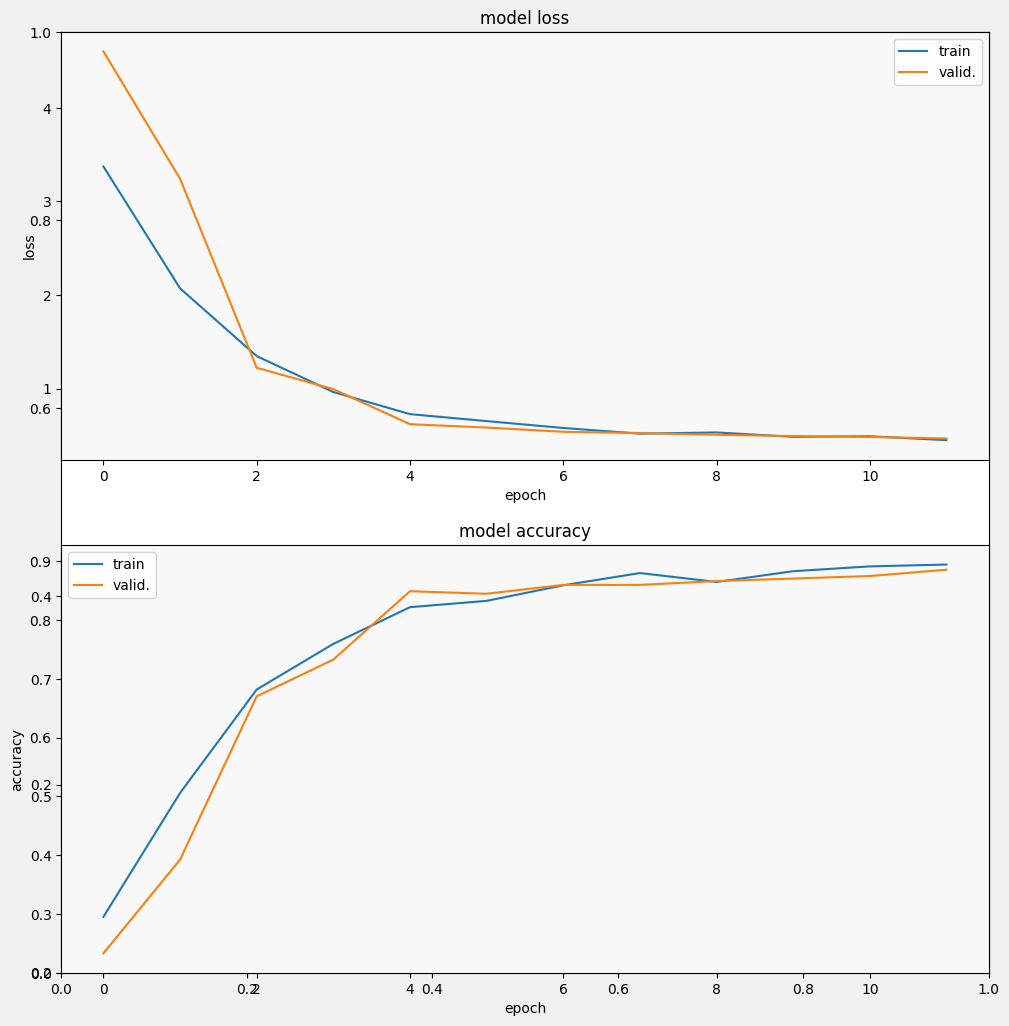

In [18]:
display_training_curves(
    history2.history['loss'],
    history2.history['val_loss'],
    'loss',
    211,
)
display_training_curves(
    history2.history['sparse_categorical_accuracy'],
    history2.history['val_sparse_categorical_accuracy'],
    'accuracy',
    212,
)

# Results and Analysis #

Since this is a competition data set, it makes sense to visualize the model’s predictions on the validation set to aid in model selection. We will utilize two approaches: comparing the two model’s confusion matrices and using visual validation to understand where the predictions might be going awry.

Firstly, defining a couple of training functions to help us make the confusion matrices and visual validation plots.

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

def display_confusion_matrix(cmat, score, precision, recall):
    plt.figure(figsize=(15,15))
    ax = plt.gca()
    ax.matshow(cmat, cmap='Reds')
    ax.set_xticks(range(len(CLASSES)))
    ax.set_xticklabels(CLASSES, fontdict={'fontsize': 7})
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")
    ax.set_yticks(range(len(CLASSES)))
    ax.set_yticklabels(CLASSES, fontdict={'fontsize': 7})
    plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    titlestring = ""
    if score is not None:
        titlestring += 'f1 = {:.3f} '.format(score)
    if precision is not None:
        titlestring += '\nprecision = {:.3f} '.format(precision)
    if recall is not None:
        titlestring += '\nrecall = {:.3f} '.format(recall)
    if len(titlestring) > 0:
        ax.text(101, 1, titlestring, fontdict={'fontsize': 18, 'horizontalalignment':'right', 'verticalalignment':'top', 'color':'#804040'})
    plt.show()
    
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

**Confusion Matrices**

We define the Precision, Recall and F1 Score for the model prior to printing the confusion matrix.

***Model 1***

In [20]:
cmdataset = get_validation_dataset(ordered=True)
images_ds = cmdataset.map(lambda image, label: image)
labels_ds = cmdataset.map(lambda image, label: label).unbatch()

cm_correct_labels = next(iter(labels_ds.batch(NUM_VALIDATION_IMAGES))).numpy()
cm_probabilities = model.predict(images_ds)
cm_predictions = np.argmax(cm_probabilities, axis=-1)

labels = range(len(CLASSES))
cmat = confusion_matrix(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
)
cmat = (cmat.T / cmat.sum(axis=1)).T # normalize

2024-06-08 17:51:16.656234: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node sequential_1_1/dense_1_1/Add/ReadVariableOp.
I0000 00:00:1717869076.705117     902 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(3dc5762c25672cb:0:0), session_name()


      1/Unknown 9s 9s/step

I0000 00:00:1717869083.013783     902 tpu_compile_op_common.cc:245] Compilation of 3dc5762c25672cb:0:0 with session name  took 6.308623821s and succeeded
I0000 00:00:1717869083.016250     902 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(3dc5762c25672cb:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_data_distributed_8241240366095150194", property.function_library_fingerprint = 11846240534016019274, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1717869083.016281     902 tpu_compilation_cache_interface.cc:541] After adding entry for key 3dc5762c25672

      2/Unknown 10s 1s/step

      3/Unknown 12s 1s/step

      4/Unknown 13s 1s/step

      5/Unknown 15s 1s/step

      6/Unknown 16s 1s/step

      7/Unknown 17s 1s/step

      8/Unknown 19s 1s/step

      9/Unknown 20s 1s/step

     10/Unknown 22s 1s/step

     11/Unknown 23s 1s/step

     12/Unknown 25s 1s/step

     13/Unknown 26s 1s/step

     14/Unknown 27s 1s/step

     15/Unknown 29s 1s/step

     16/Unknown 30s 1s/step

     17/Unknown 32s 1s/step

     18/Unknown 33s 1s/step

     19/Unknown 35s 1s/step

     20/Unknown 36s 1s/step

     21/Unknown 37s 1s/step

     22/Unknown 39s 1s/step

     23/Unknown 40s 1s/step

     24/Unknown 42s 1s/step

     25/Unknown 43s 1s/step

     26/Unknown 44s 1s/step

     27/Unknown 46s 1s/step

     28/Unknown 47s 1s/step

     29/Unknown 49s 1s/step

29/29 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step


/usr/local/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


You might be familiar with metrics like [F1-score](https://en.wikipedia.org/wiki/F1_score) or [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall). This cell will compute these metrics and display them with a plot of the confusion matrix. (These metrics are defined in the Scikit-learn module `sklearn.metrics`; we've imported them in the helper script for you.)

/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


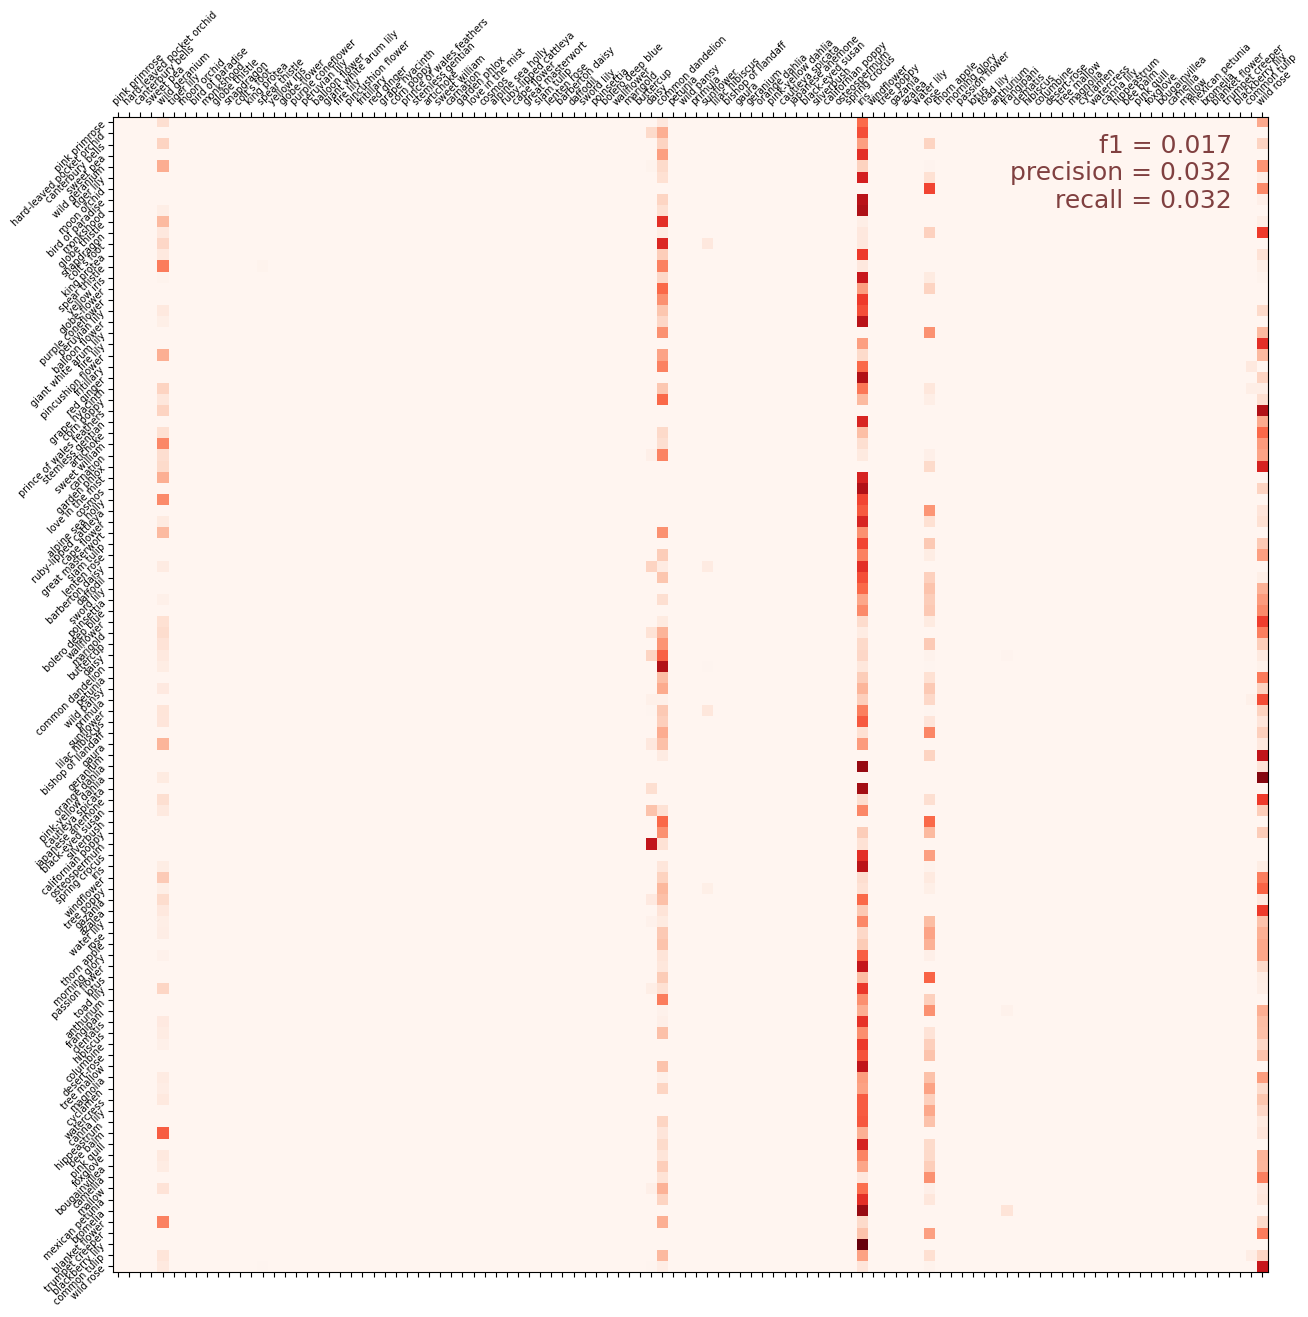

In [21]:
score = f1_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)
precision = precision_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)
recall = recall_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)
display_confusion_matrix(cmat, score, precision, recall)

***Model 2***

I0000 00:00:1717869132.034381     895 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(17e1fc96f78e47c2:0:0), session_name()


      1/Unknown 10s 10s/step

I0000 00:00:1717869138.723425     895 tpu_compile_op_common.cc:245] Compilation of 17e1fc96f78e47c2:0:0 with session name  took 6.689001475s and succeeded
I0000 00:00:1717869138.733269     895 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(17e1fc96f78e47c2:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_data_distributed_9327445035560561306", property.function_library_fingerprint = 11881259602987145032, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1717869138.733306     895 tpu_compilation_cache_interface.cc:541] After adding entry for key 17e1fc96f78

      2/Unknown 12s 1s/step 

      3/Unknown 13s 1s/step

      4/Unknown 14s 1s/step

      5/Unknown 16s 1s/step

      6/Unknown 17s 1s/step

      7/Unknown 19s 1s/step

      8/Unknown 20s 1s/step

      9/Unknown 21s 1s/step

     10/Unknown 23s 1s/step

     11/Unknown 24s 1s/step

     12/Unknown 26s 1s/step

     13/Unknown 27s 1s/step

     14/Unknown 28s 1s/step

     15/Unknown 30s 1s/step

     16/Unknown 31s 1s/step

     17/Unknown 33s 1s/step

     18/Unknown 34s 1s/step

     19/Unknown 35s 1s/step

     20/Unknown 37s 1s/step

     21/Unknown 38s 1s/step

     22/Unknown 40s 1s/step

     23/Unknown 41s 1s/step

     24/Unknown 42s 1s/step

     25/Unknown 44s 1s/step

     26/Unknown 45s 1s/step

     27/Unknown 47s 1s/step

     28/Unknown 48s 1s/step

     29/Unknown 49s 1s/step

29/29 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step


/usr/local/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


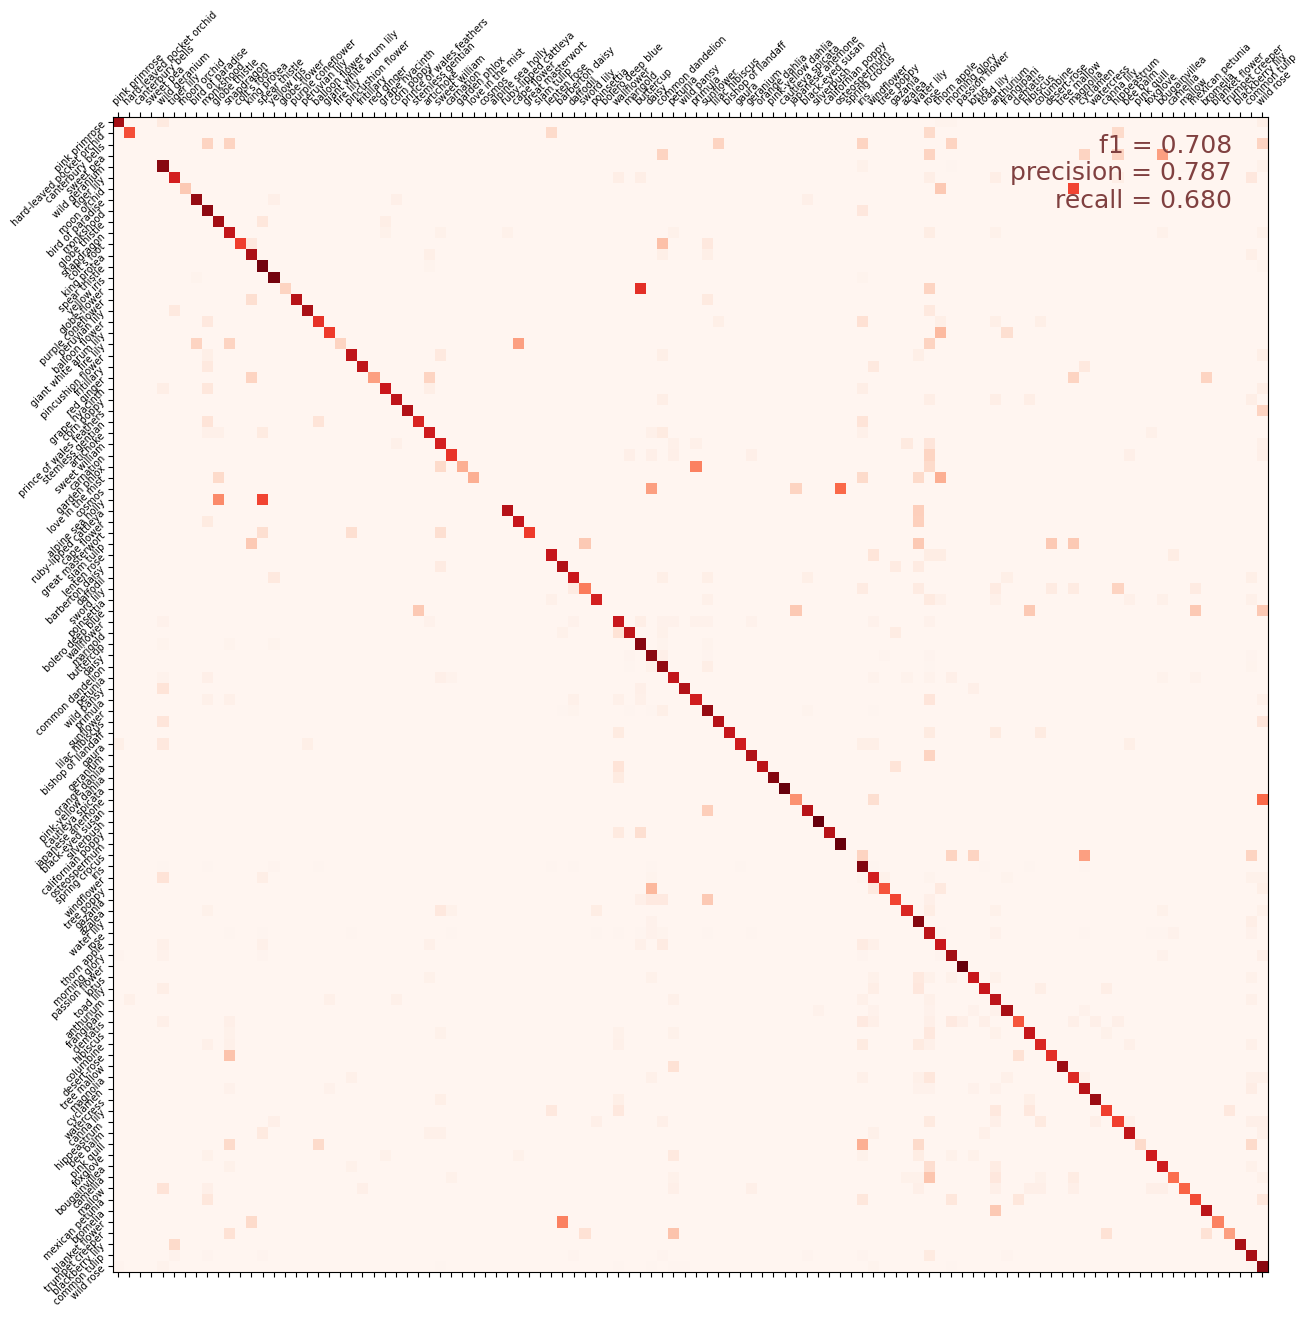

In [22]:
cmdataset = get_validation_dataset(ordered=True)
images_ds = cmdataset.map(lambda image, label: image)
labels_ds = cmdataset.map(lambda image, label: label).unbatch()

cm_correct_labels = next(iter(labels_ds.batch(NUM_VALIDATION_IMAGES))).numpy()
cm_probabilities = model2.predict(images_ds)
cm_predictions = np.argmax(cm_probabilities, axis=-1)

labels = range(len(CLASSES))
cmat = confusion_matrix(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
)
cmat = (cmat.T / cmat.sum(axis=1)).T # normalize

score = f1_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)
precision = precision_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)
recall = recall_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)
display_confusion_matrix(cmat, score, precision, recall)

The confusion matrix for the second model looks a lot more promising. We aren't seeing any particular flowers that the model is having trouble categorizing, and scores for precision, recall and F1 are far higher.

**Visual Validation**

It can also be helpful to look at some examples from the validation set and see what class your model predicted. This can help reveal patterns in the kinds of images your model has trouble with.

This cell will set up the validation set to display 8 images at a time.

In [23]:
dataset = get_validation_dataset()
dataset = dataset.unbatch().batch(8)
batch = iter(dataset)

***Model 1***

2024-06-08 17:53:02.284267: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node sequential_1_1/dense_1_1/Add/ReadVariableOp.
I0000 00:00:1717869182.414960     899 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(be19edd6fcc5363c:0:0), session_name()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


I0000 00:00:1717869189.773106     899 tpu_compile_op_common.cc:245] Compilation of be19edd6fcc5363c:0:0 with session name  took 7.35811249s and succeeded
I0000 00:00:1717869189.774917     899 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(be19edd6fcc5363c:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_data_distributed_15118471520527914139", property.function_library_fingerprint = 5865511010048264865, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "2,512,512,3,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1717869189.774942     899 tpu_compilation_cache_interface.cc:541] After adding entry for key

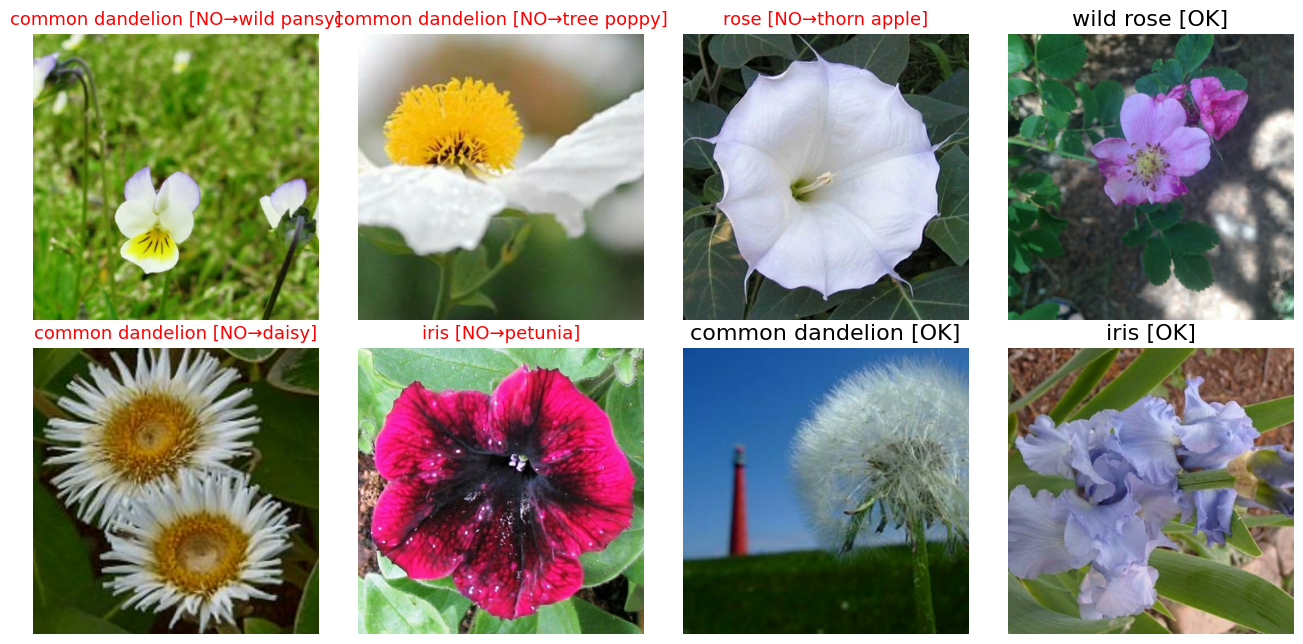

In [24]:
images, labels = next(batch)
probabilities = model.predict(images)
predictions = np.argmax(probabilities, axis=-1)
display_batch_of_images((images, labels), predictions)

***Model 2***

I0000 00:00:1717869193.610699     852 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(e5f64b8cc0aff8bf:0:0), session_name()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


I0000 00:00:1717869198.927435     852 tpu_compile_op_common.cc:245] Compilation of e5f64b8cc0aff8bf:0:0 with session name  took 5.316697977s and succeeded
I0000 00:00:1717869198.936143     852 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(e5f64b8cc0aff8bf:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_data_distributed_7802036699839960516", property.function_library_fingerprint = 1545235231274202119, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "2,512,512,3,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1717869198.936170     852 tpu_compilation_cache_interface.cc:541] After adding entry for key

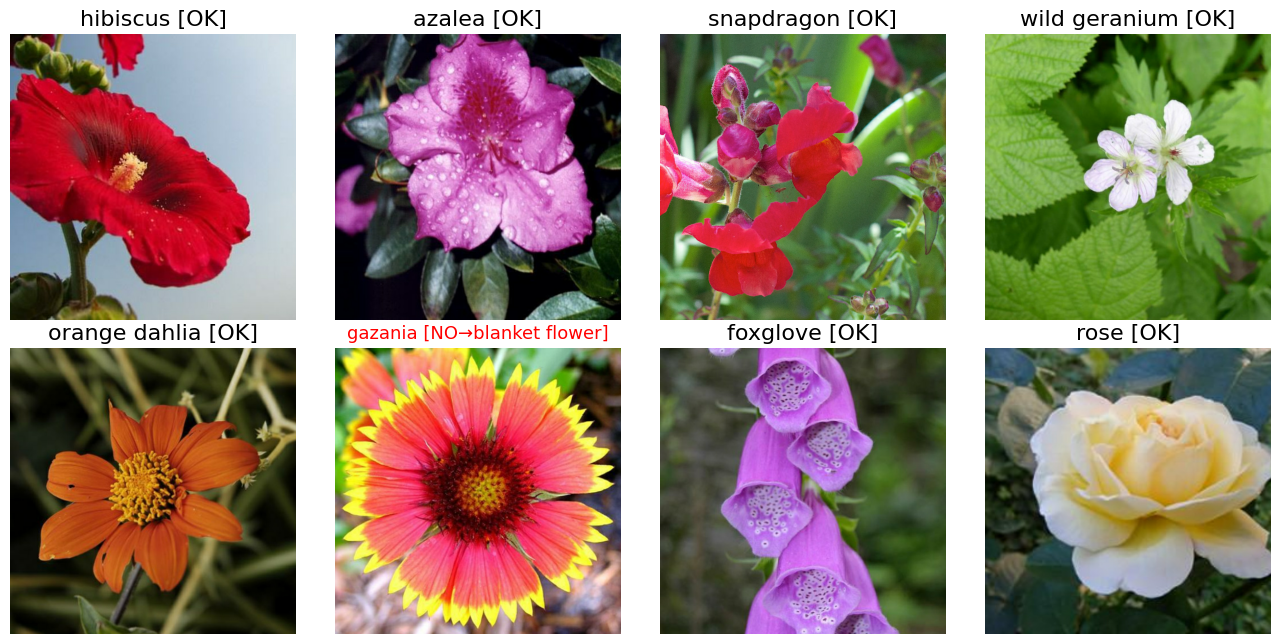

In [25]:
images, labels = next(batch)
probabilities = model2.predict(images)
predictions = np.argmax(probabilities, axis=-1)
display_batch_of_images((images, labels), predictions)

Visual validation gives us a sense of the far likelier correct identification by the second model. It seems like in spots it has some confusion between species but it is not always miscategorizing certain species as the first model does.

# Discussion and Conclusion #

Discussion of learning and takeaways: This project was an excellent way to get used to using TPUs for machine learning models in order to increase efficiency and decrease the cost (time) of model training. After preparing the data pipelines and changing the data into a format that is best suited for the pipelines, I created two models with differing underlying pretrained models to understand the effect of pretrained models on a computer vision tasks.

The use of the Xception application far outperformed the VGG19 application. We can see the increase in performance by the higher accuracy convergence for the validation training set, the better precision, recall and F1 scores from the confusion matrix, and even by visual validation.

The Xception algorithm is known for improved feature extraction over VGG19. While VGG19 uses a deeper neural network structure and if good for capturing higher level features, Xception is more capable of detecting differences in fine-grained detail within an image. It makes sense that it would be more suited to imagery of flowers, since the finer details are where the categorization really takes place.

Discussion of why this may or may not work for this application: This computer vision application is fantastic for flower categorization and would probably work even in an app-based environment if you are able to offer a good computing environment to your user.

Suggestions to Improve: 


**Appendix - Sources**

https://www.kaggle.com/c/tpu-getting-started/overview

https://www.kaggle.com/code/ryanholbrook/create-your-first-submission

https://www.kaggle.com/docs/tpu

https://keras.io/api/applications/vgg/

https://keras.io/api/applications/xception/

https://medium.com/analytics-vidhya/learning-rate-decay-and-methods-in-deep-learning-2cee564f910b

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10651454/#:~:text=Because%20of%20the%20improved%20feature,extracting%20higher%2Dlevel%20abstract%20features.
